In [1]:
import os
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice

from icenumerics.geometry import ordering 
import magcolloids as mgc

import matplotlib.pyplot as plt
ureg = ice.ureg

%load_ext autoreload
%autoreload 2

# Fixed initial condition

    In this script, we will fix the initial condition of the simulation as the ones that shows the image below (@aortiza). This way we will observe if the system follows the transfer of charge rule predicted in the publication: Ice rule fragility via topological charge transfer in artificial colloidal ice.

<img src="InitialConfig.png" alt="drawing" width="35%"/>

In [2]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-2.0"

    Whit the following function defined in the support.py file I build the initial condition. Then I added this function in the cairo_spin_ice_geometry() in order to have this configuration when I choose the border = "fixed conf" in the create_lattice() function. Maybe is not the cleanest way to do it, since is a configuration istead of a border but is the most straight forward way to do it. 

In [3]:
centers, directions = sup.unit_cell_Cairo_InitCond(1)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:123: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,0] = centers_toAddX
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:124: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,1] = centers_toAddY


(-1.2613543953046409, 5.967848865790707, -3.53221810936328, 3.696985151732068)

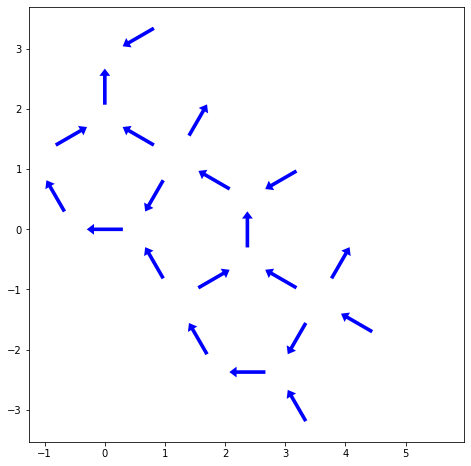

In [4]:
sp = ice.spins(centers = centers, directions = directions)

f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)

plt.axis('square')

In [5]:
np.random.seed()

l = 5

sp = sup.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "cairo",size =[l,l],lattice_constant=19.5458*ureg.um, border="fixed conf")
#sp.order_spins(ordering.random_ordering) # Add this line to start from a random ordering

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:123: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,0] = centers_toAddX
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:124: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,1] = centers_toAddY
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:170: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


In [6]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_long = ice.trap(trap_sep = 10*ureg.um,
               height = 0.3*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
               height = 0.3*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

traps = []

In [7]:
for s in sp:
    
    if ( s.direction[0].magnitude == 1.0 or s.direction[0].magnitude == -1.0 or 
        s.direction[1].magnitude == 1.0 or s.direction[1].magnitude == -1.0 ):
        
        traps.append(trap_short)
        
    else:
        
        traps.append(trap_long)

In [8]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

col.pad_region(40*ureg.um) 

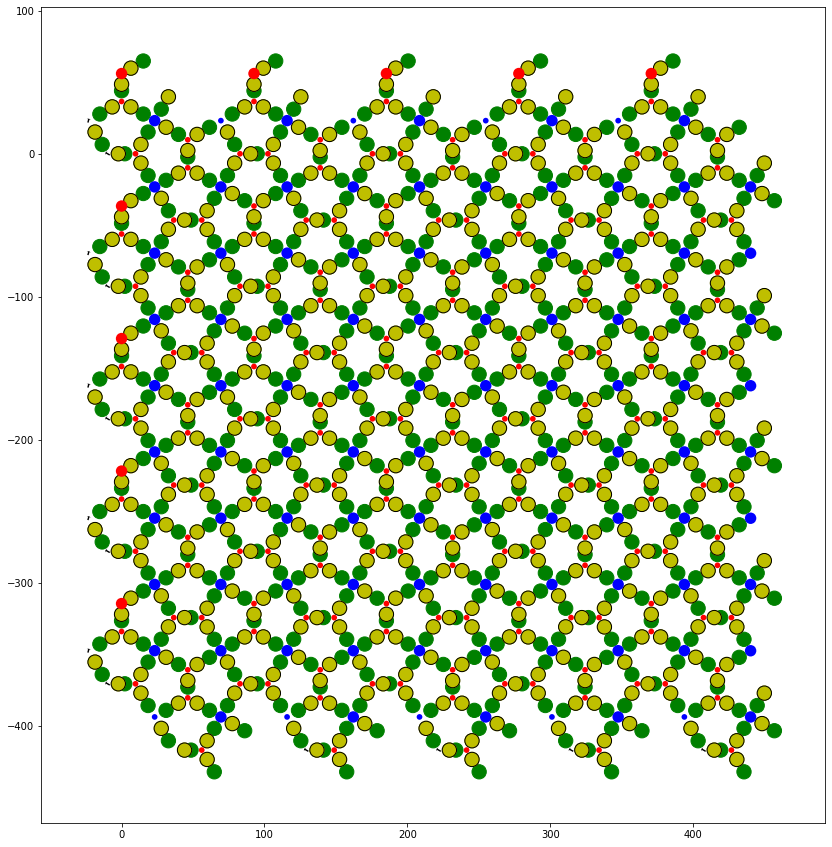

In [9]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)

In [10]:
world = ice.world(
    field = 50*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

In [11]:
total_time = 1500*ureg.s
col.simulate(world,
             name = "ACI_CairoLattice_l%u_15mT-1500s"%(l),
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

scanning file


In [12]:
col.sim.field.fieldz = "v_Bmag*time/%f"%total_time.to(ureg.us).magnitude
col.run_simulation()

In [13]:
col.load_simulation(slice(0,None,1))

scanning file


/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


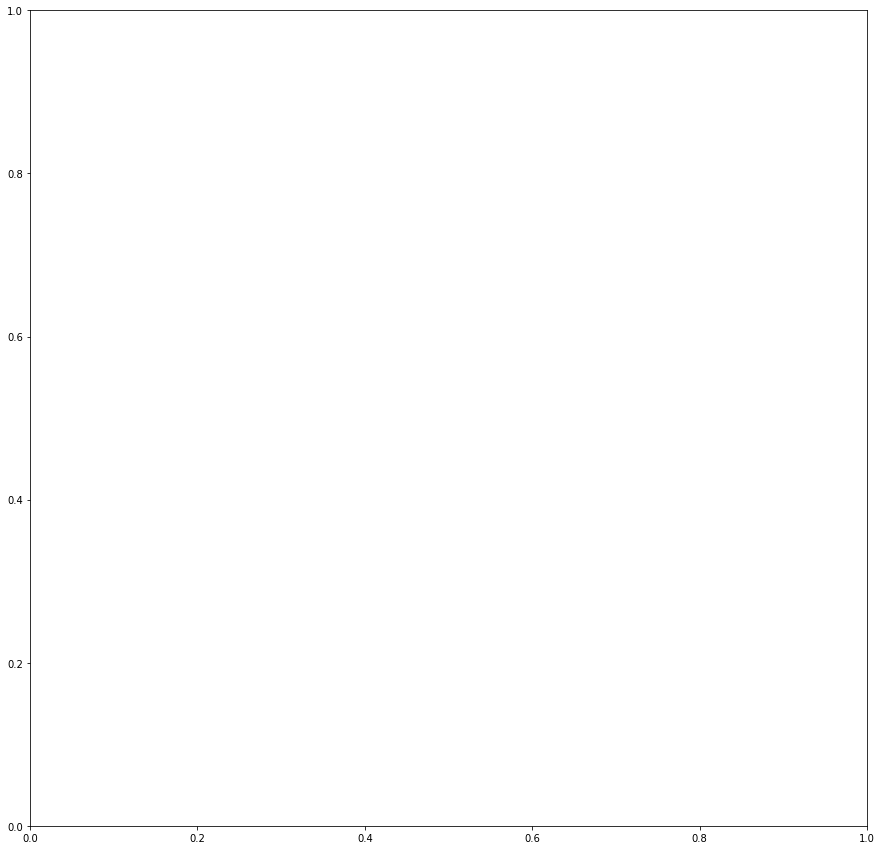

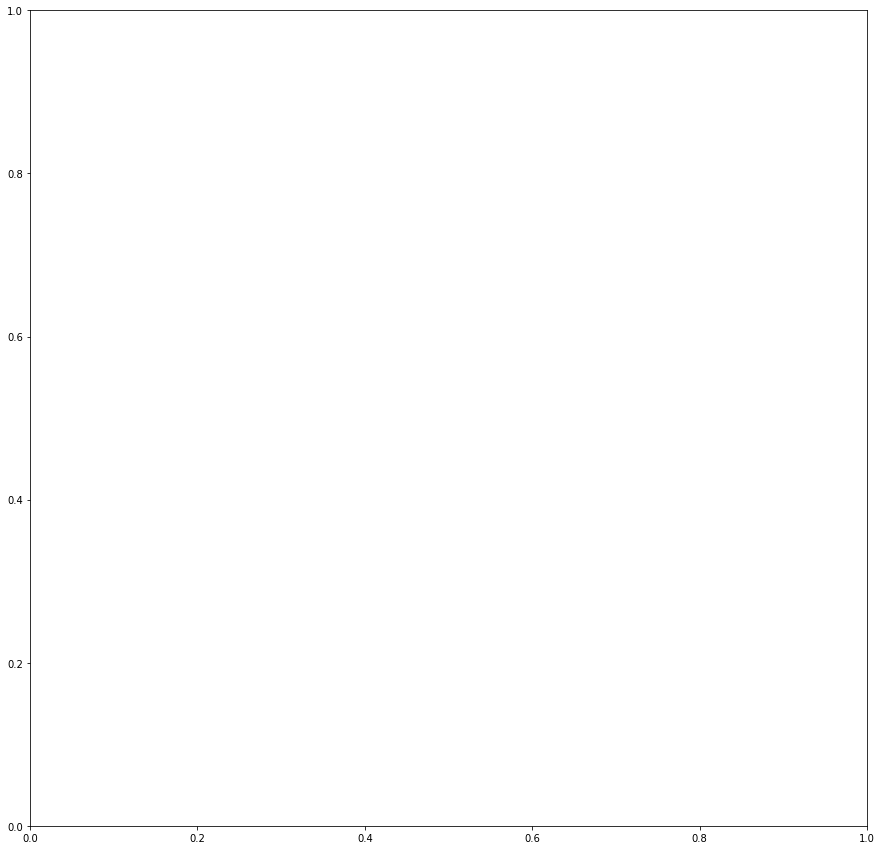

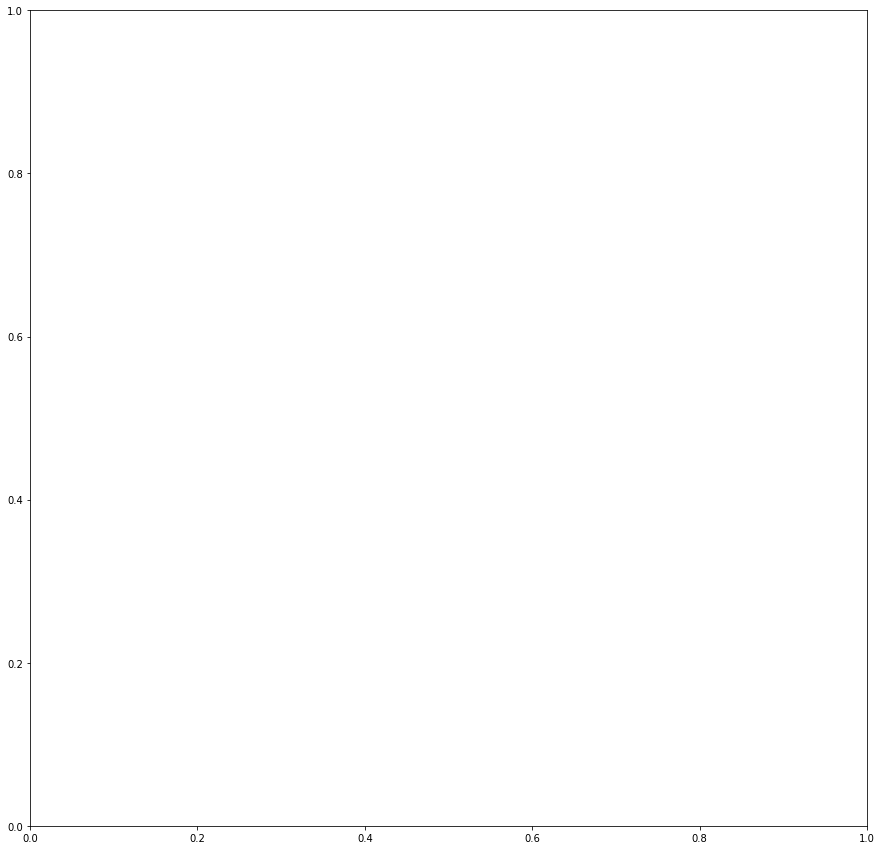

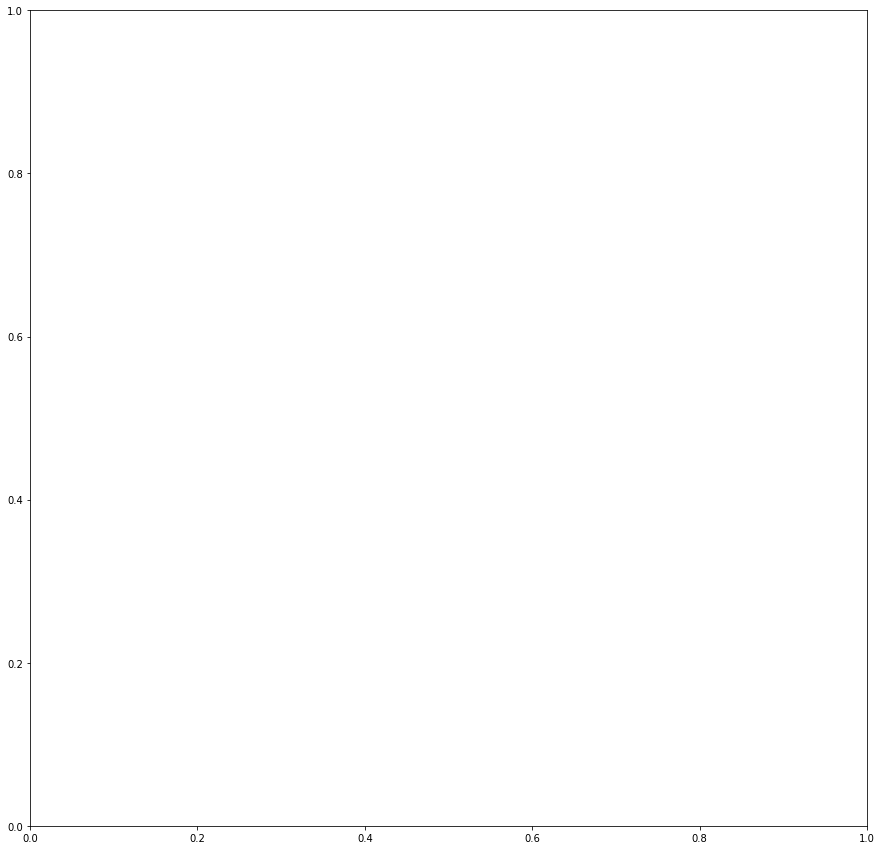

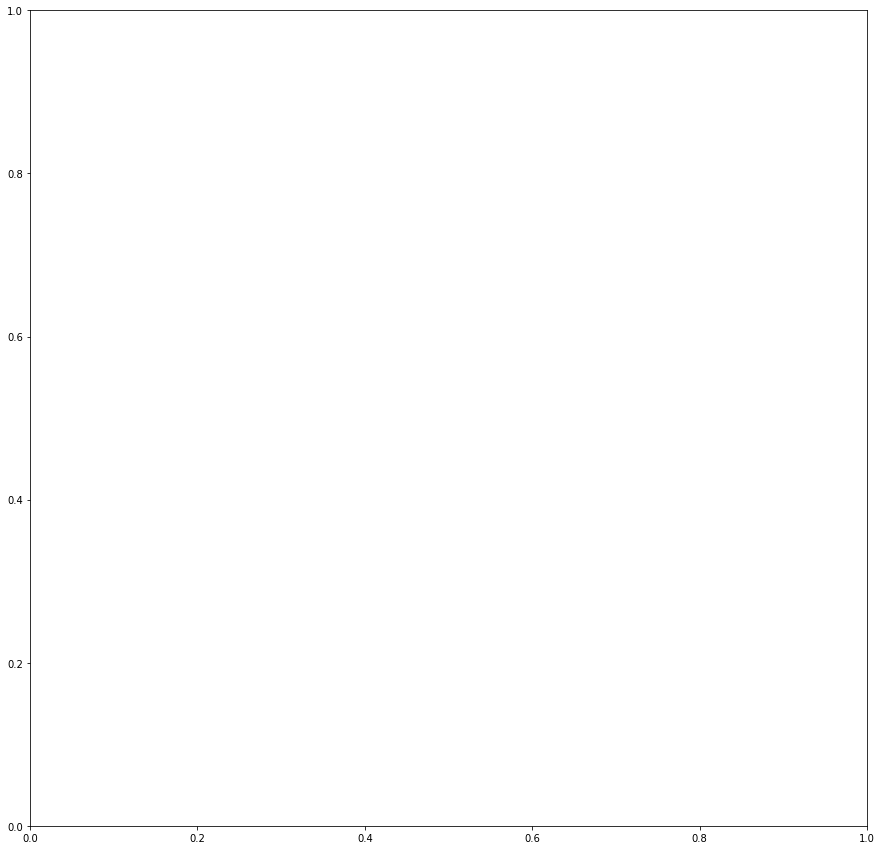

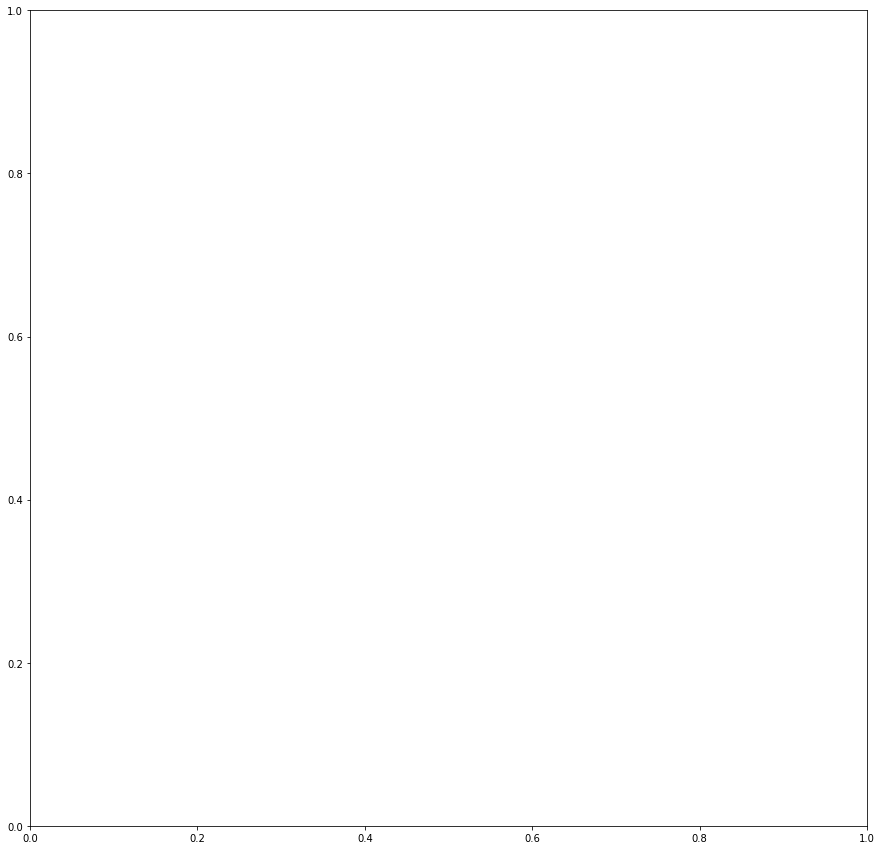

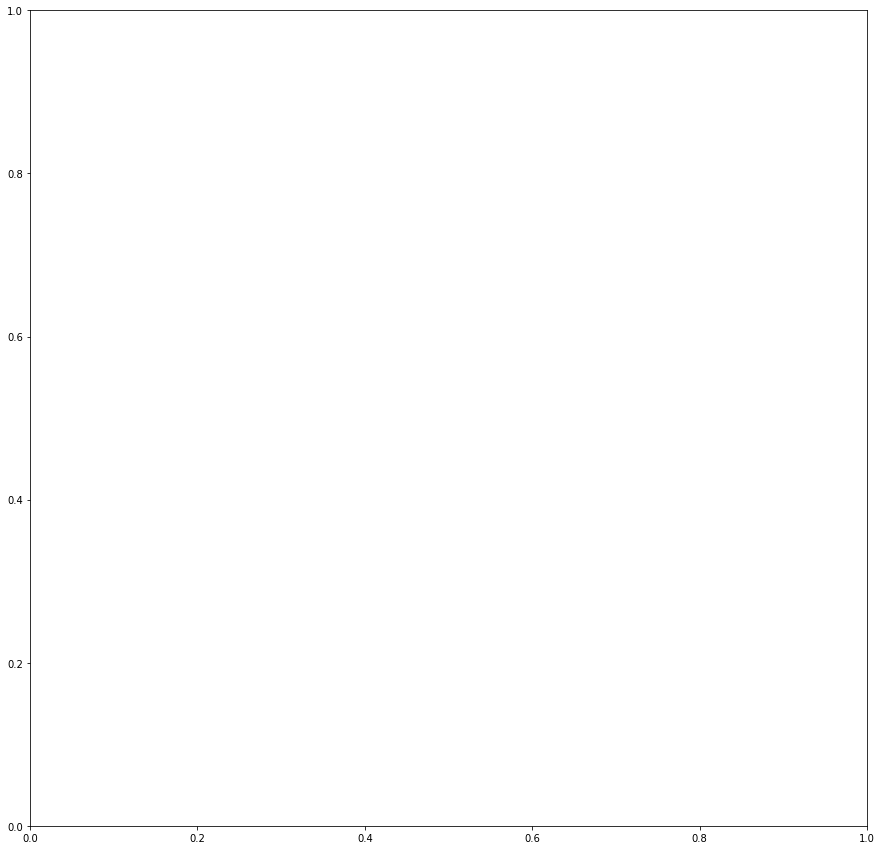

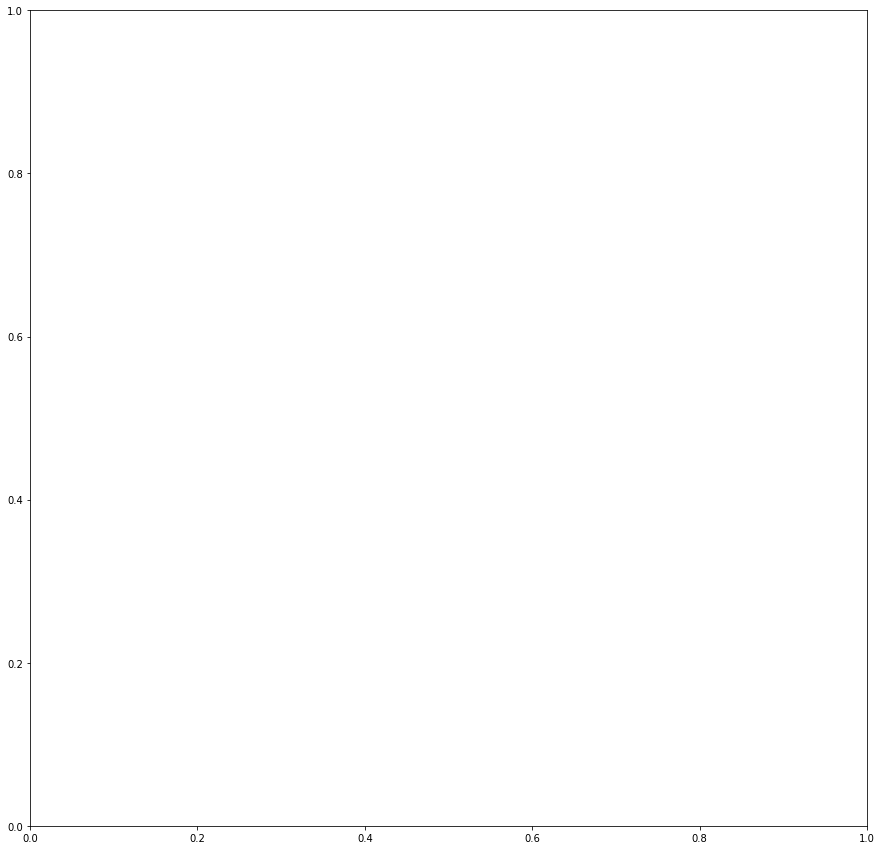

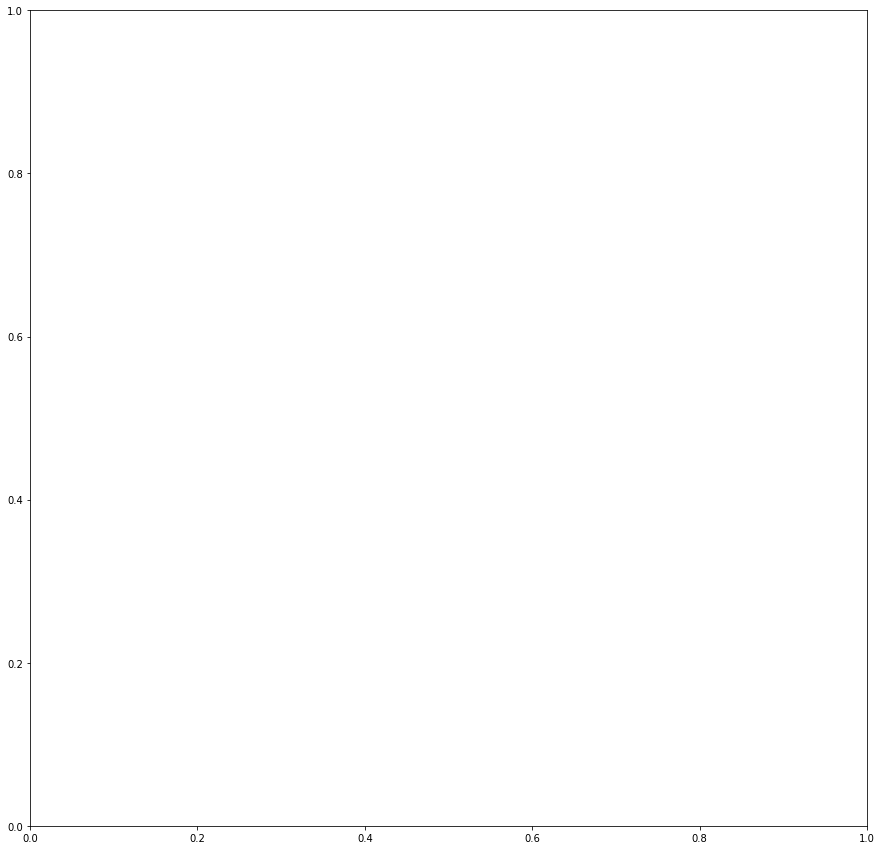

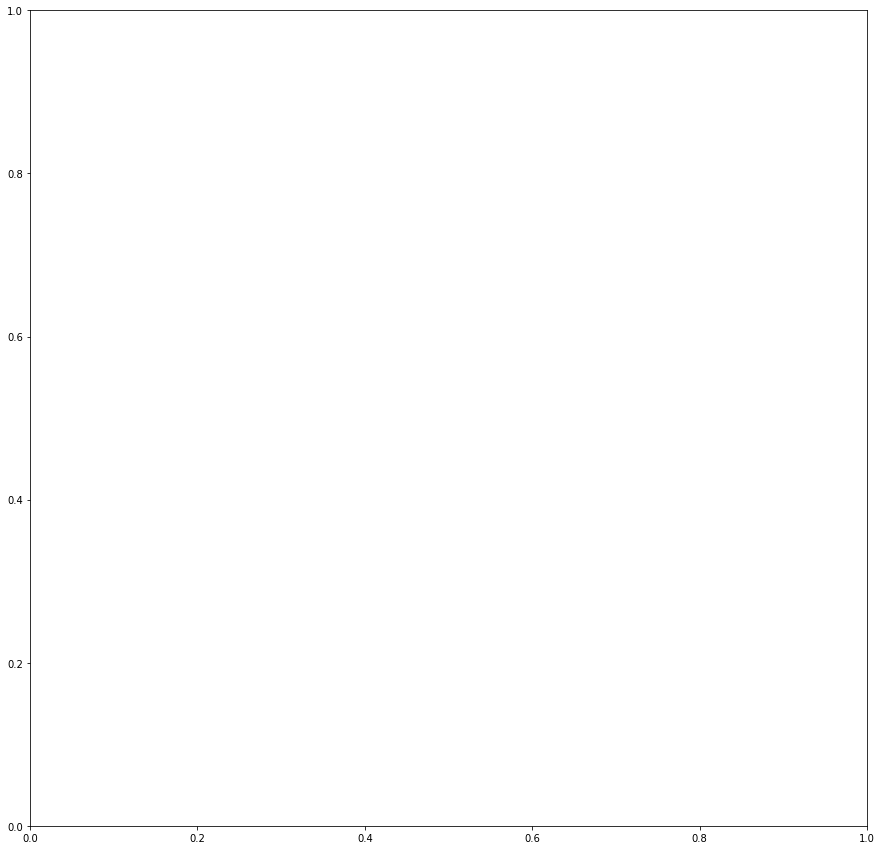

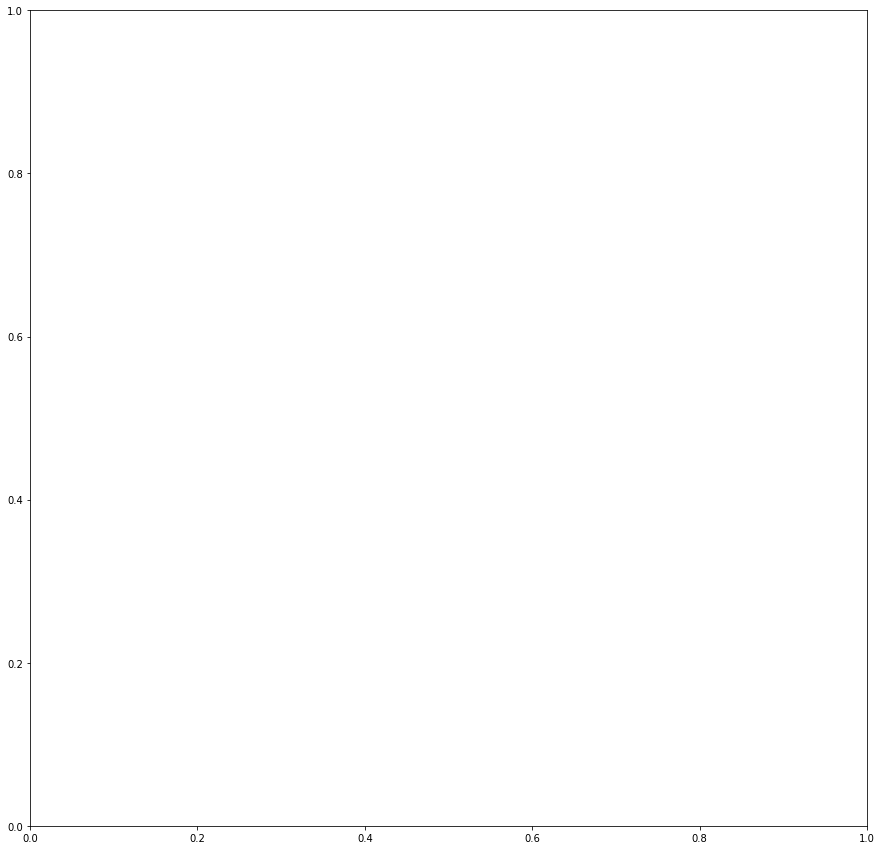

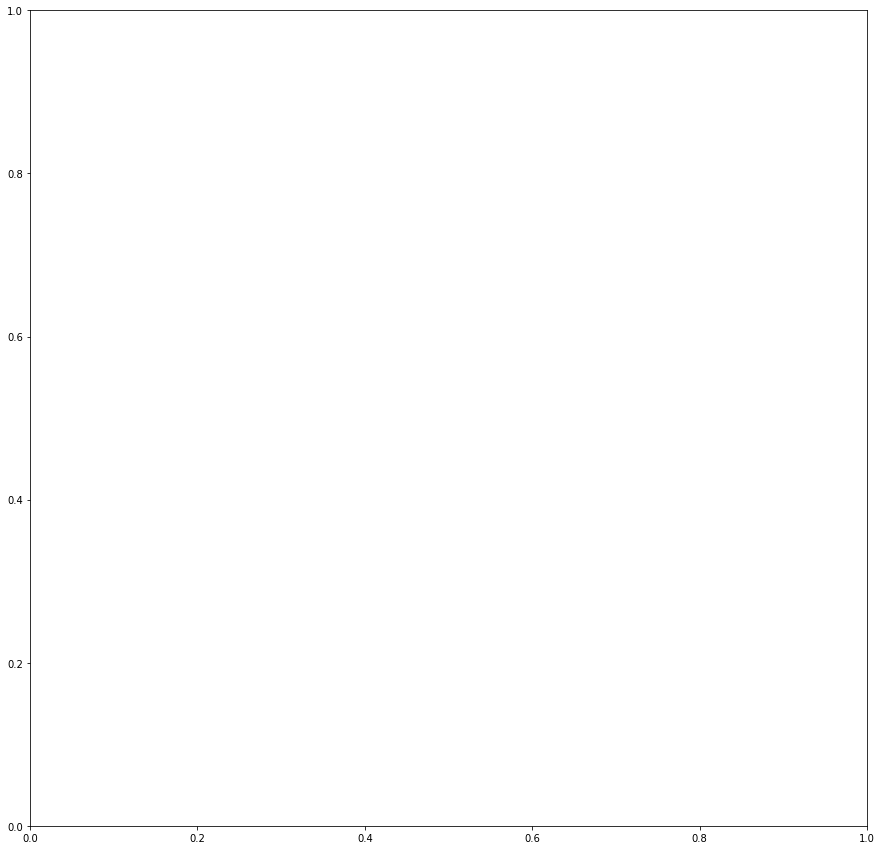

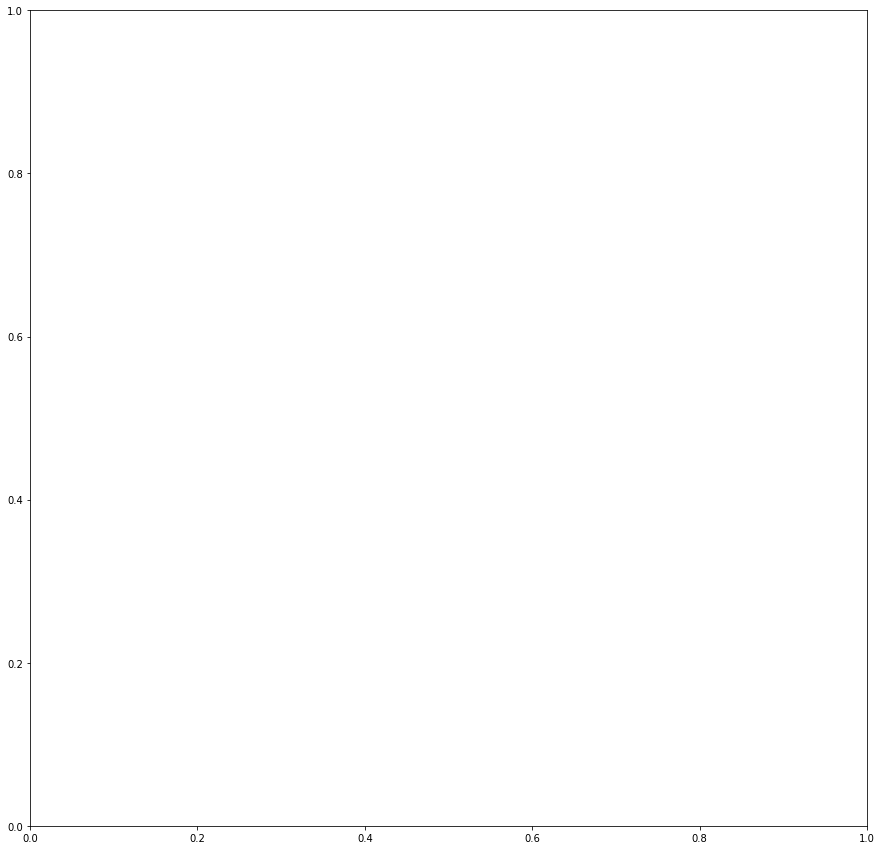

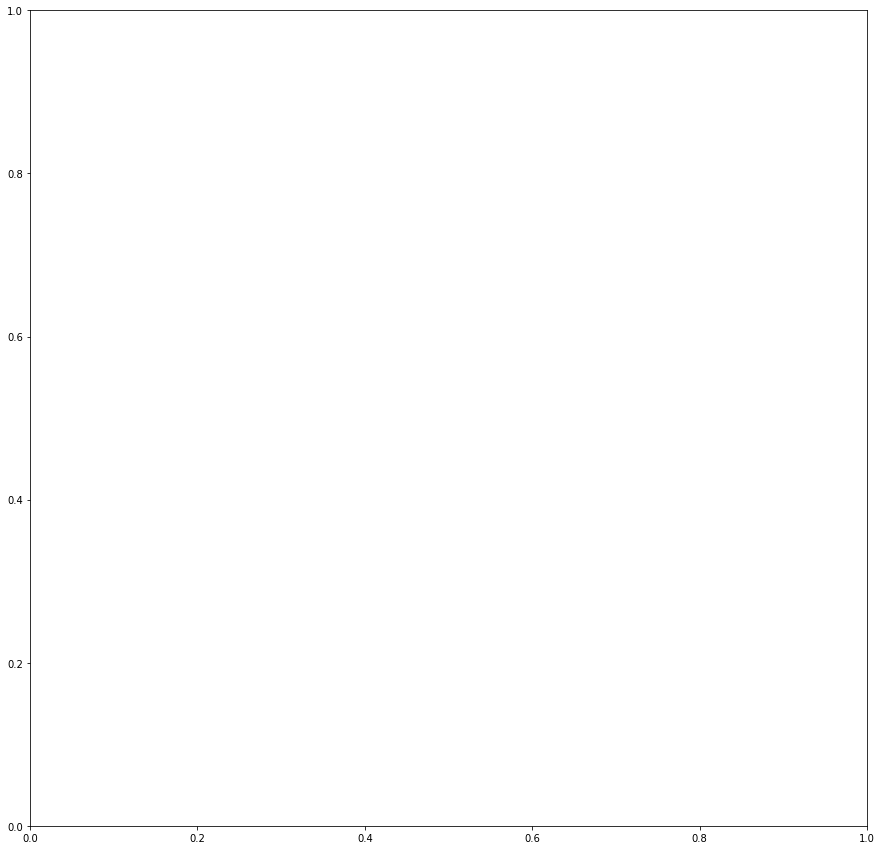

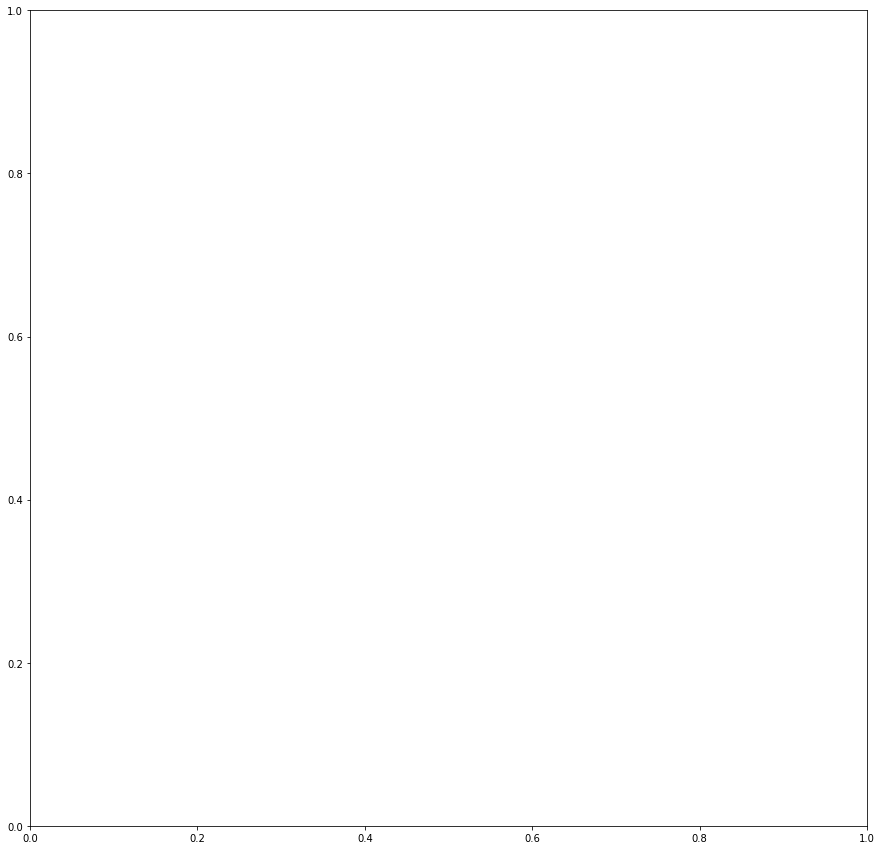

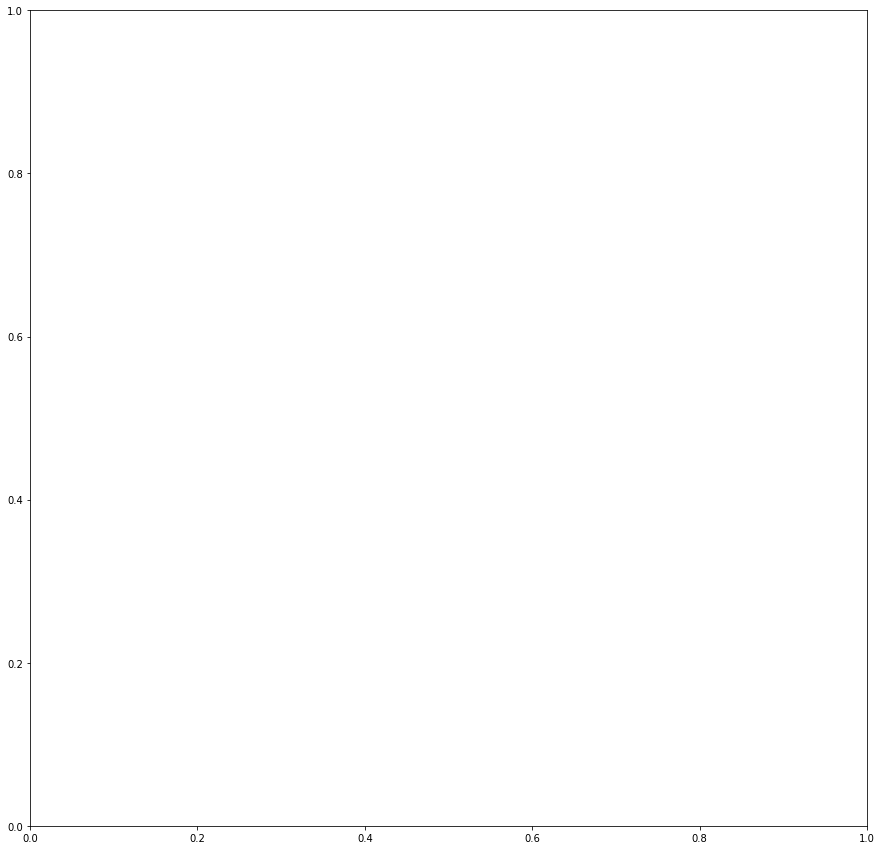

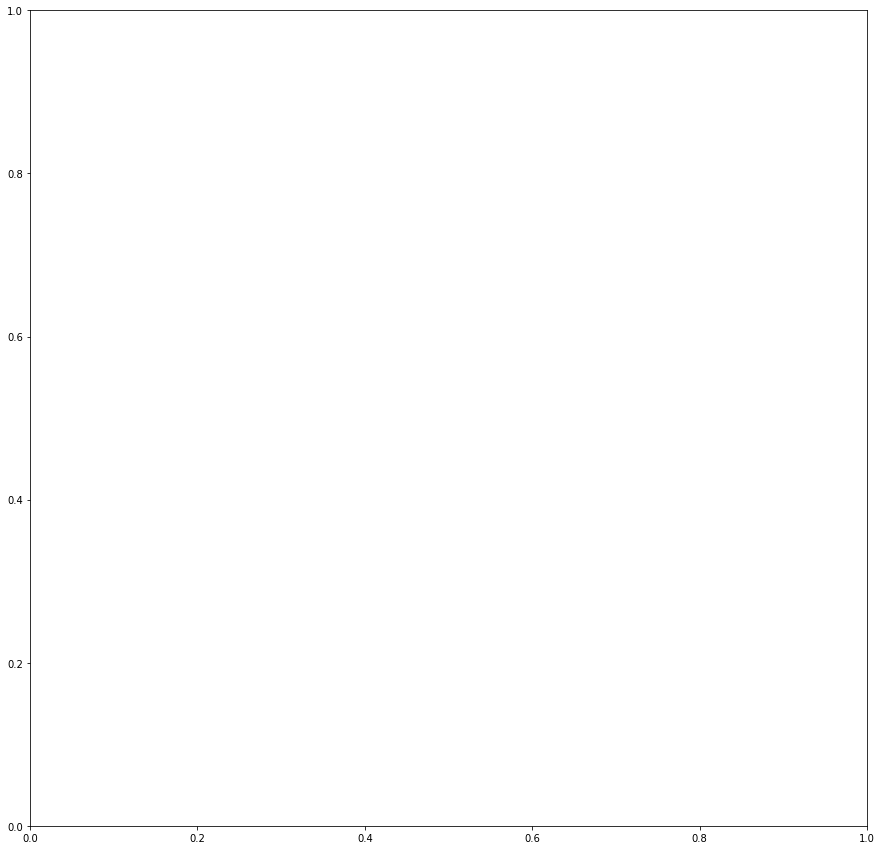

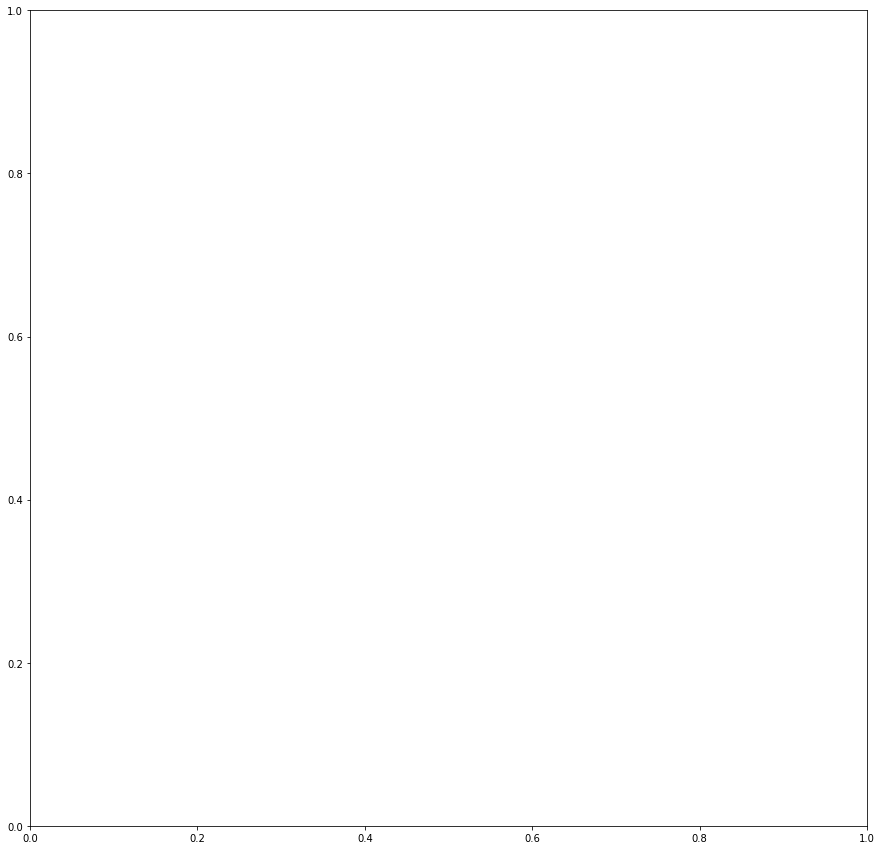

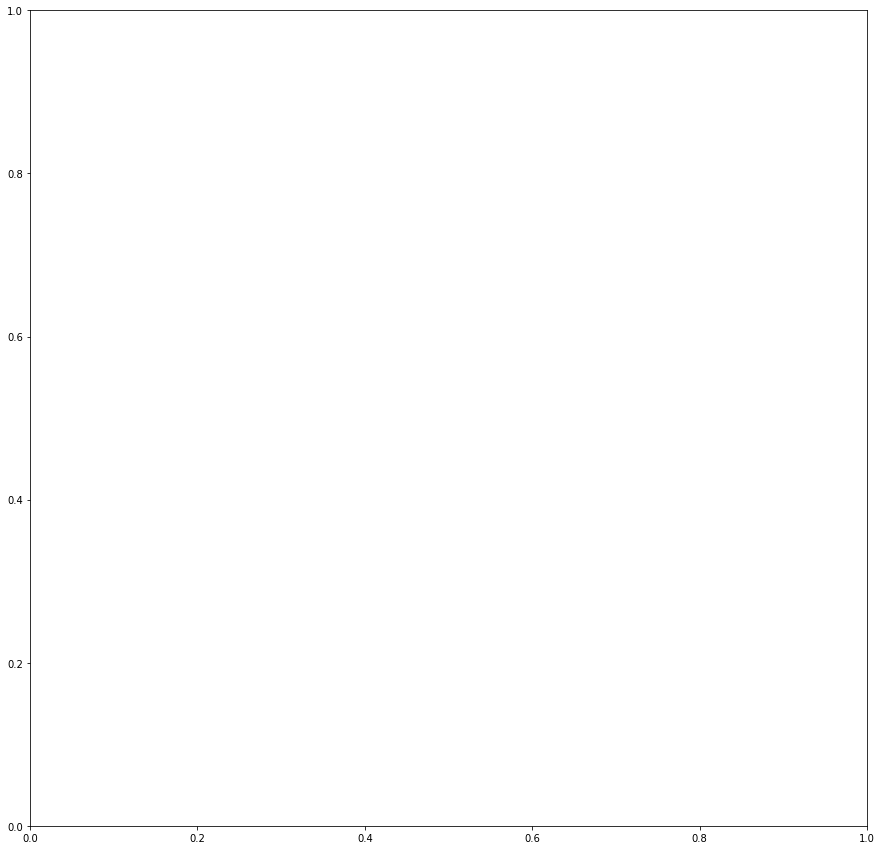

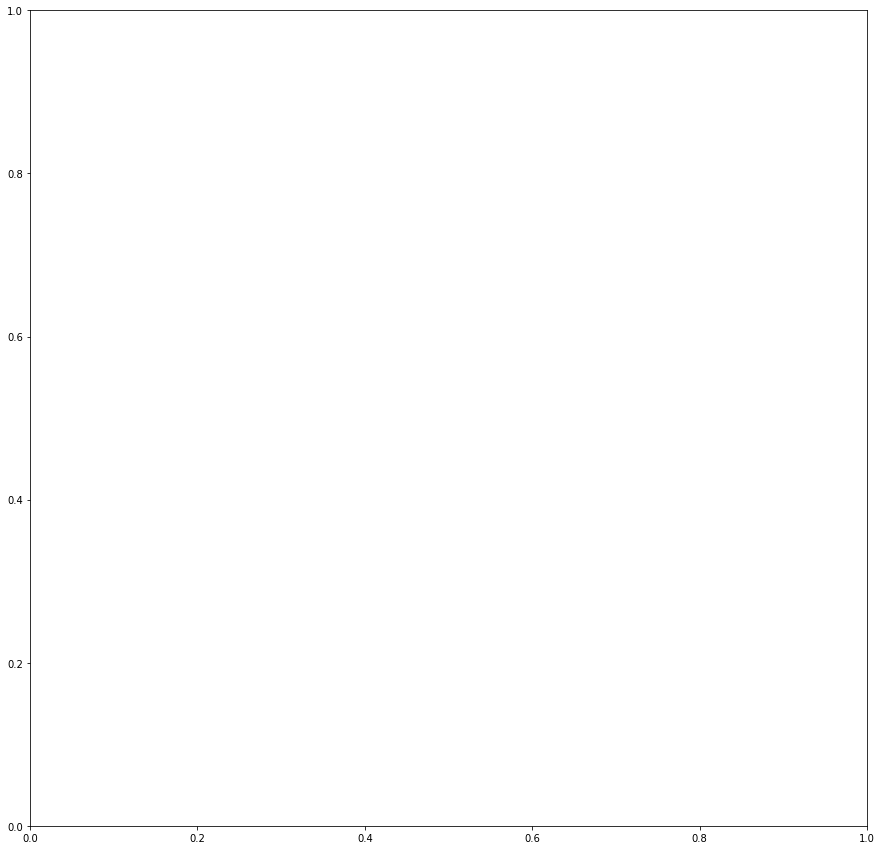

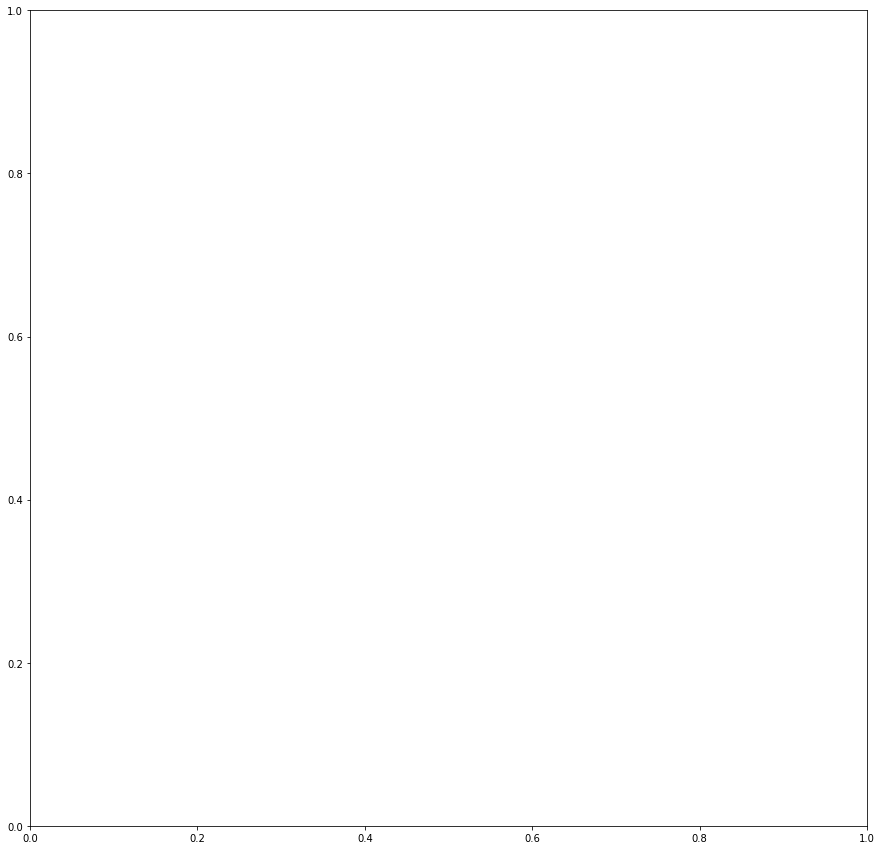

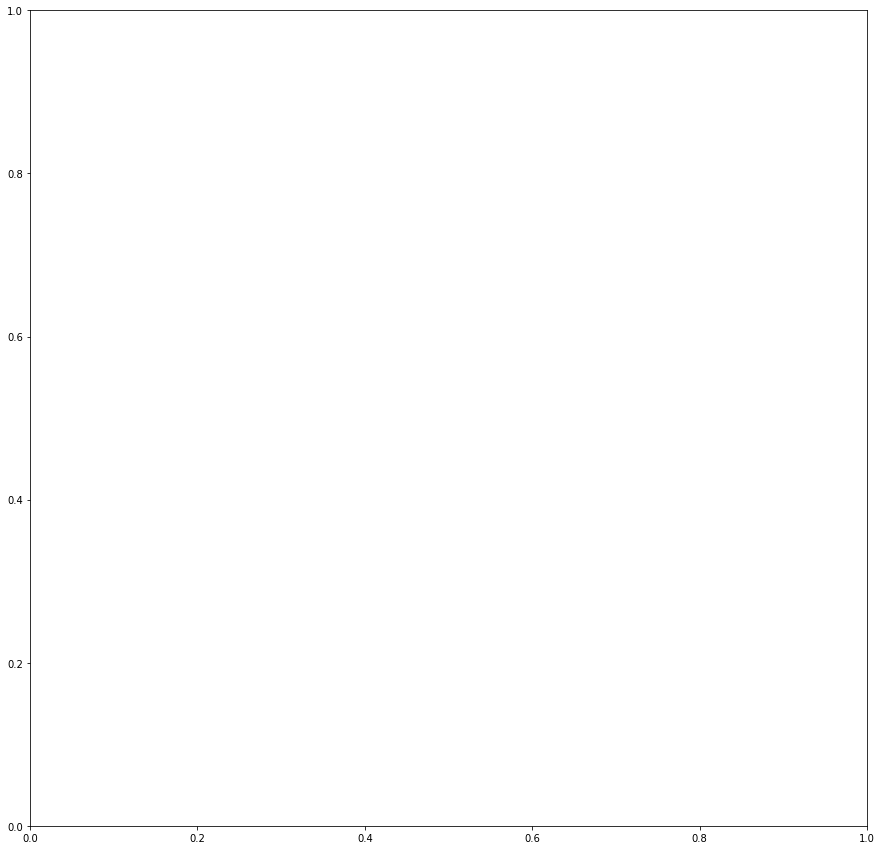

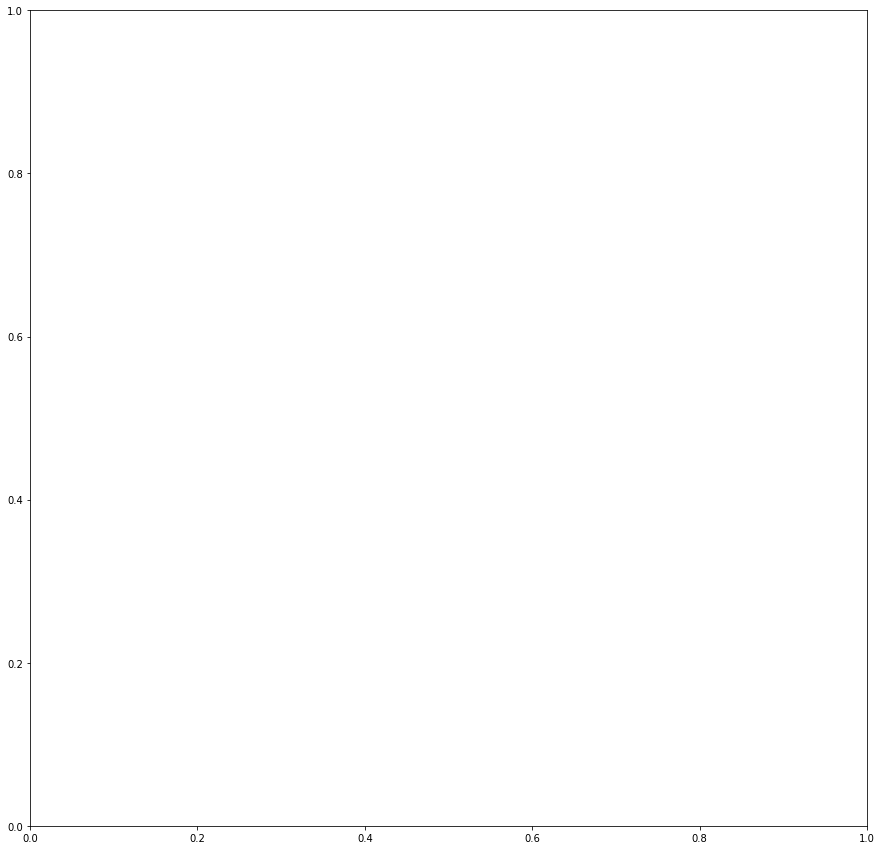

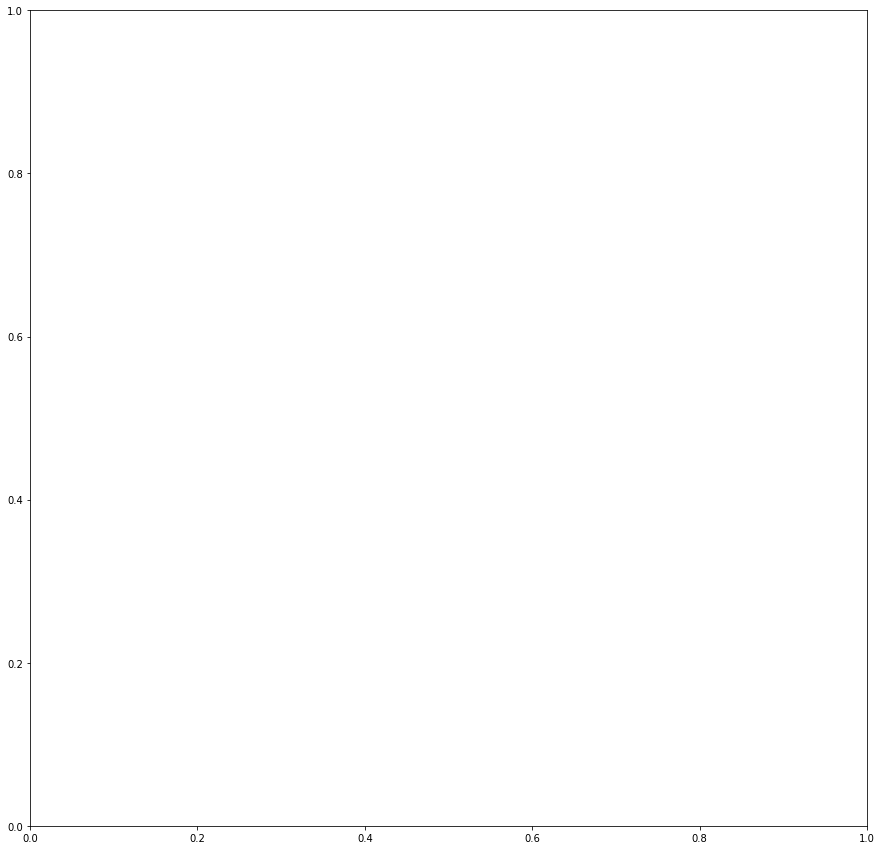

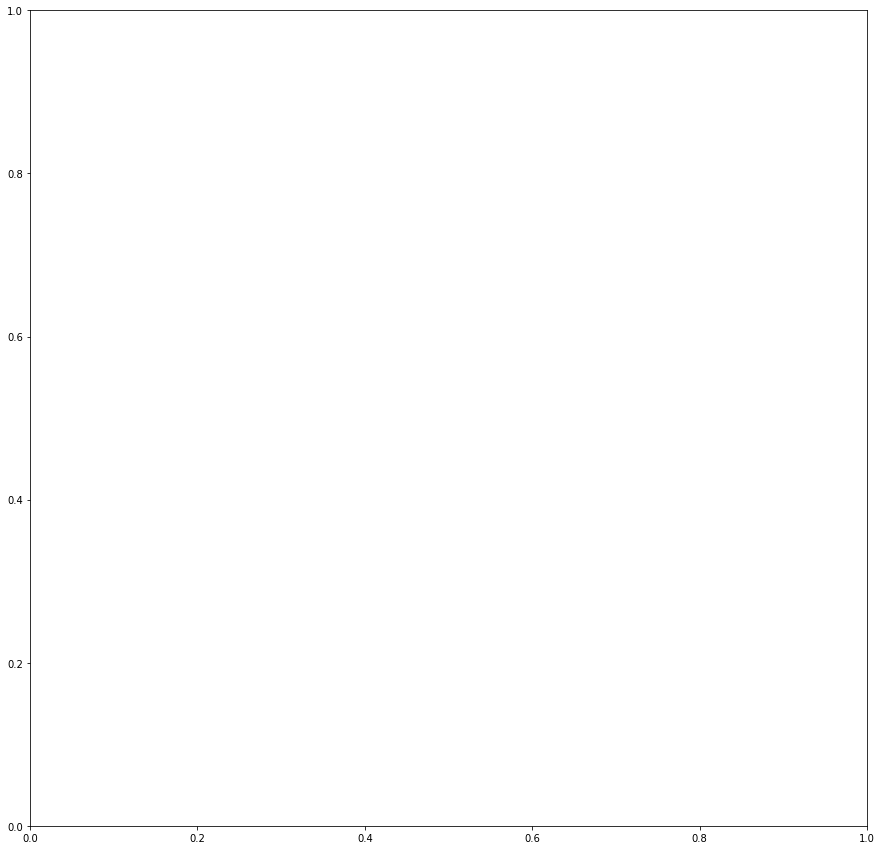

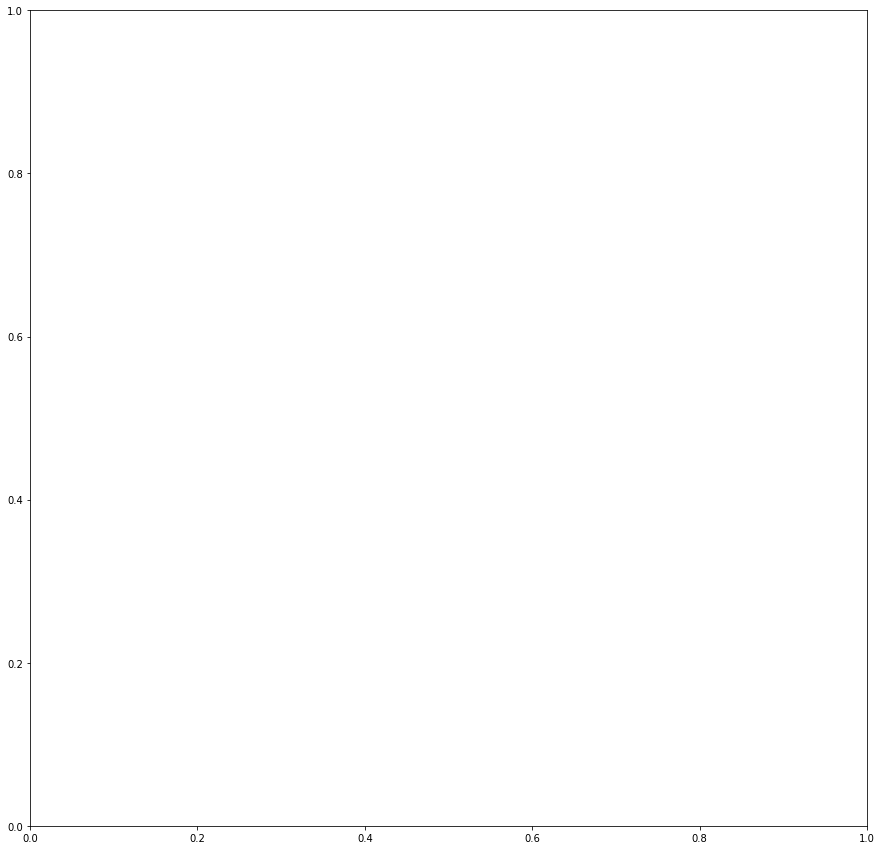

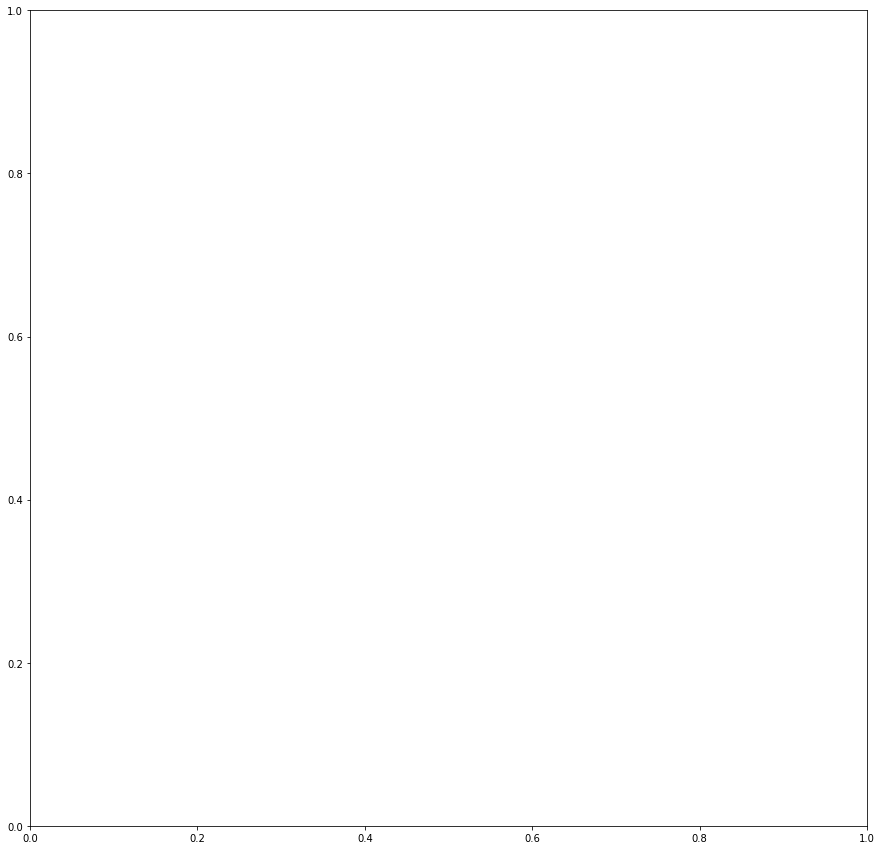

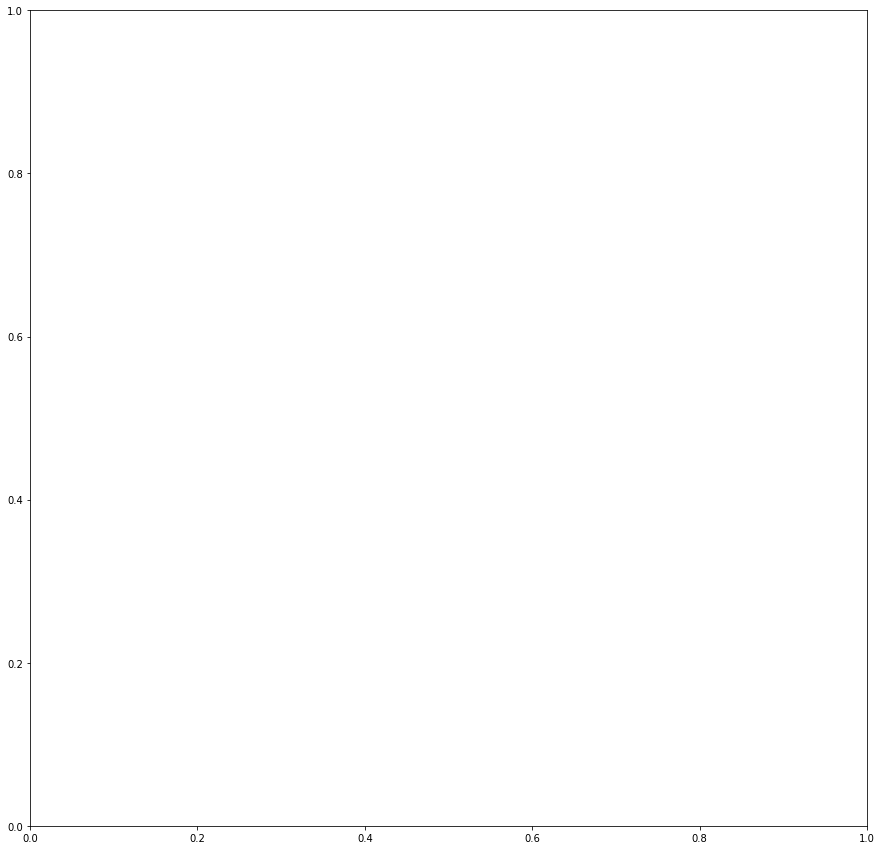

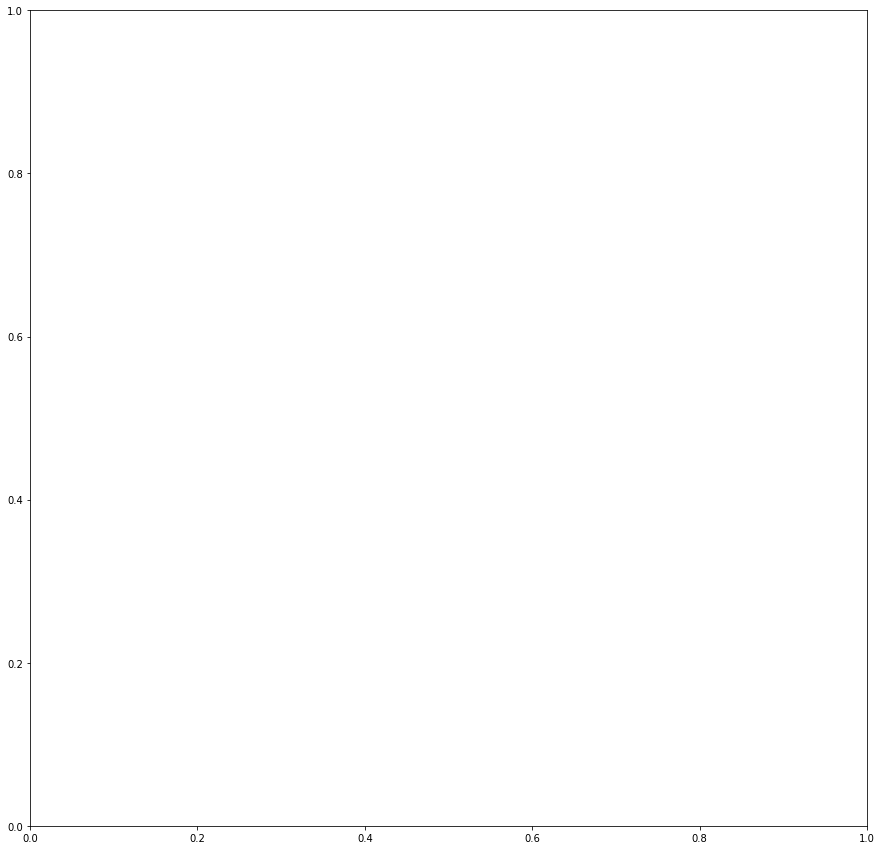

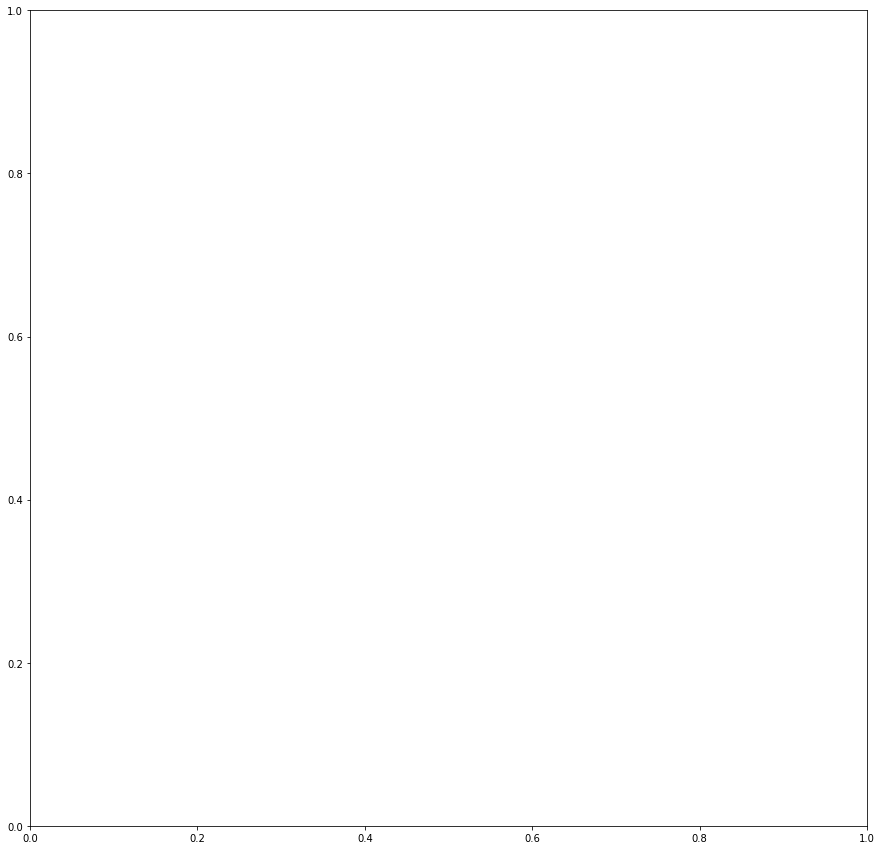

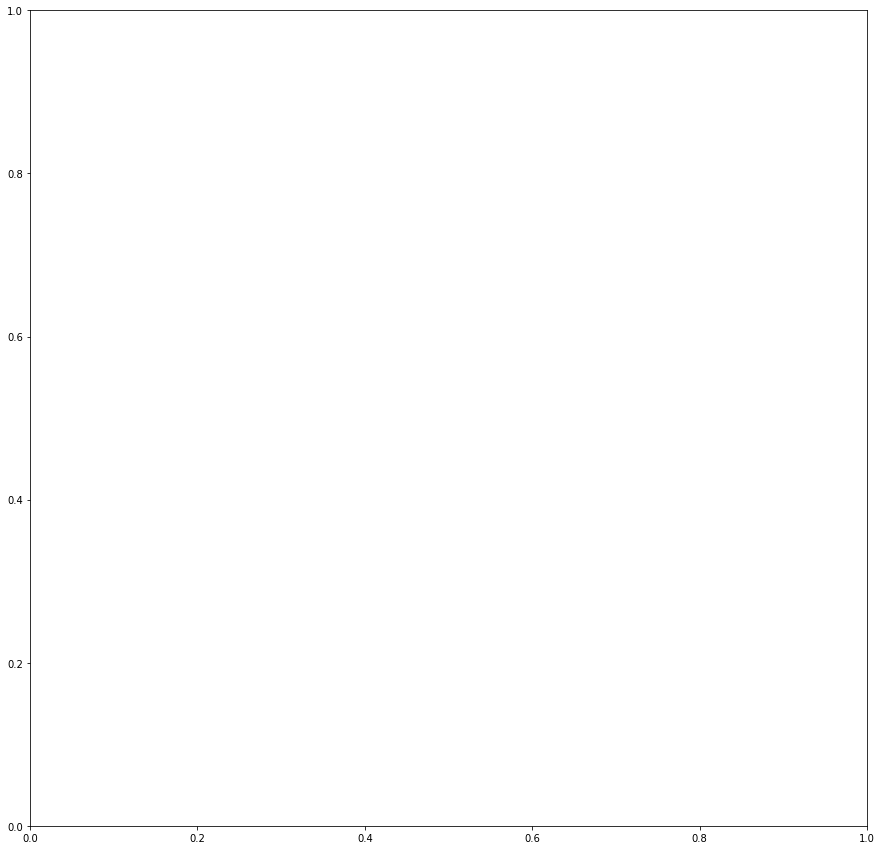

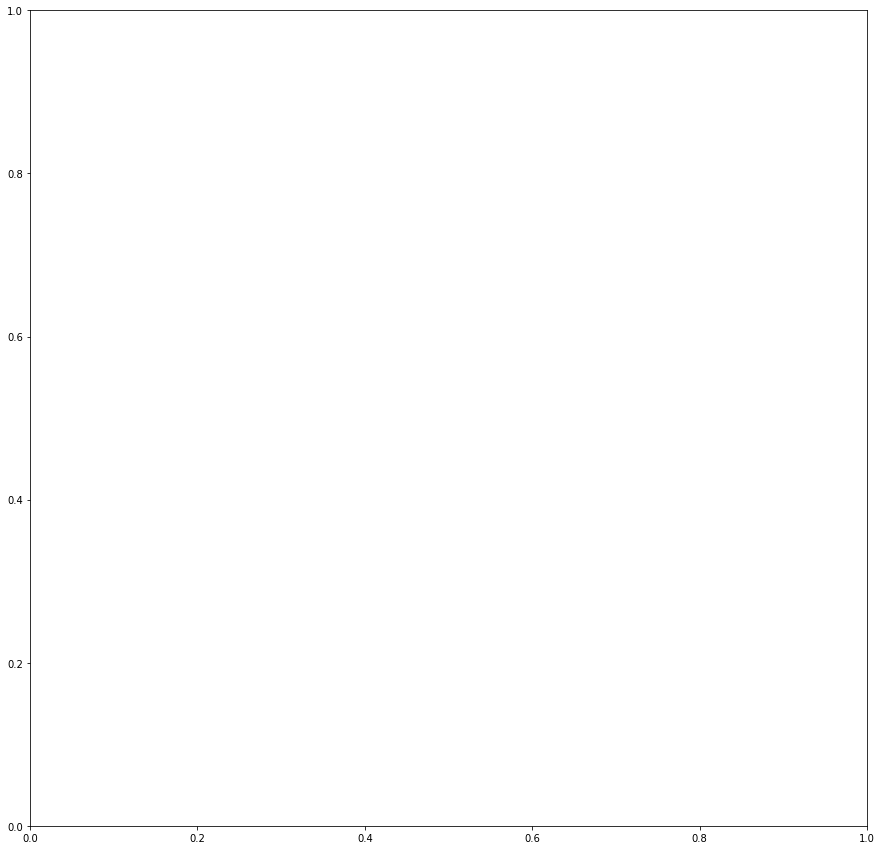

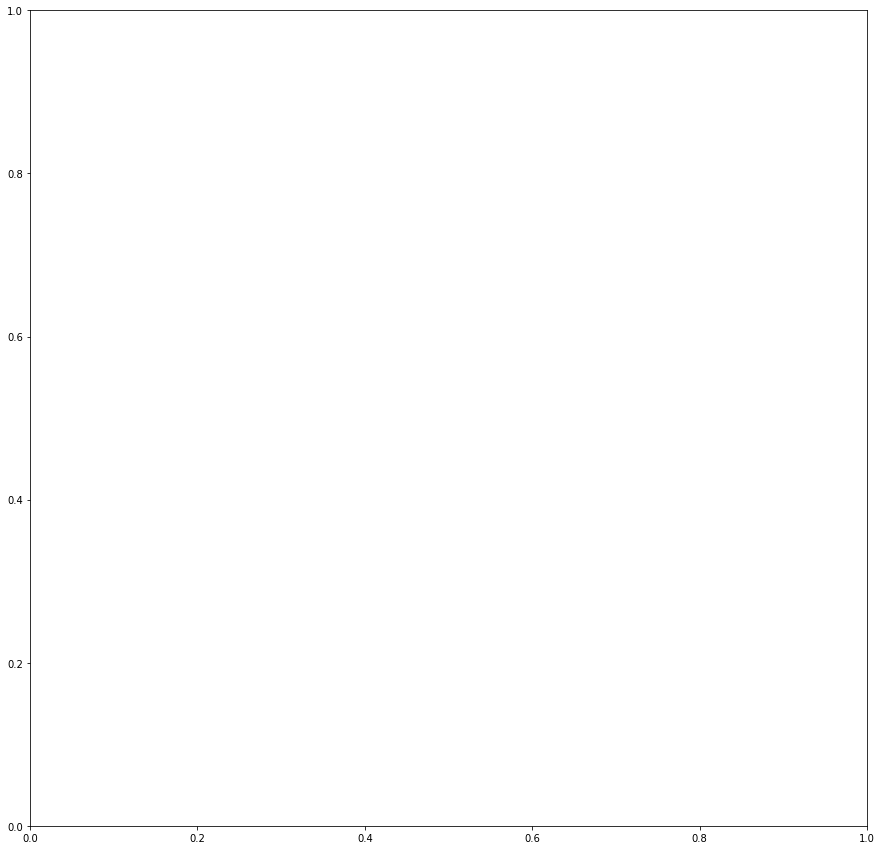

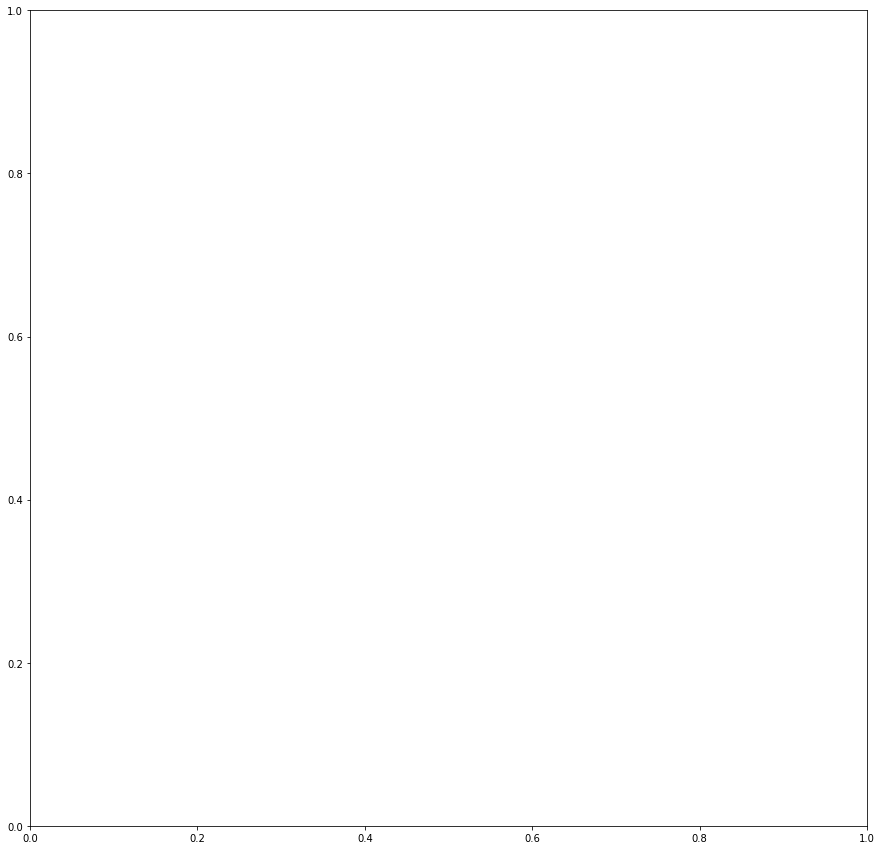

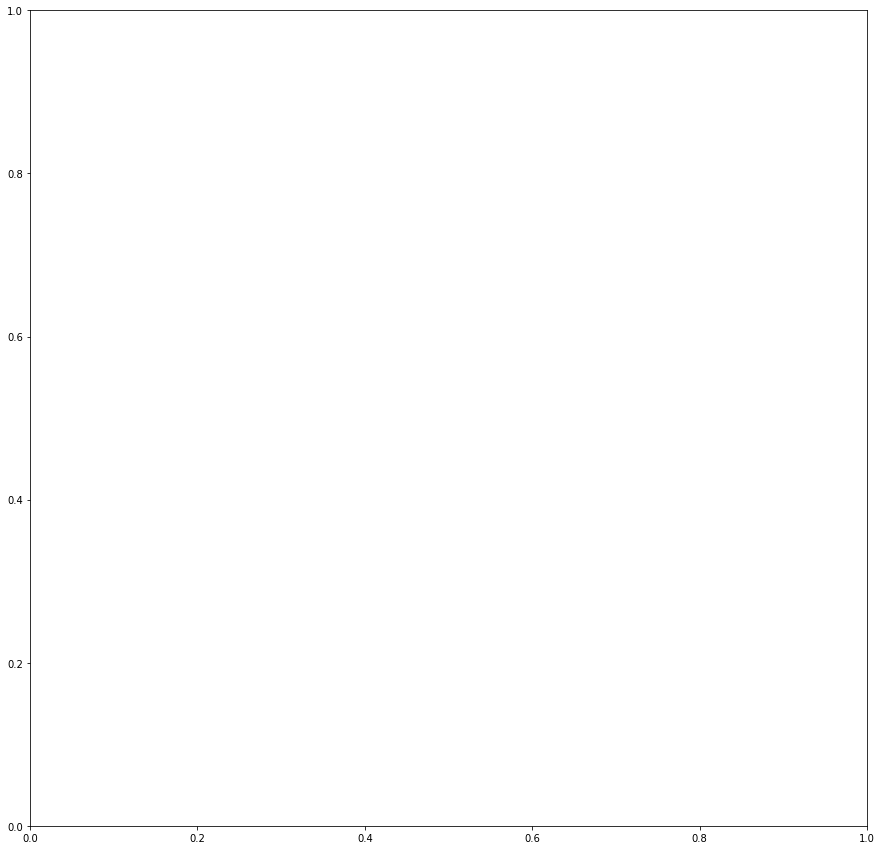

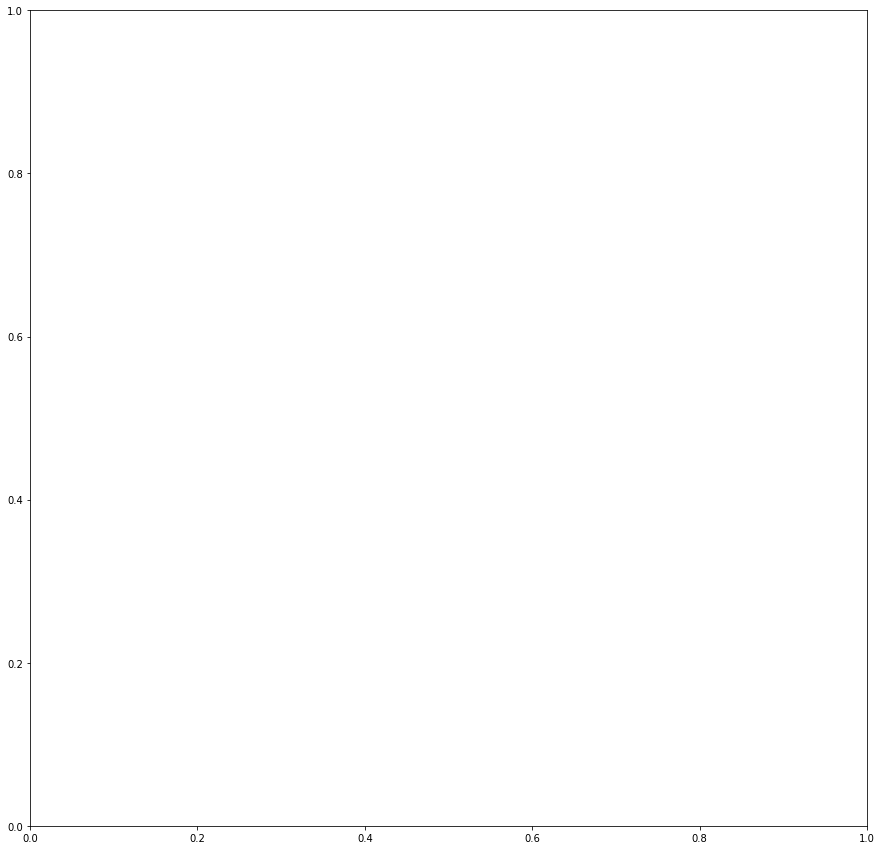

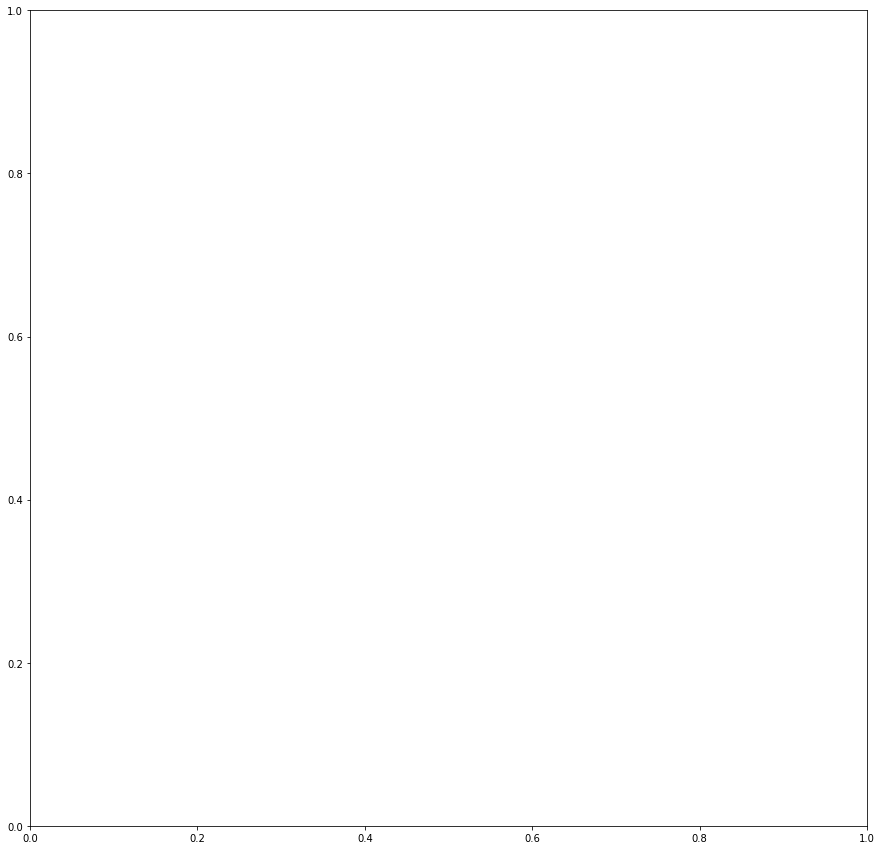

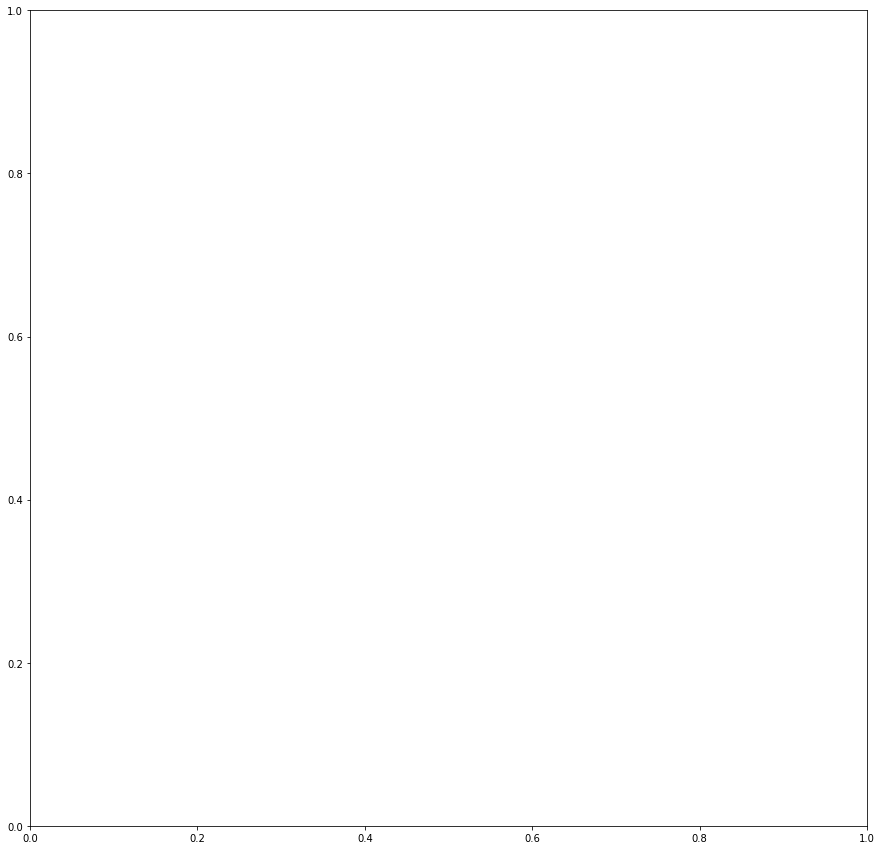

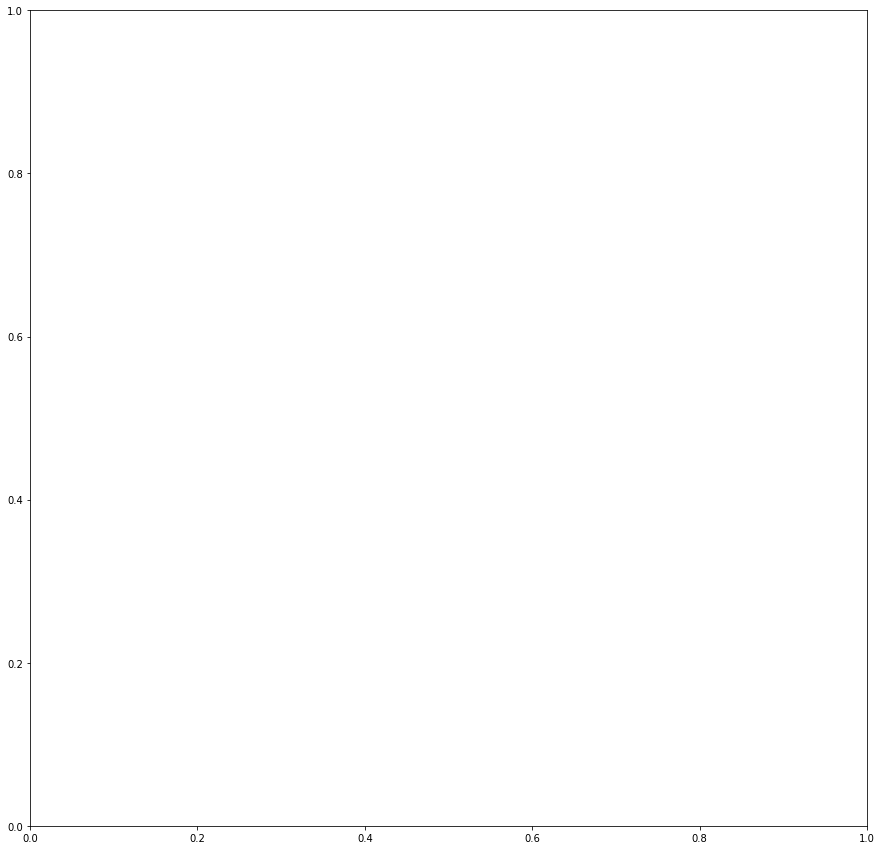

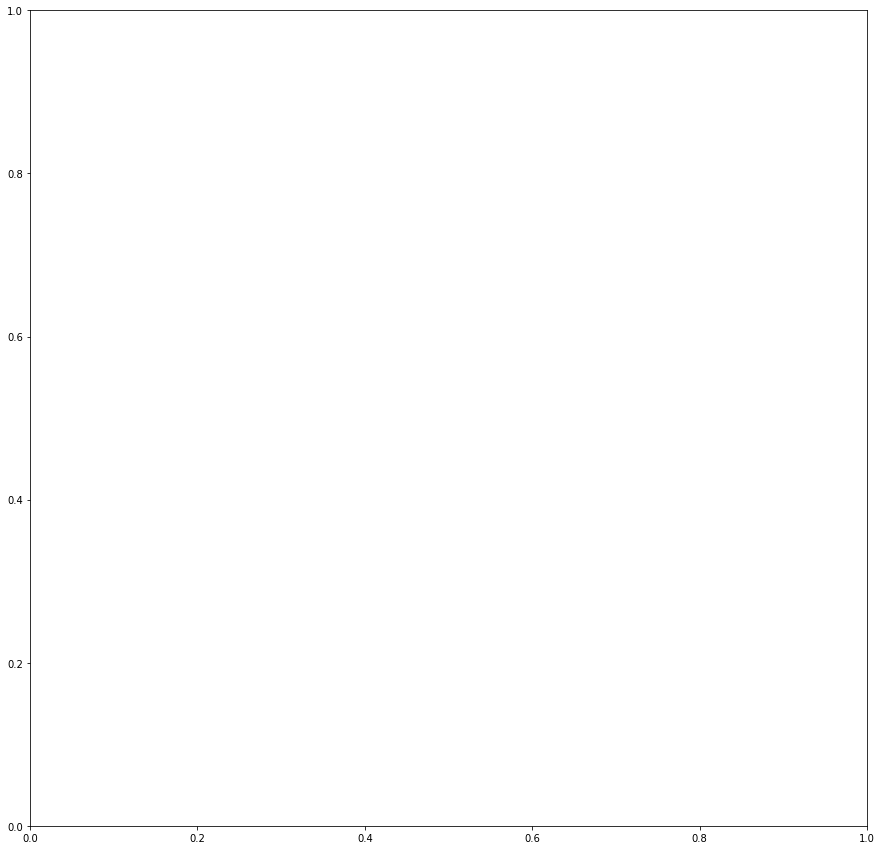

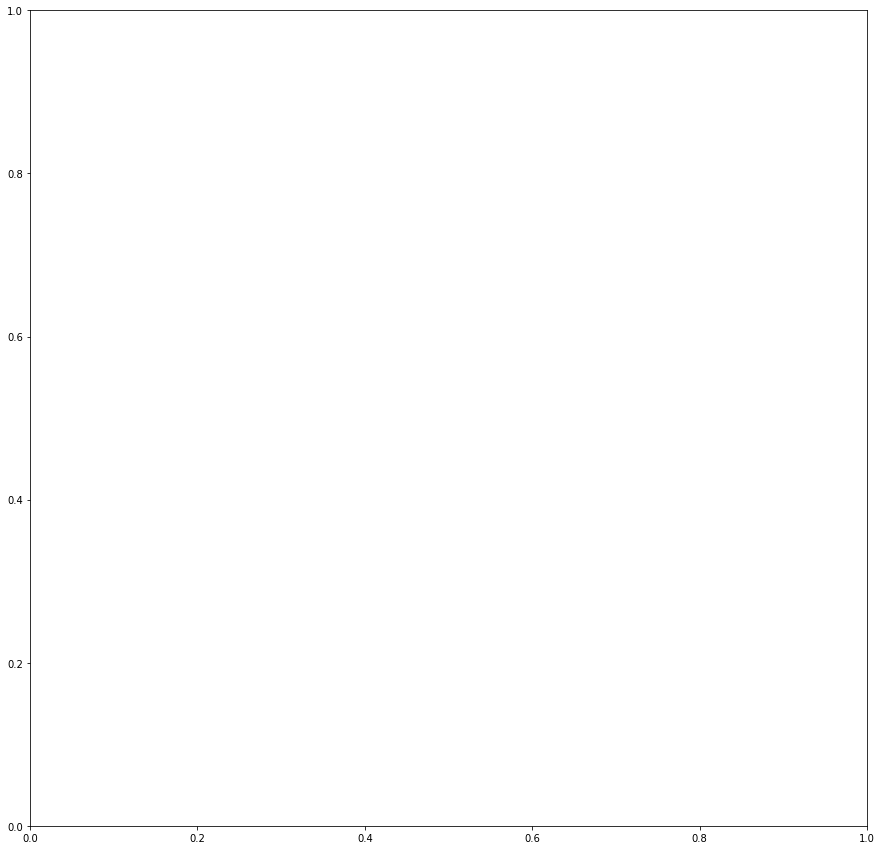

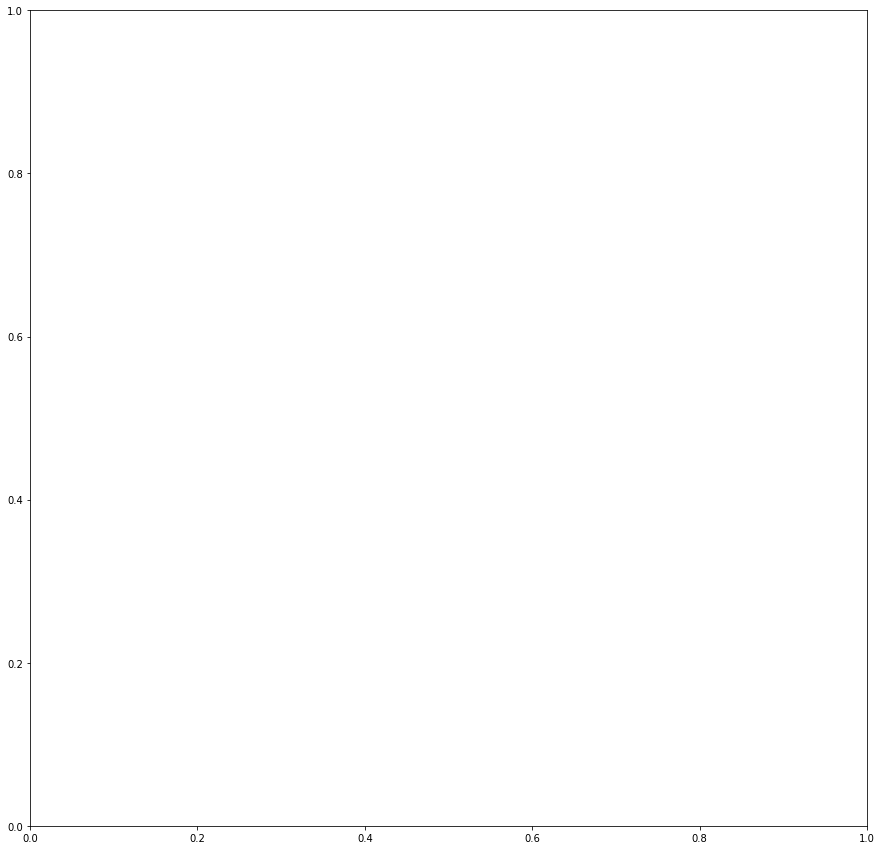

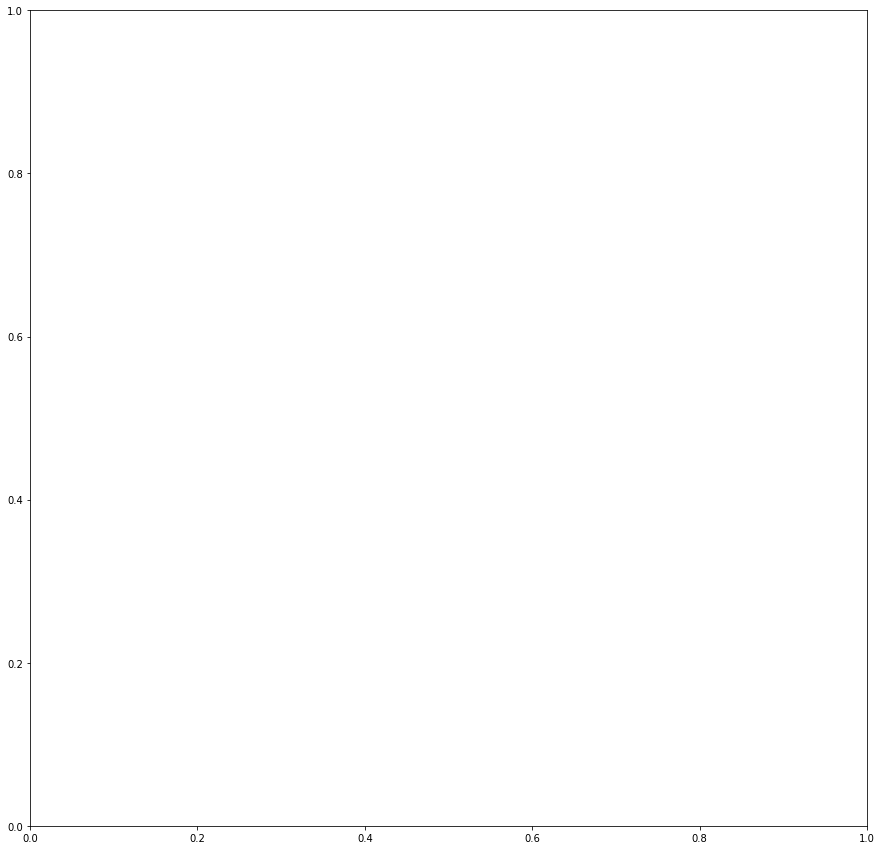

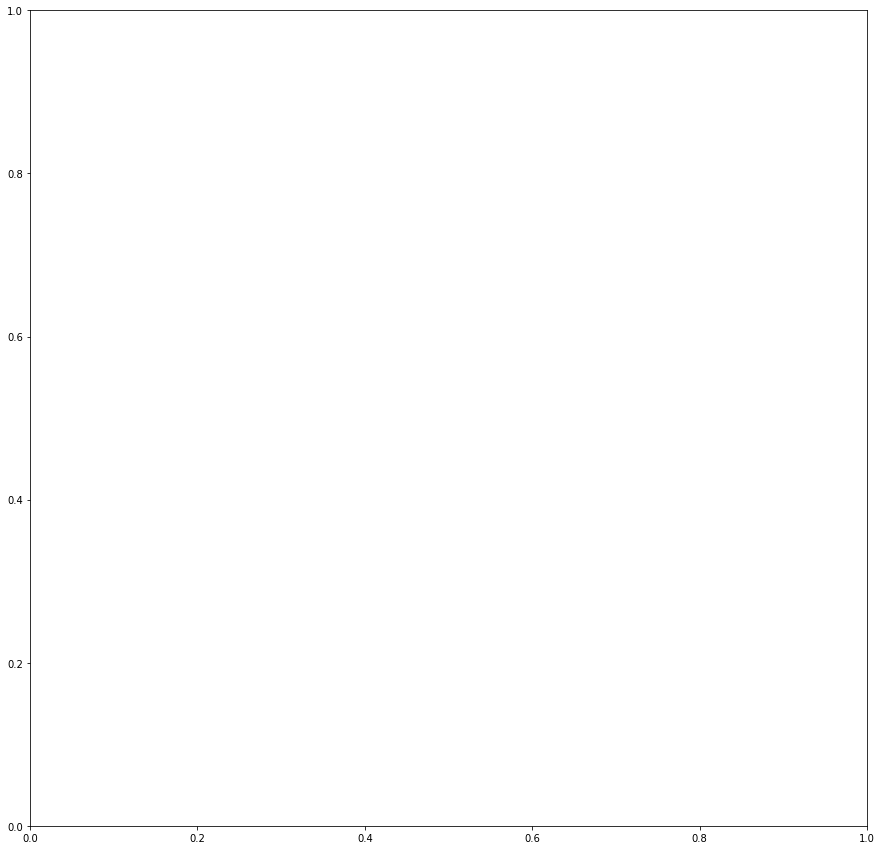

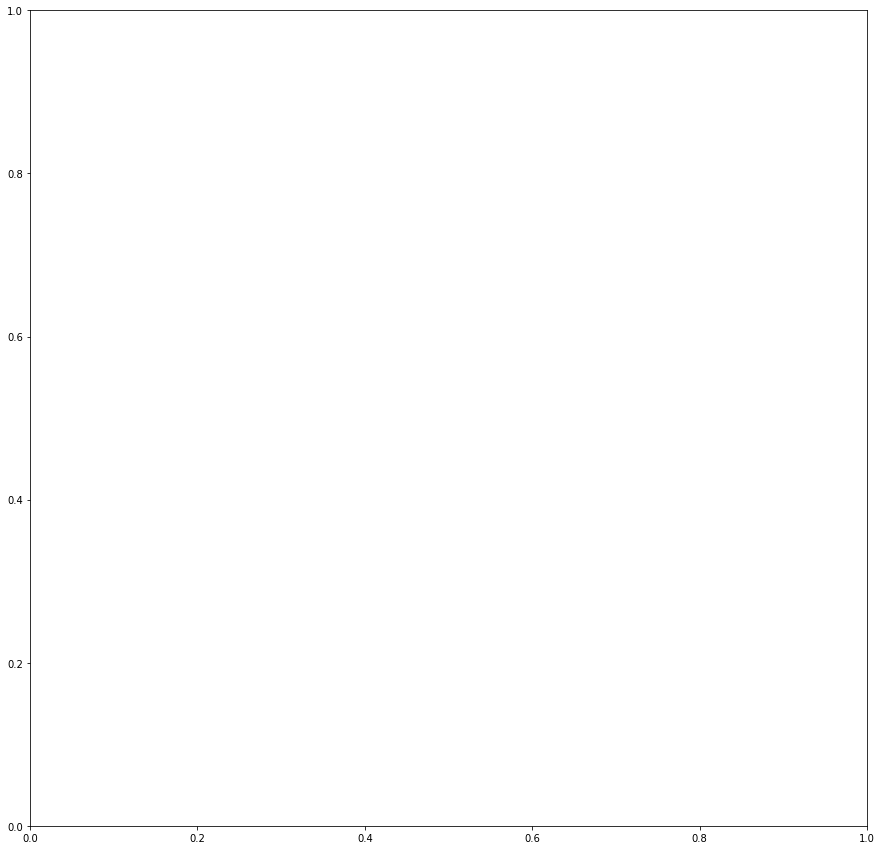

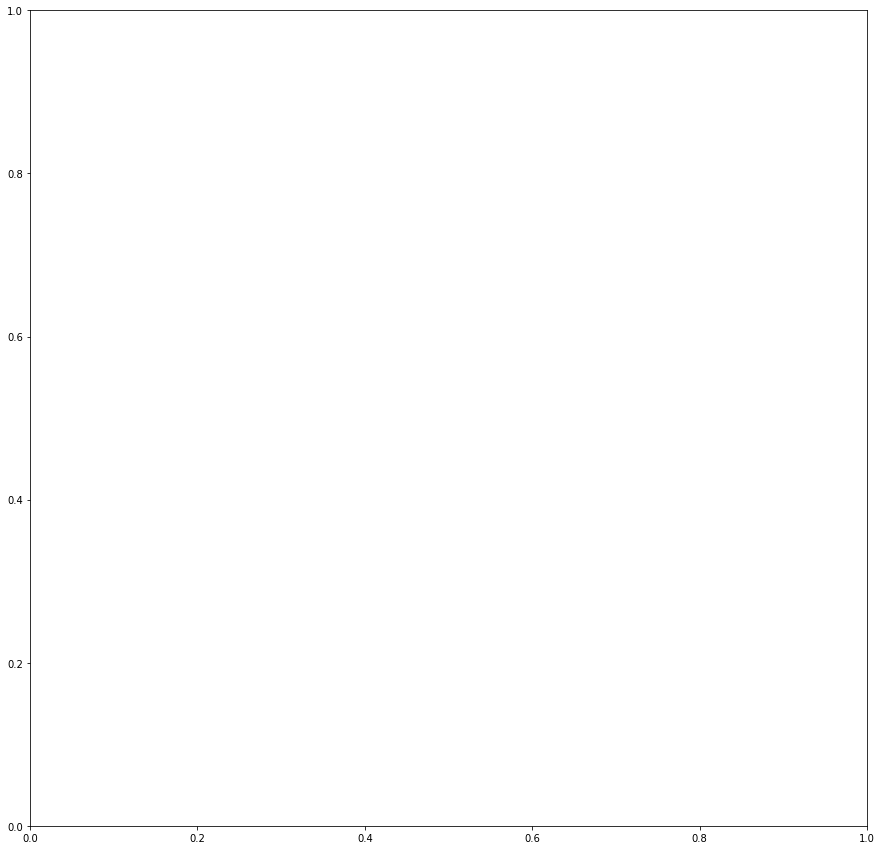

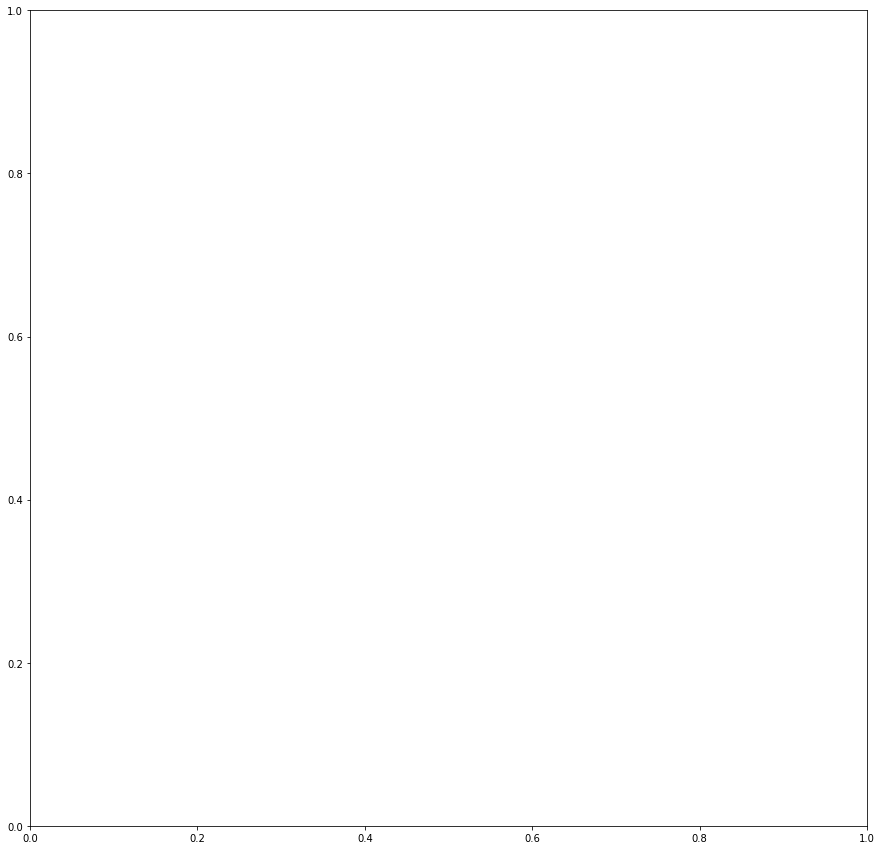

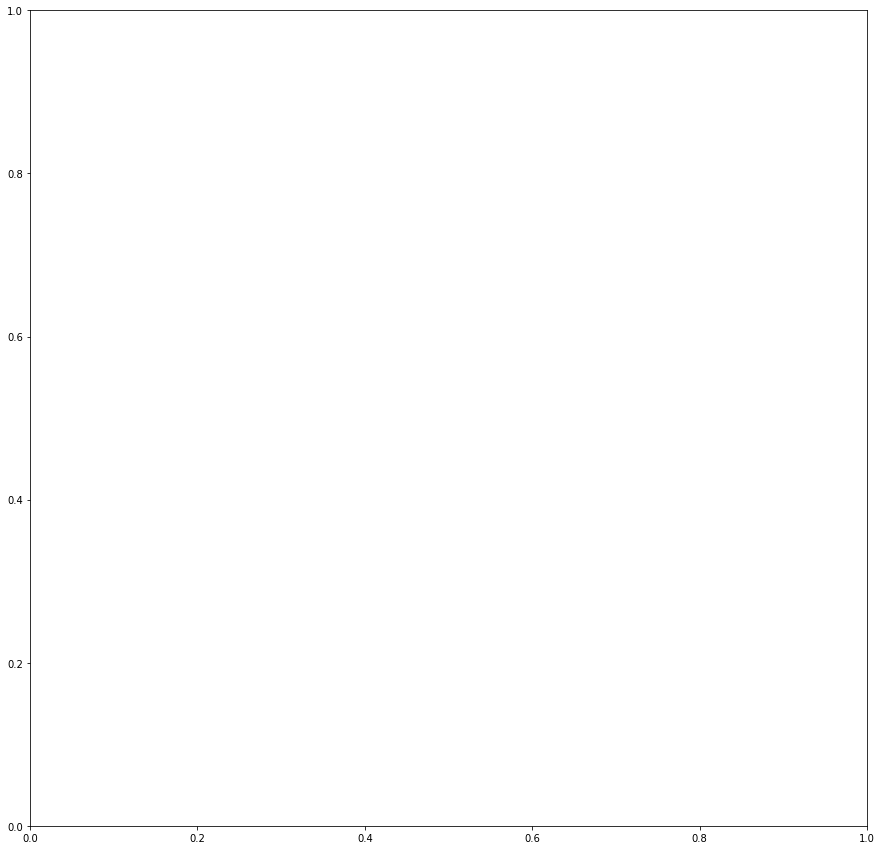

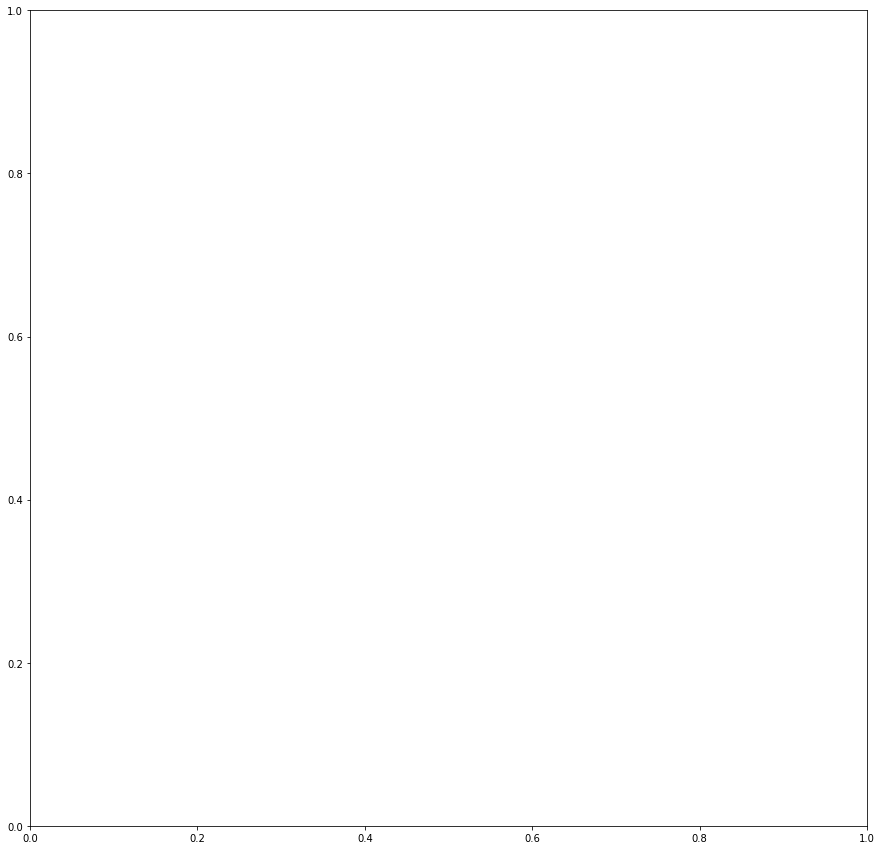

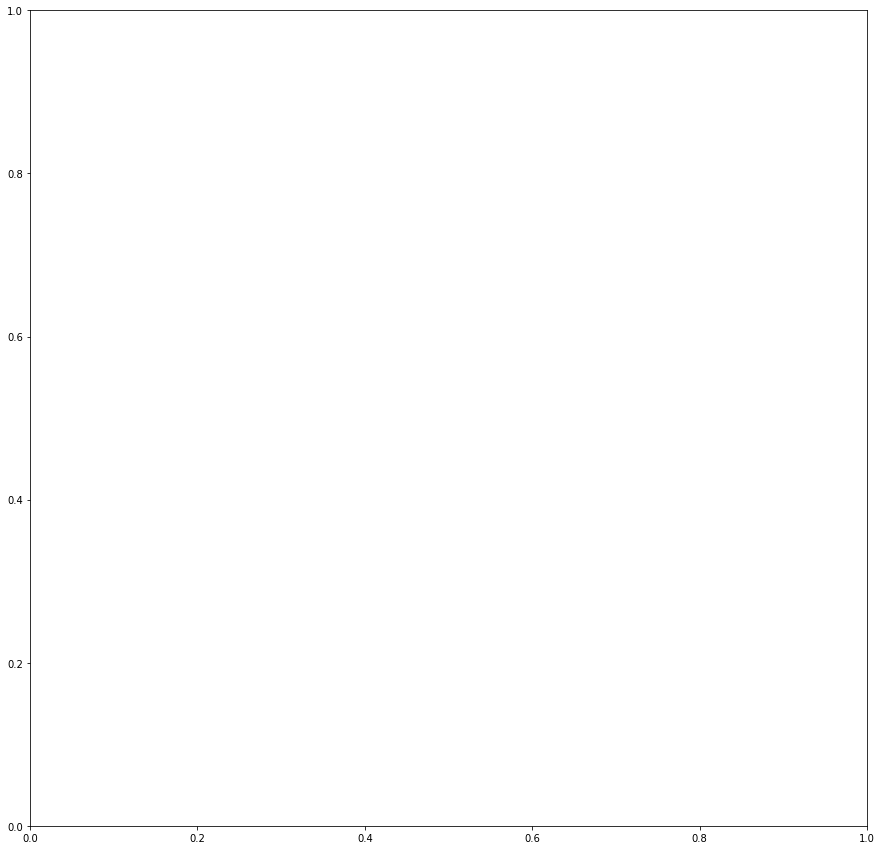

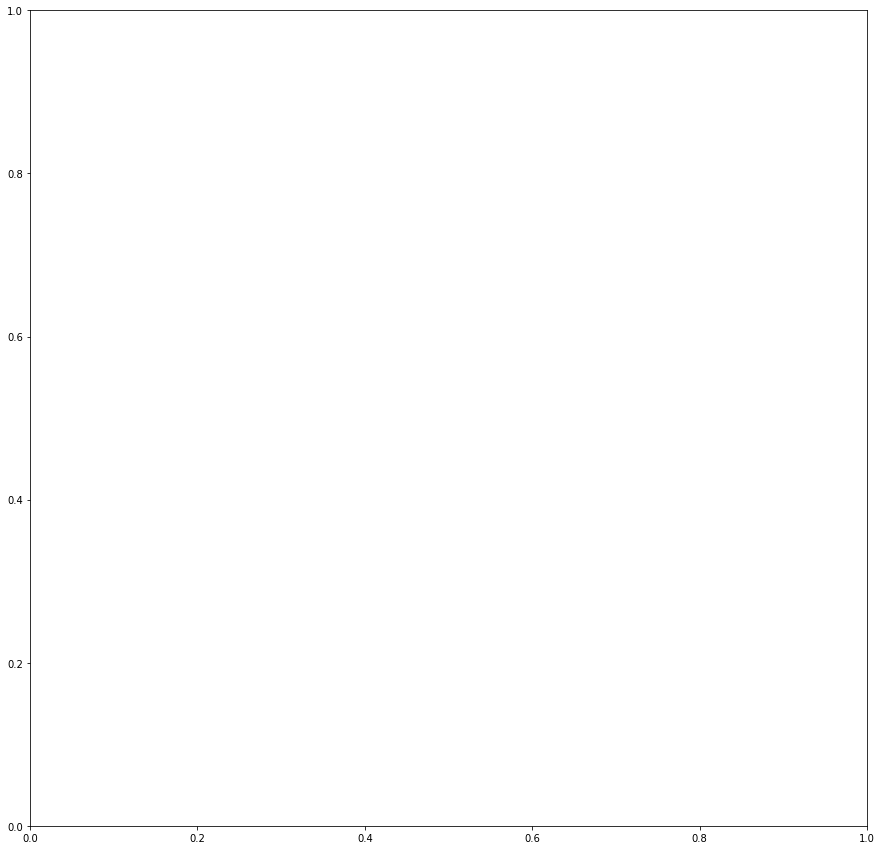

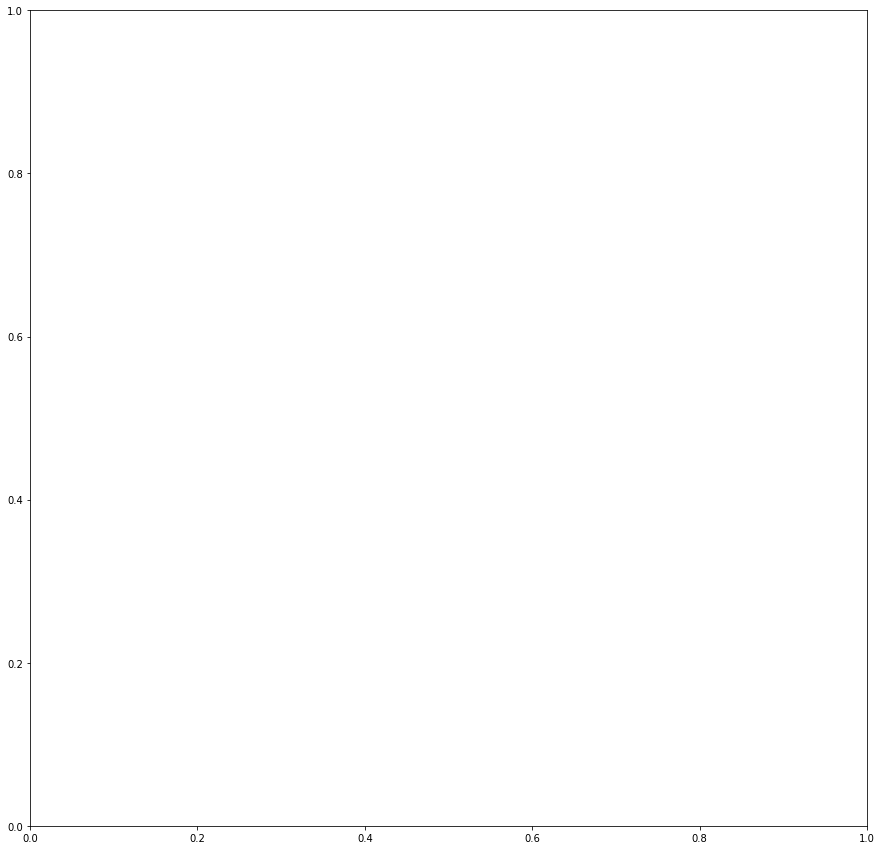

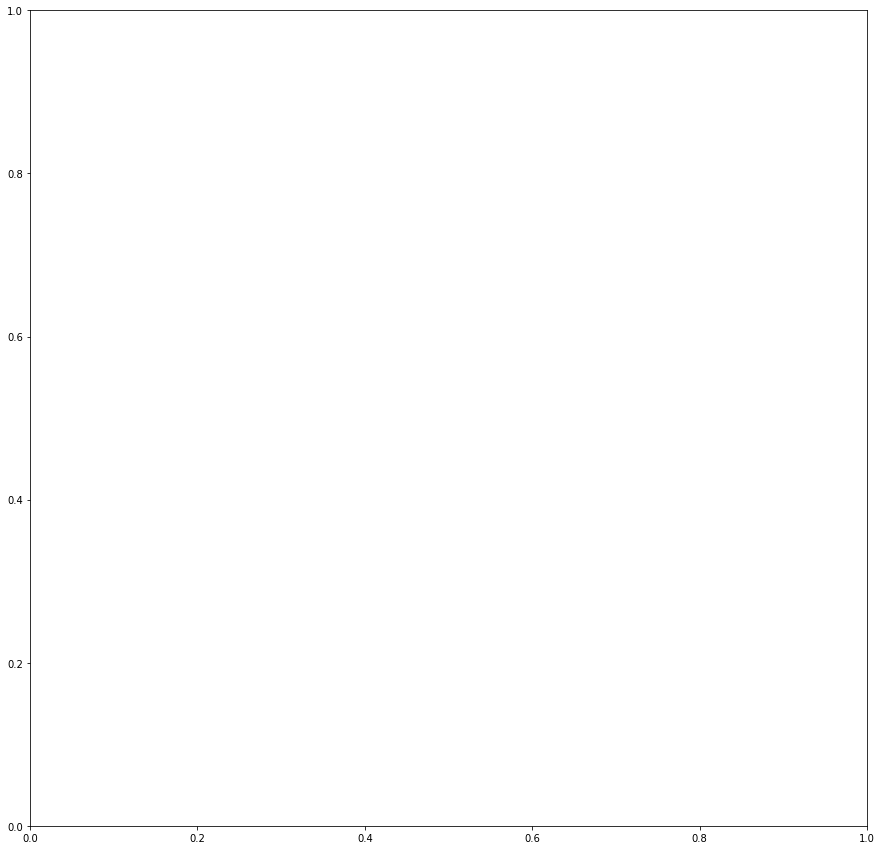

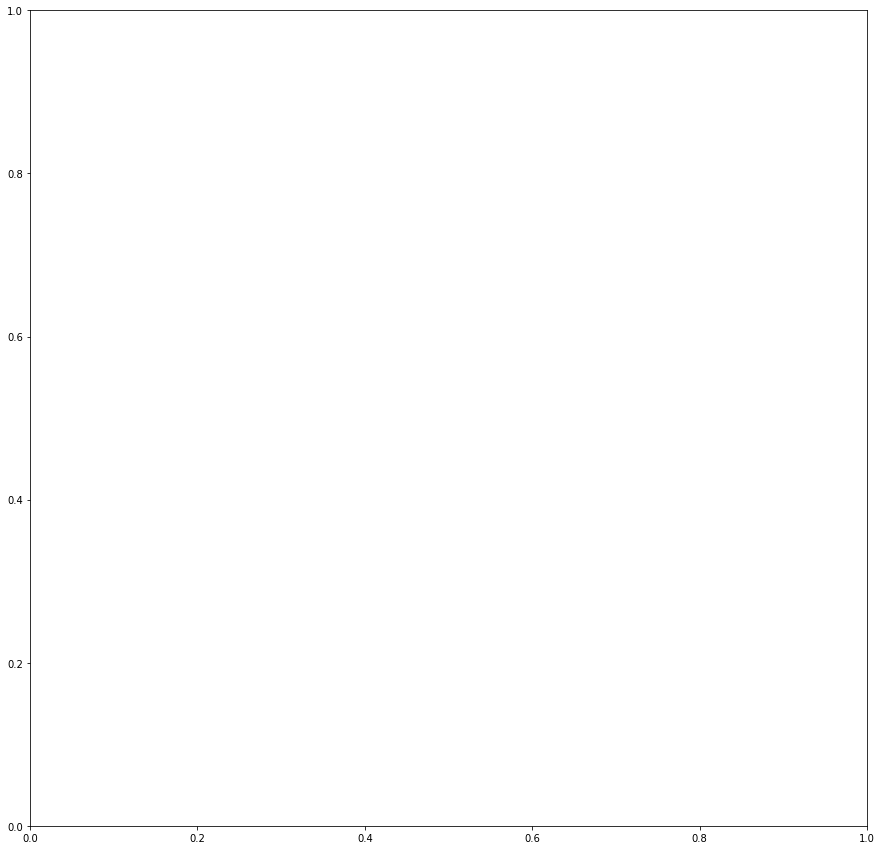

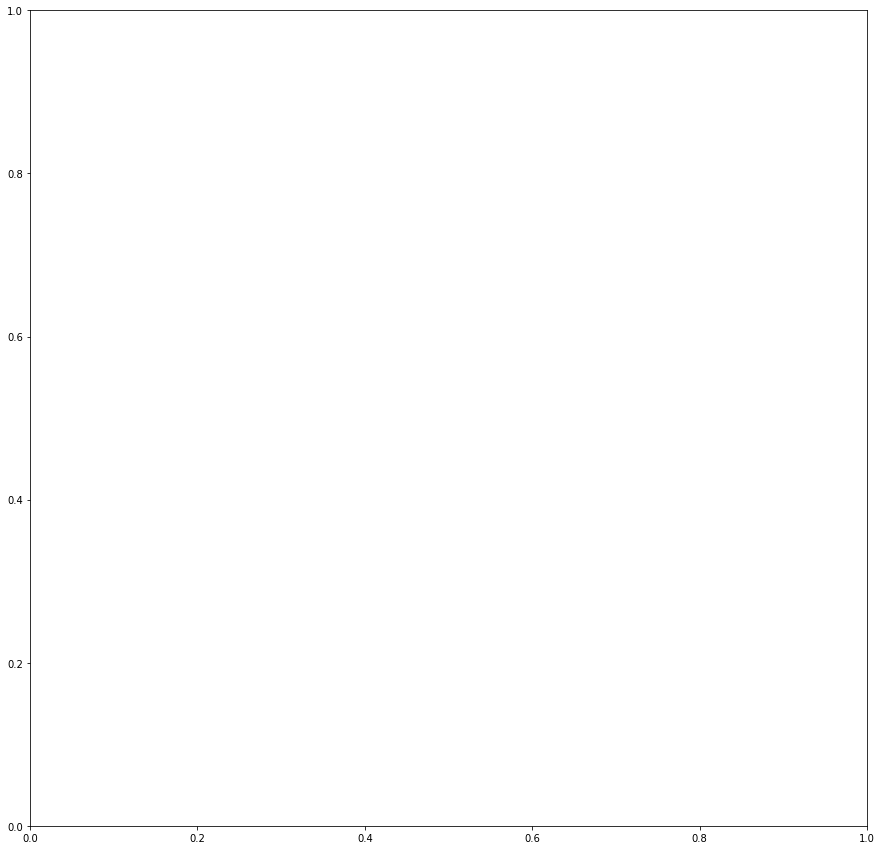

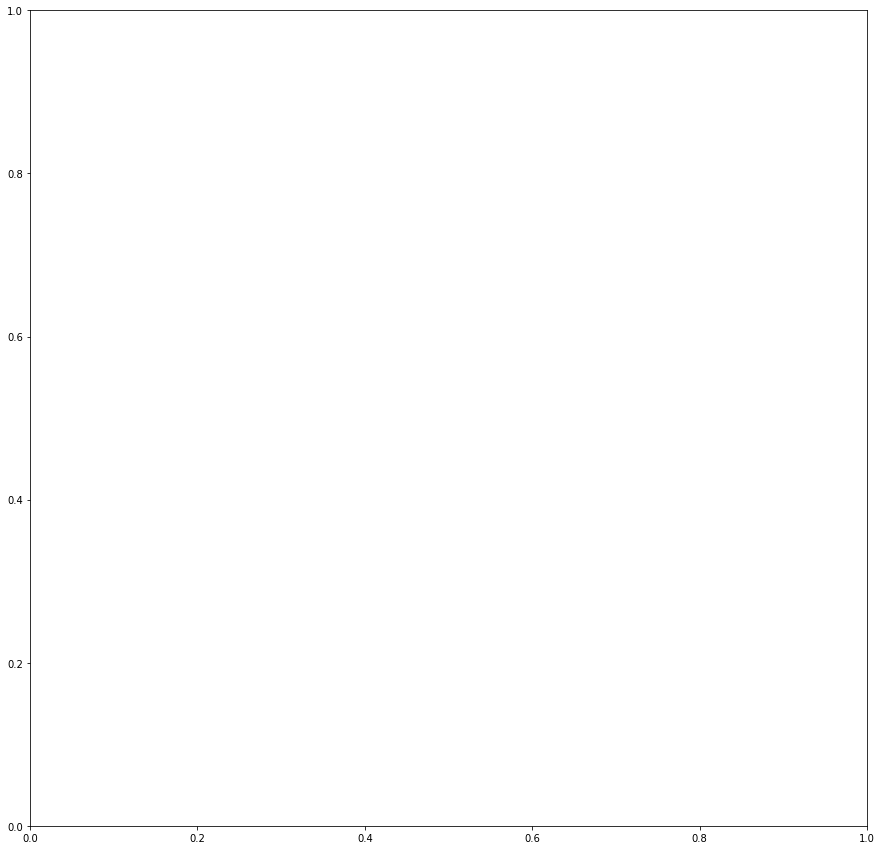

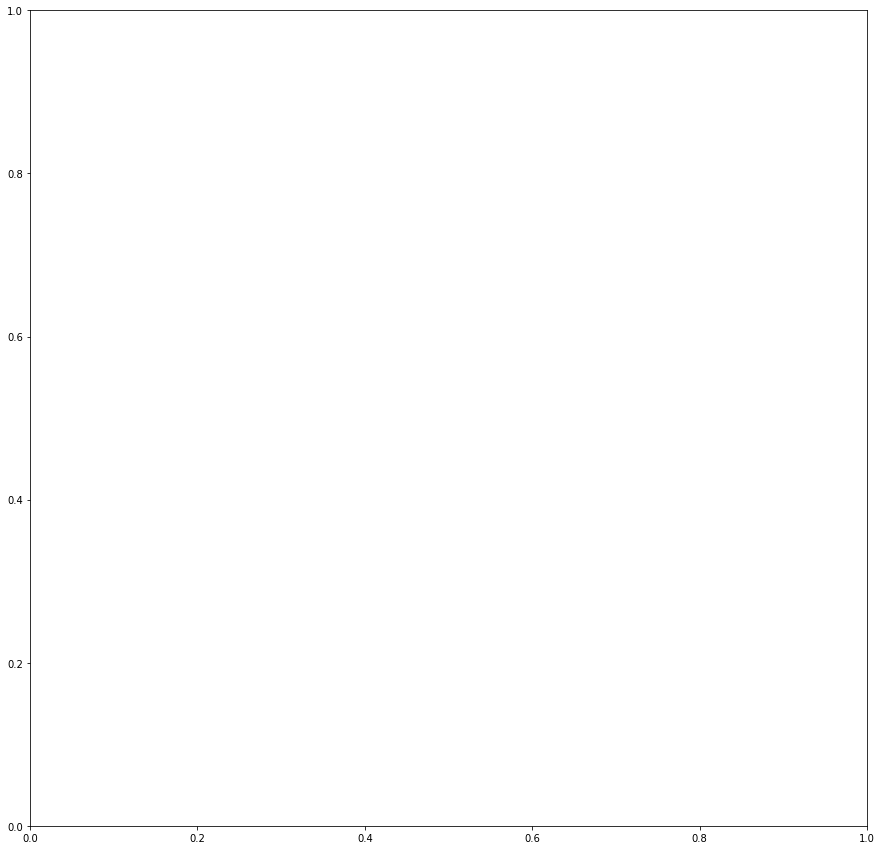

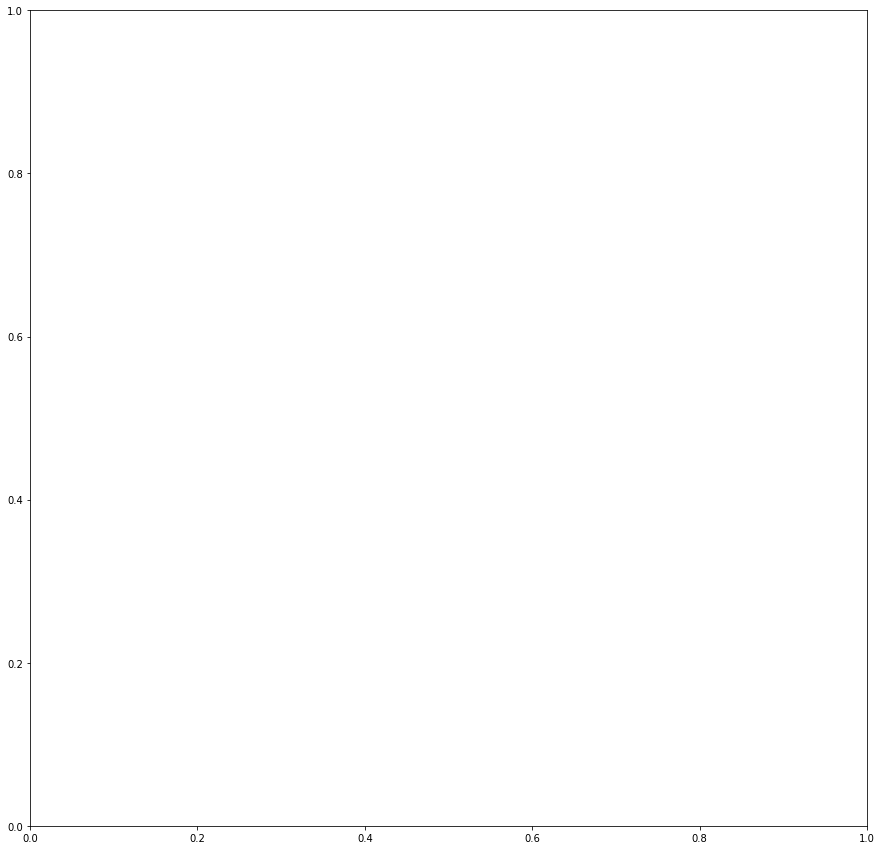

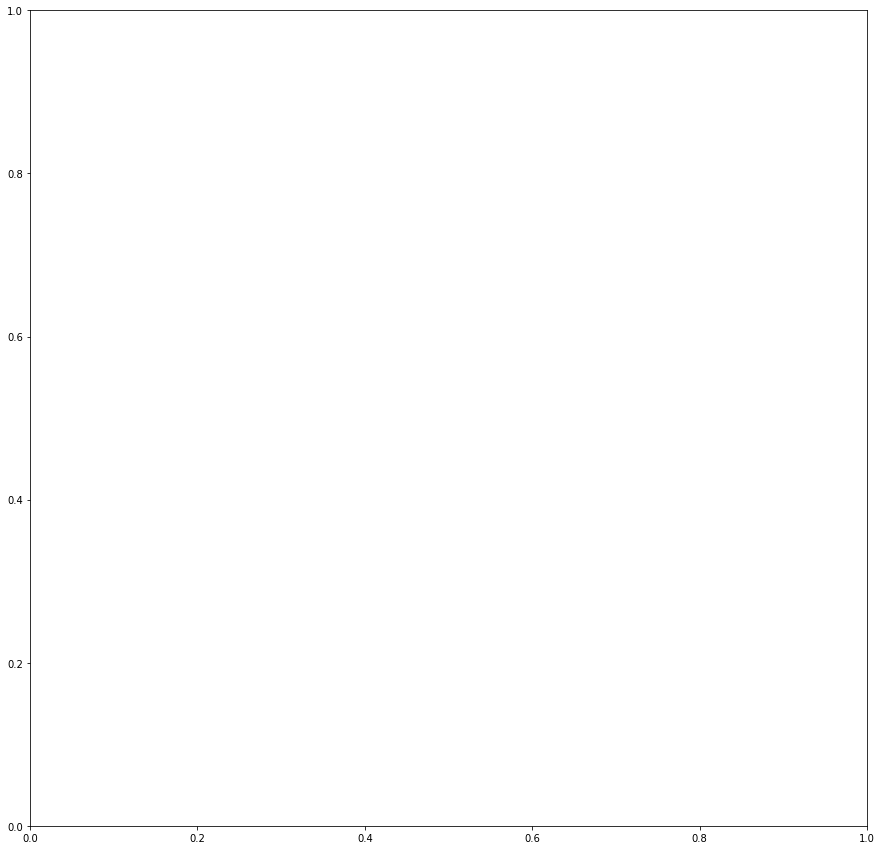

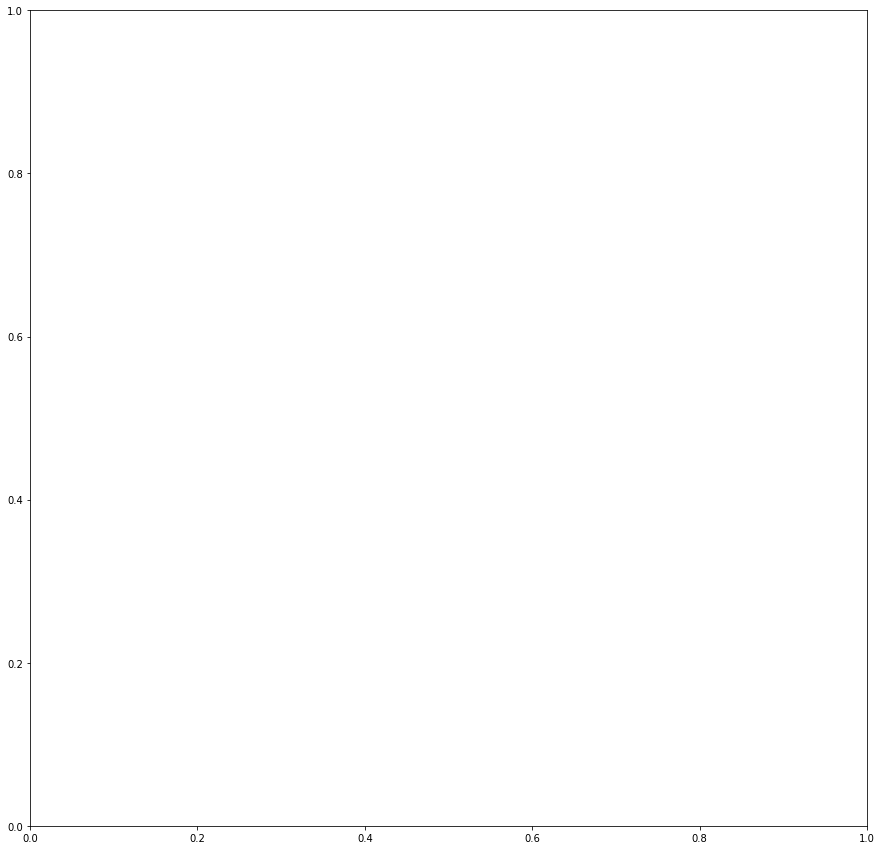

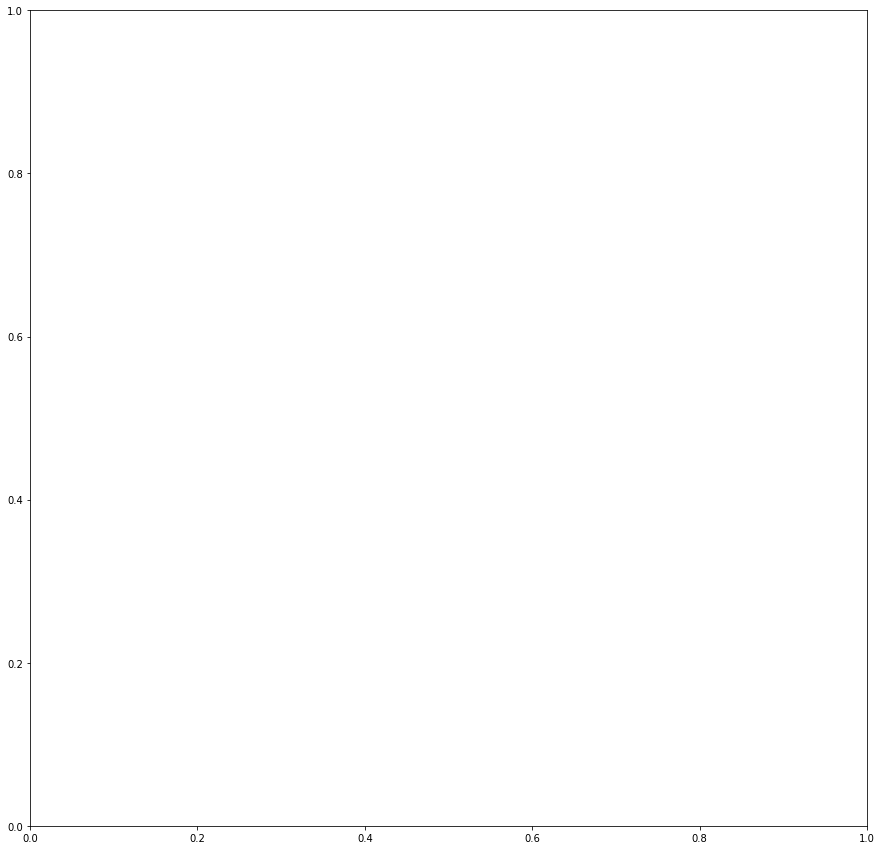

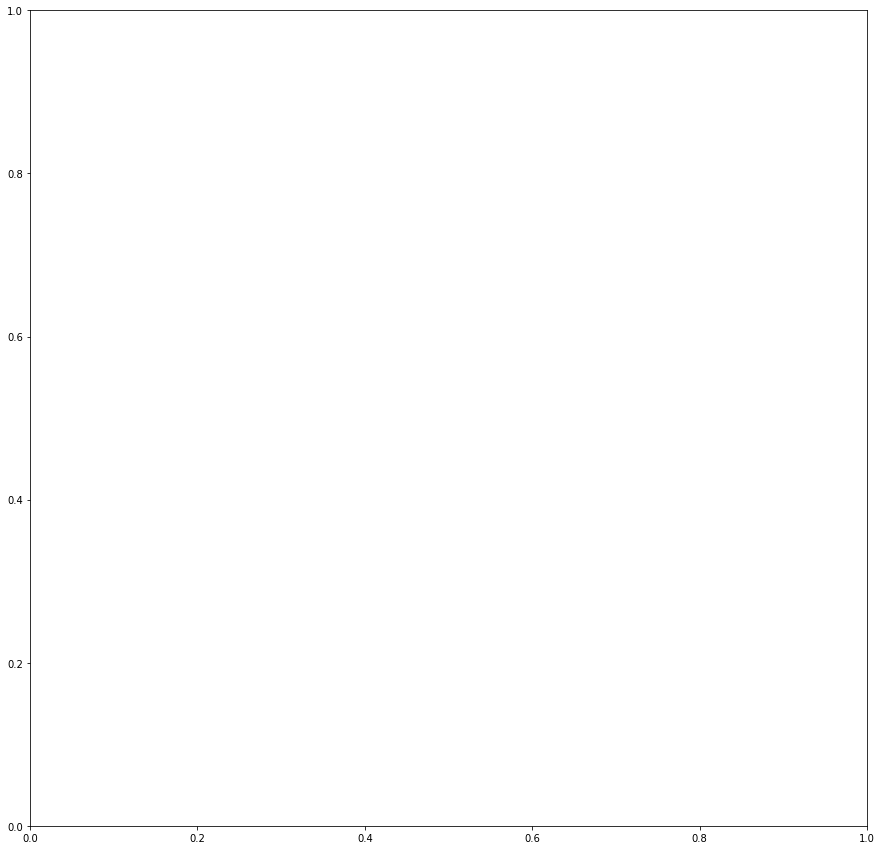

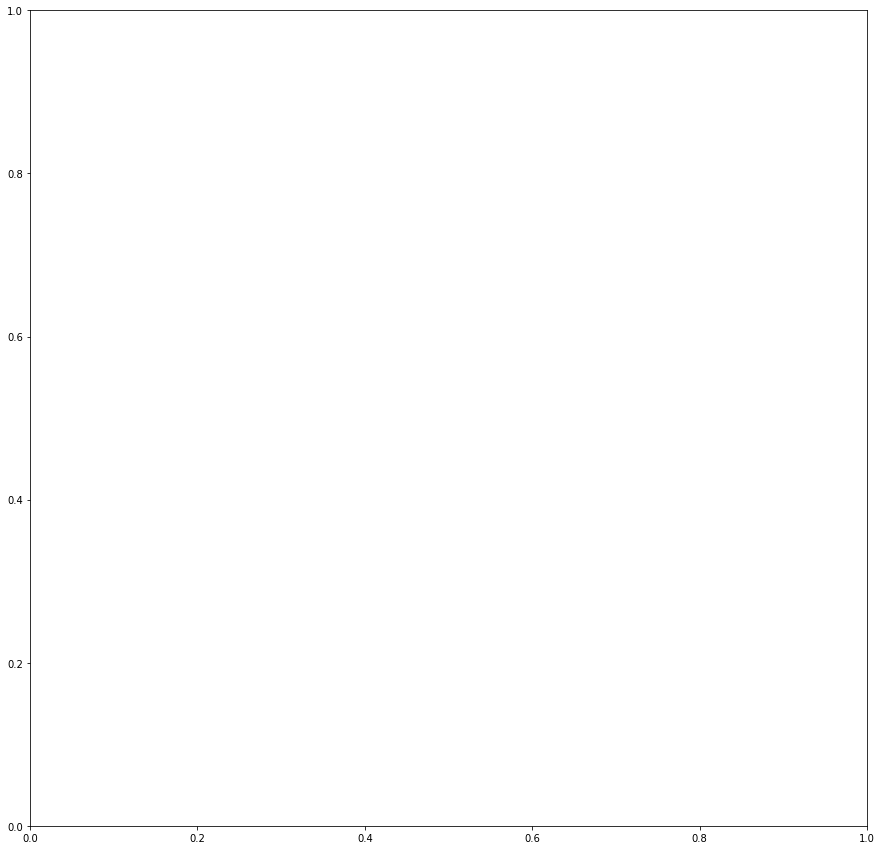

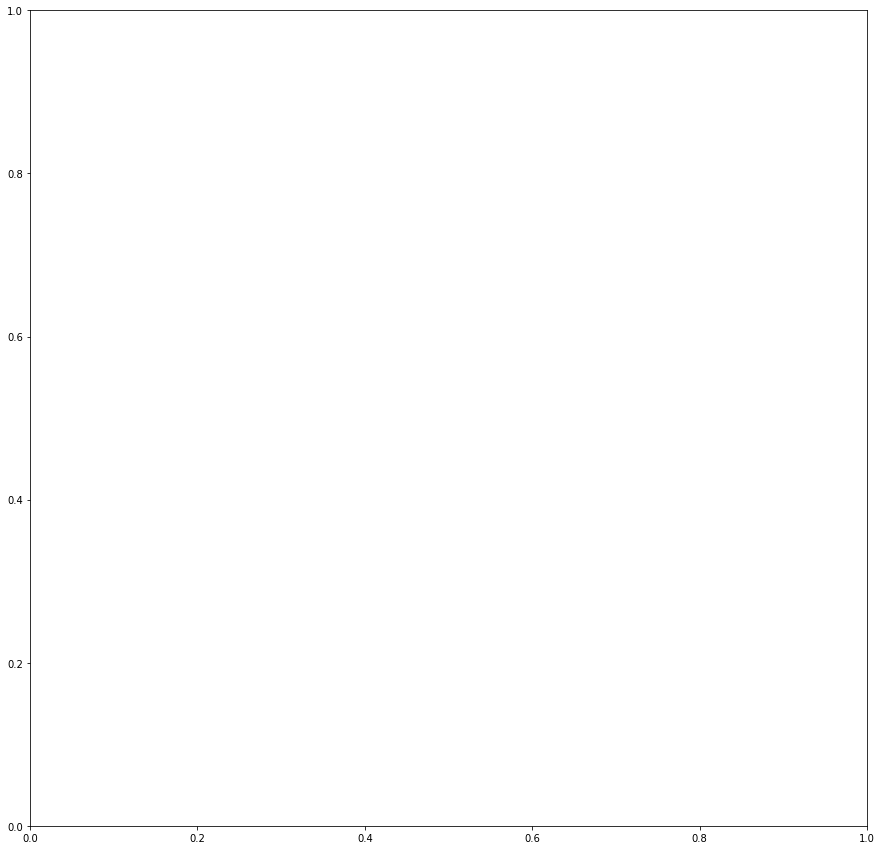

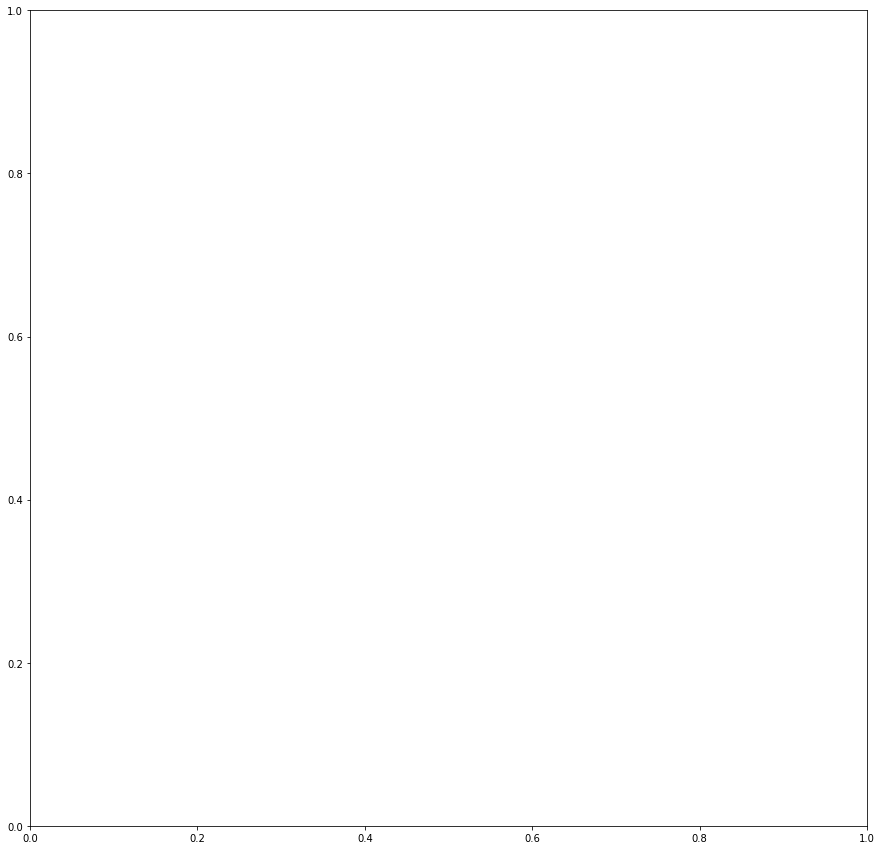

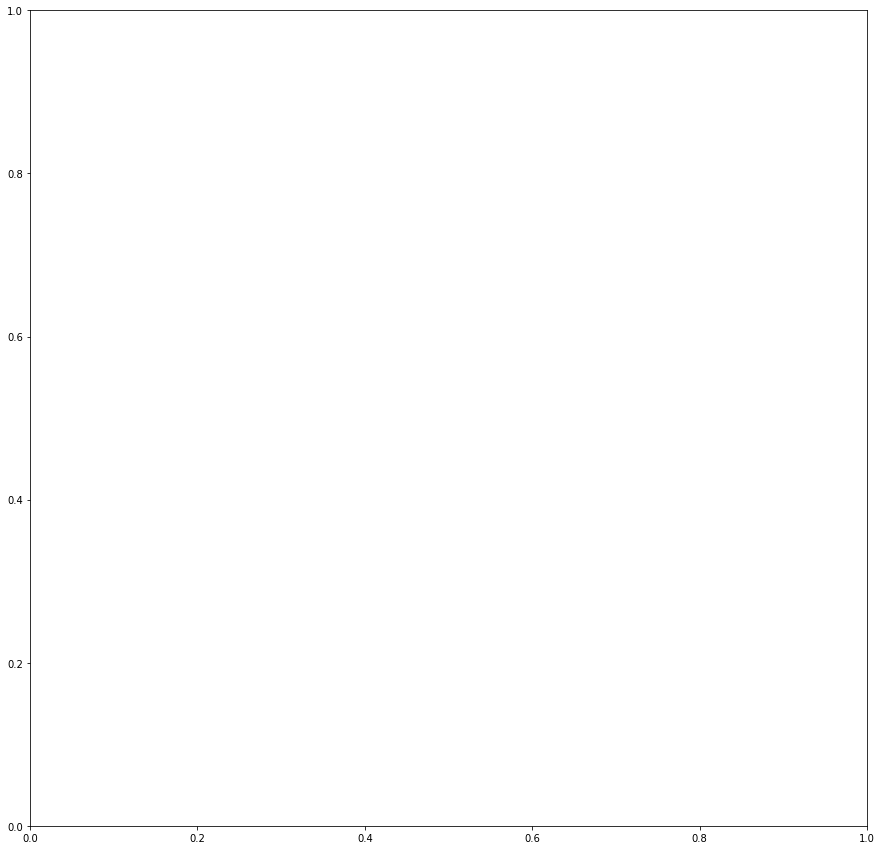

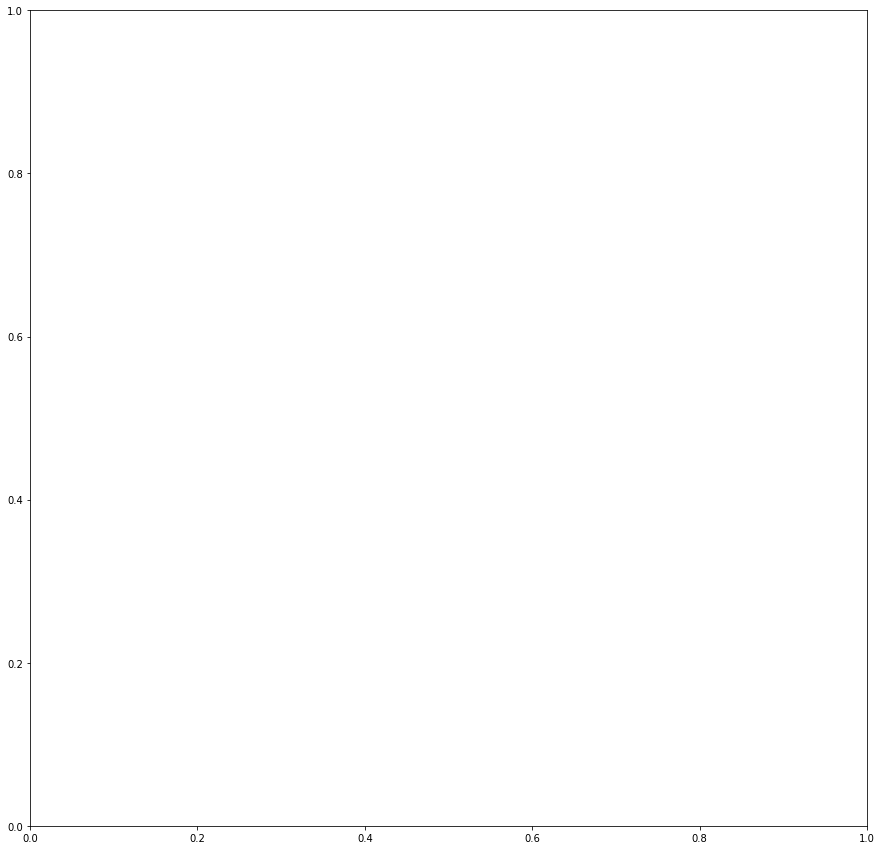

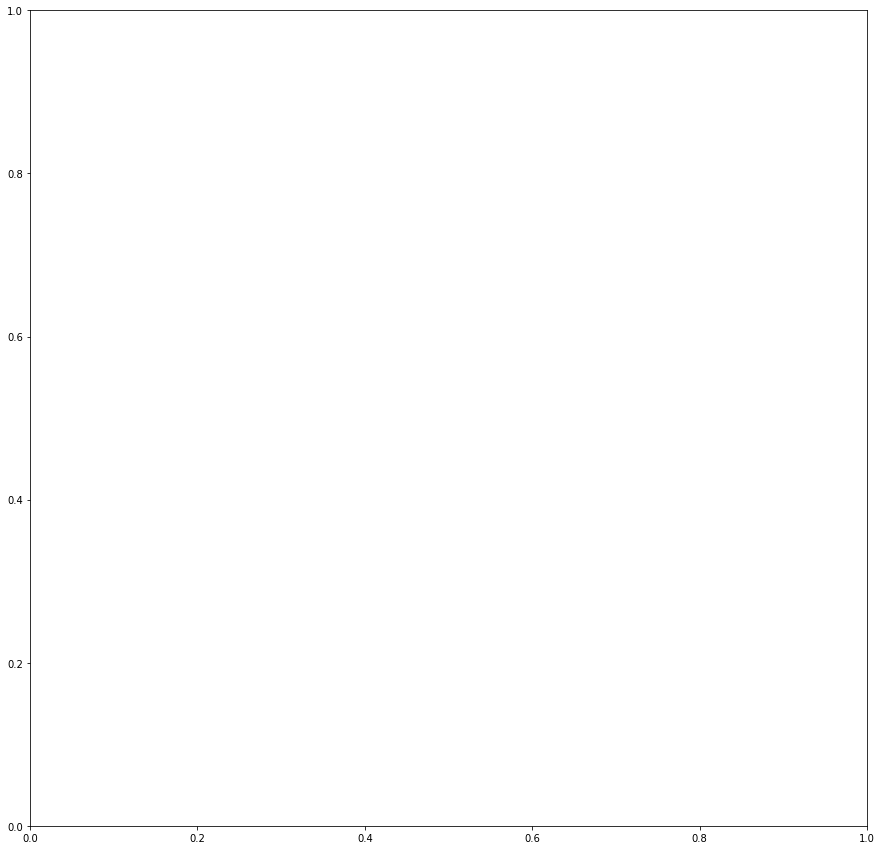

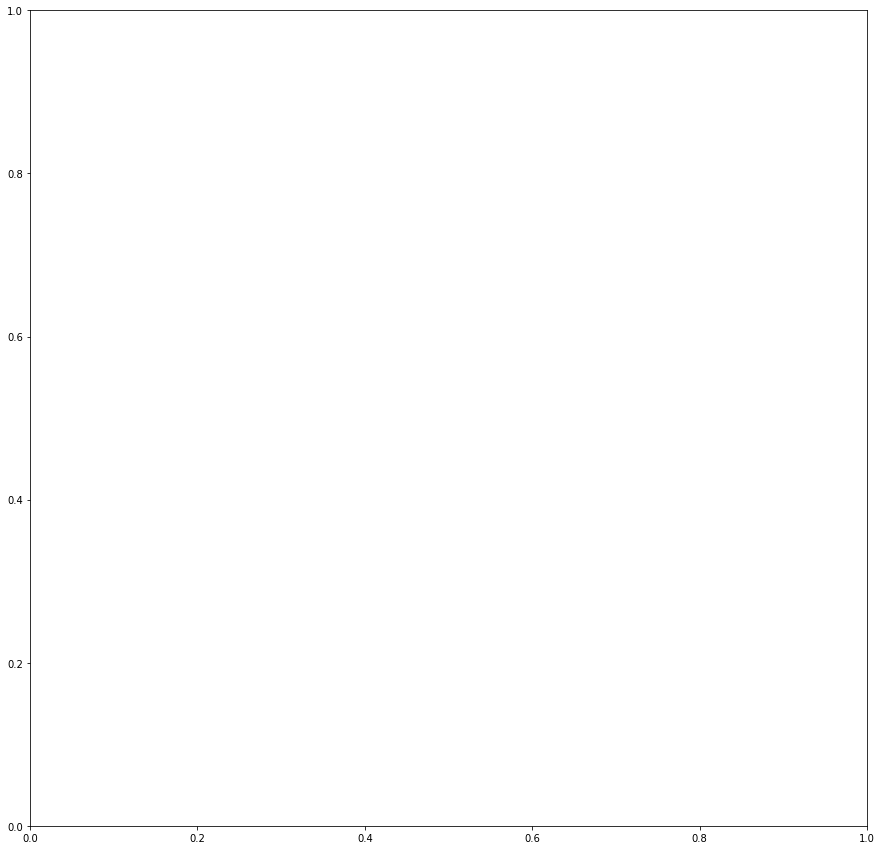

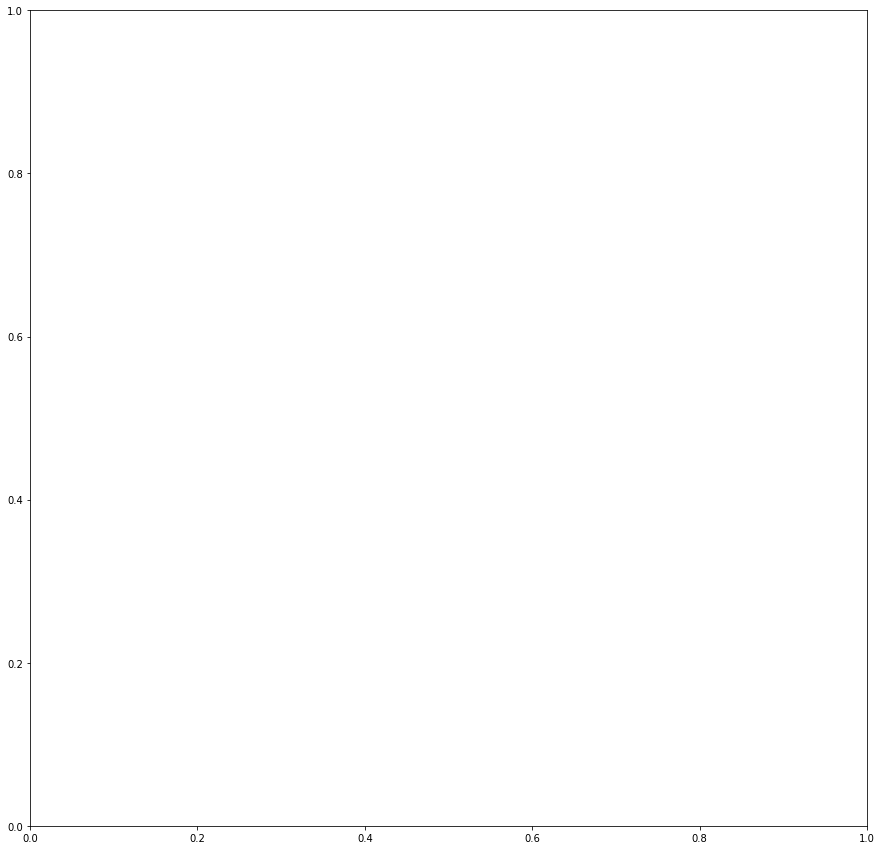

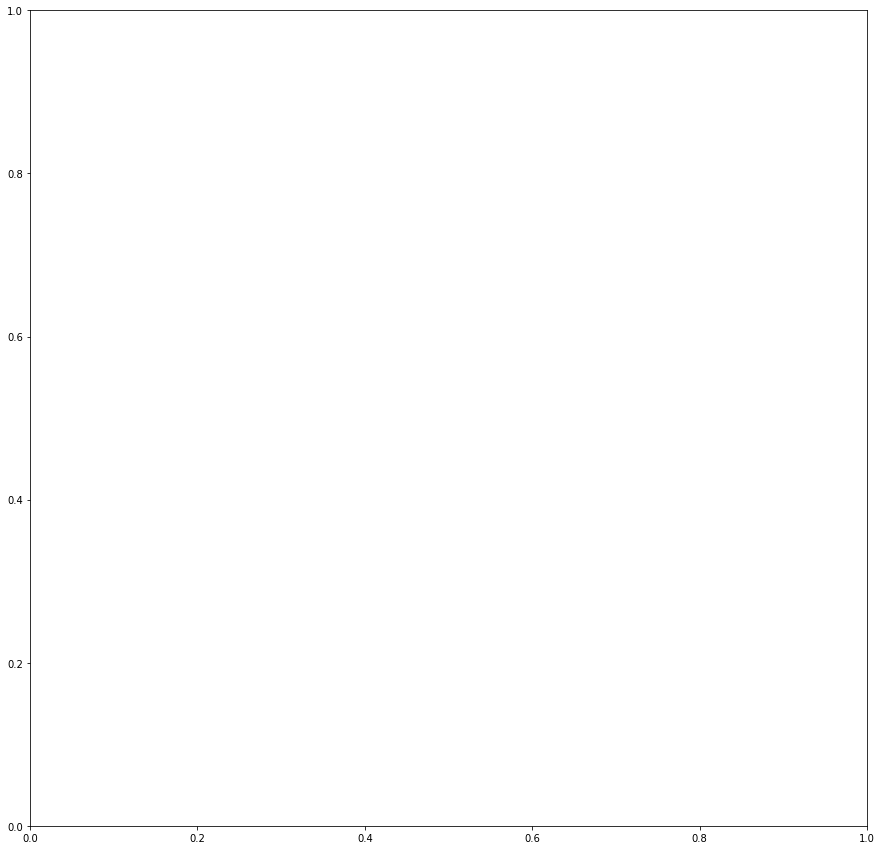

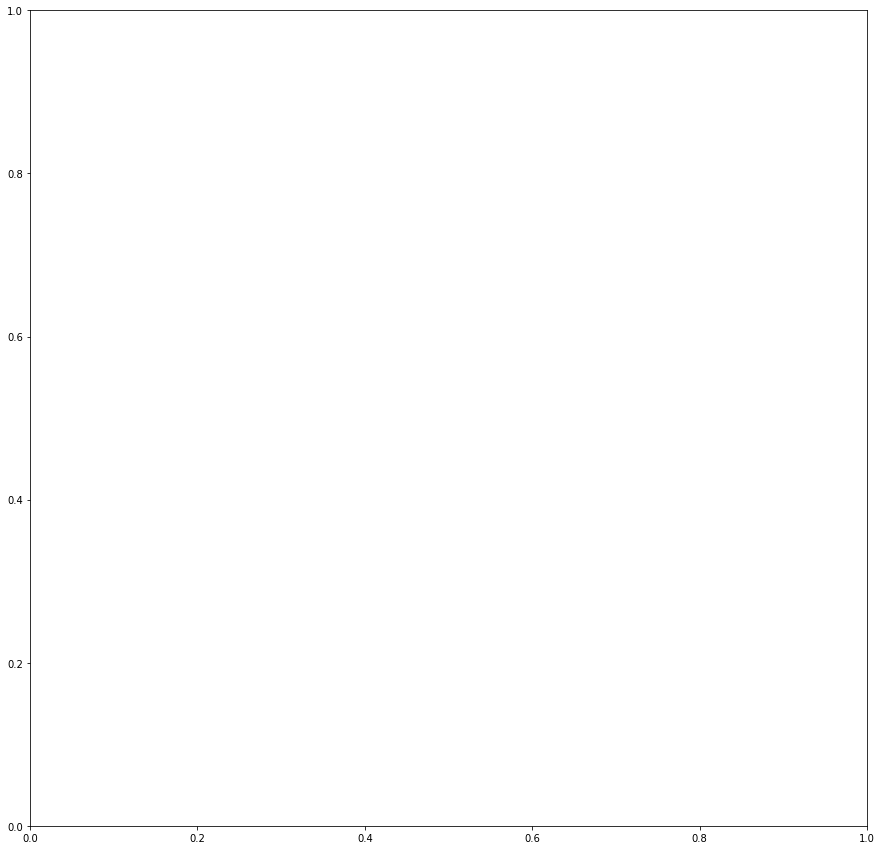

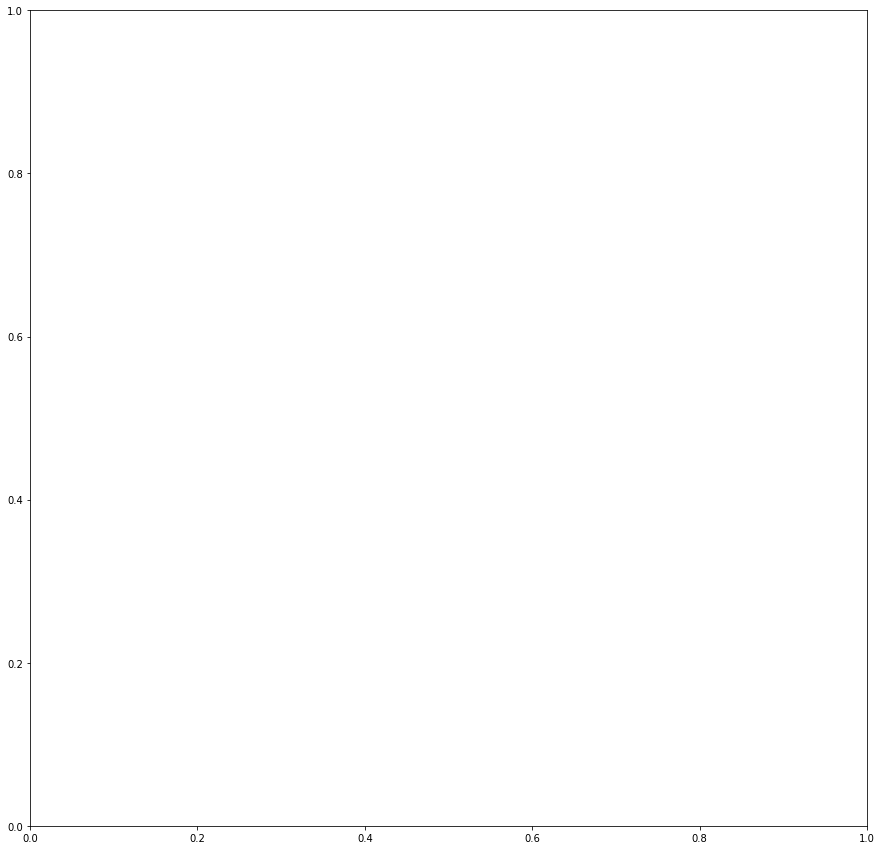

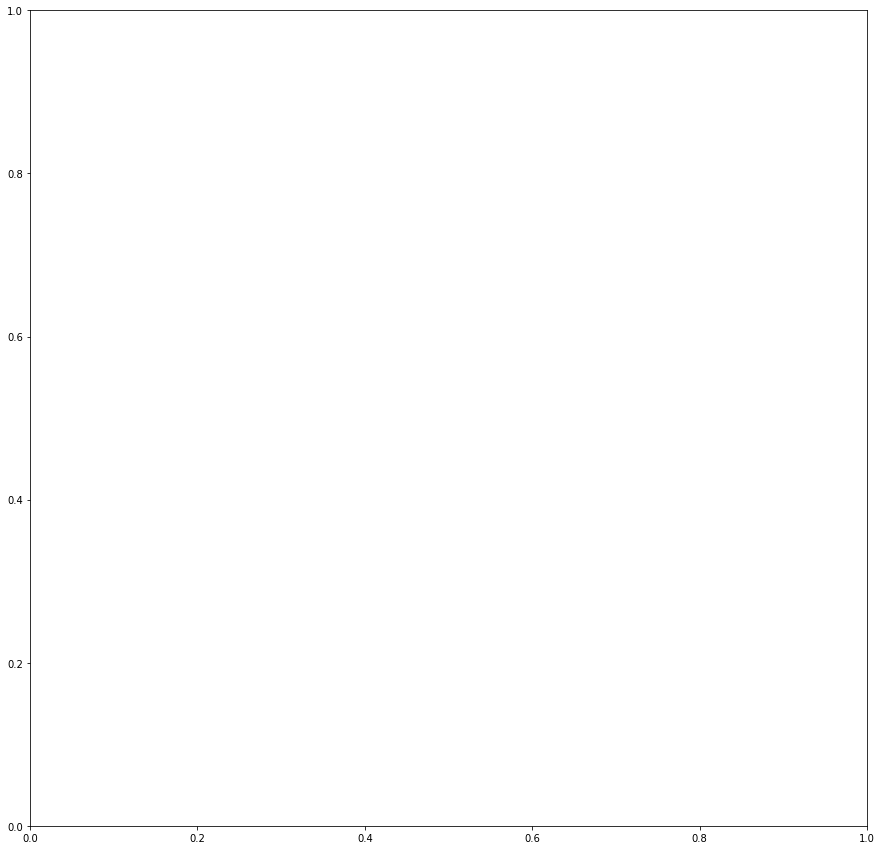

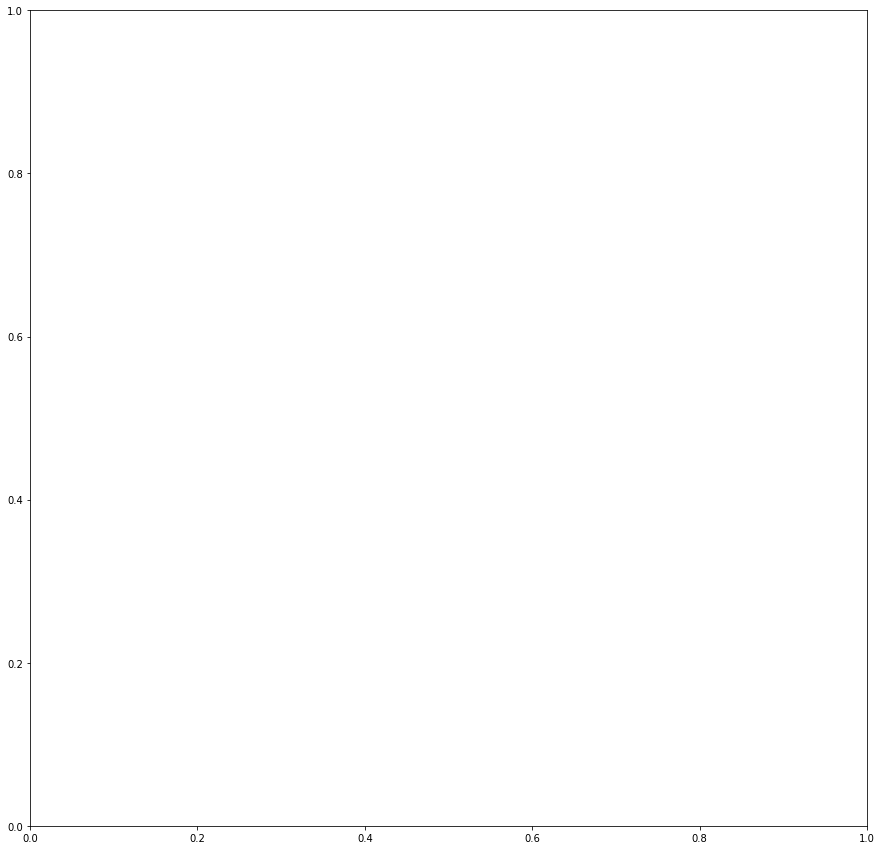

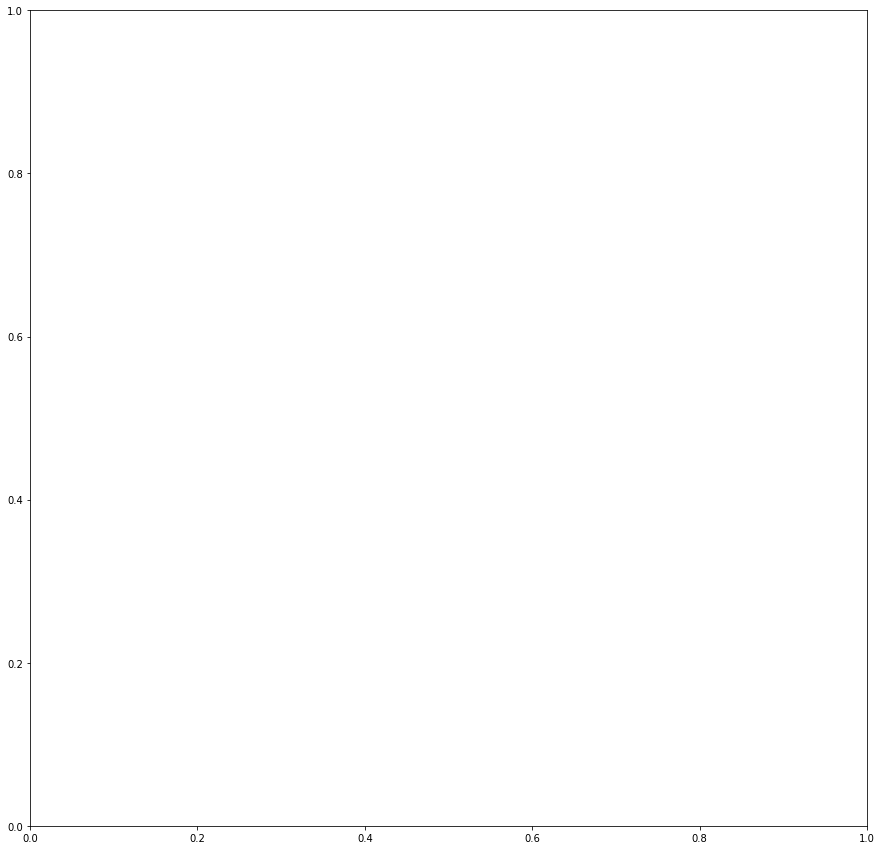

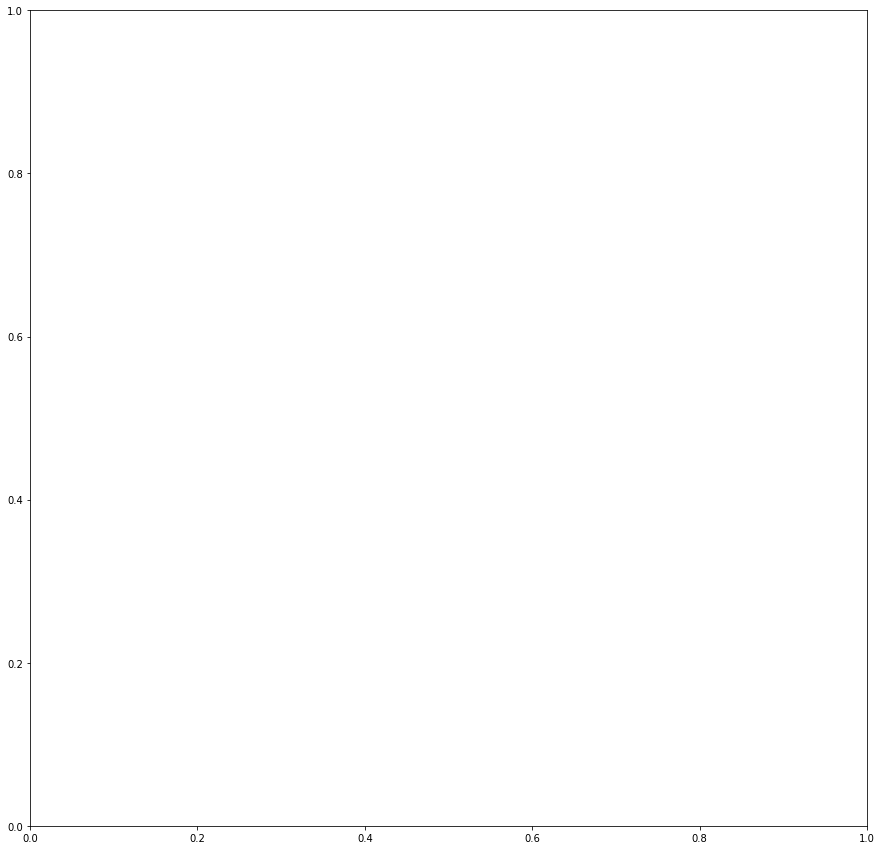

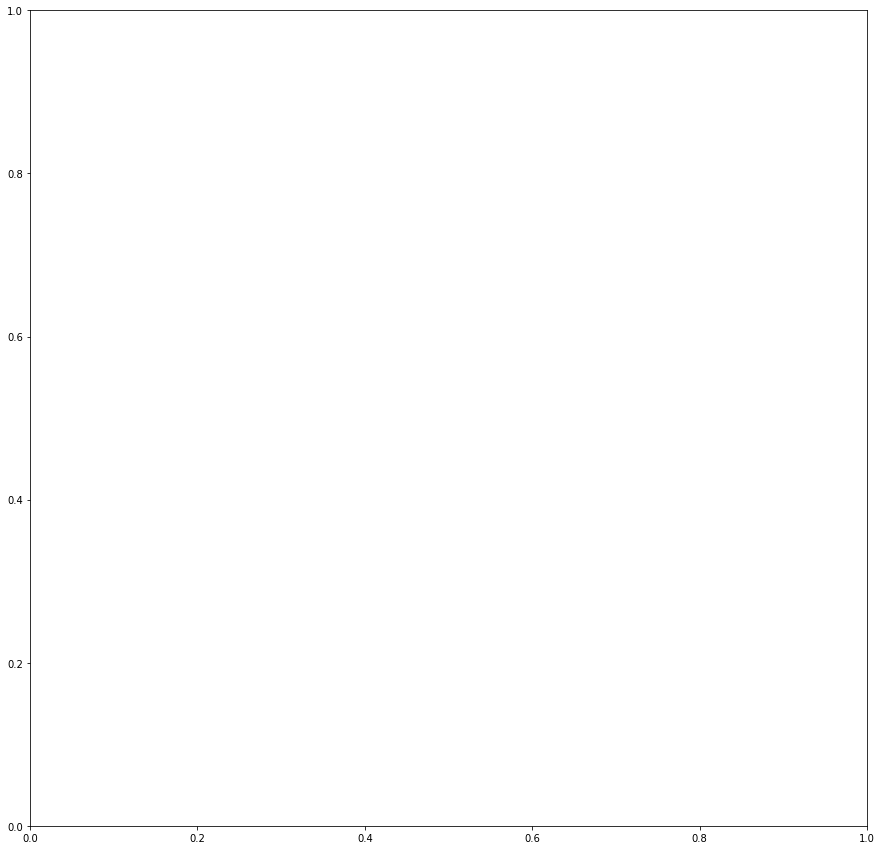

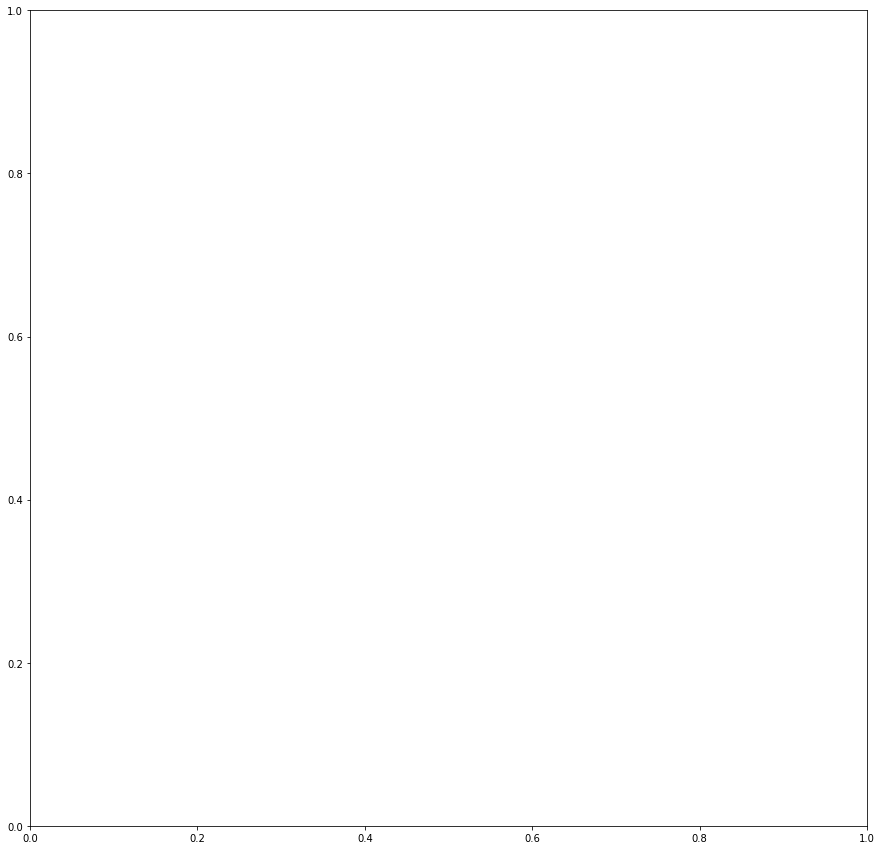

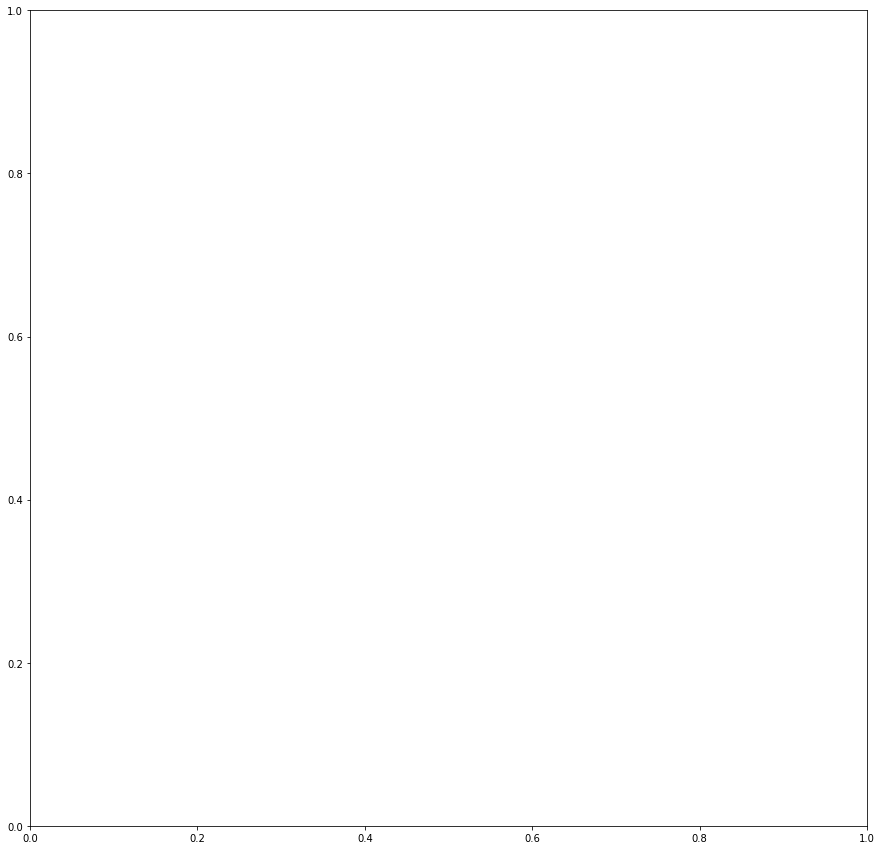

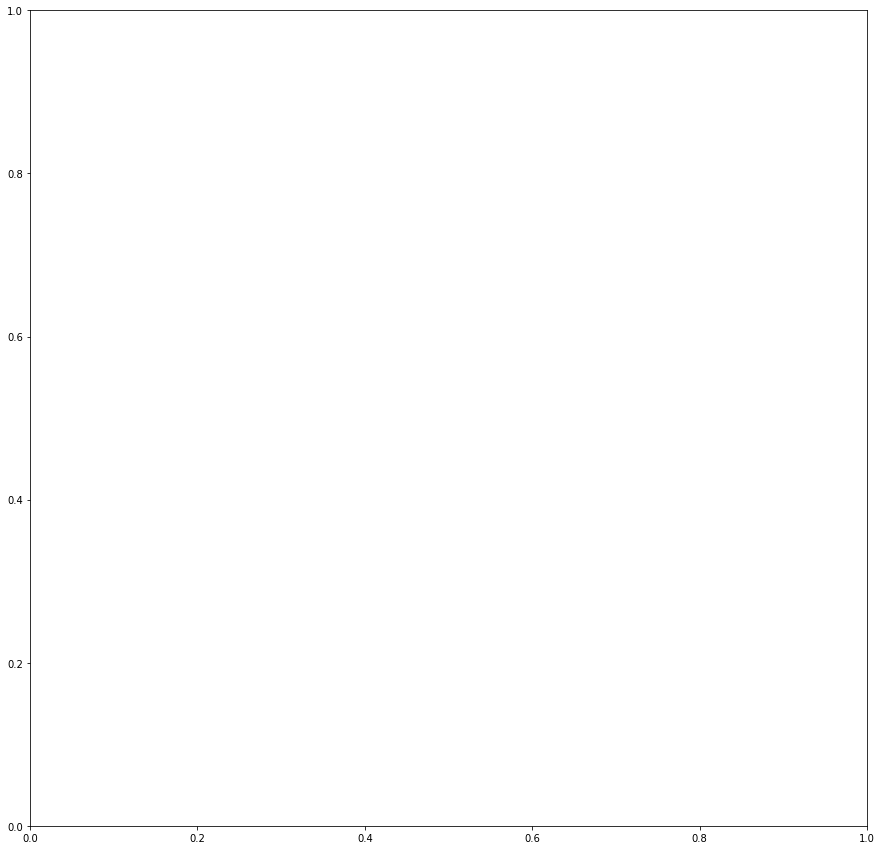

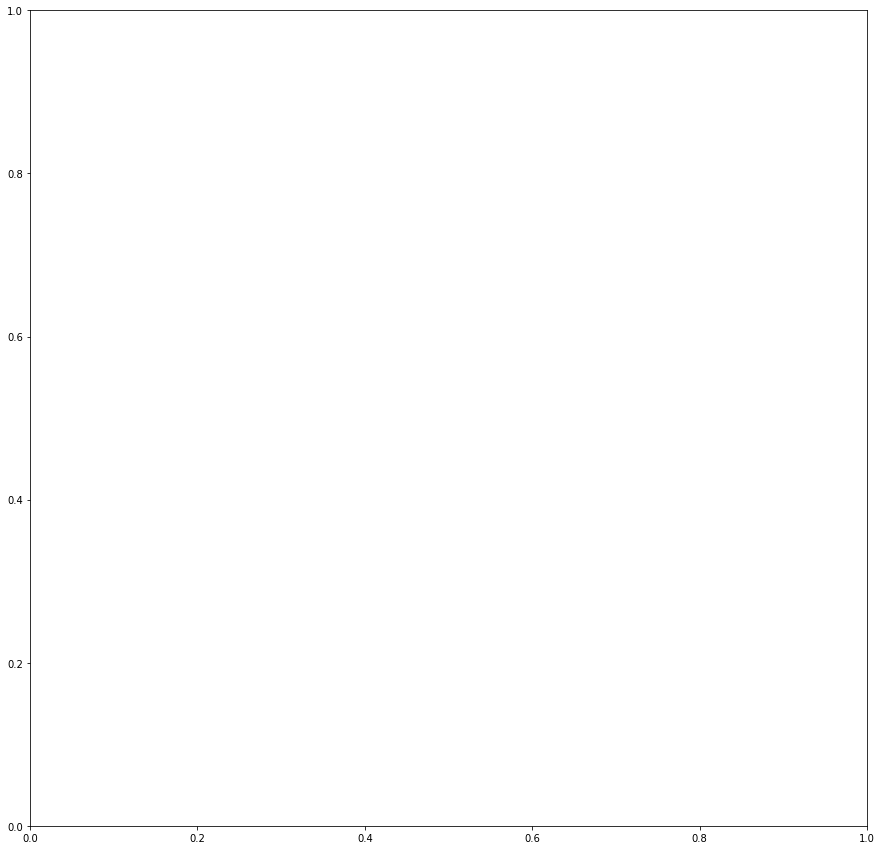

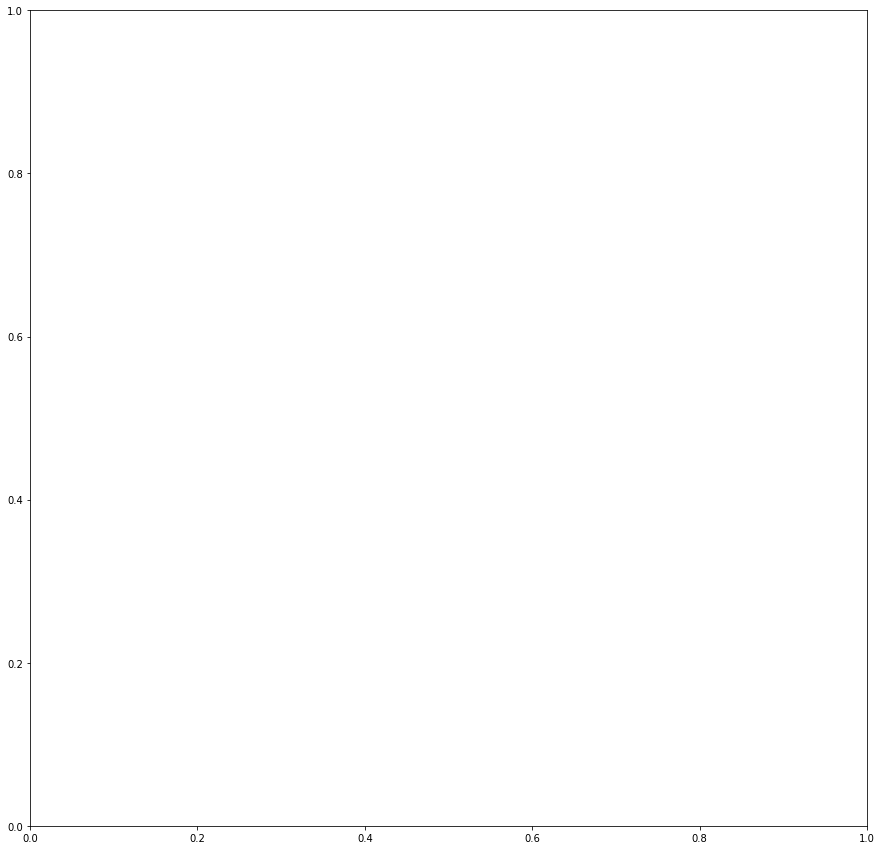

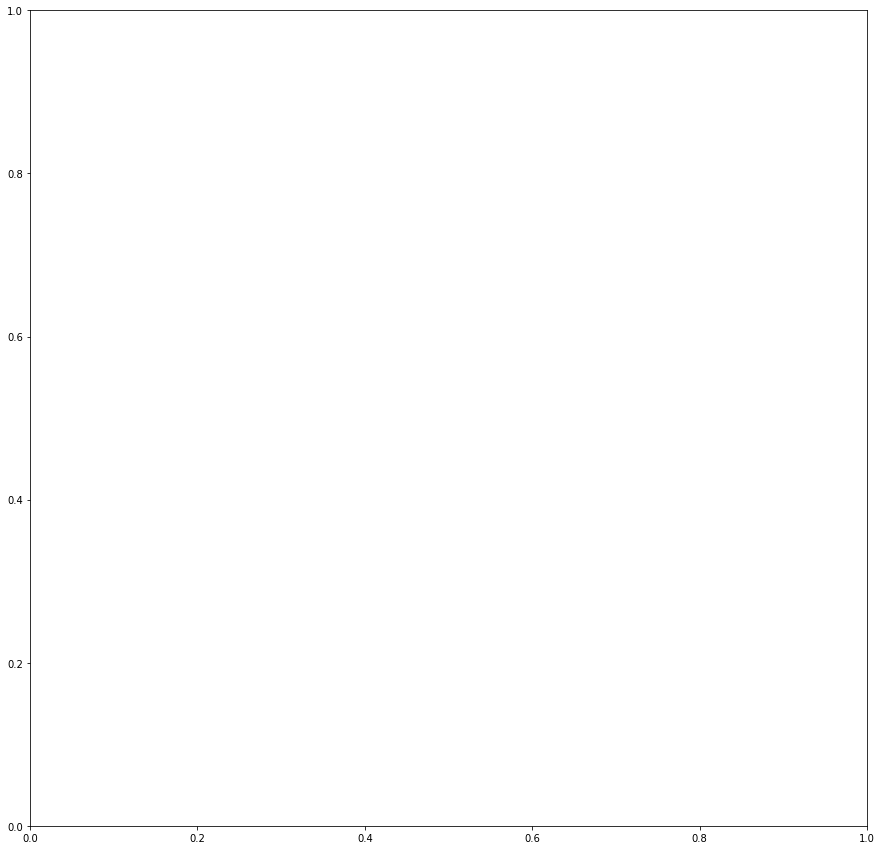

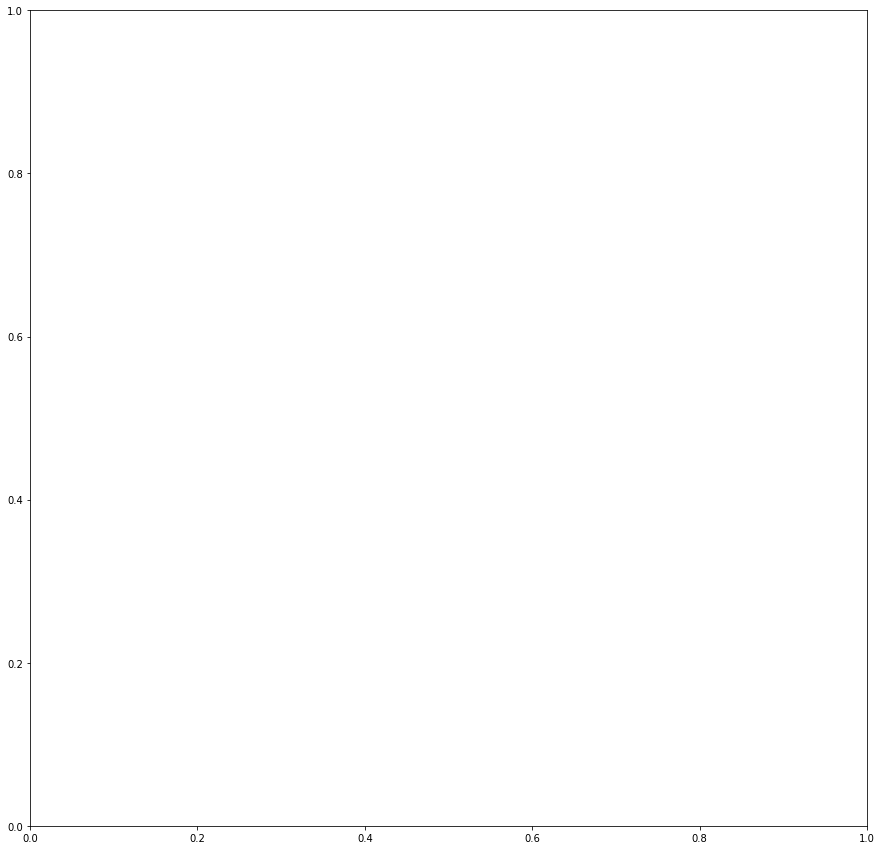

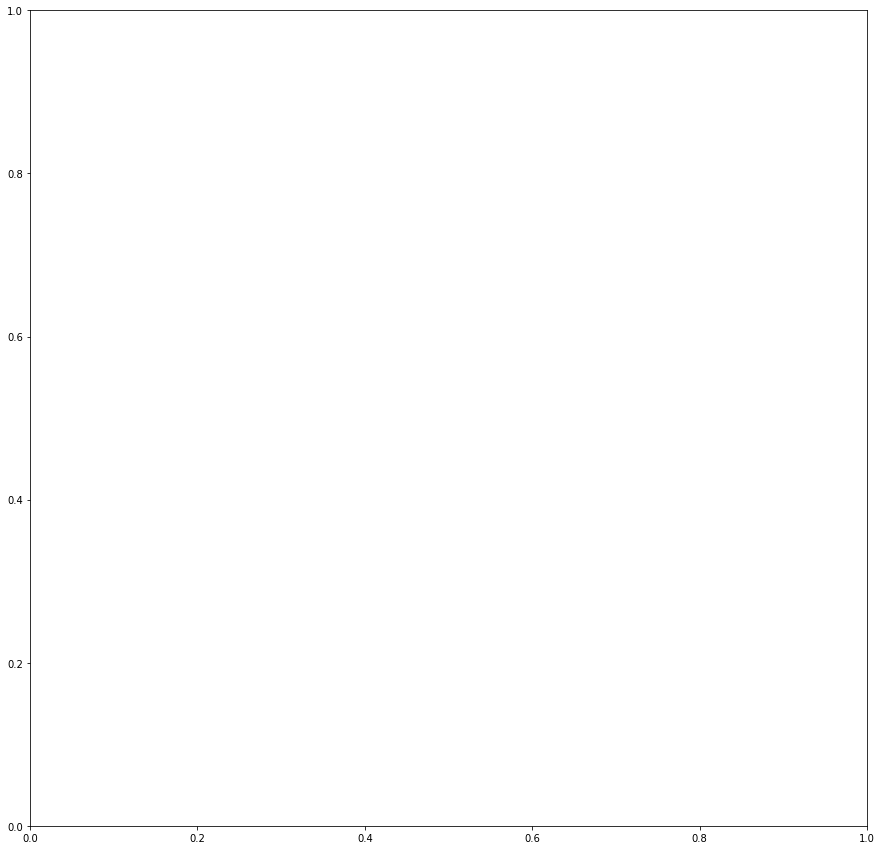

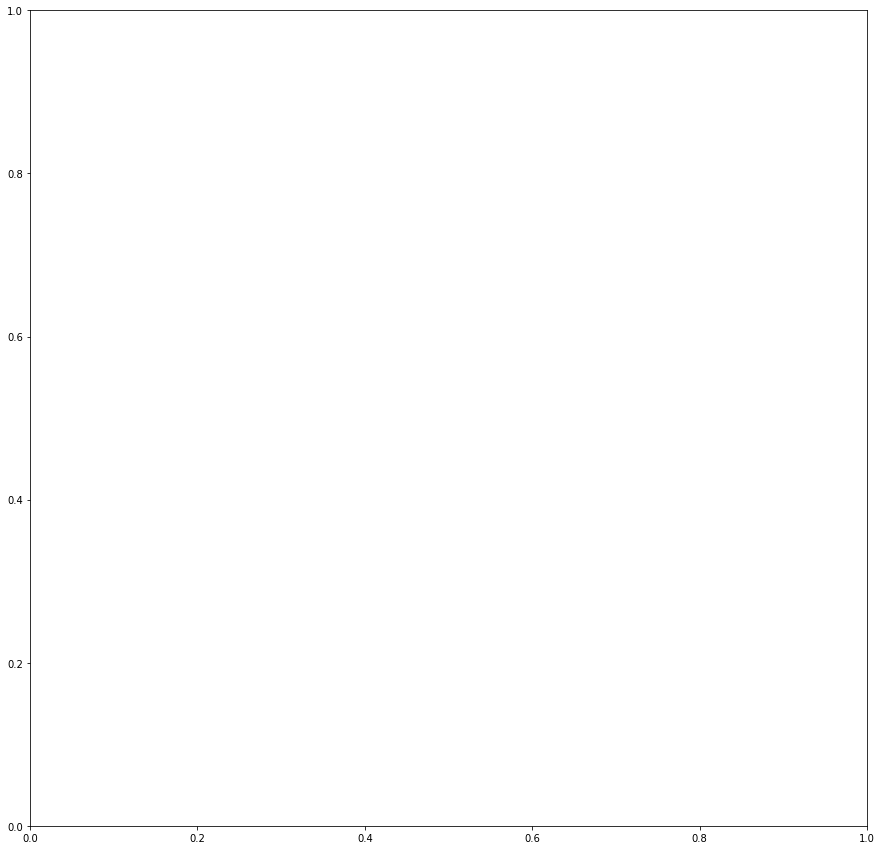

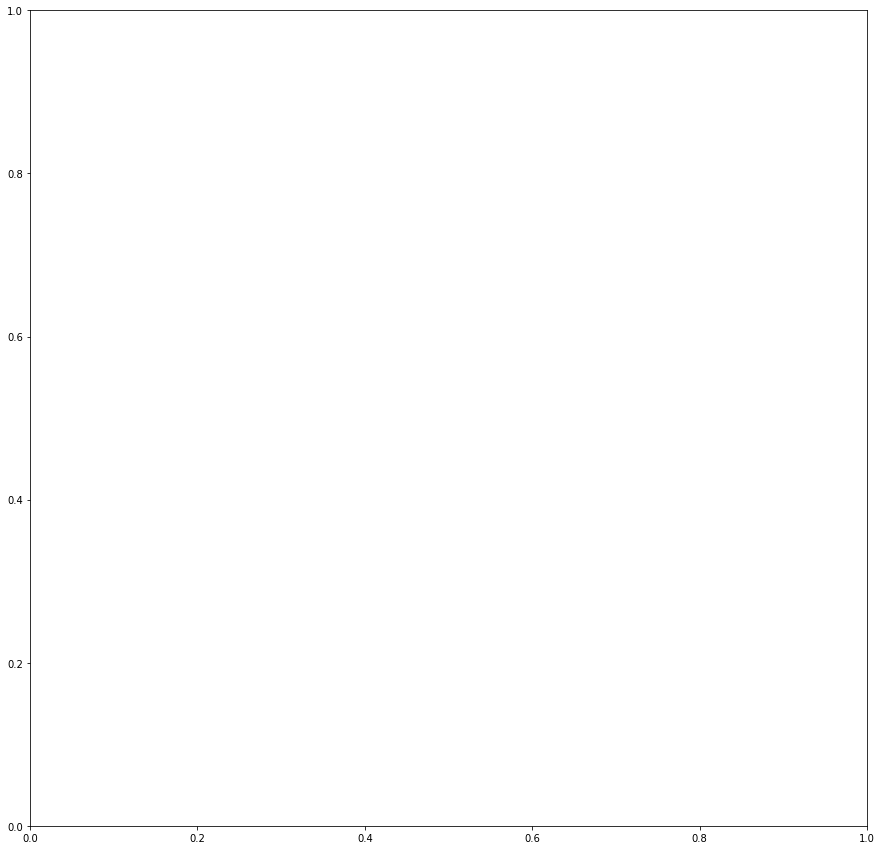

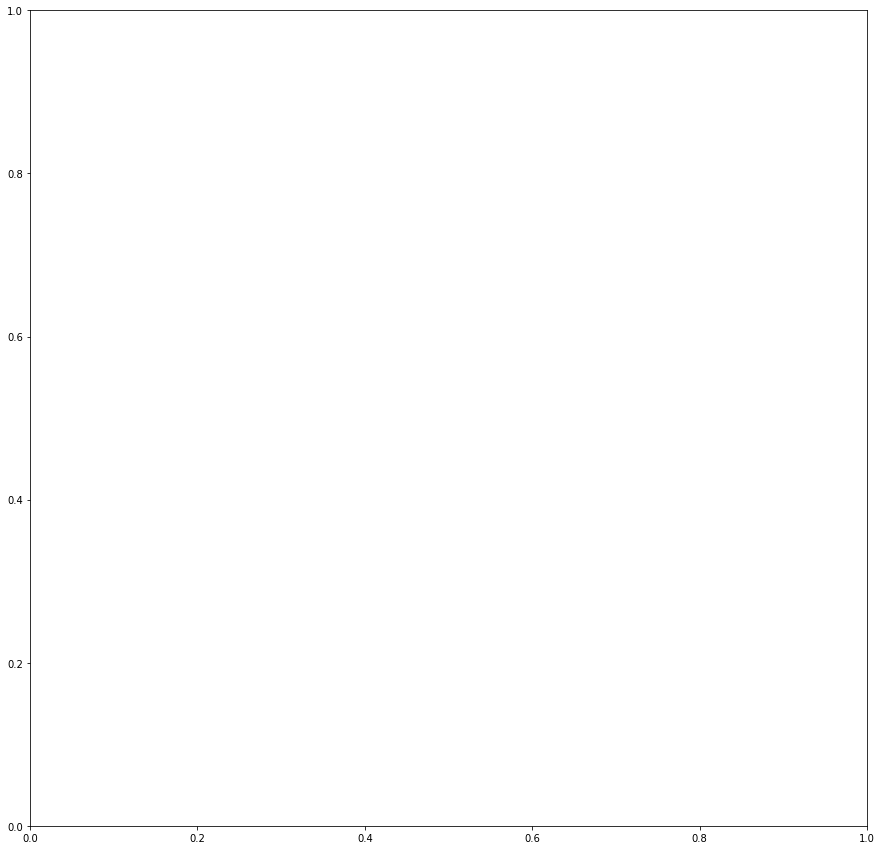

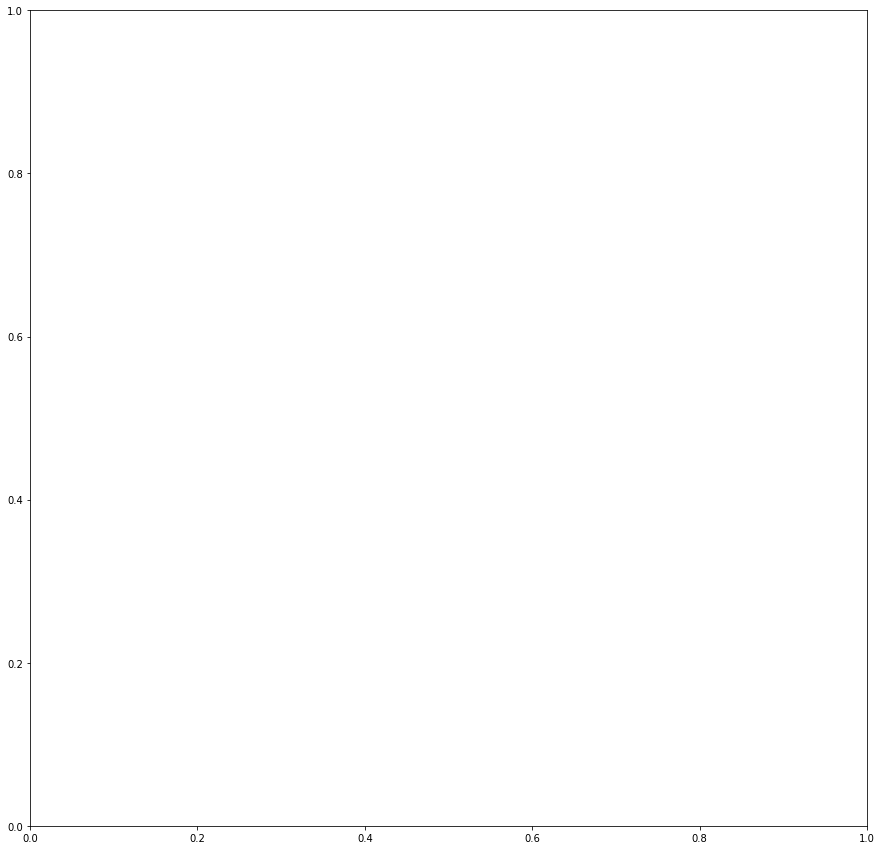

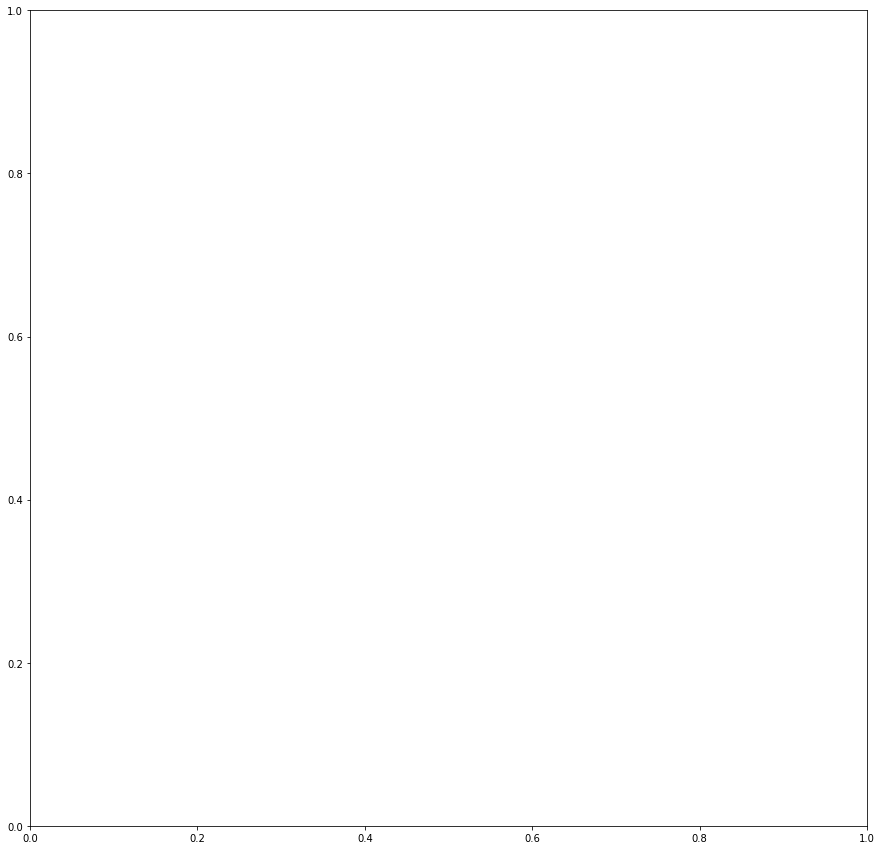

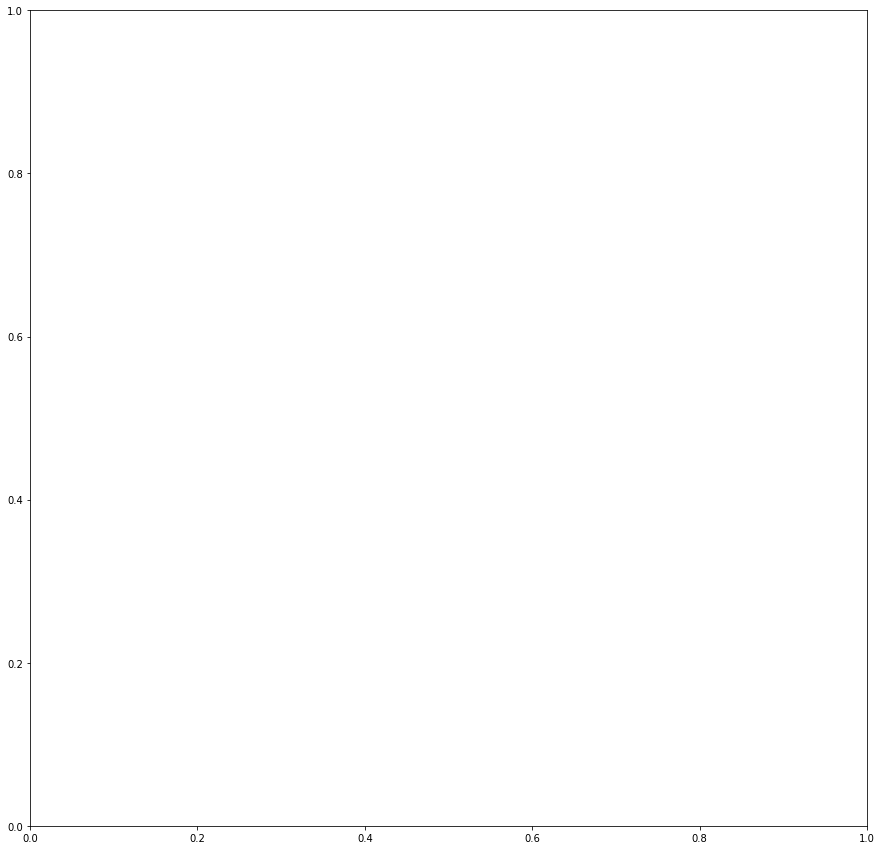

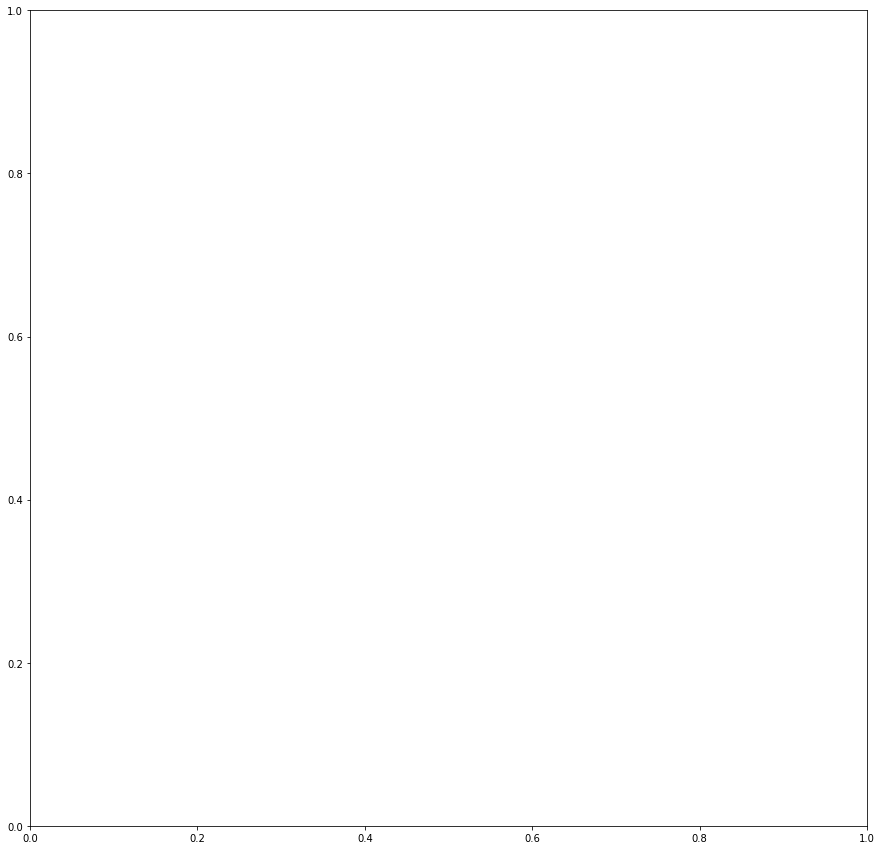

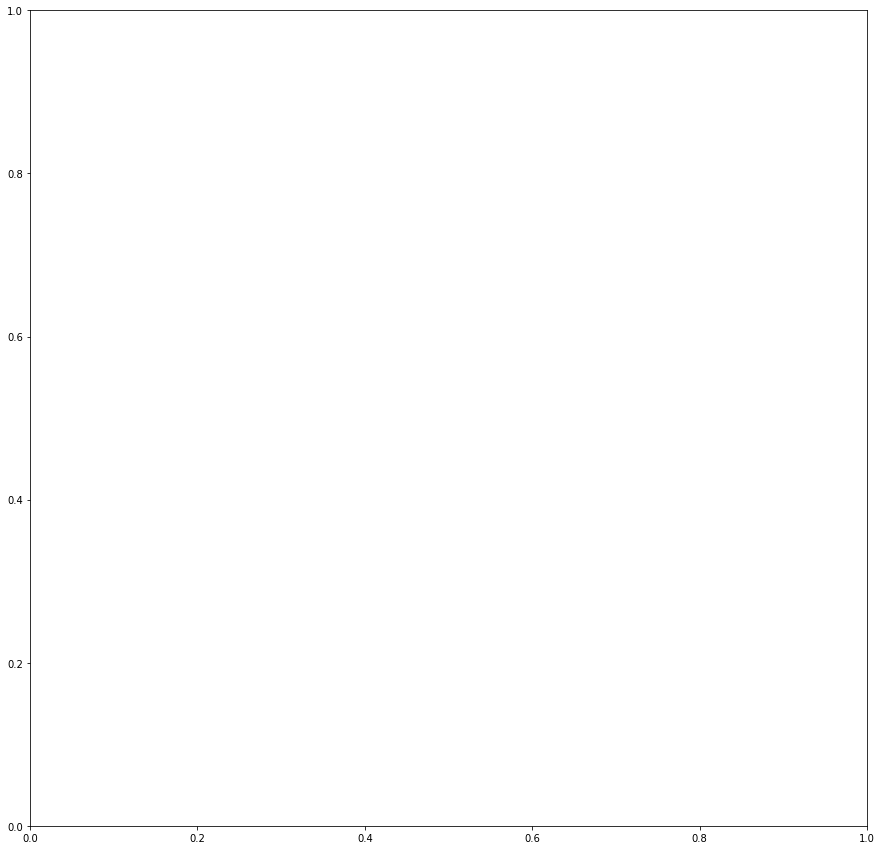

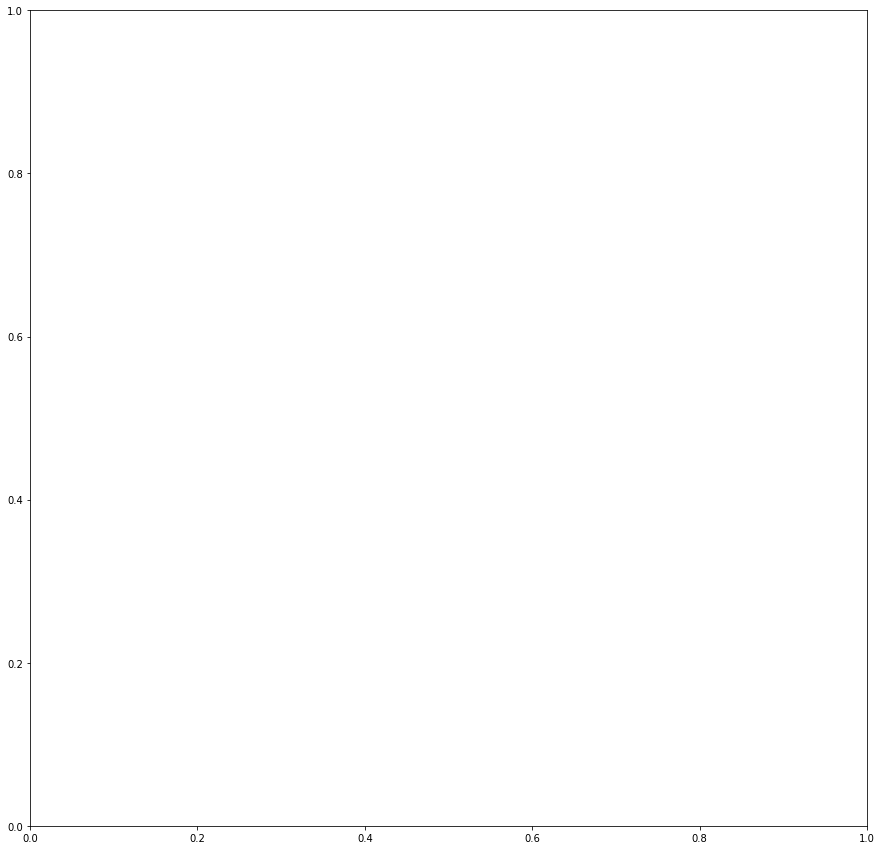

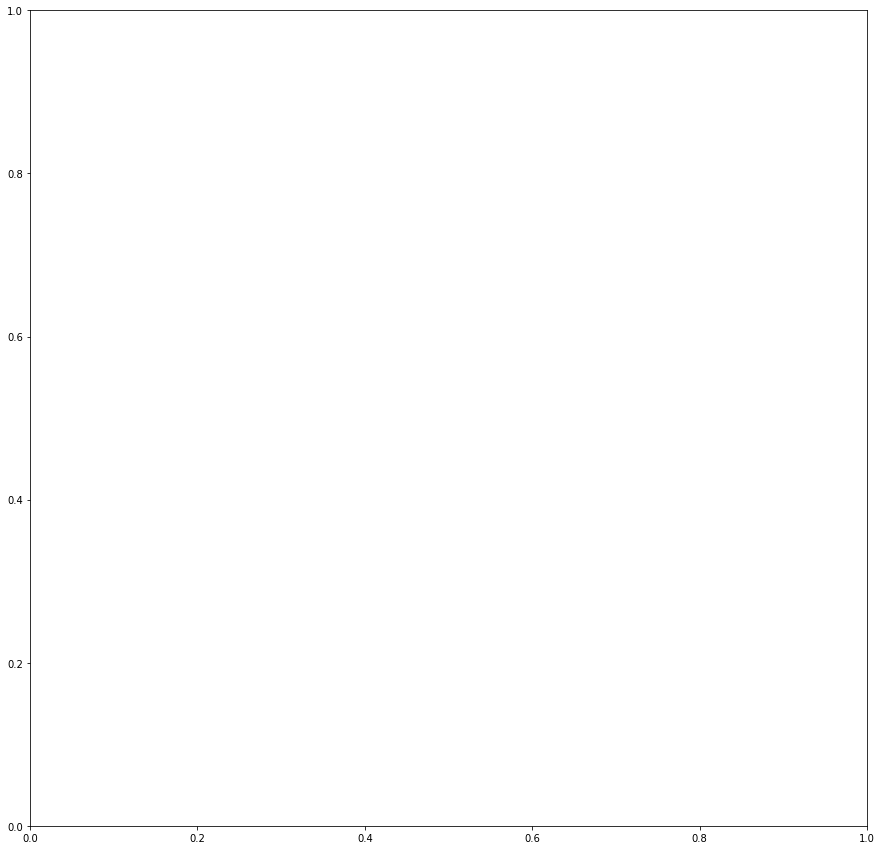

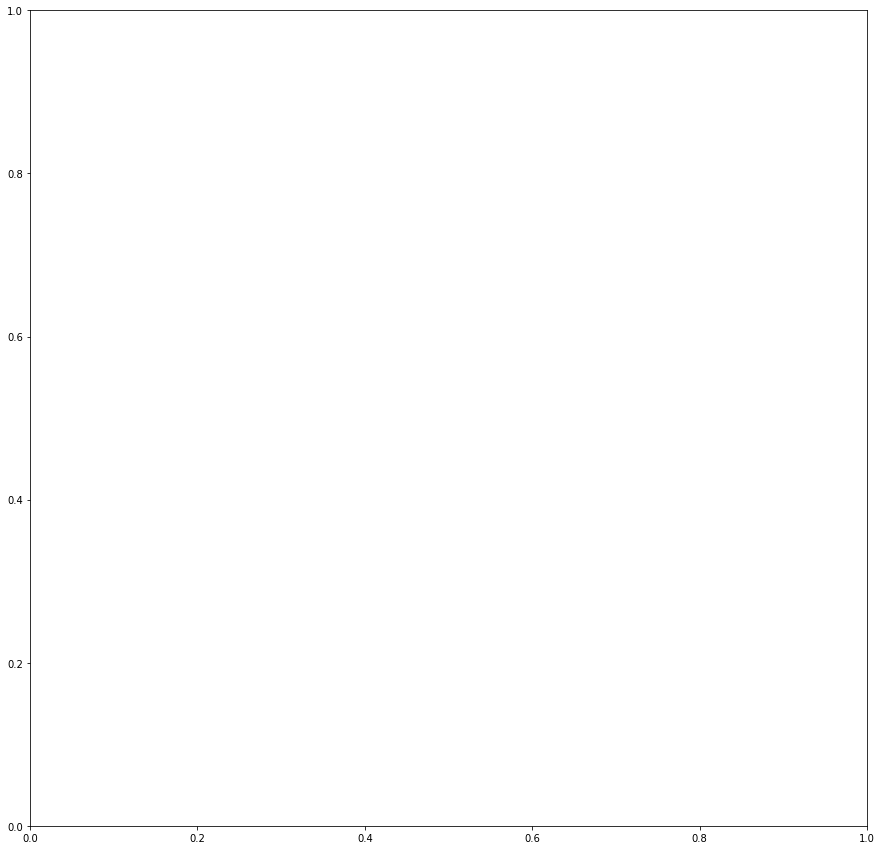

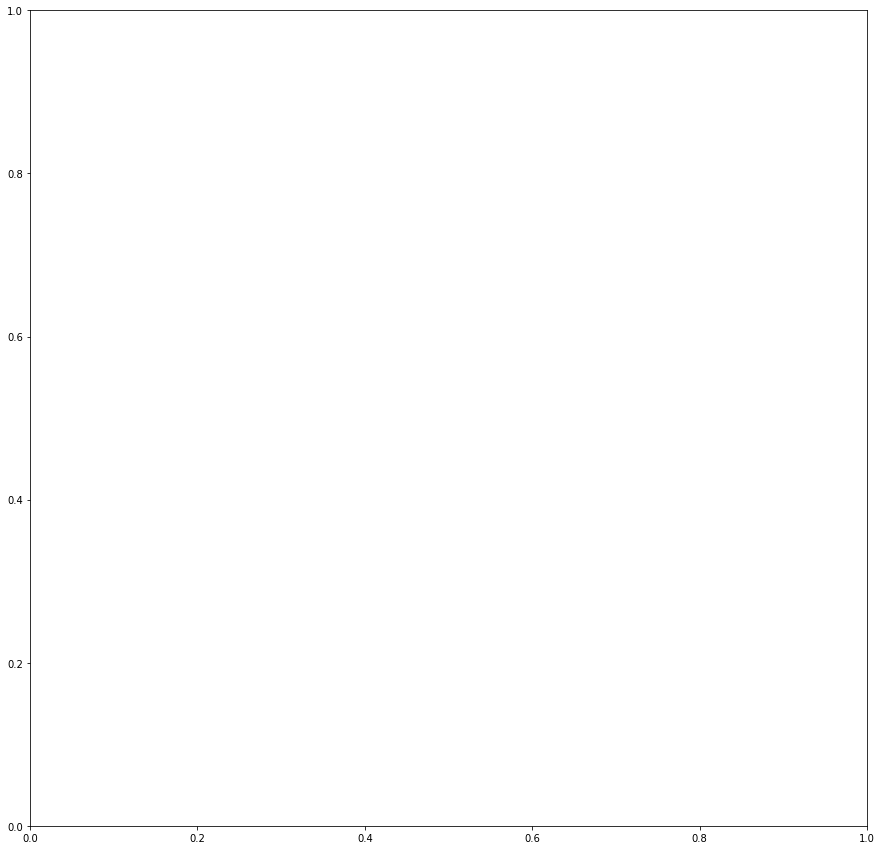

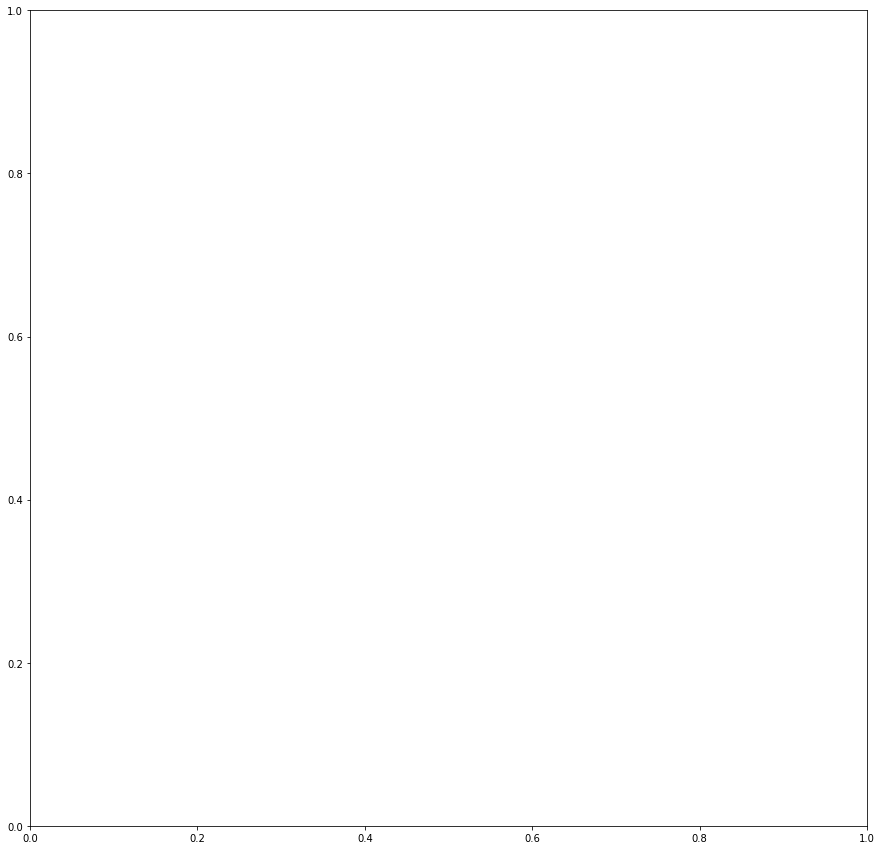

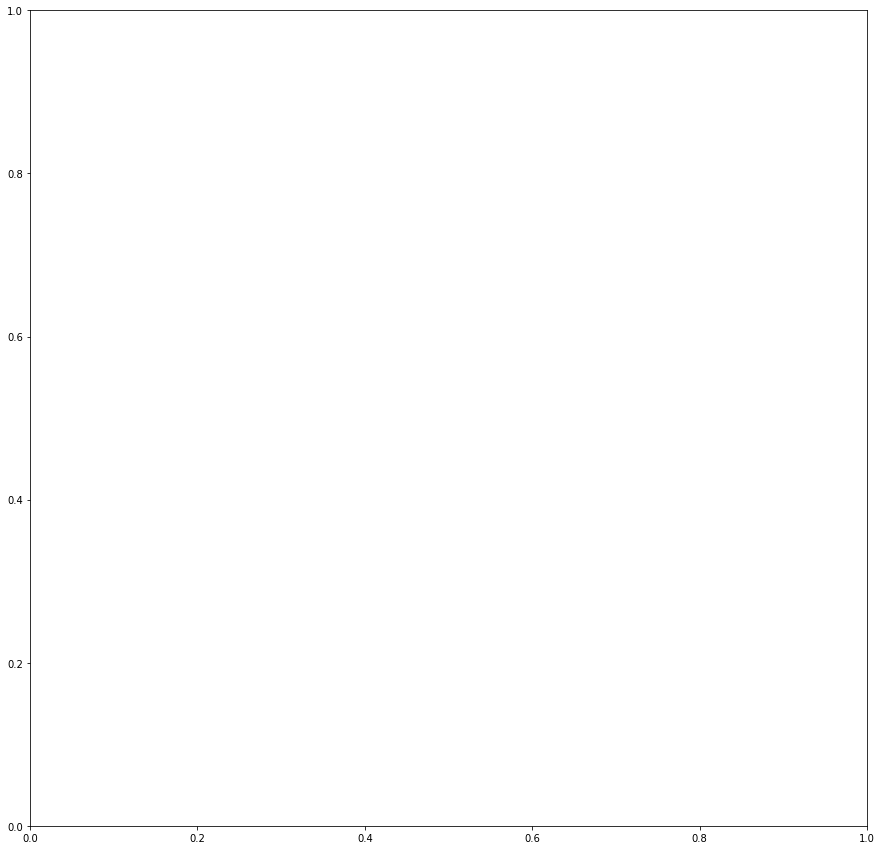

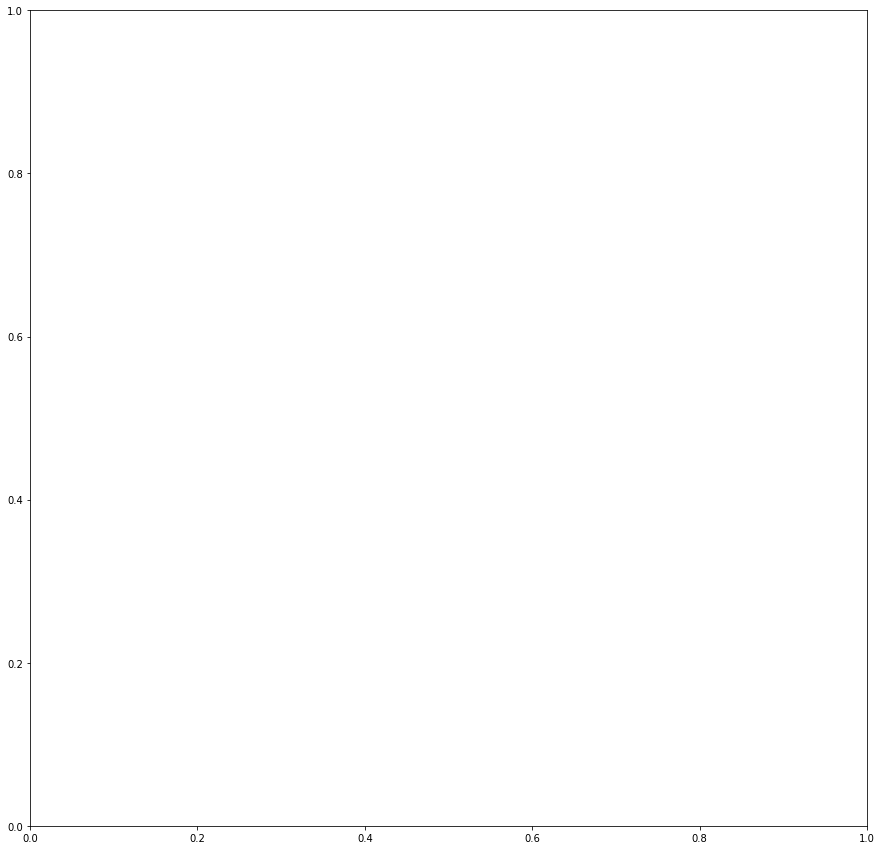

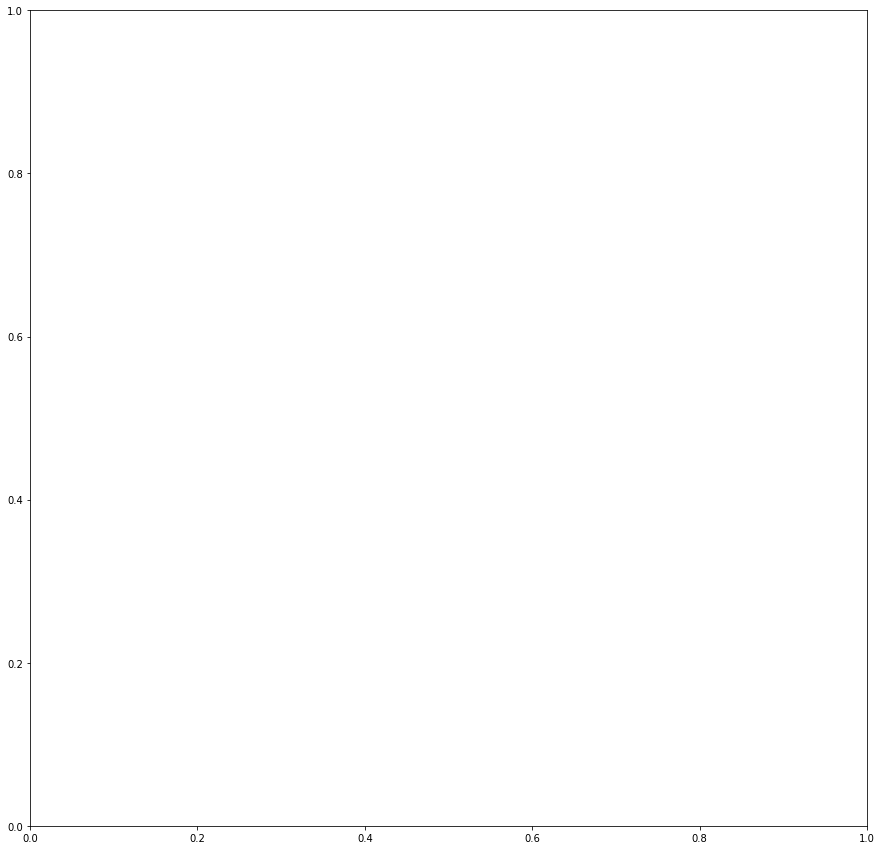

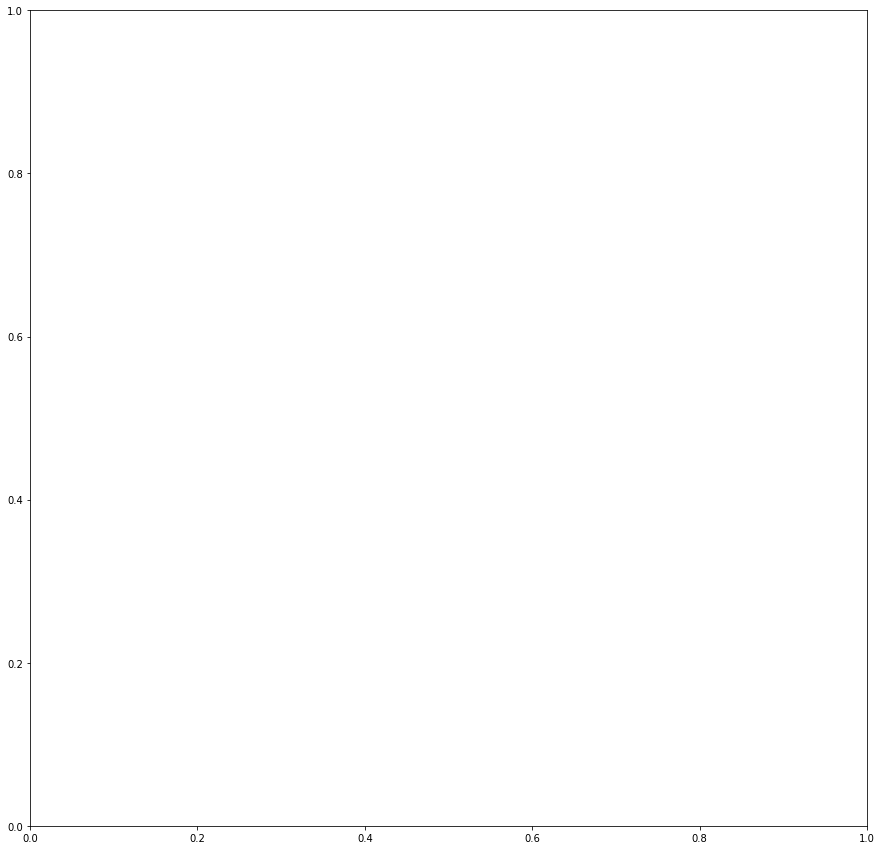

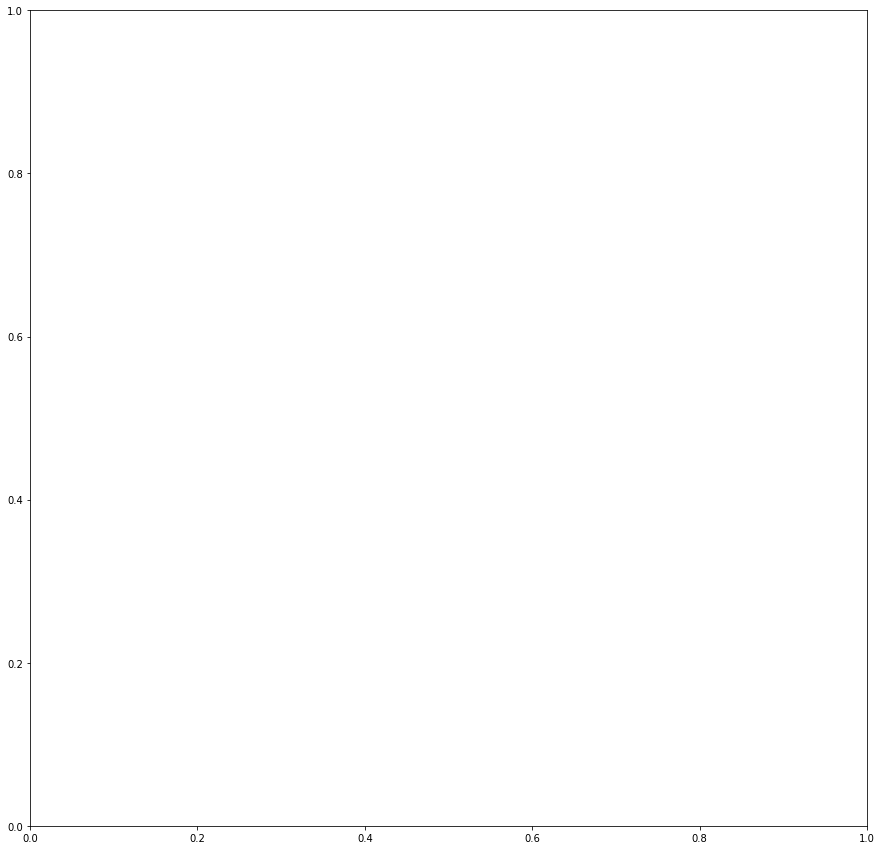

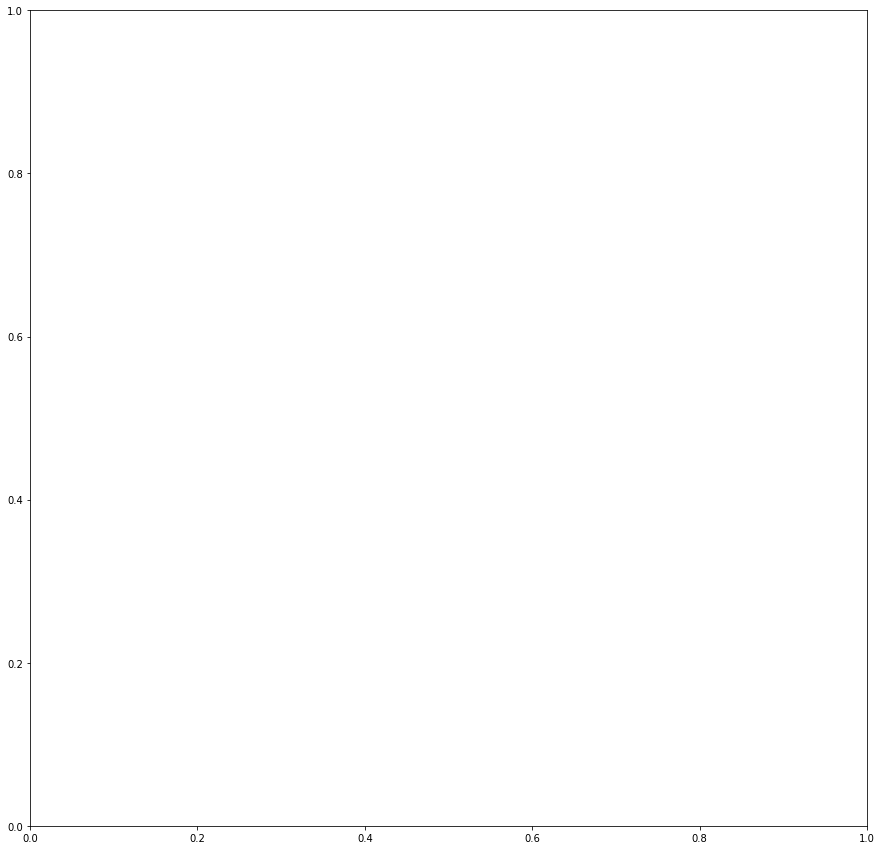

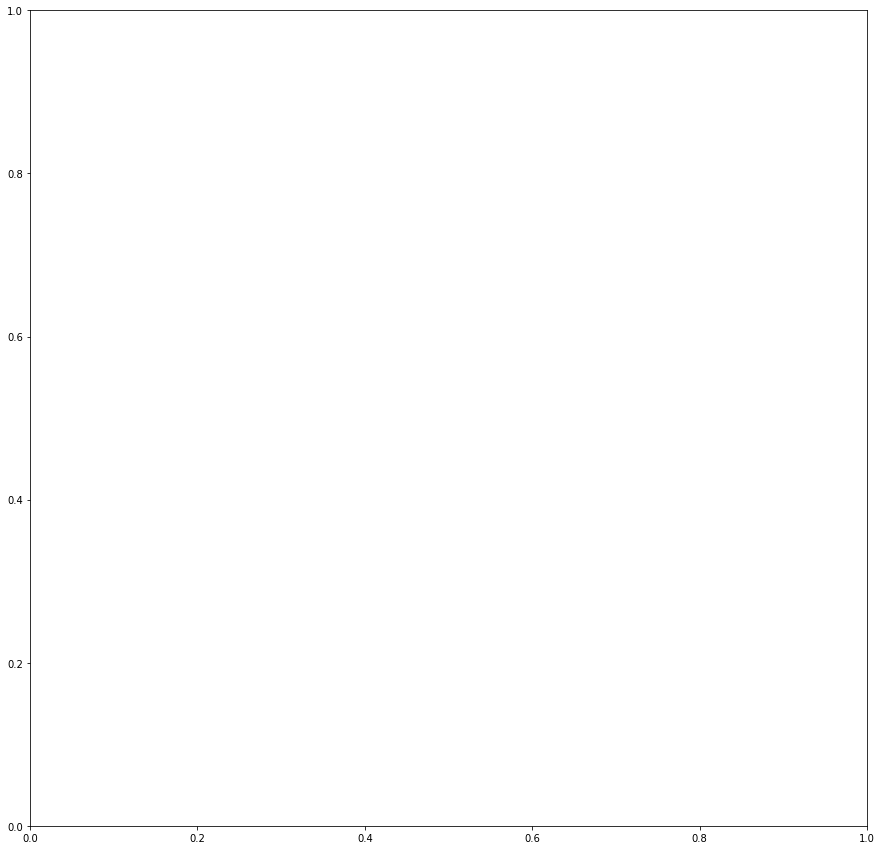

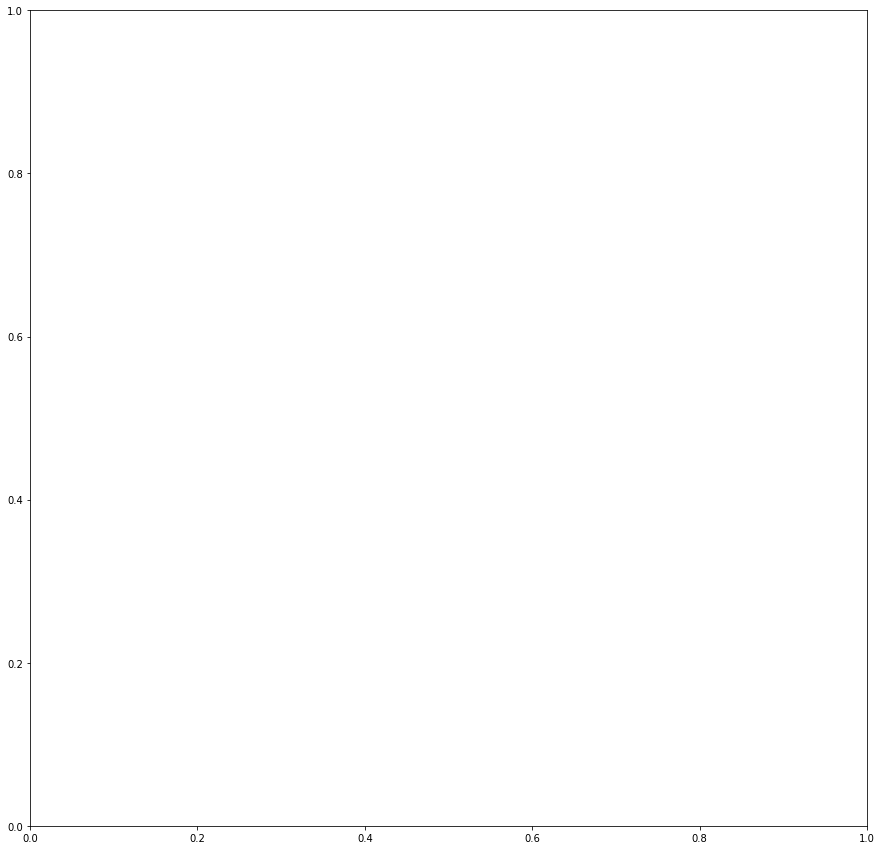

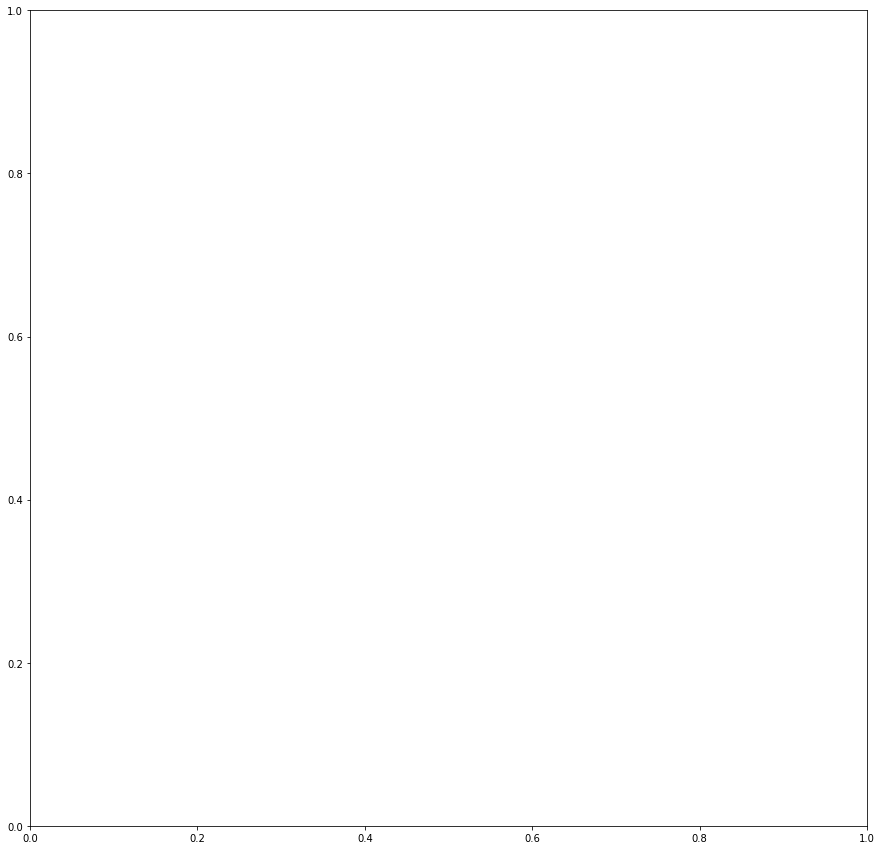

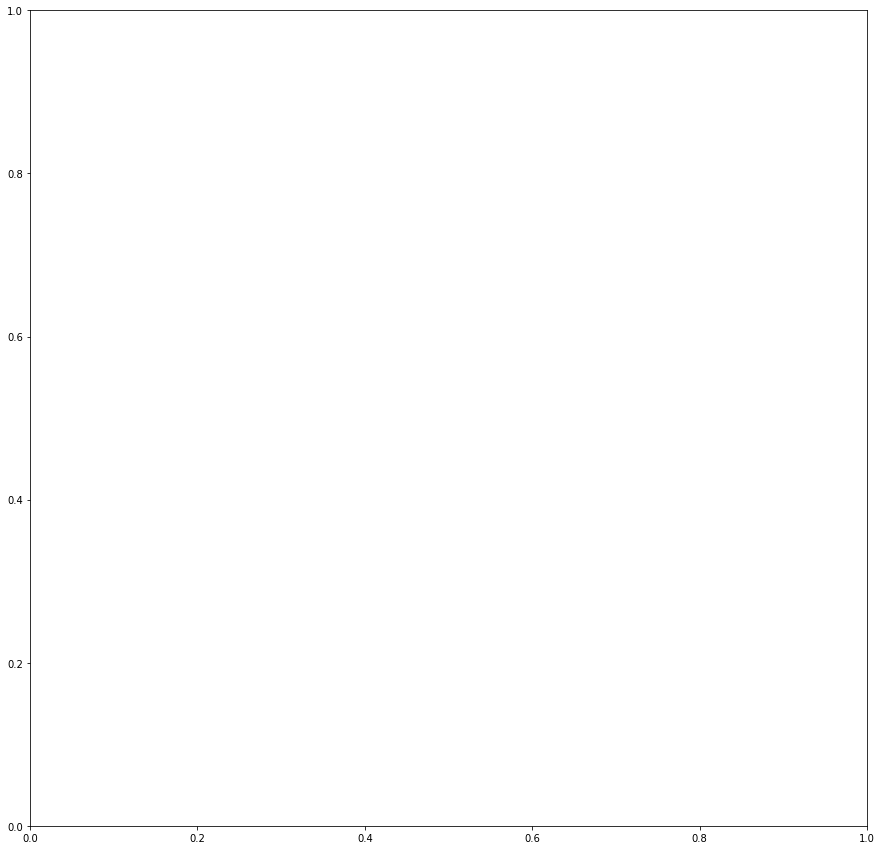

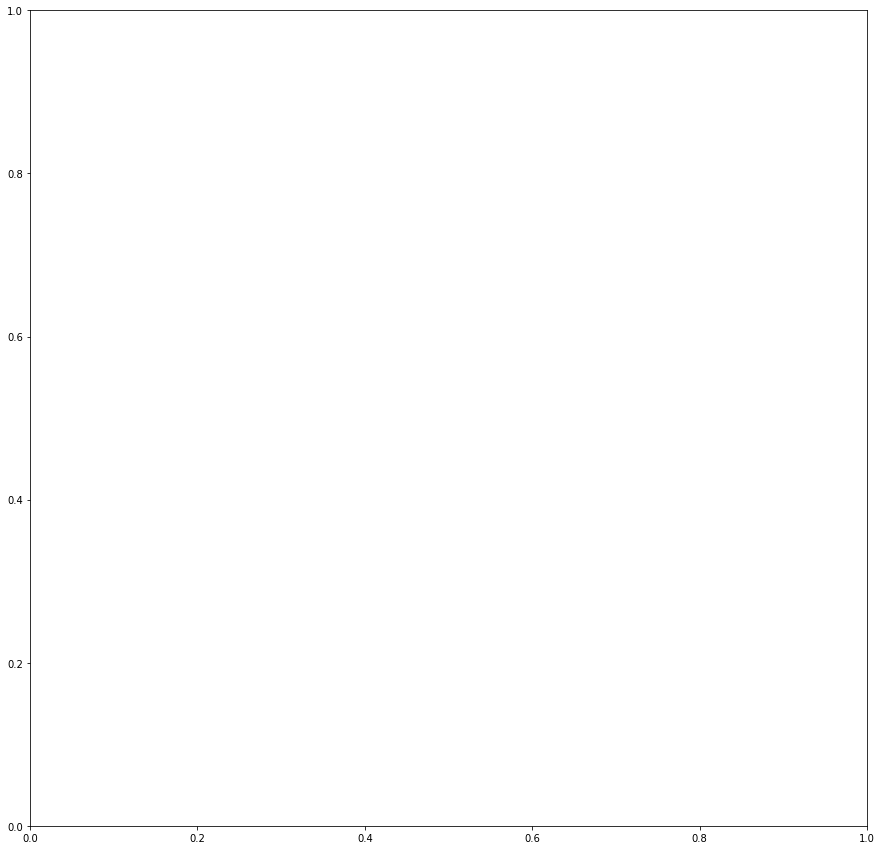

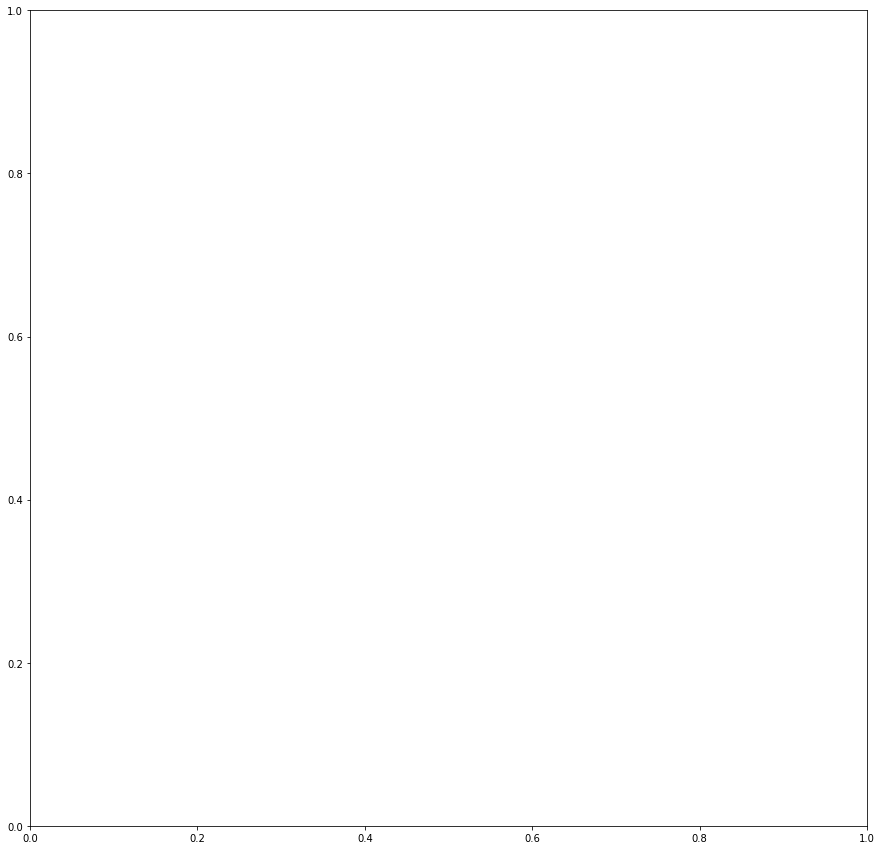

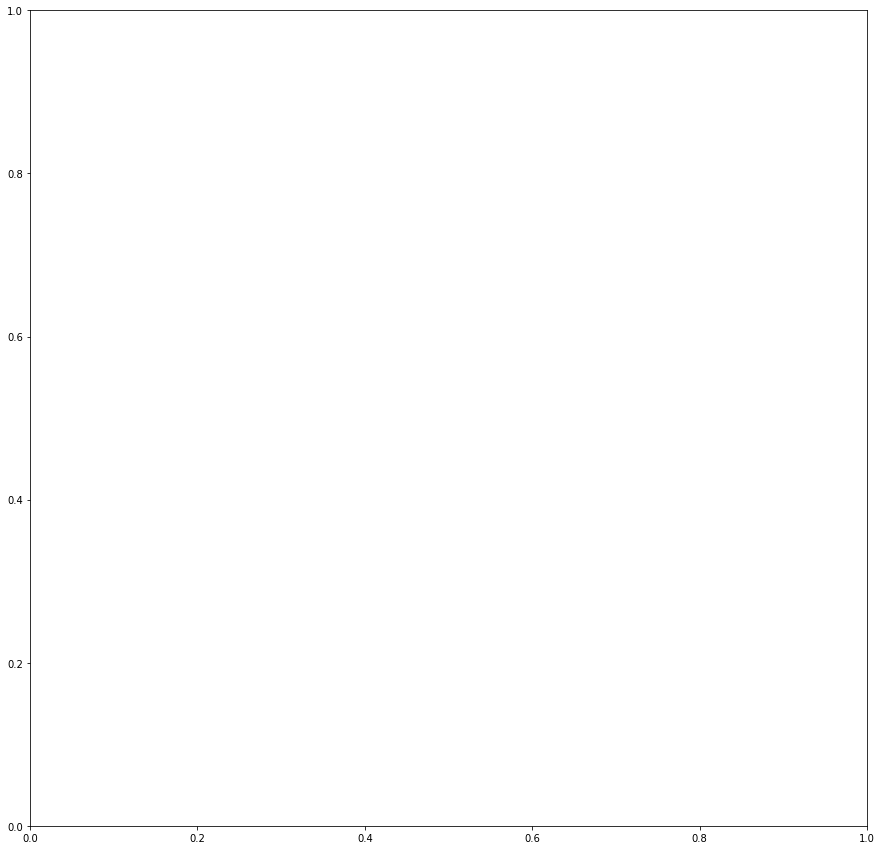

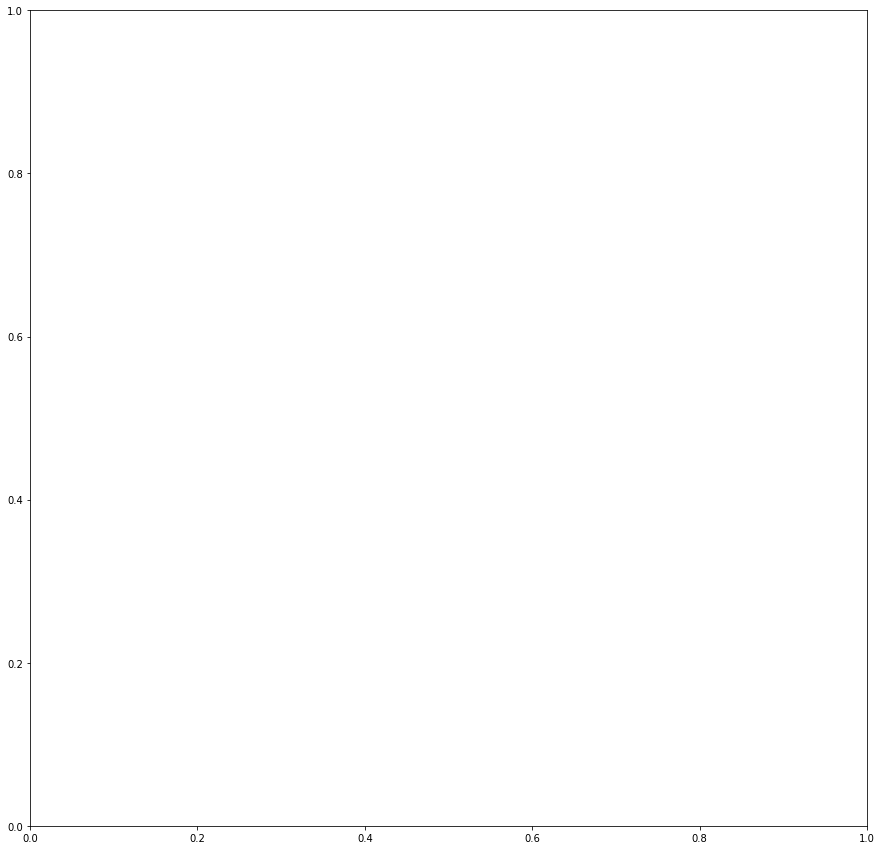

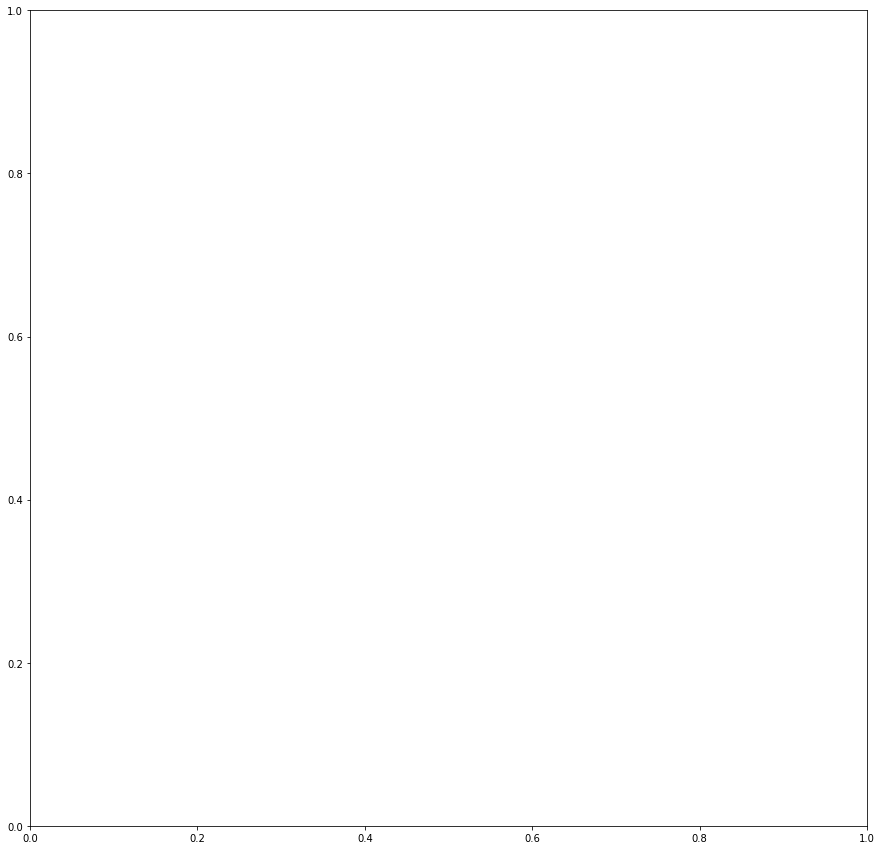

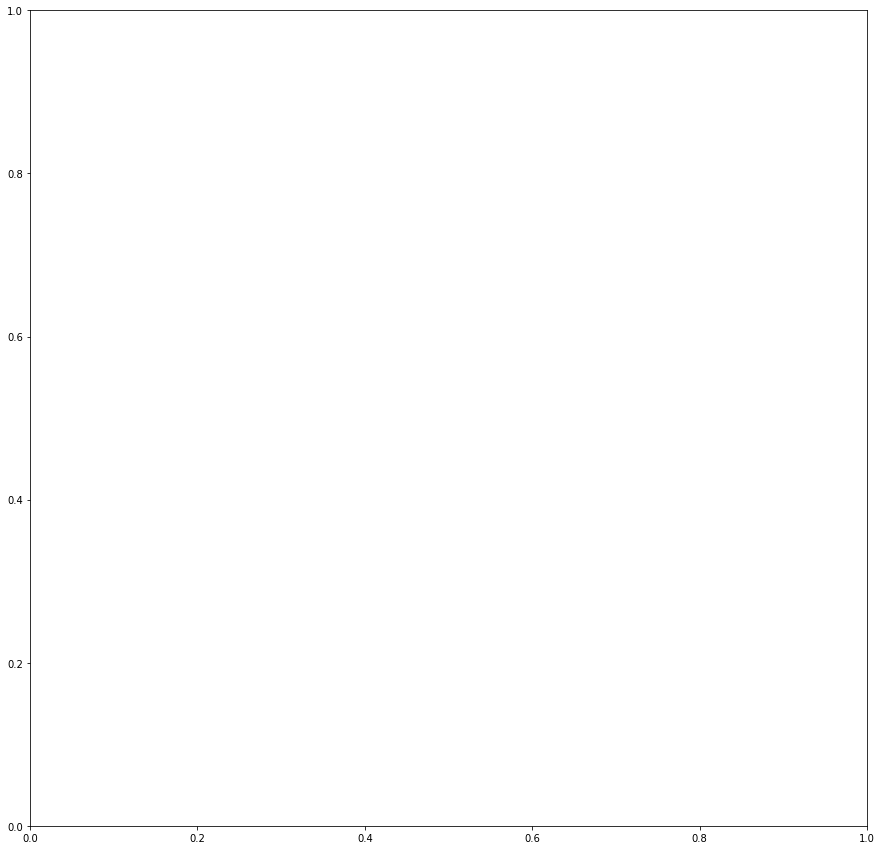

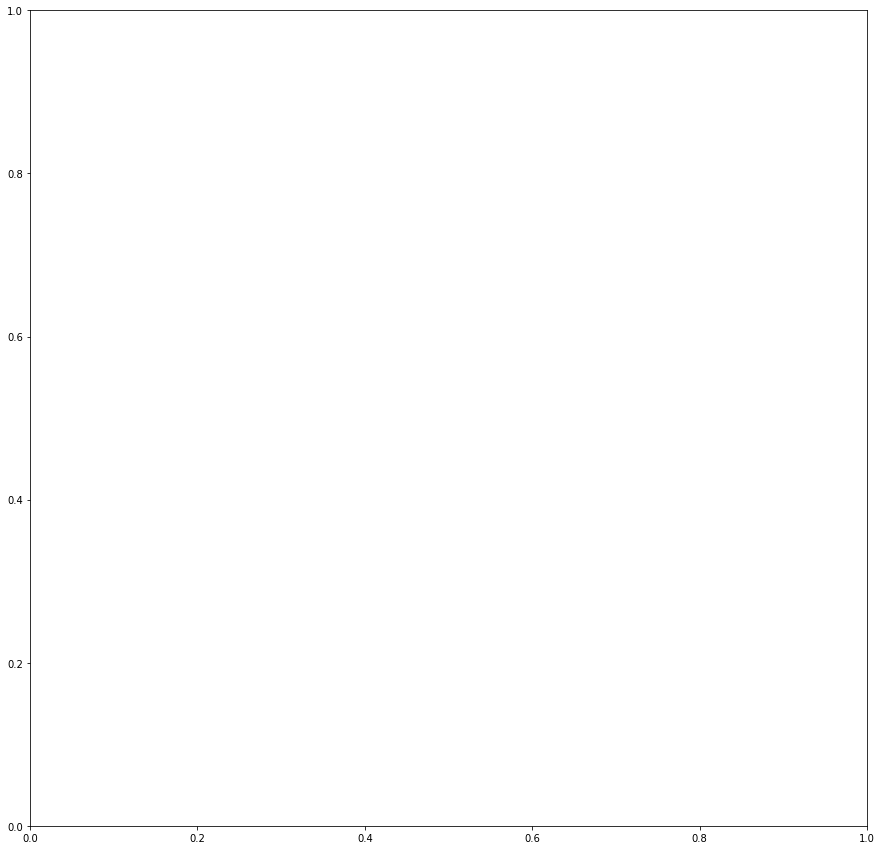

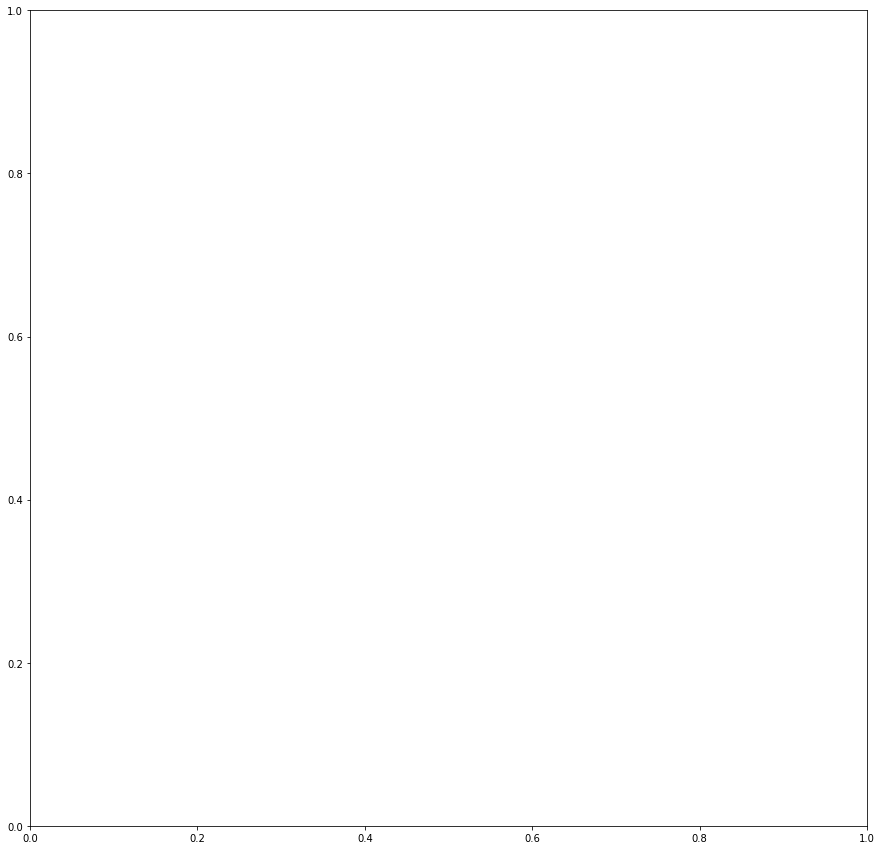

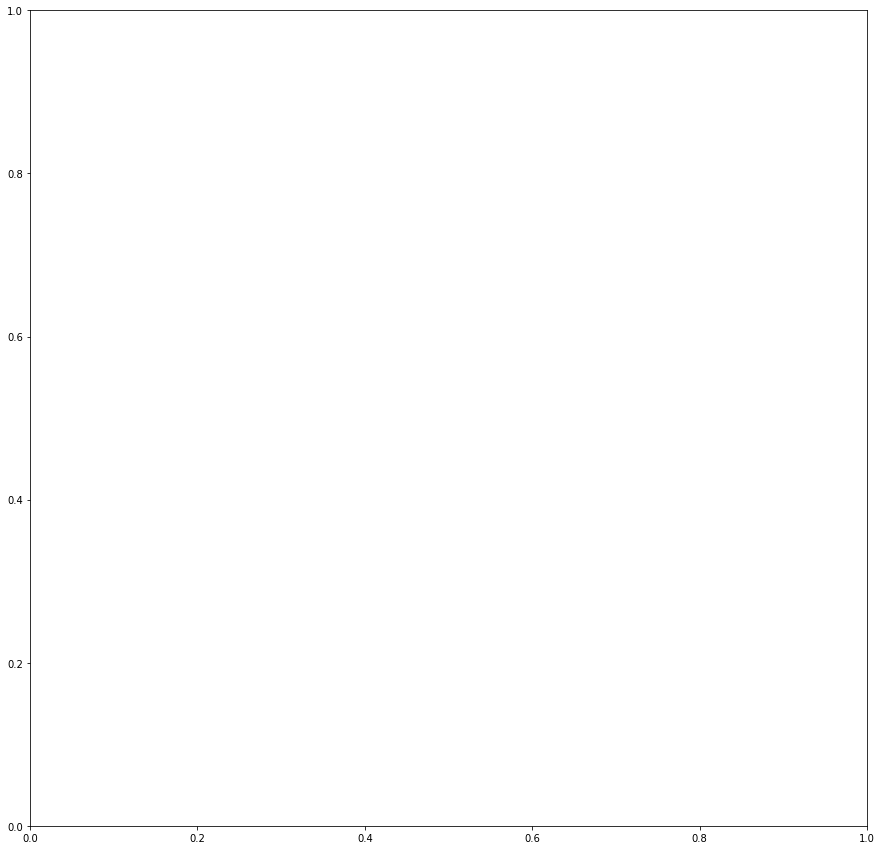

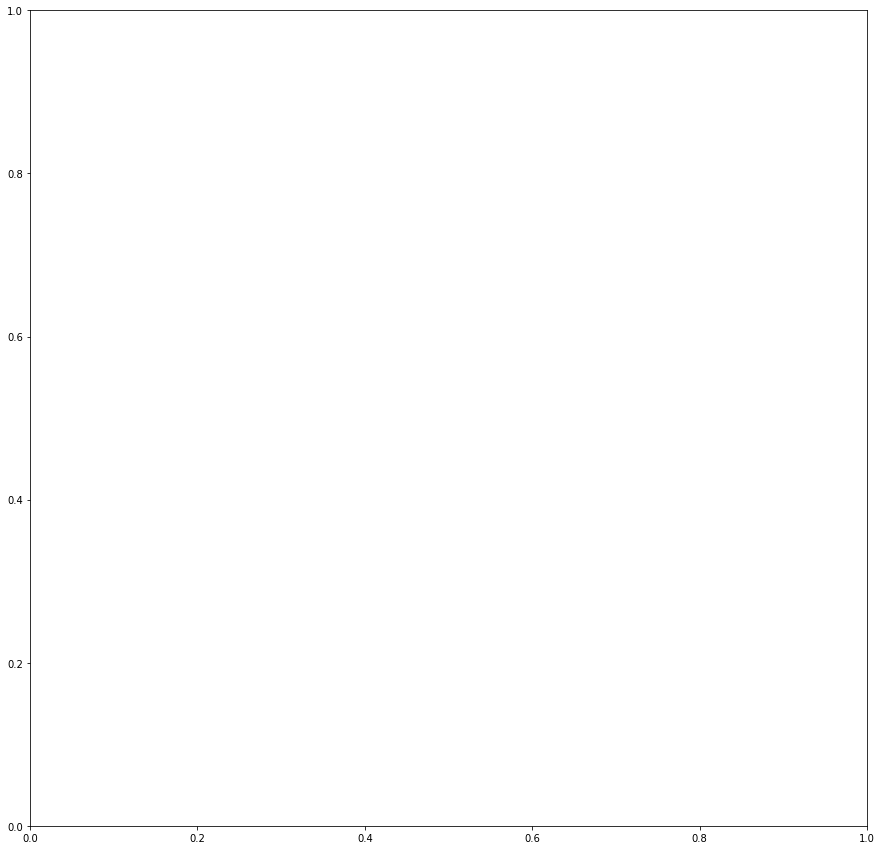

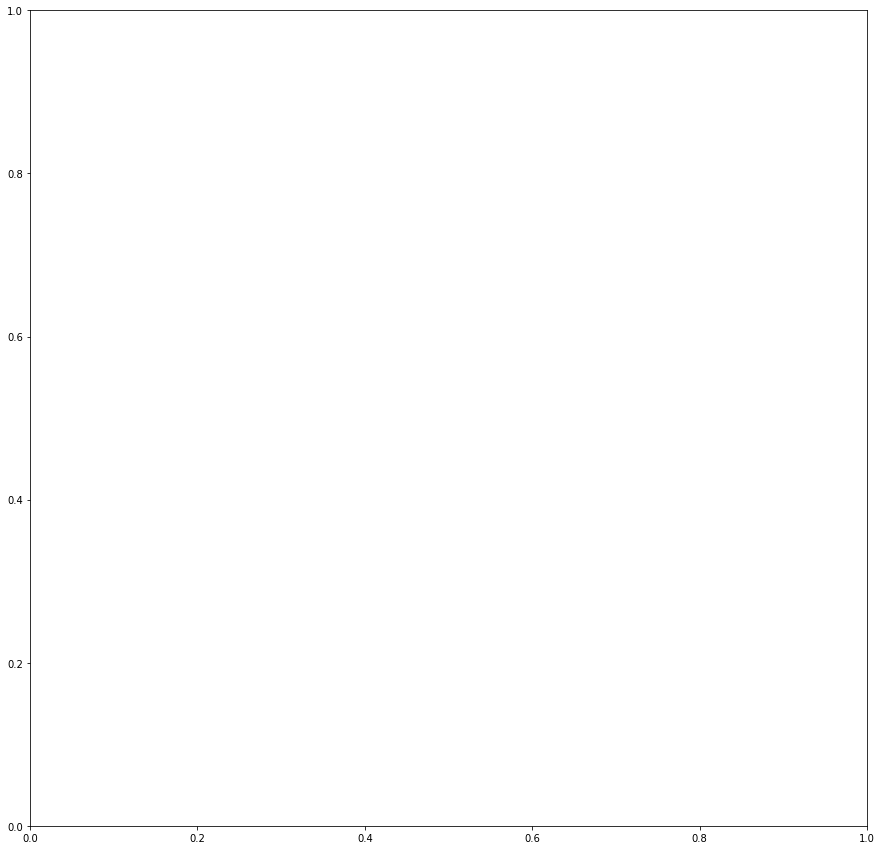

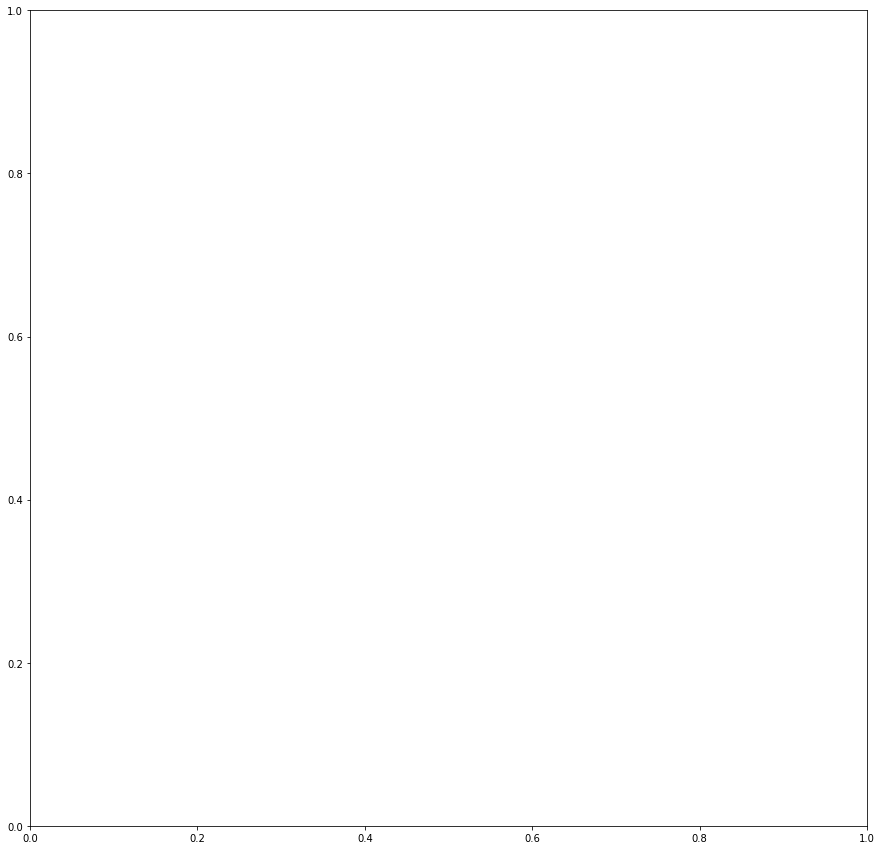

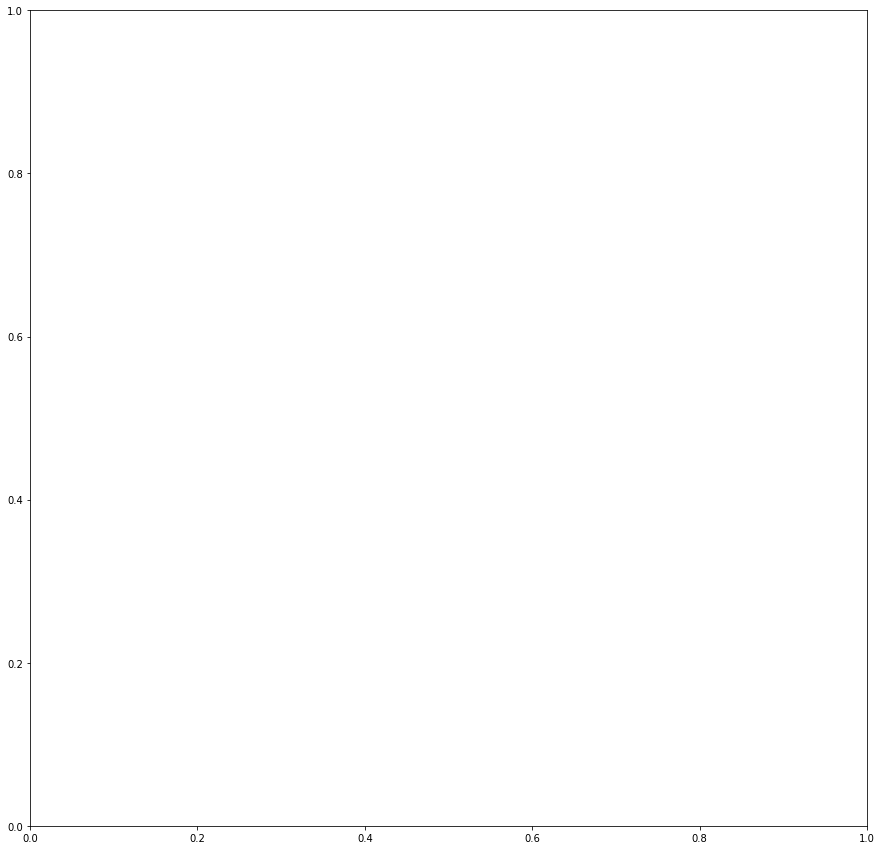

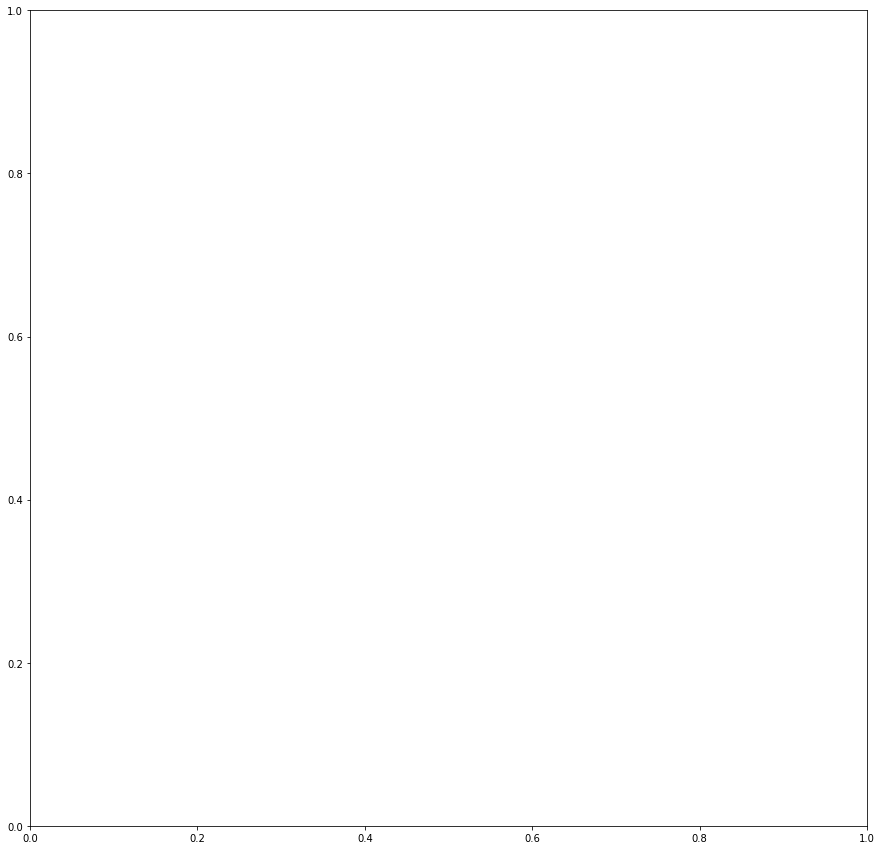

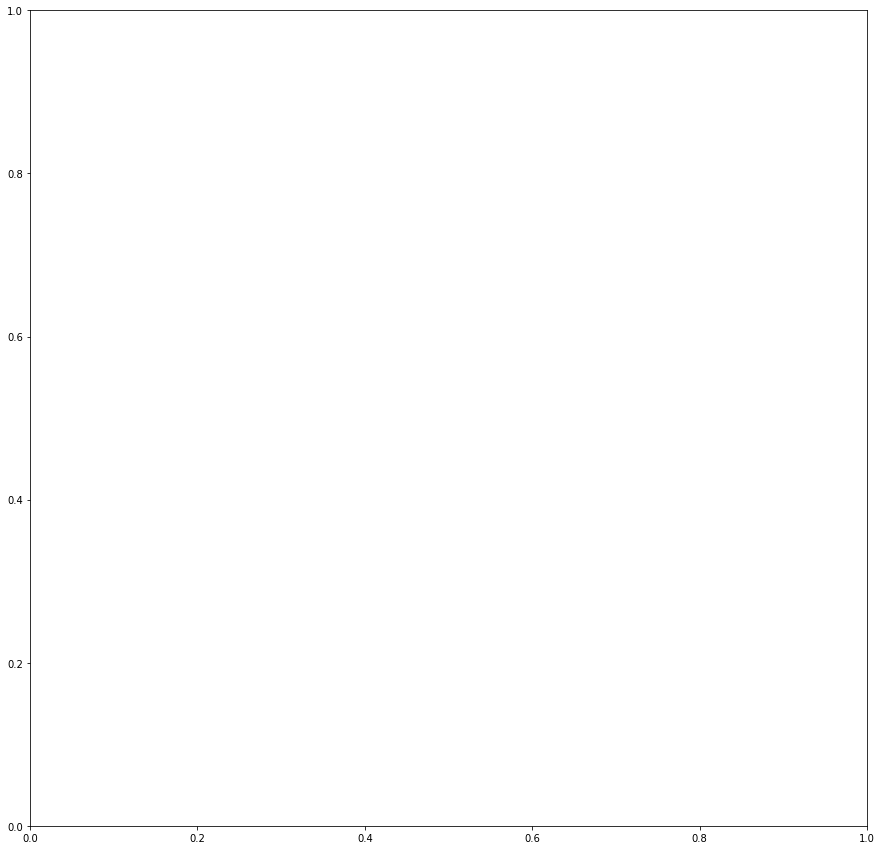

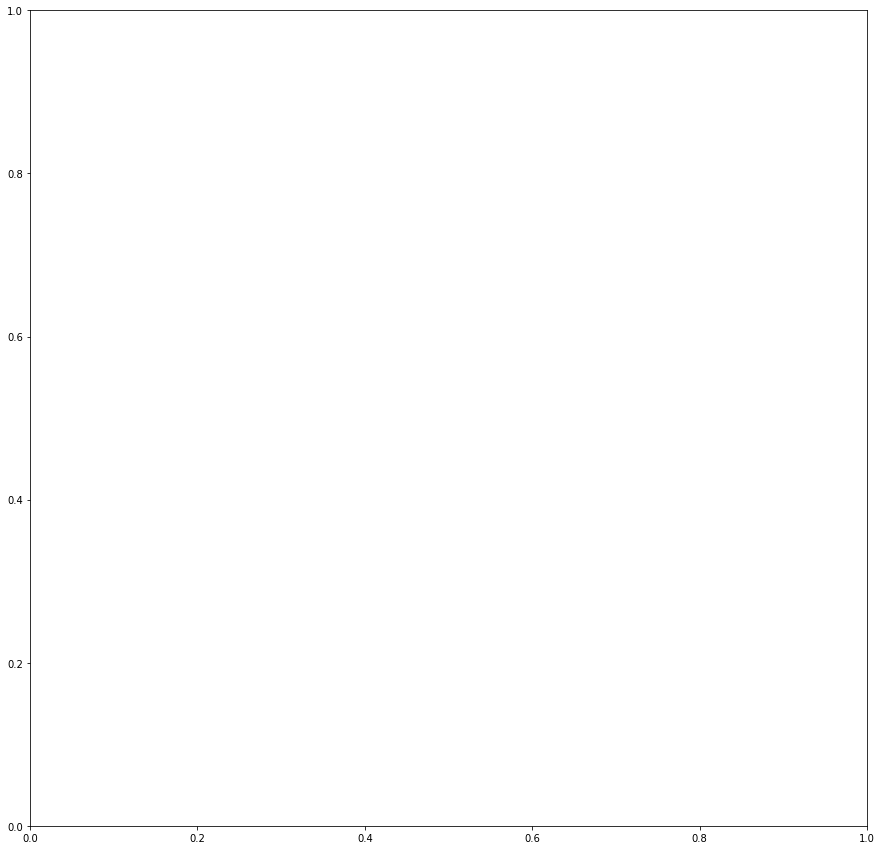

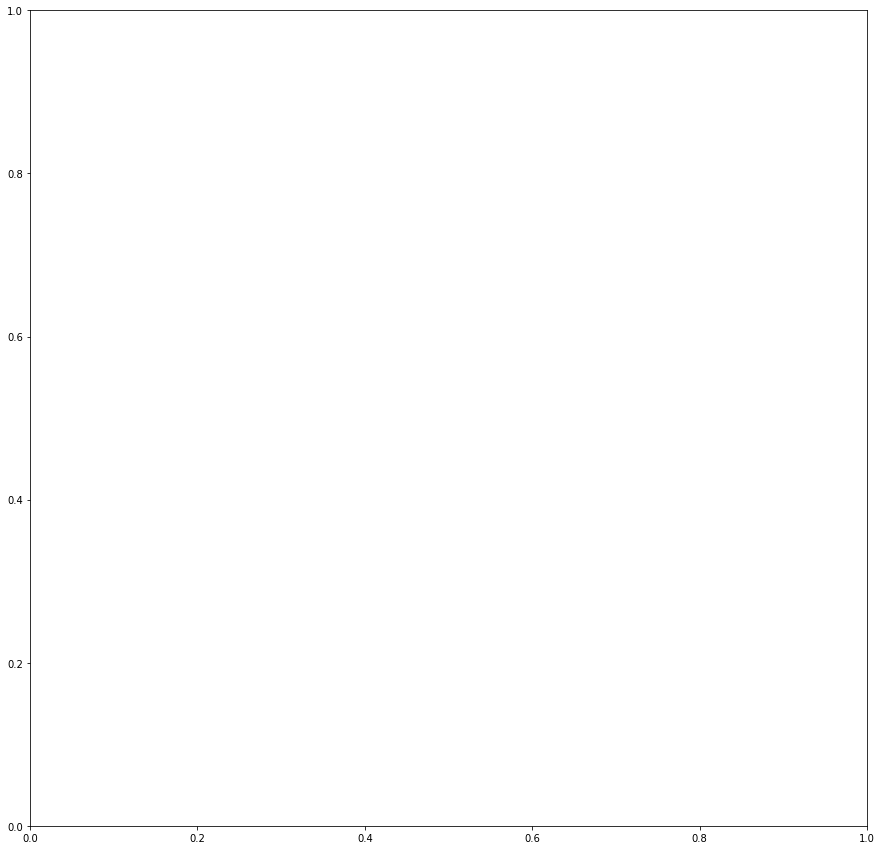

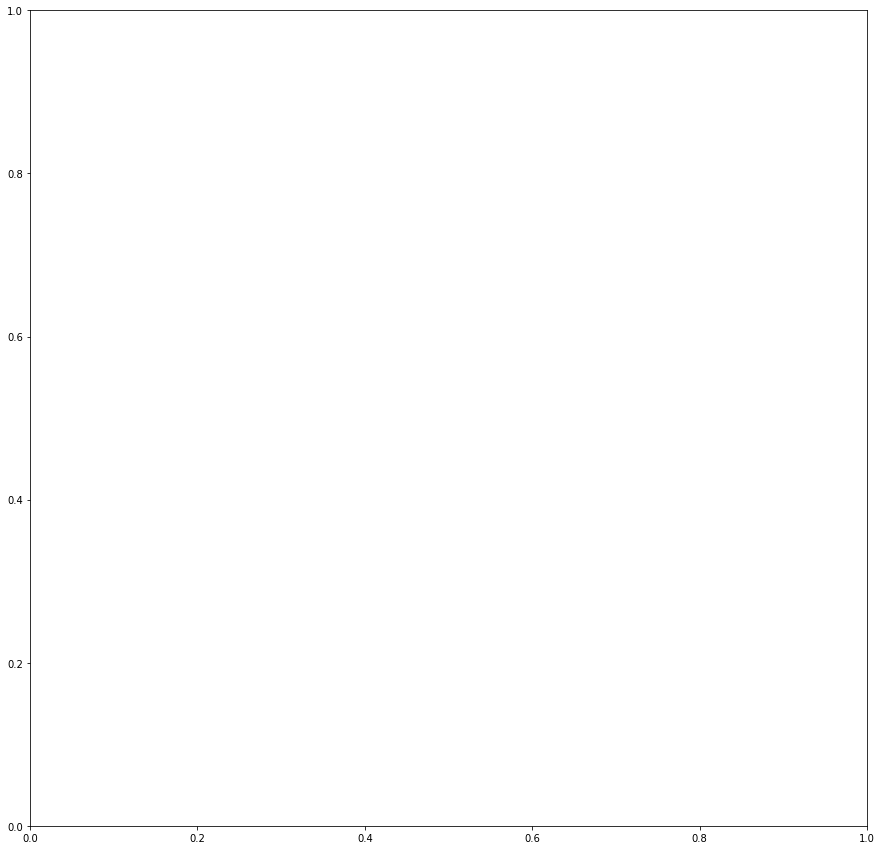

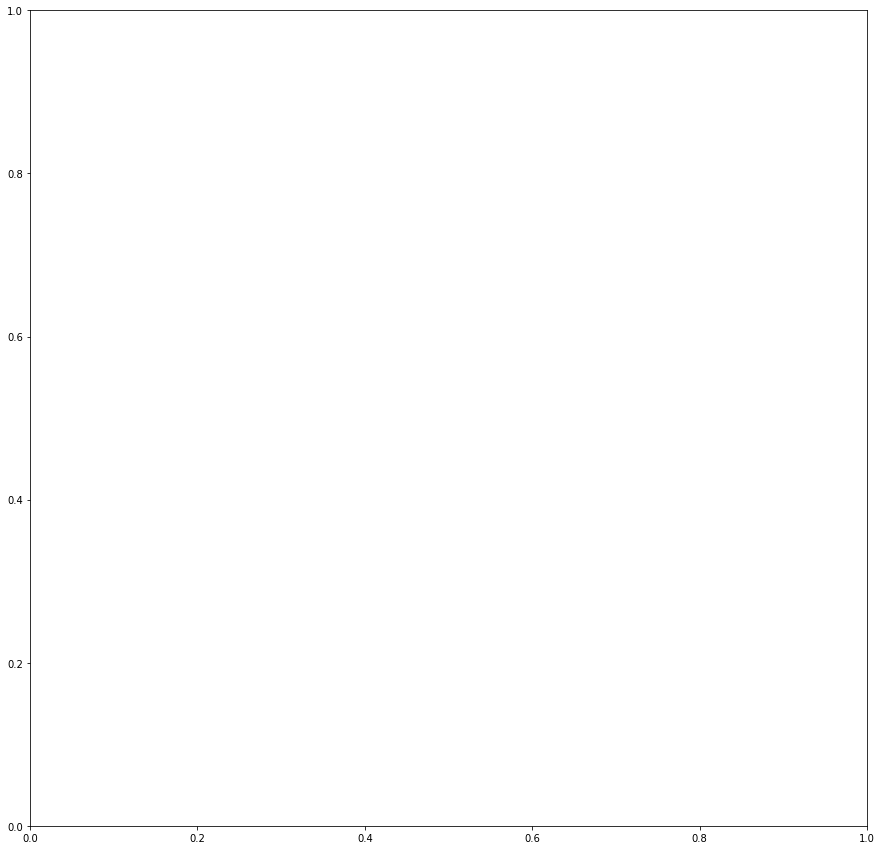

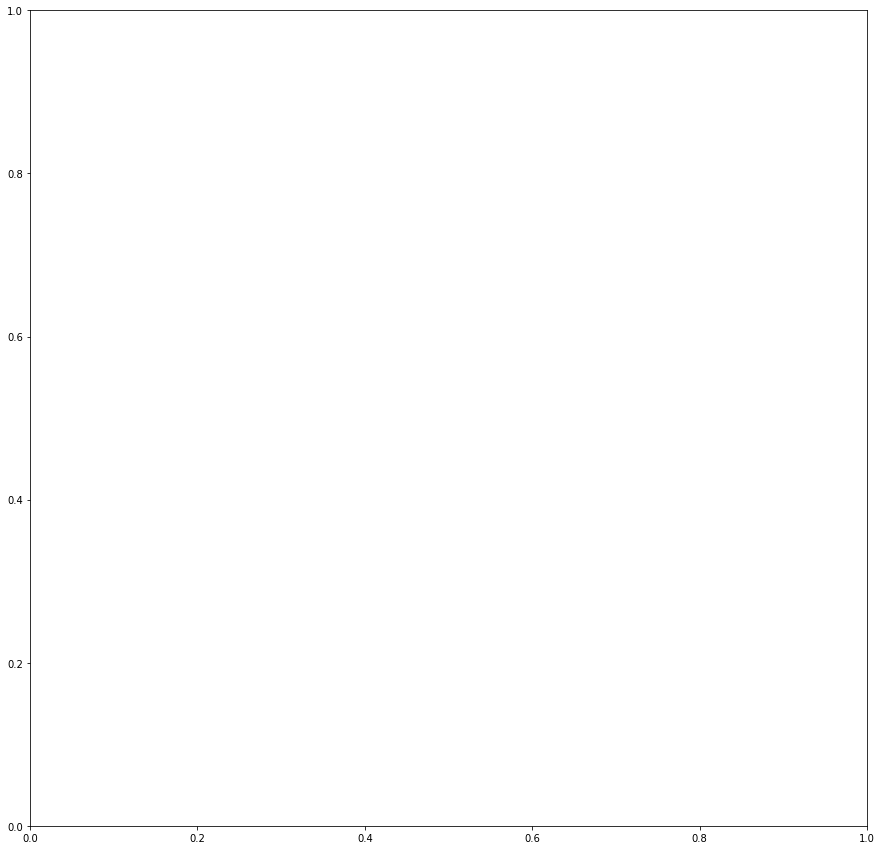

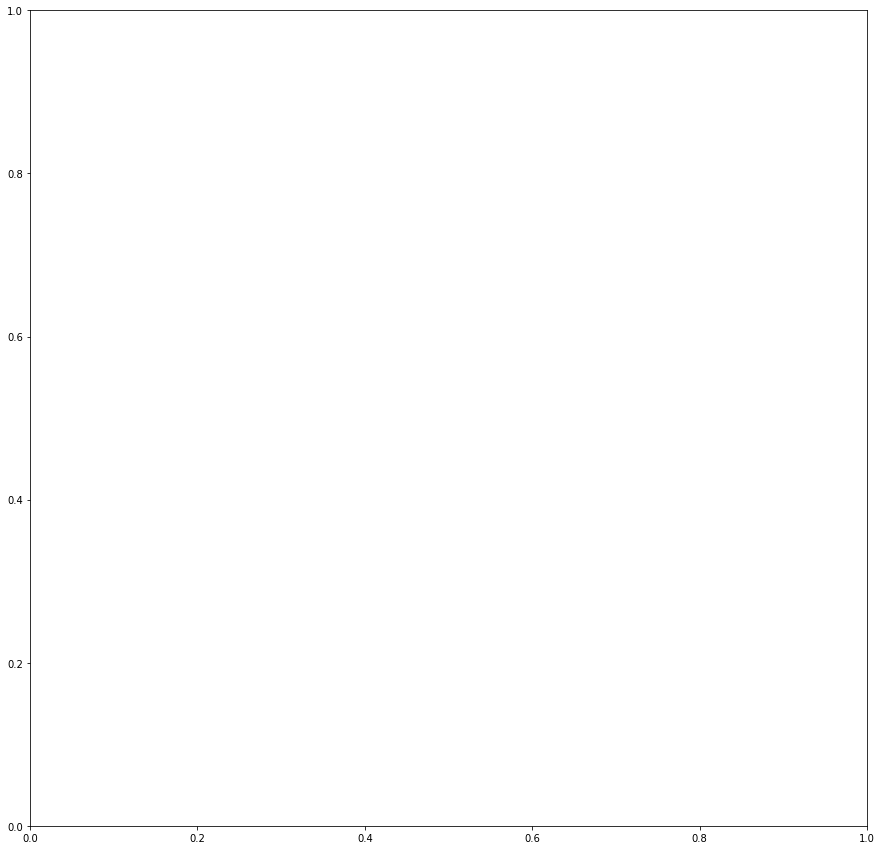

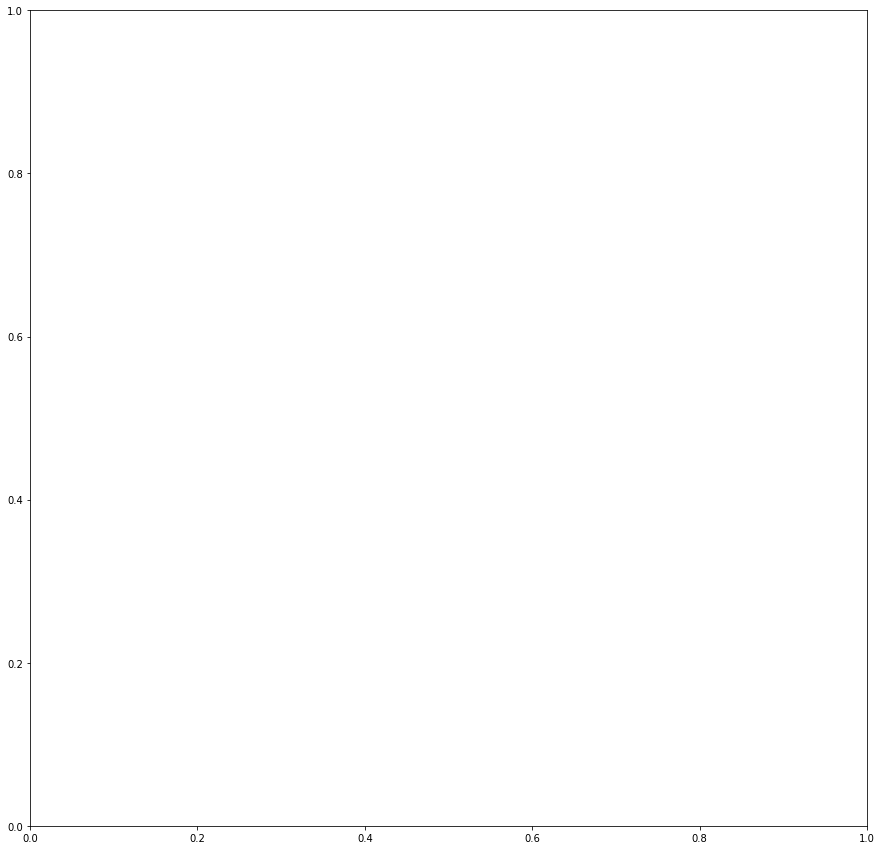

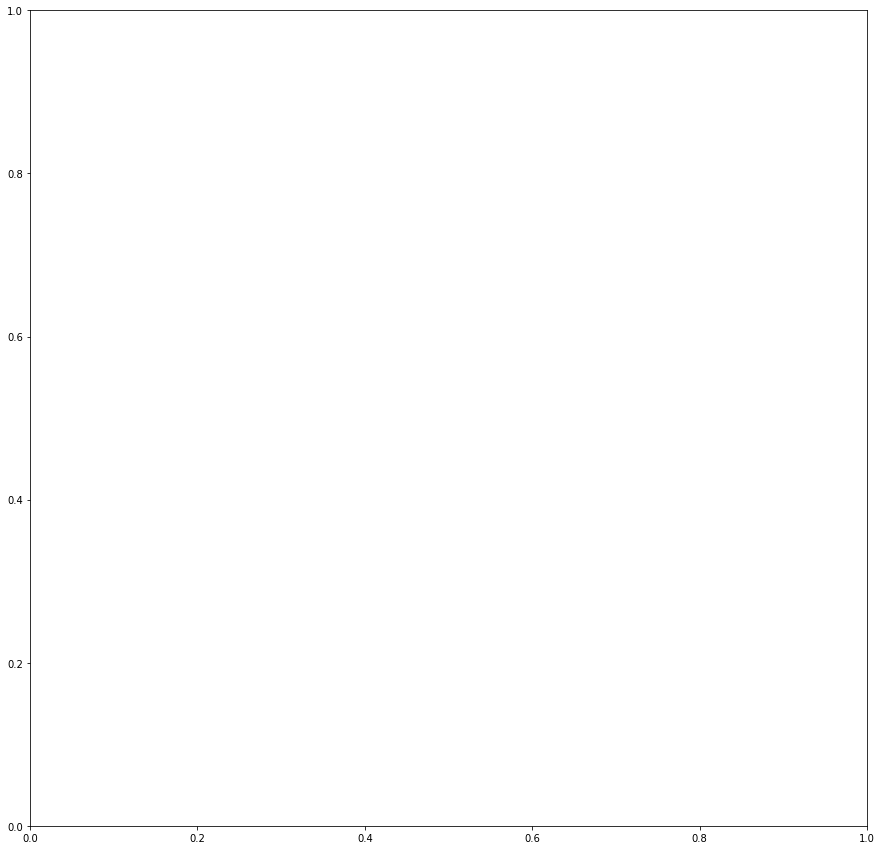

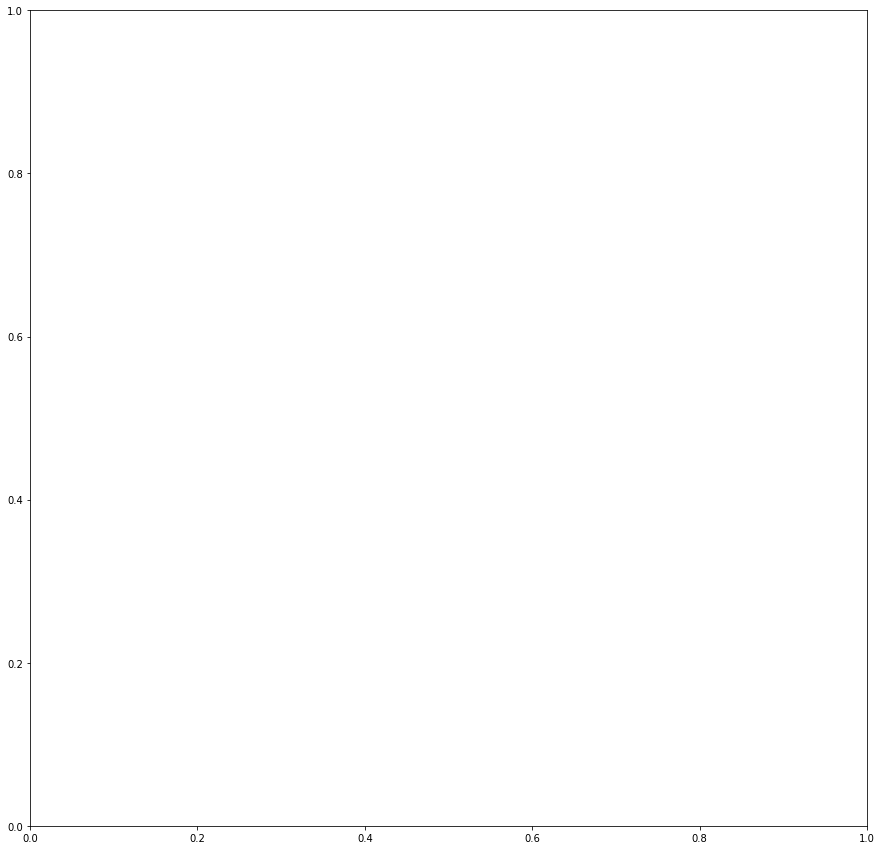

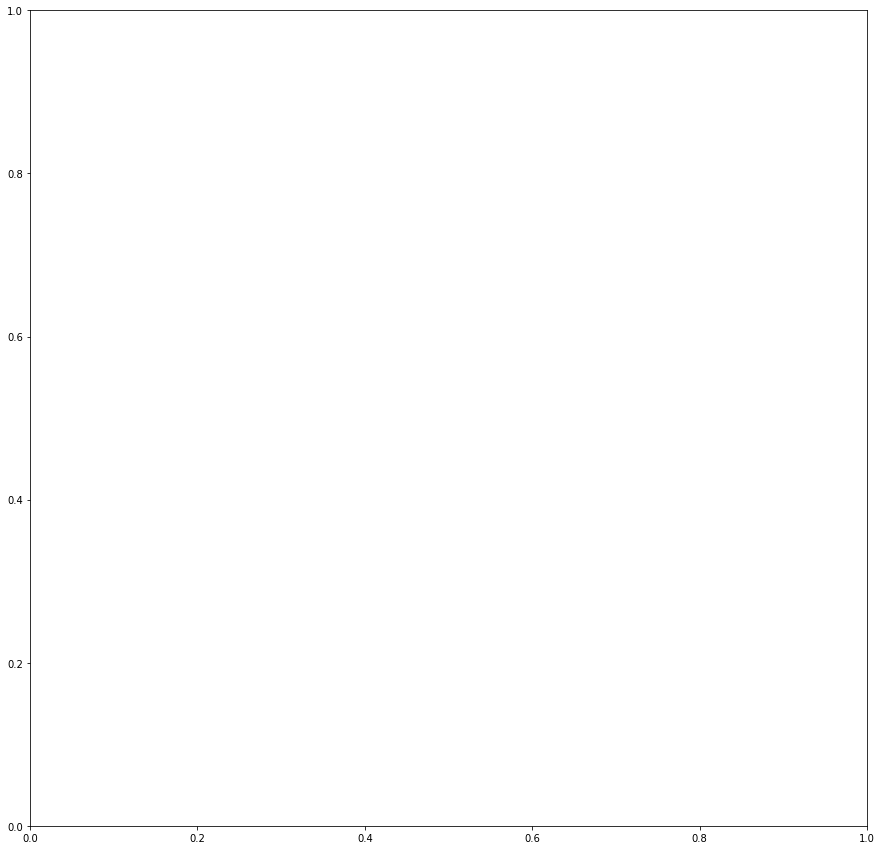

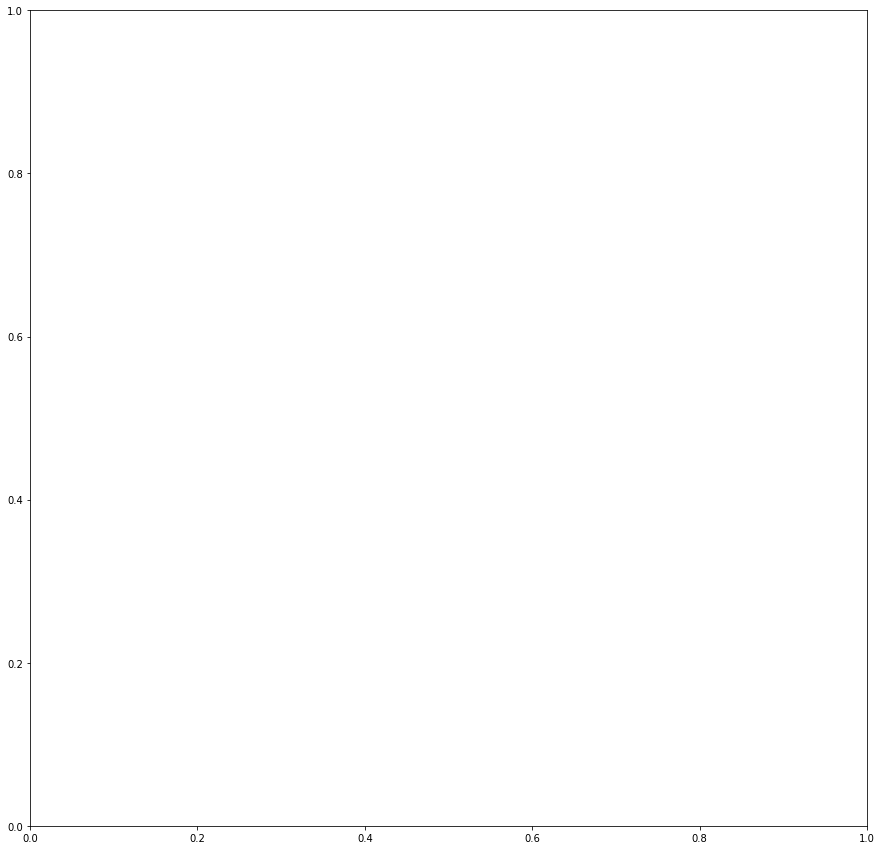

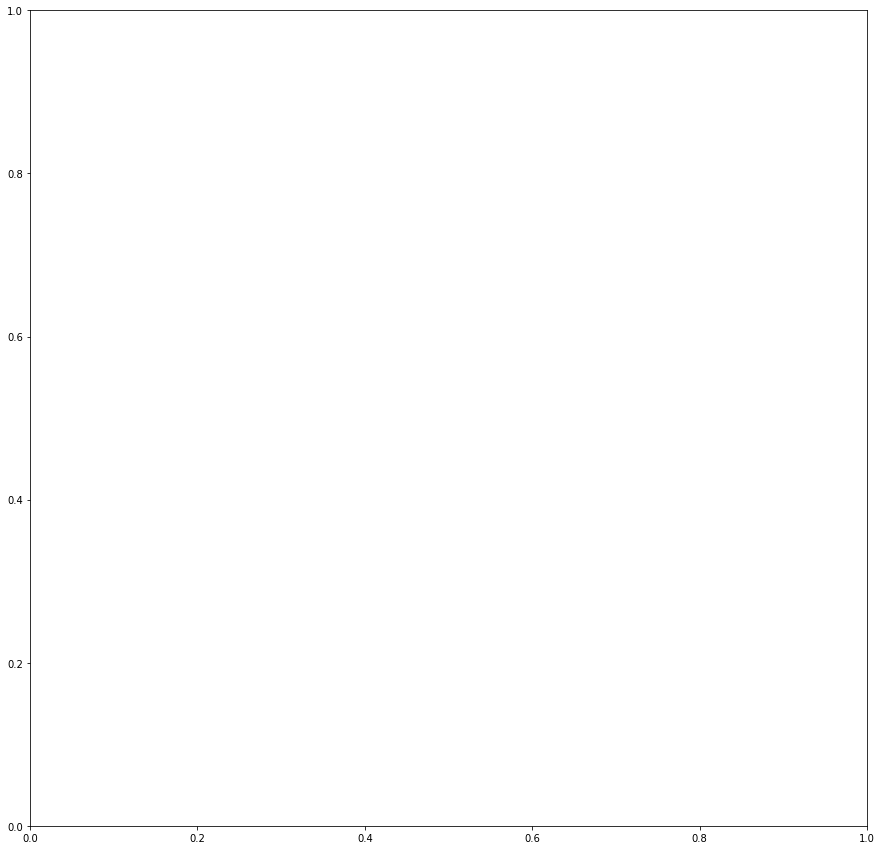

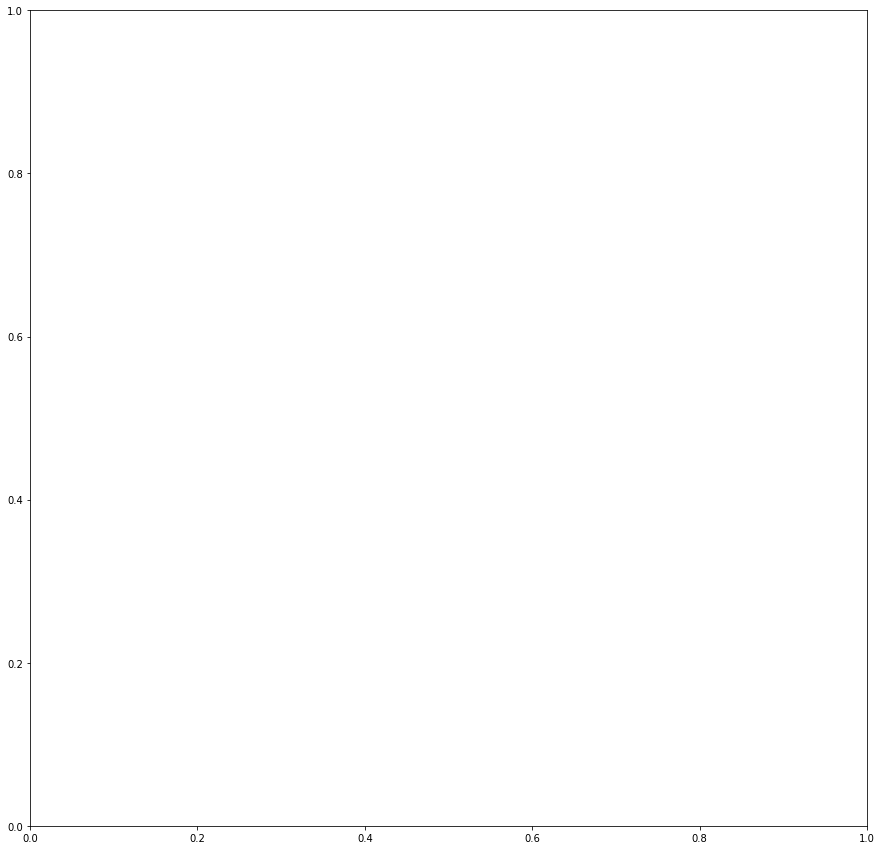

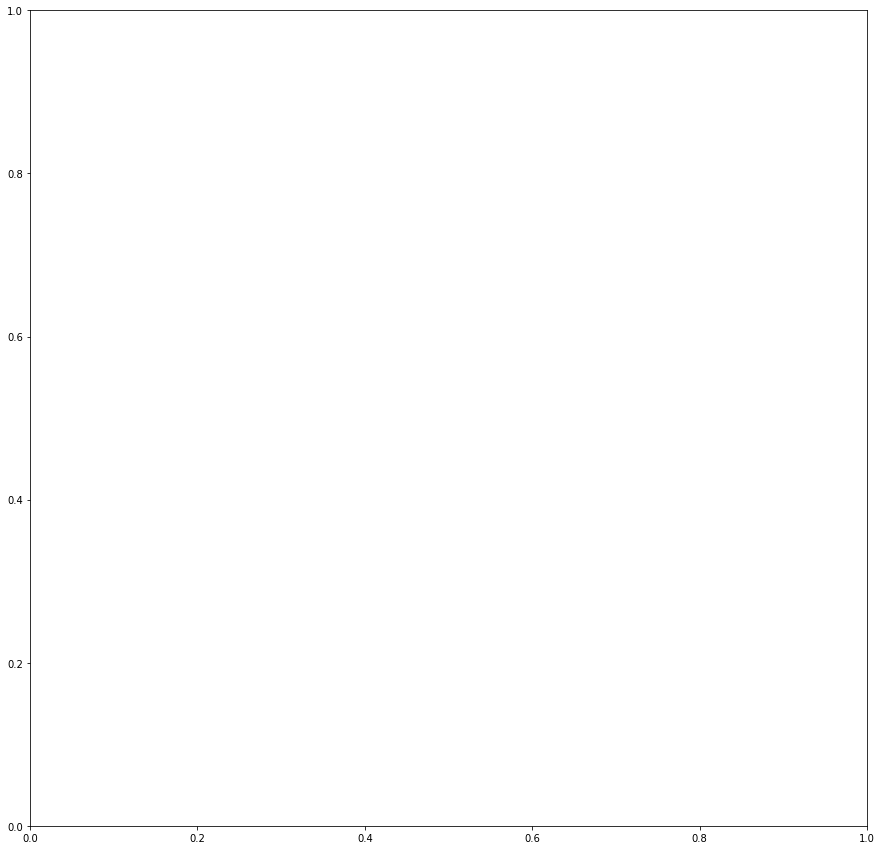

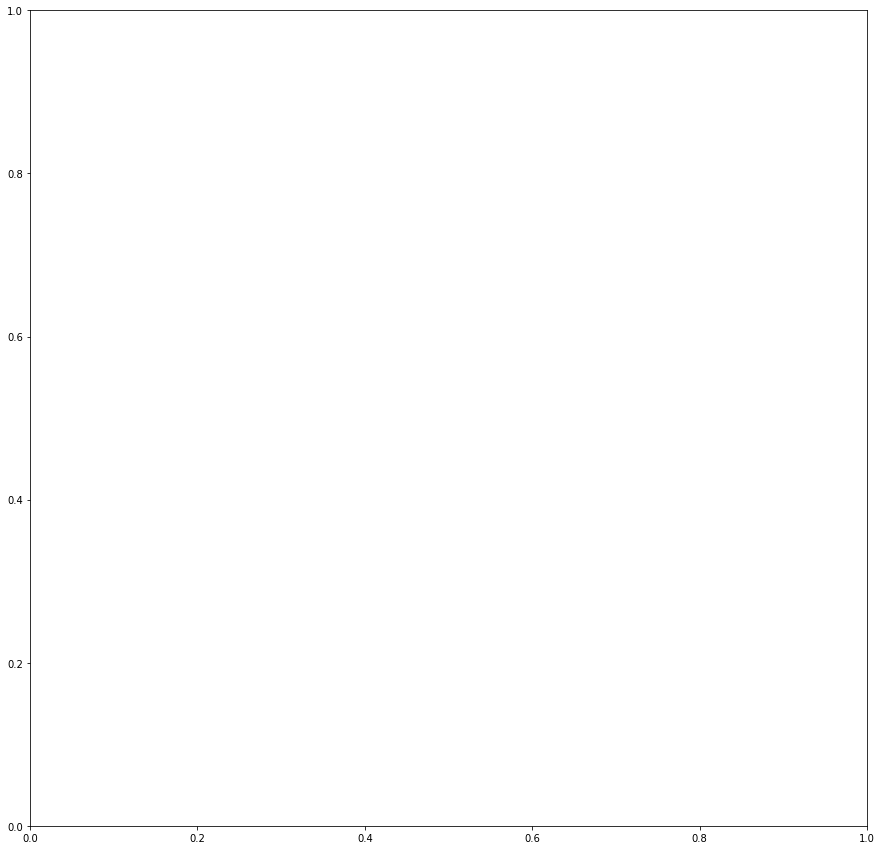

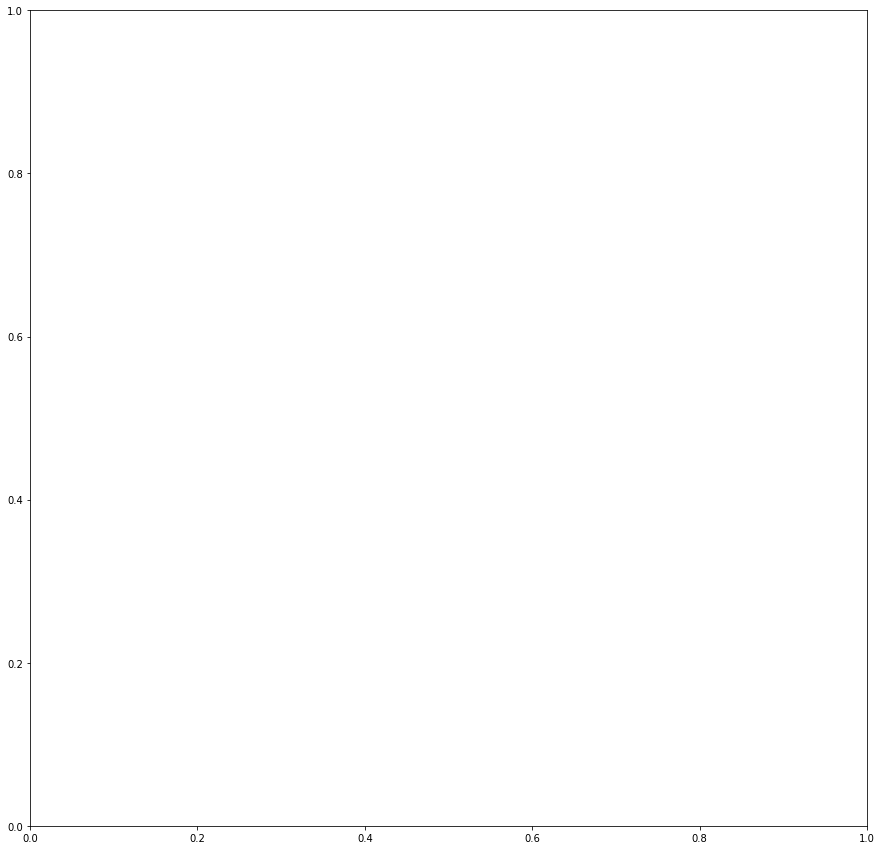

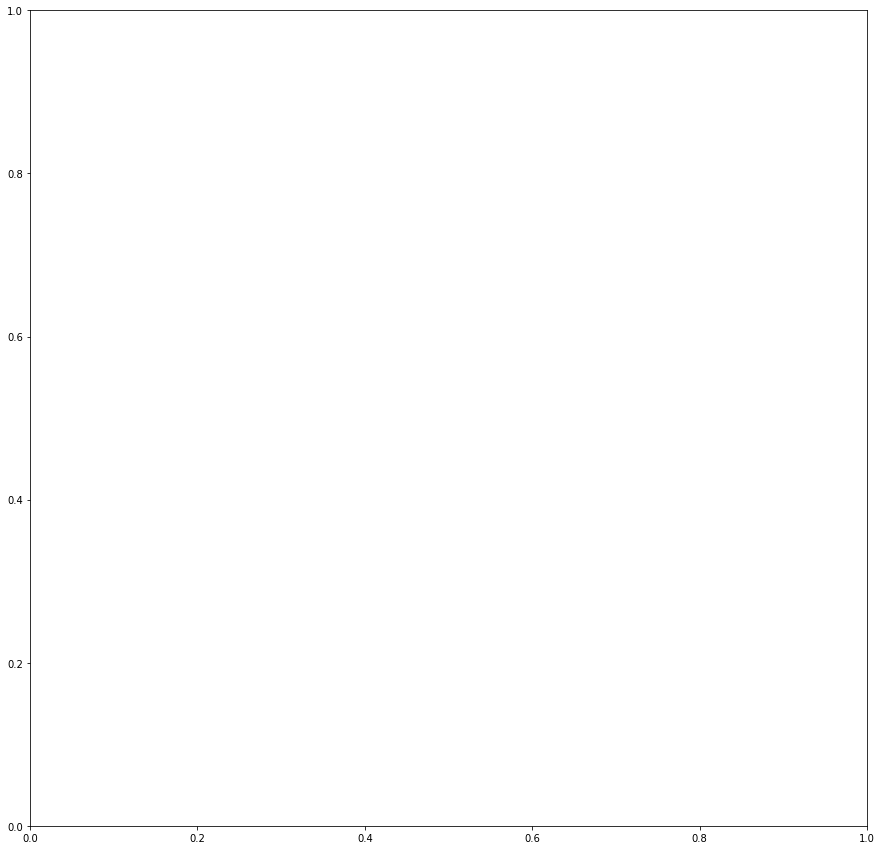

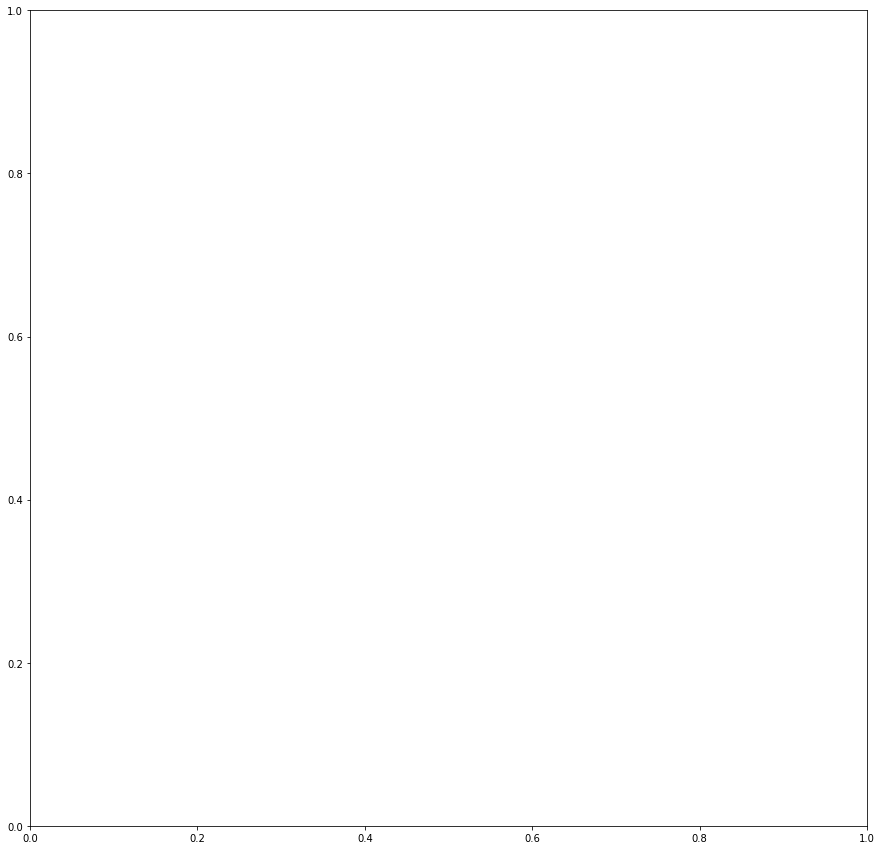

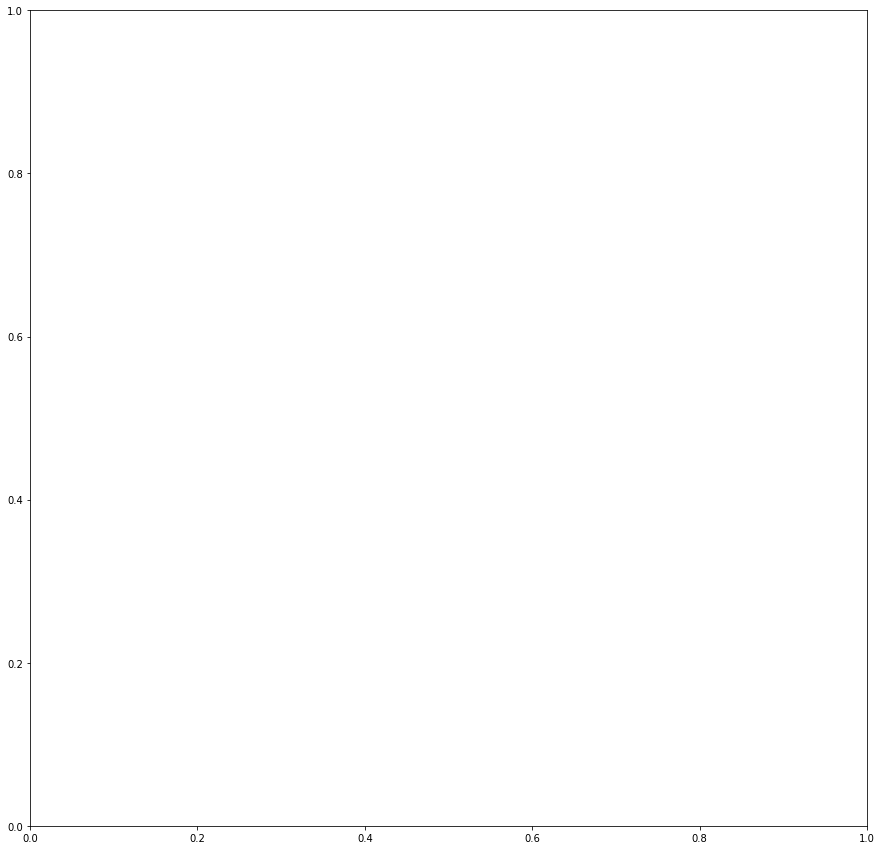

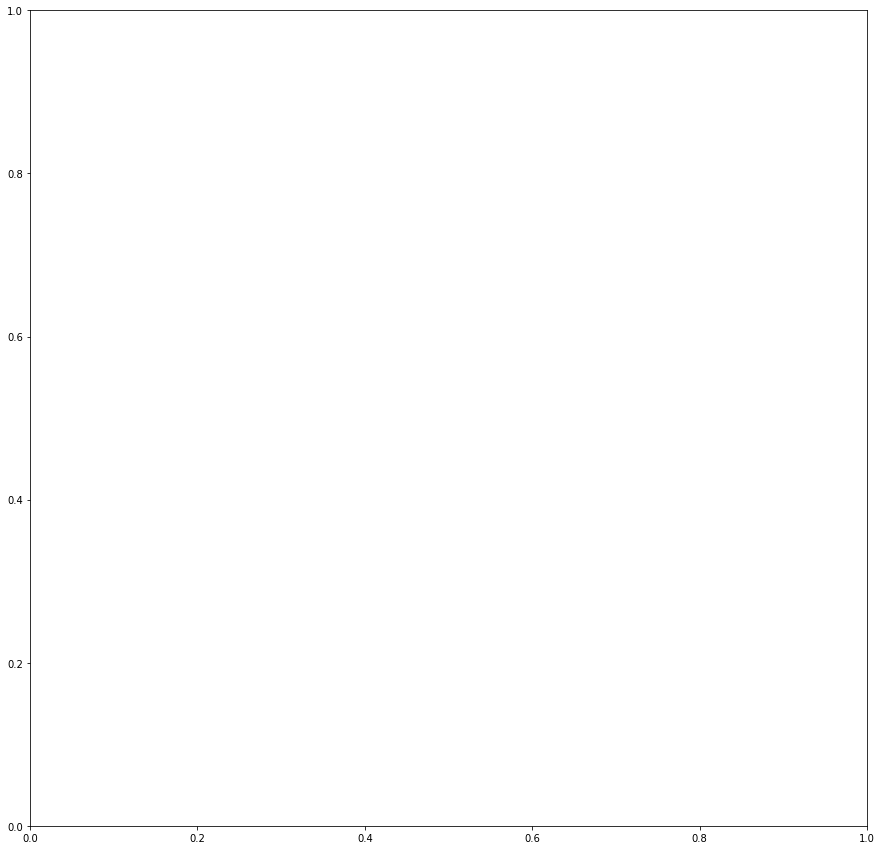

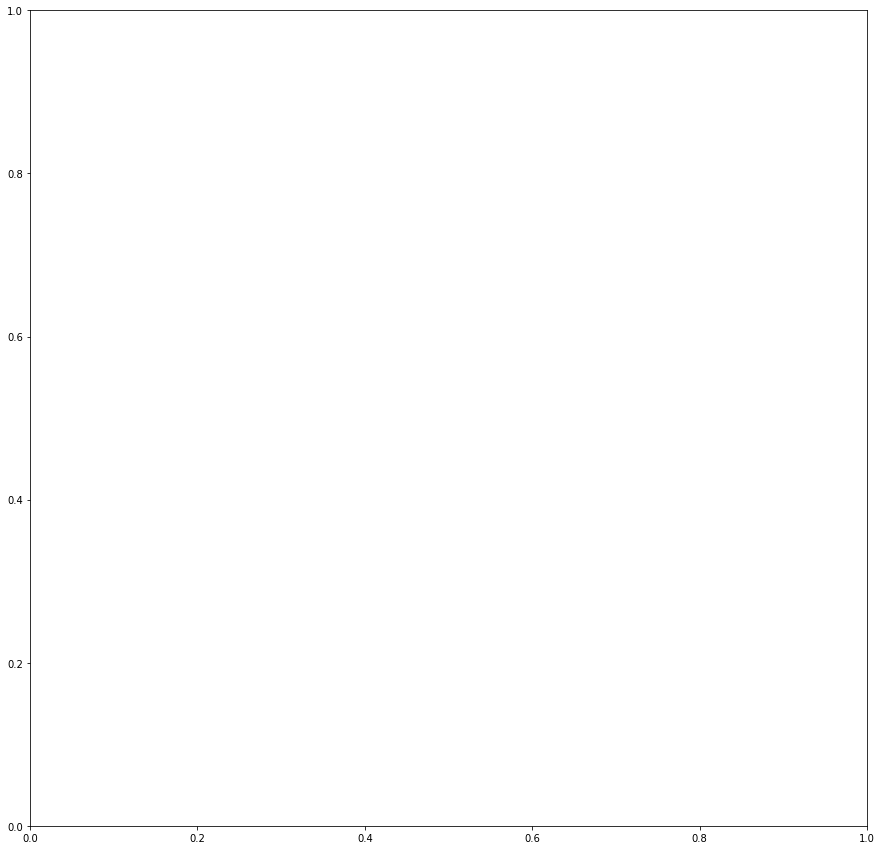

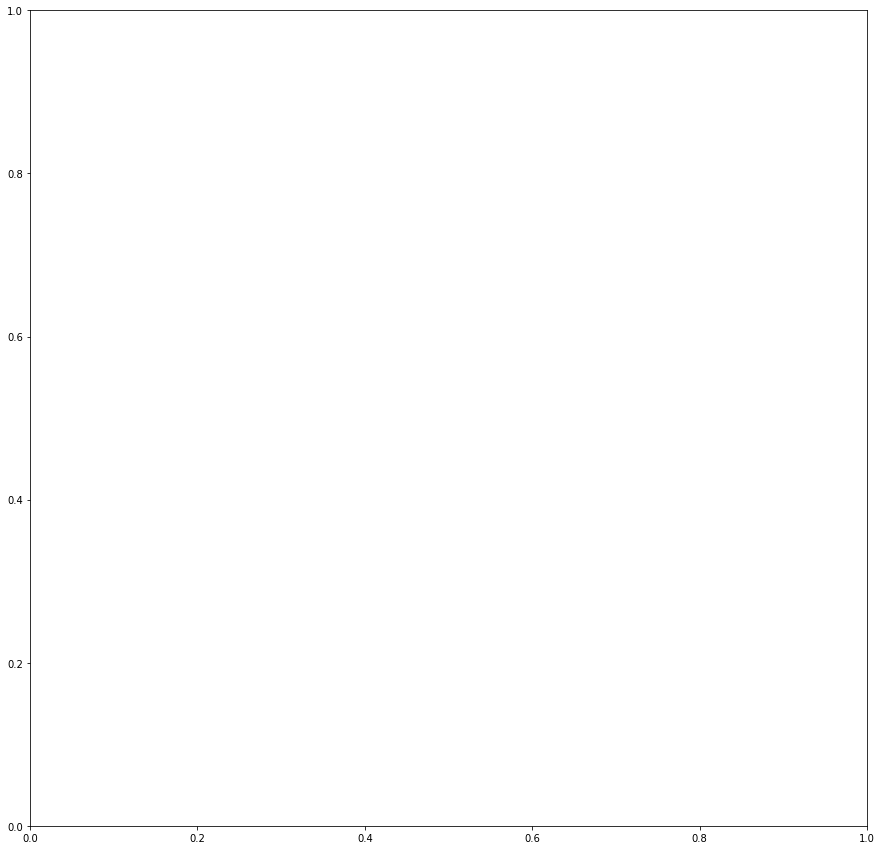

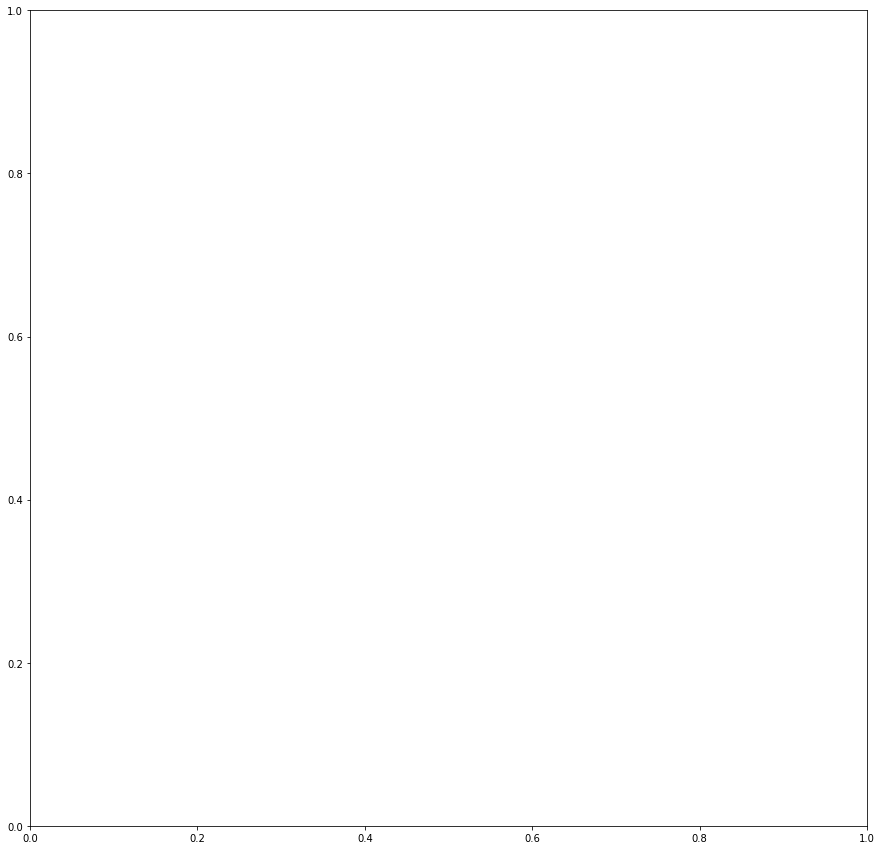

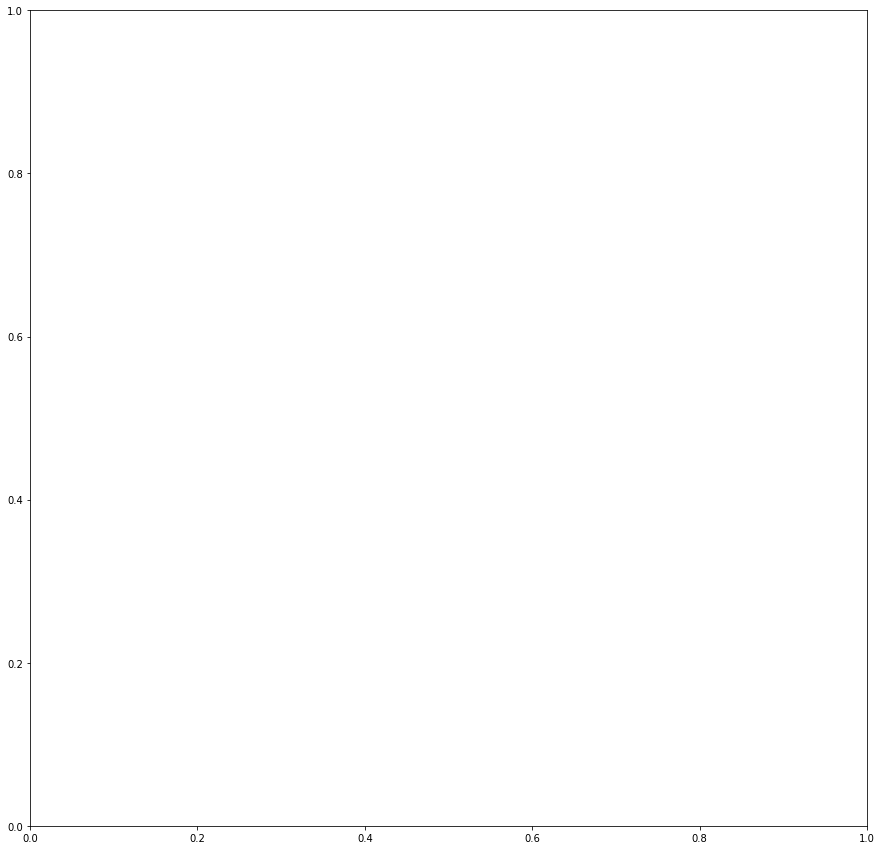

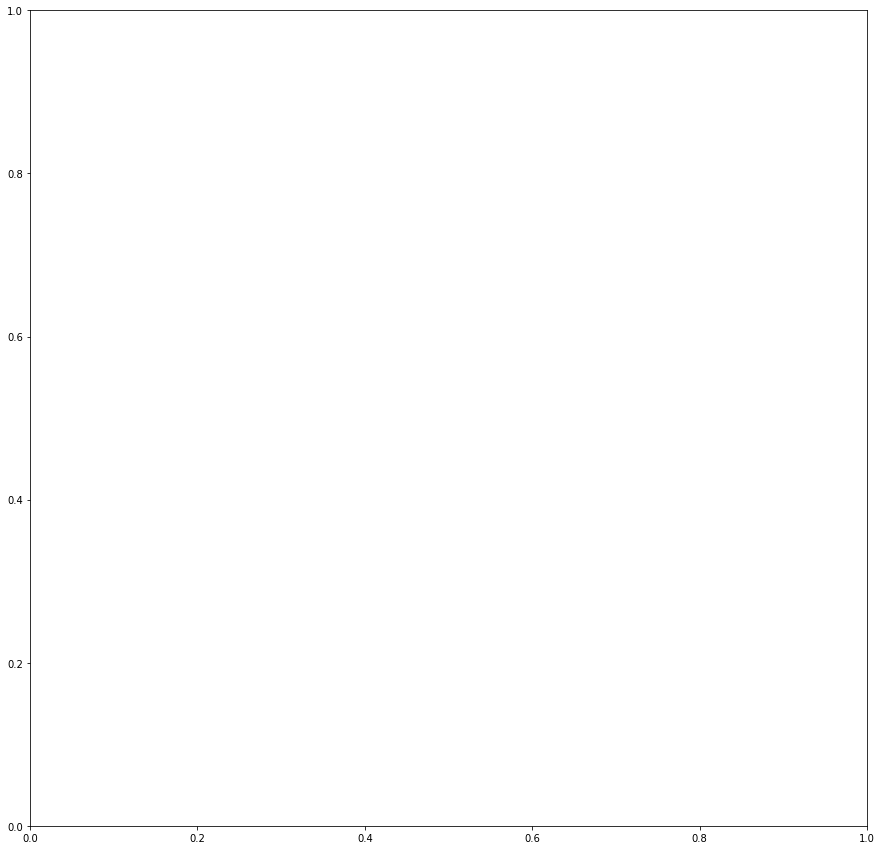

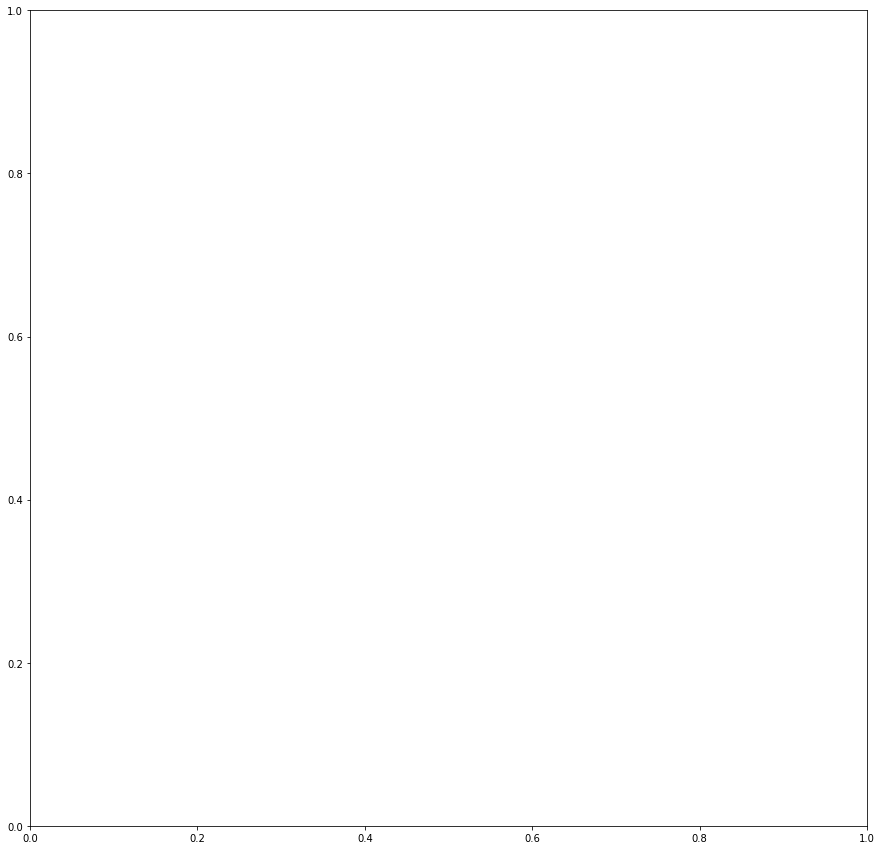

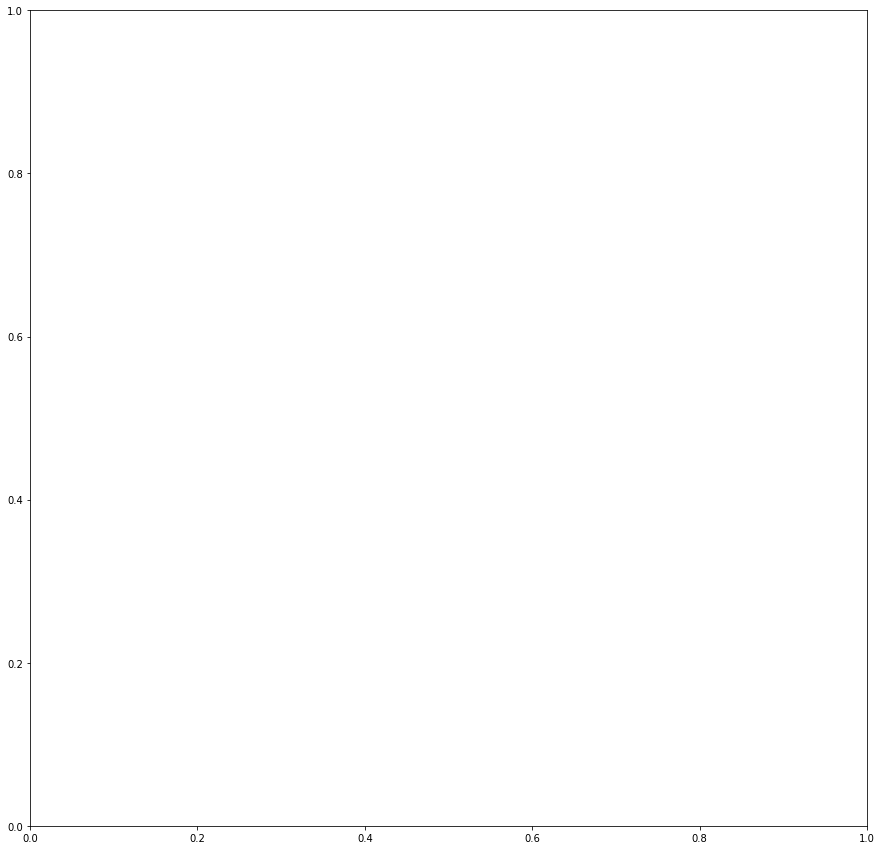

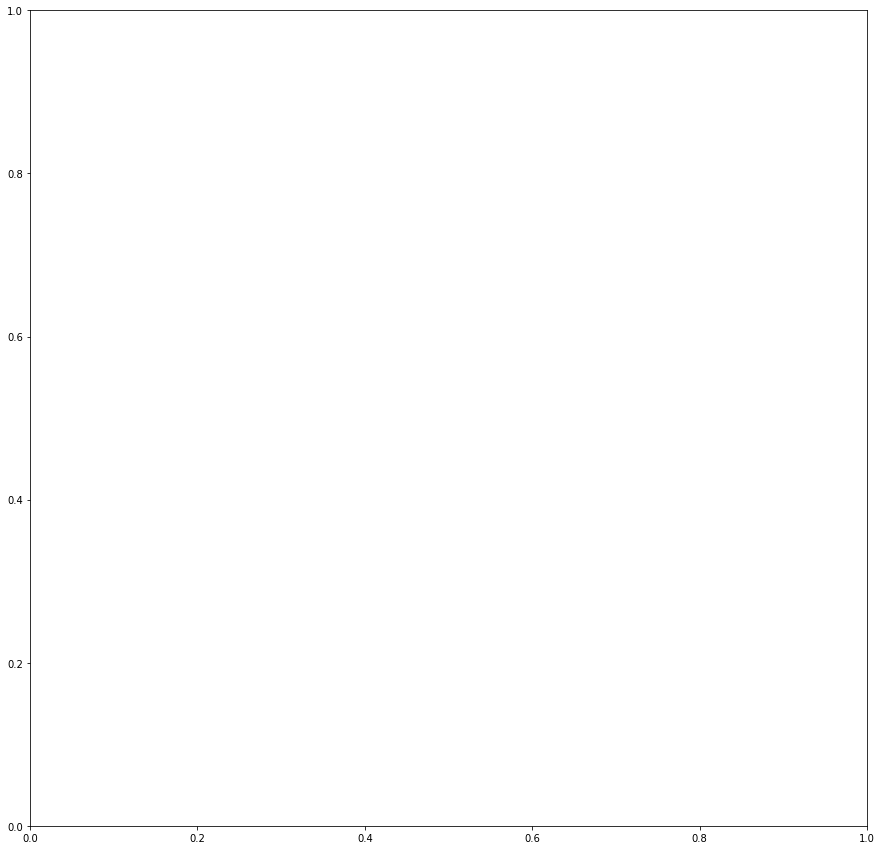

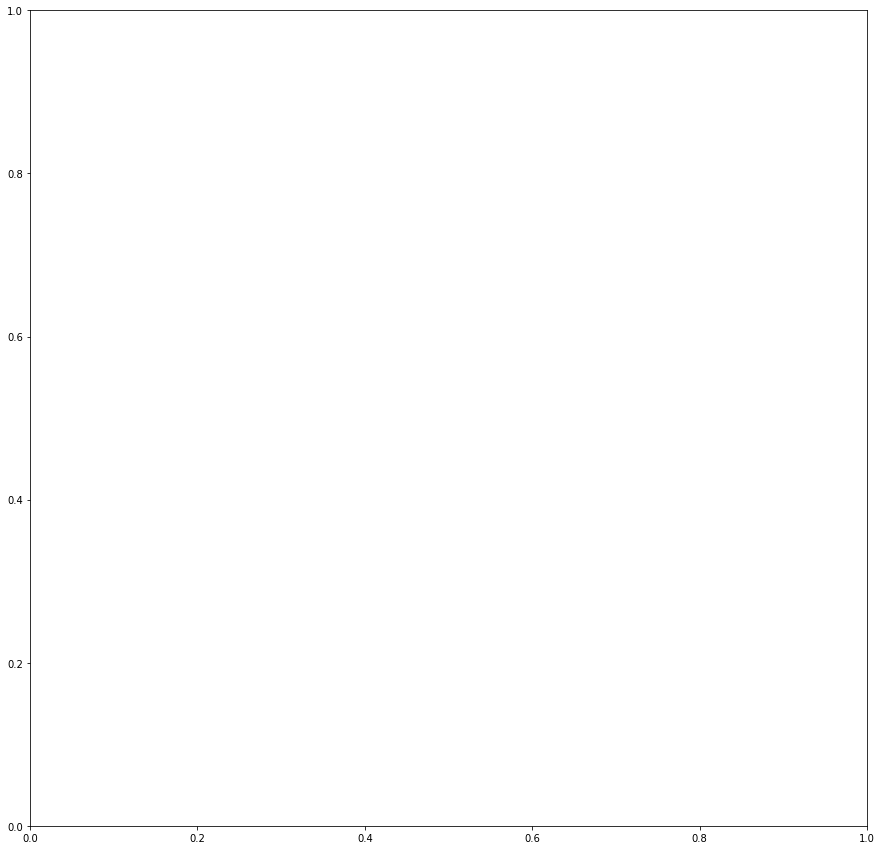

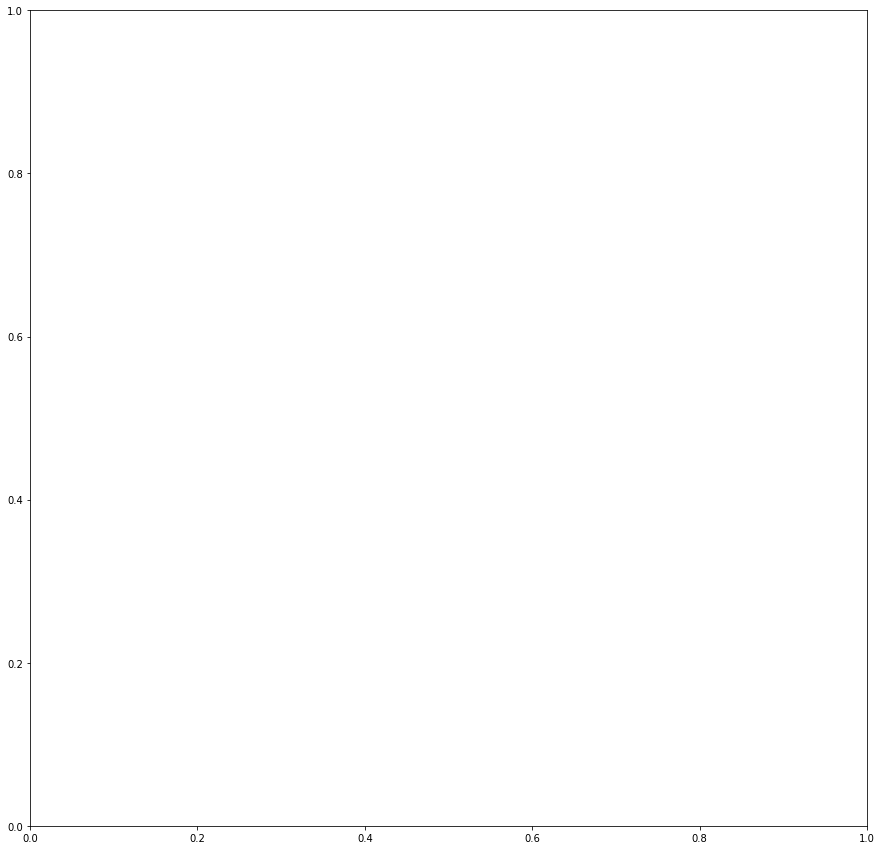

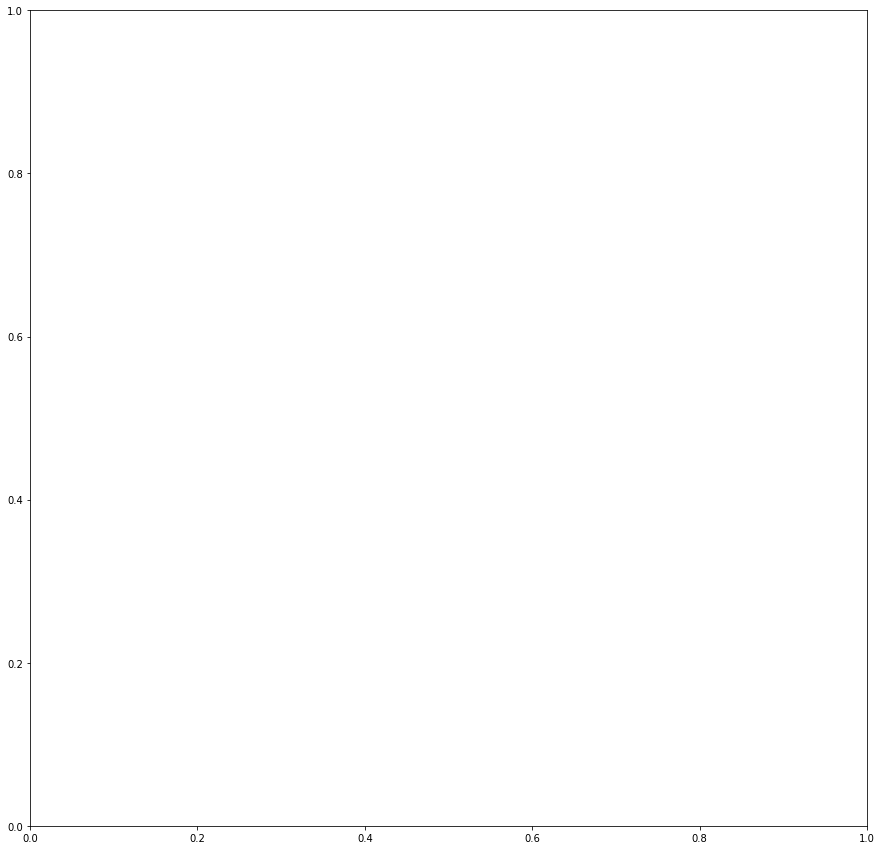

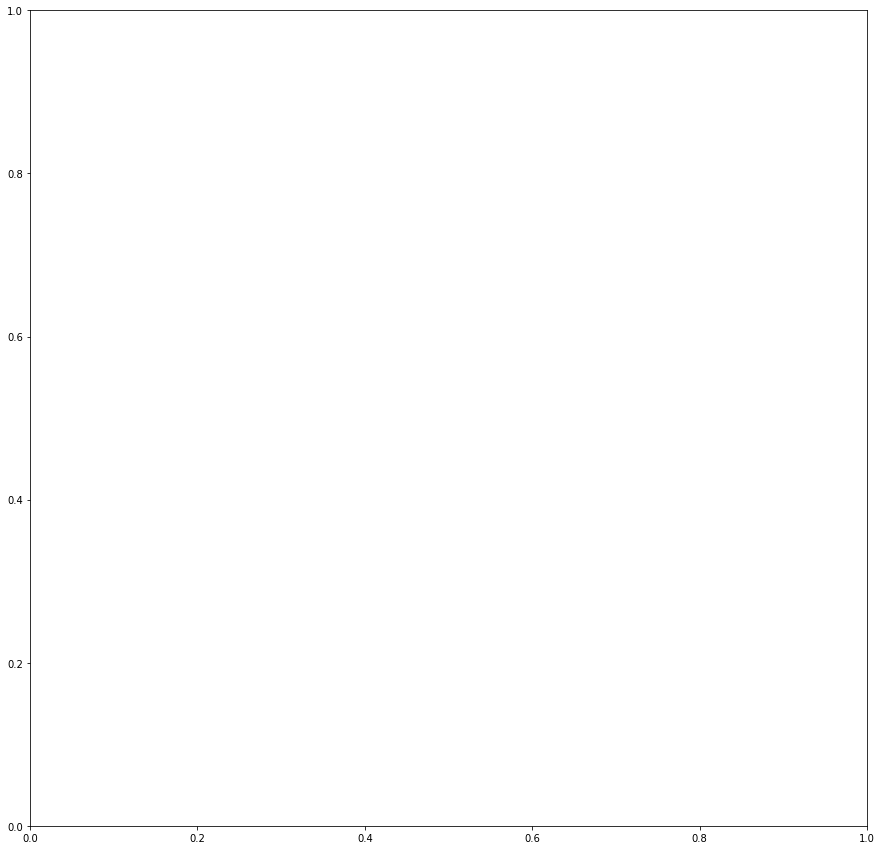

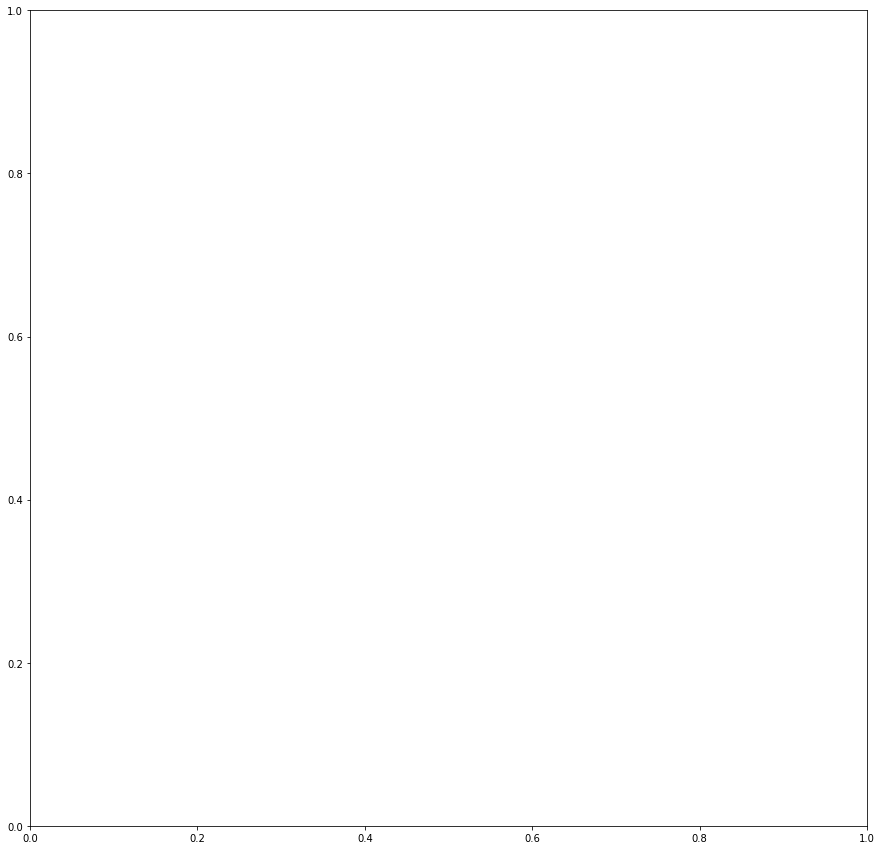

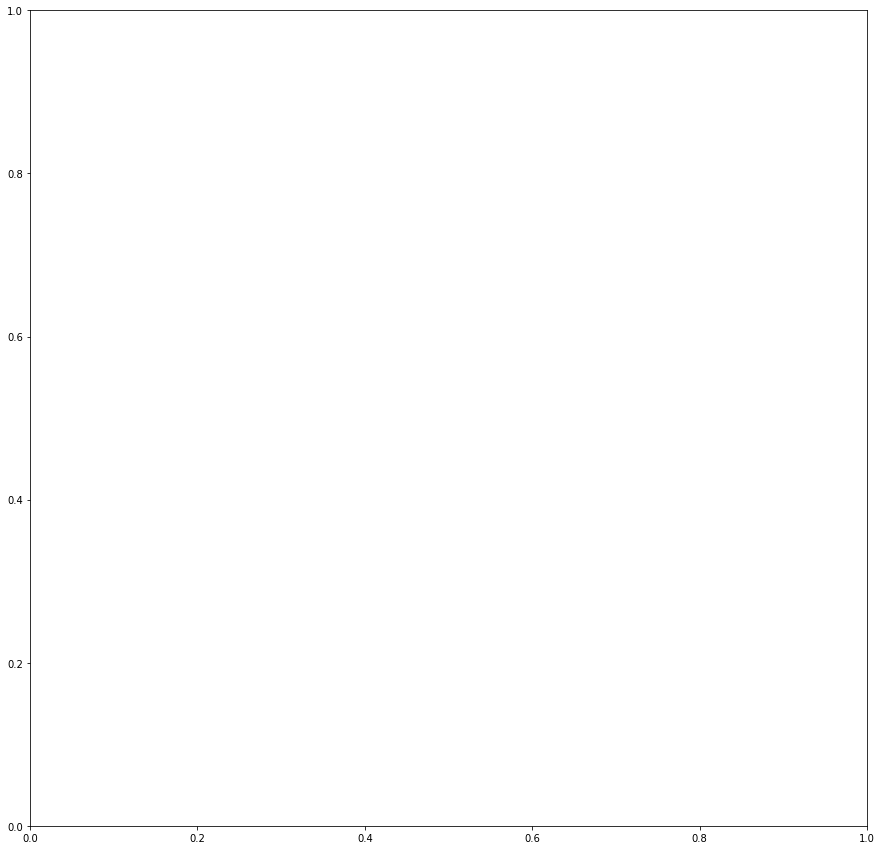

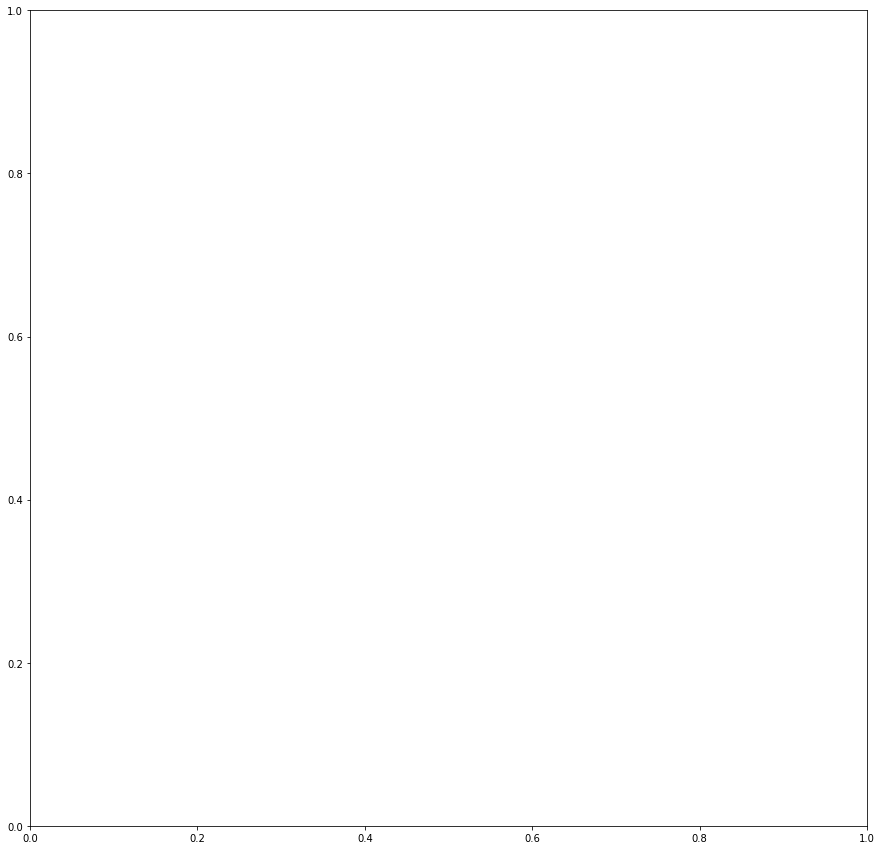

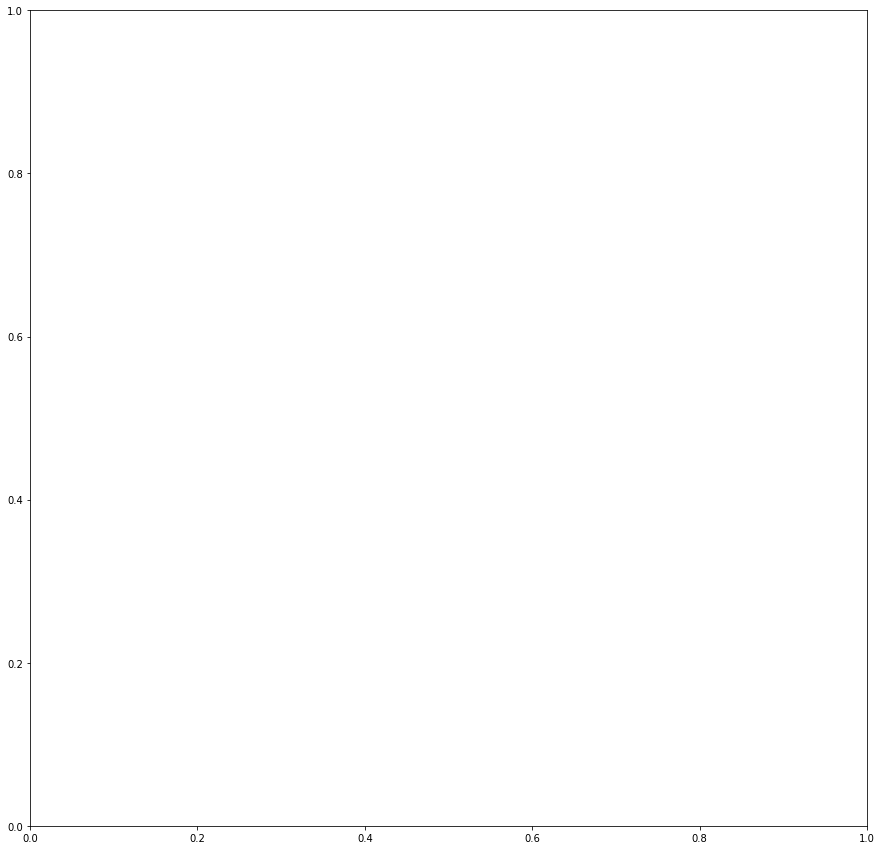

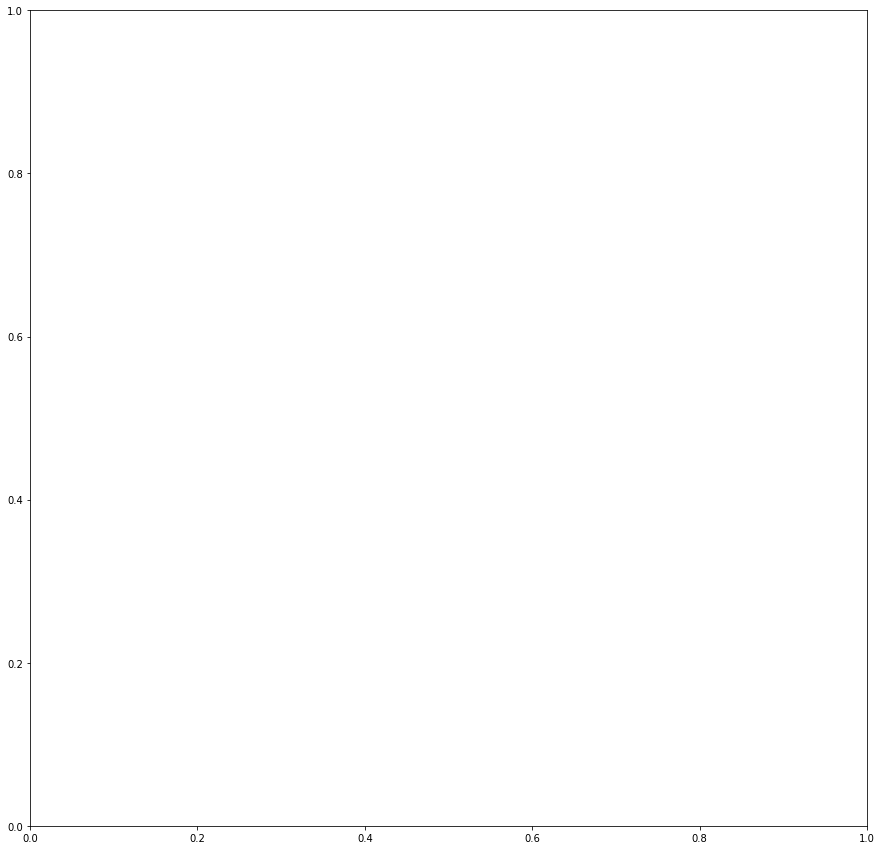

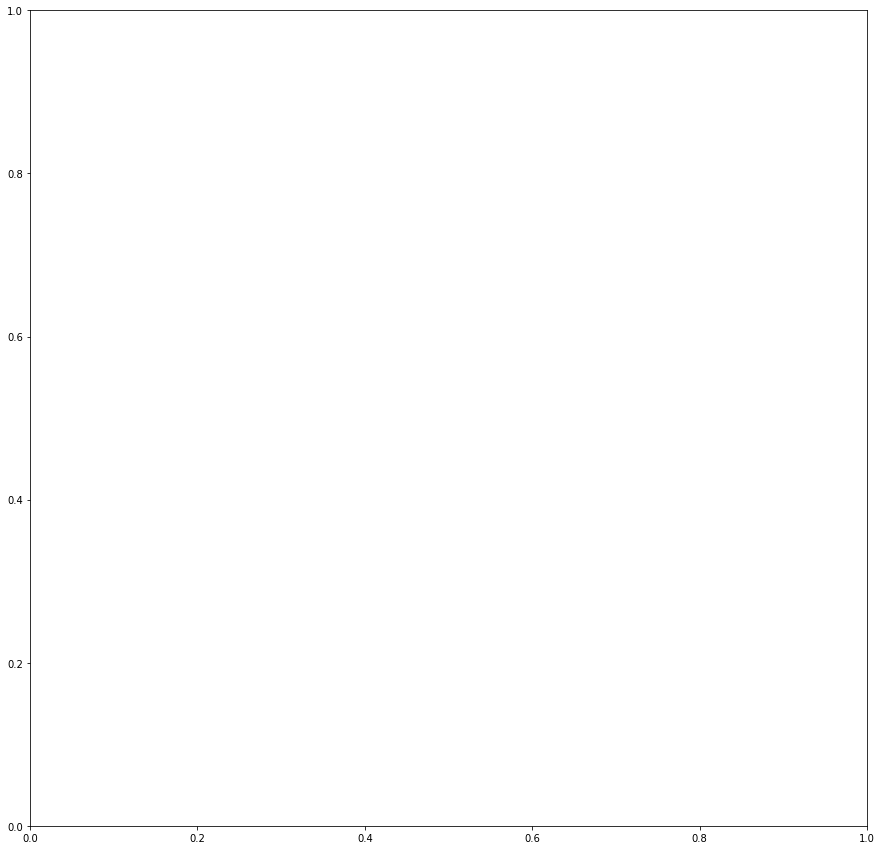

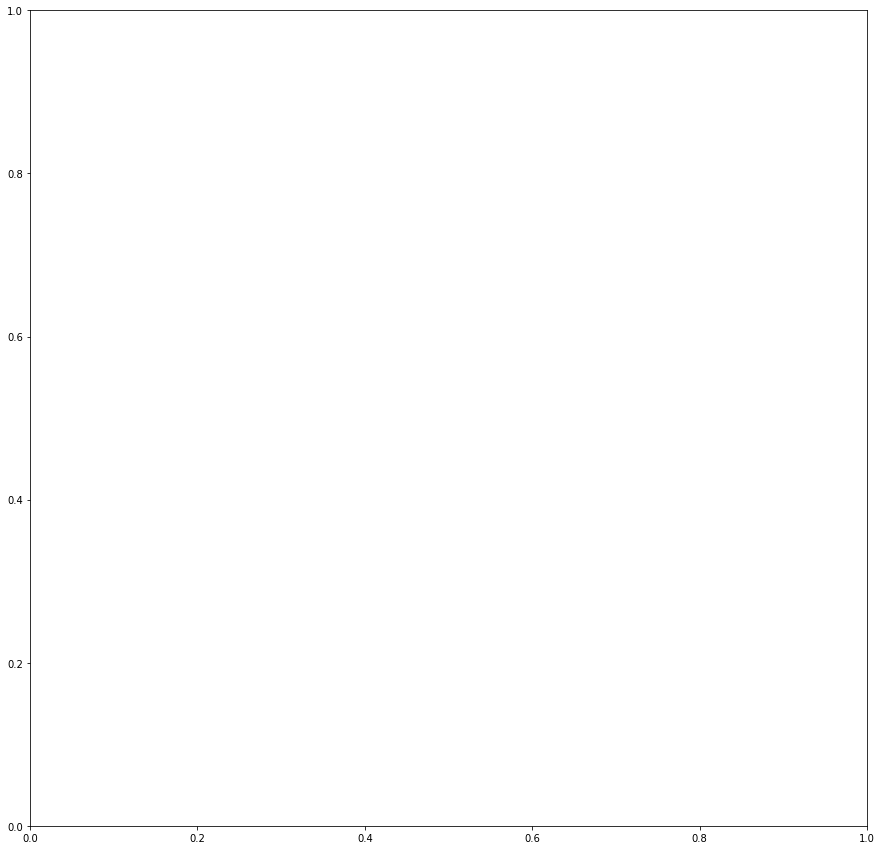

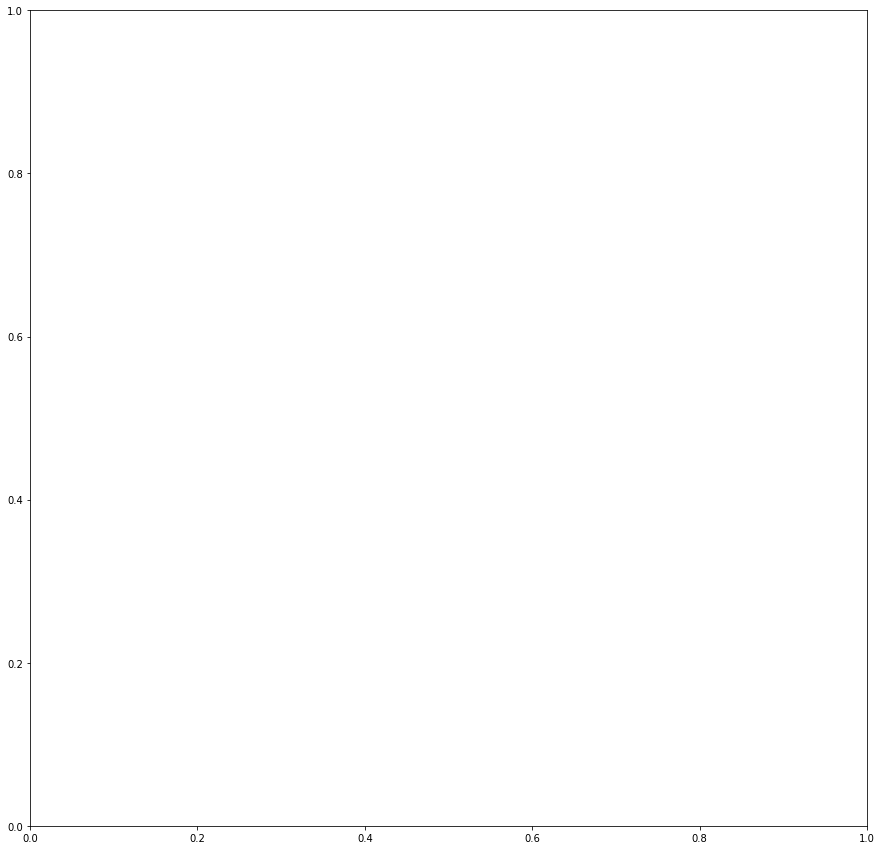

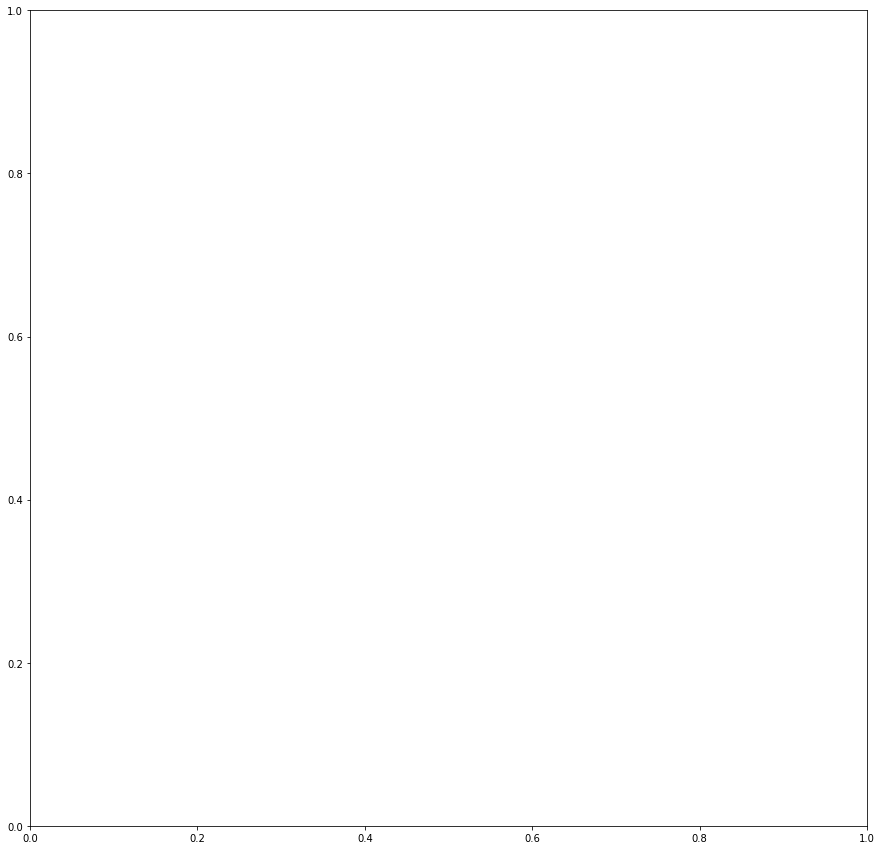

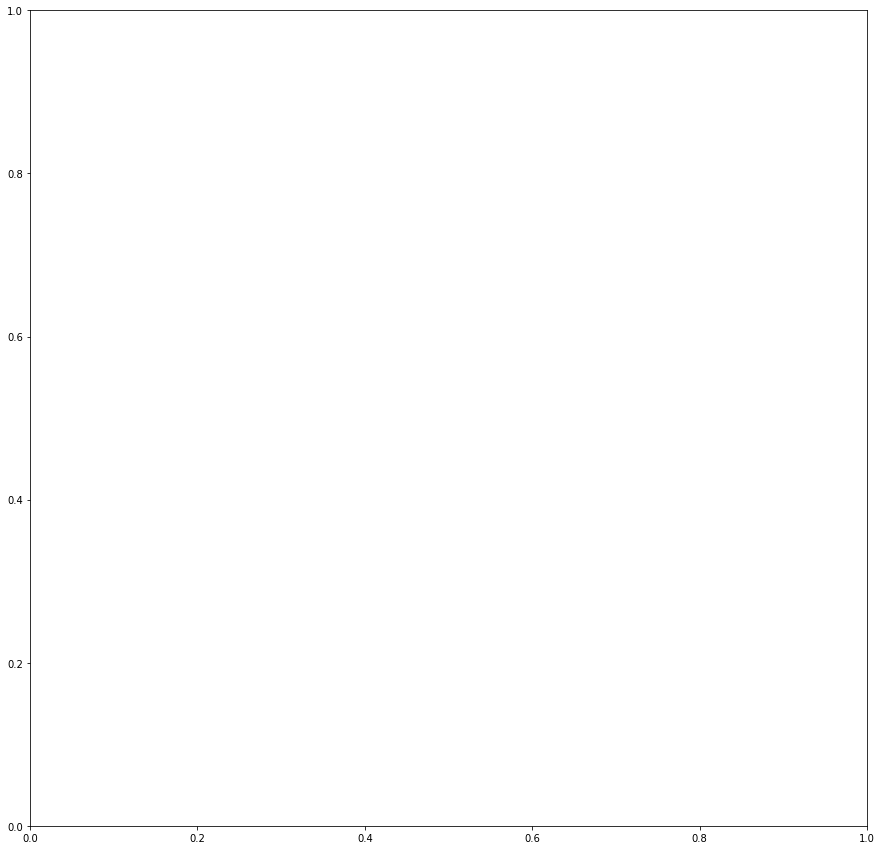

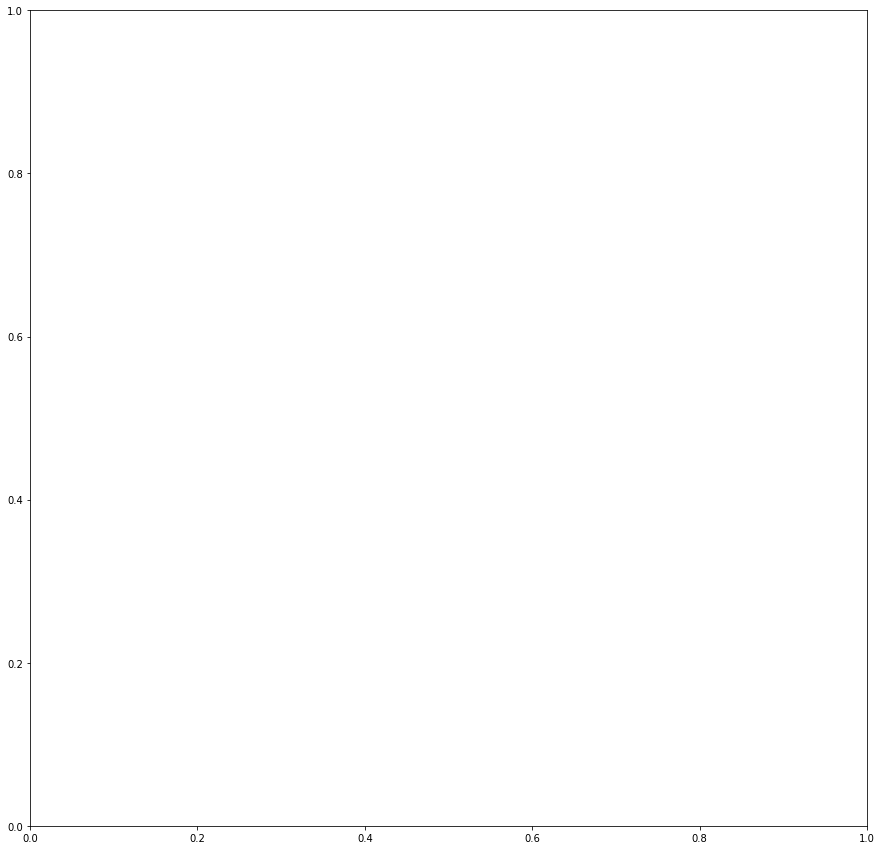

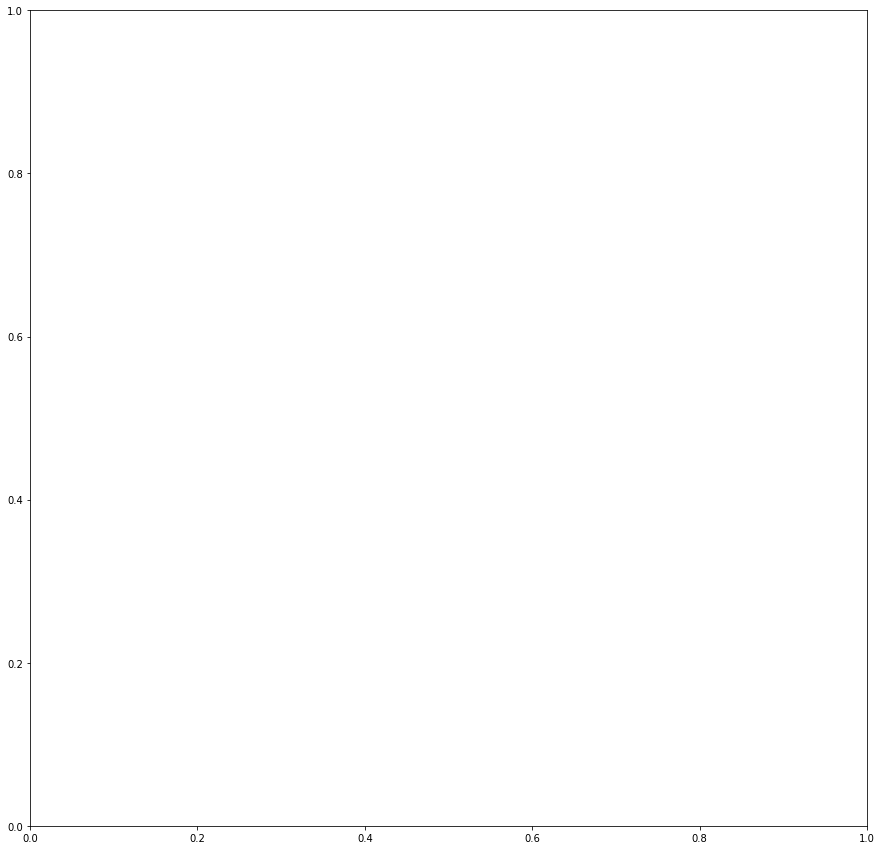

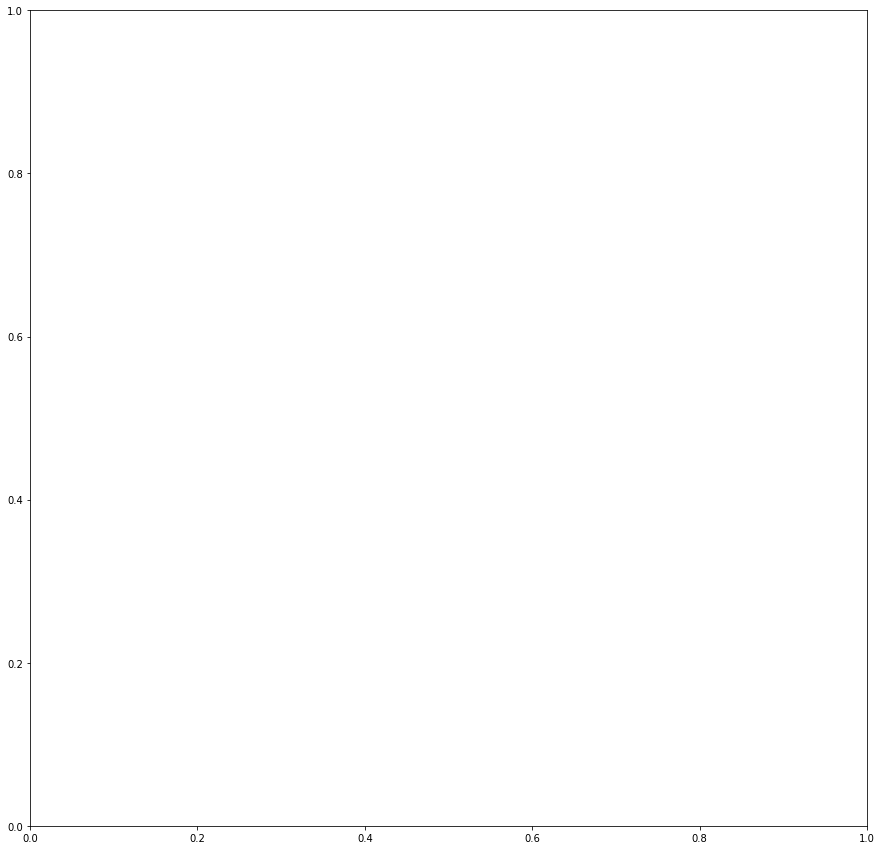

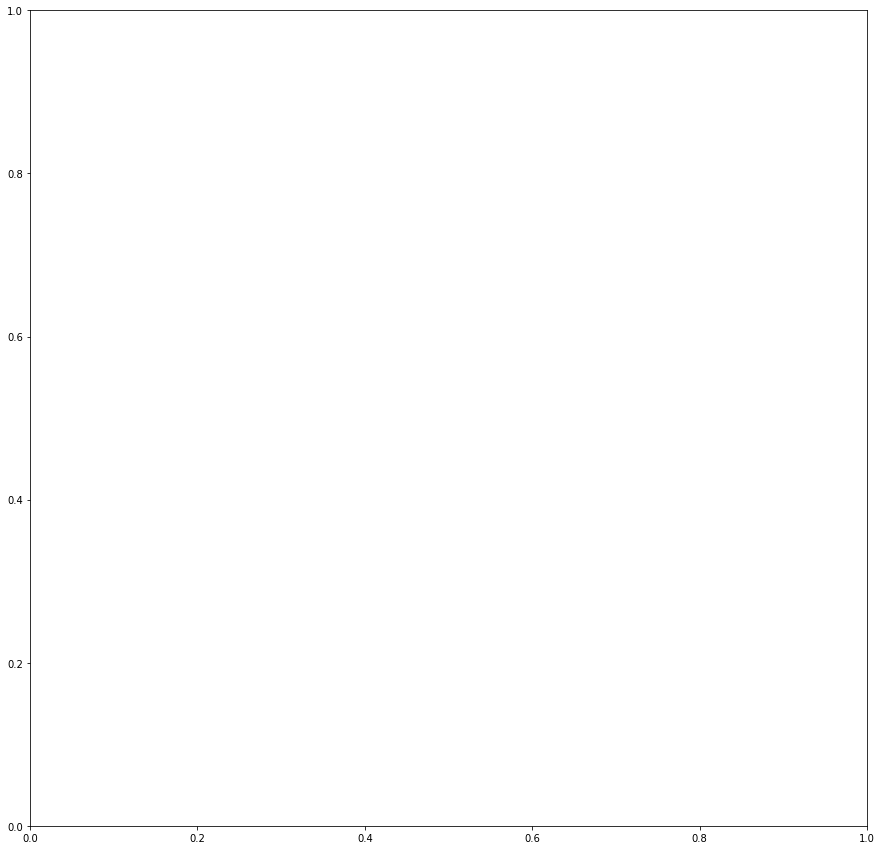

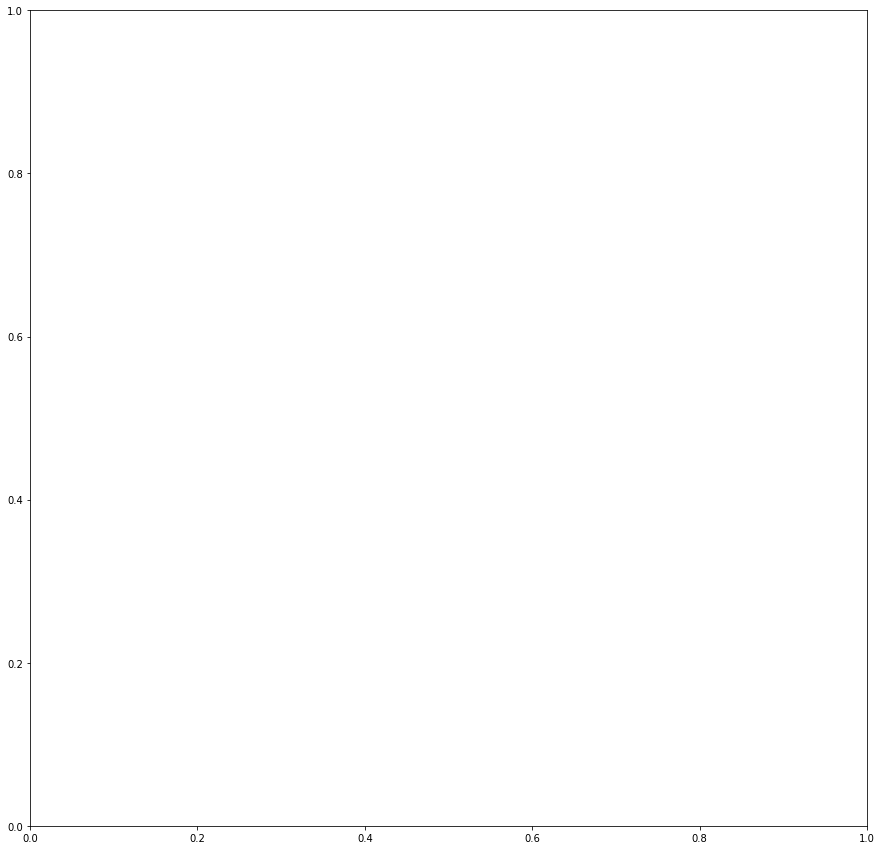

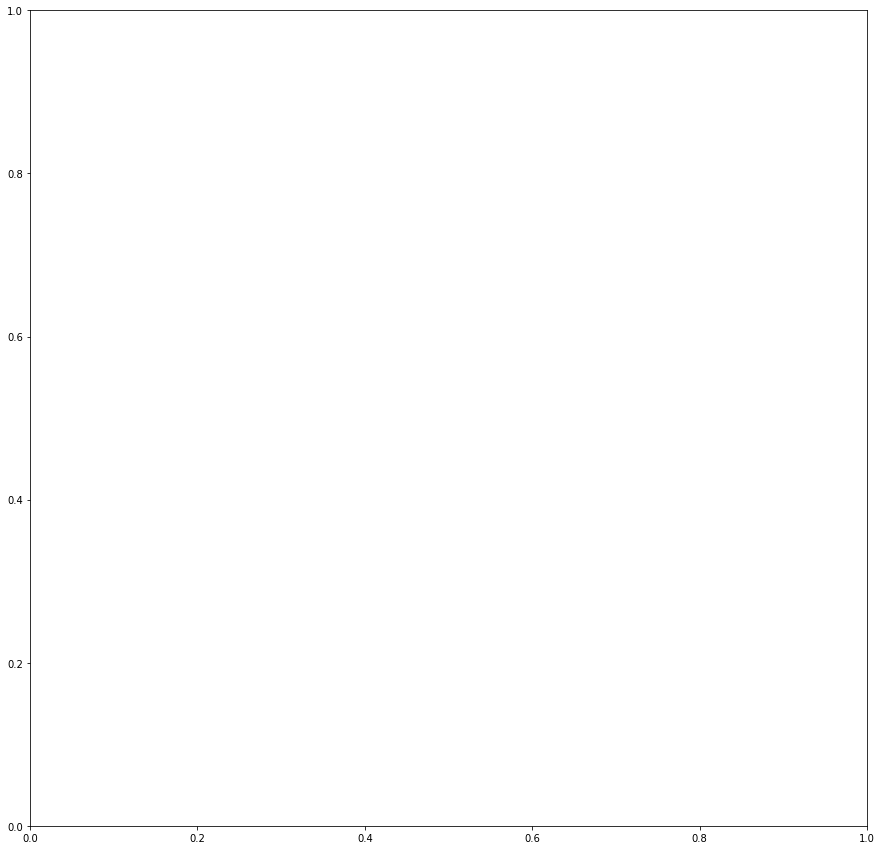

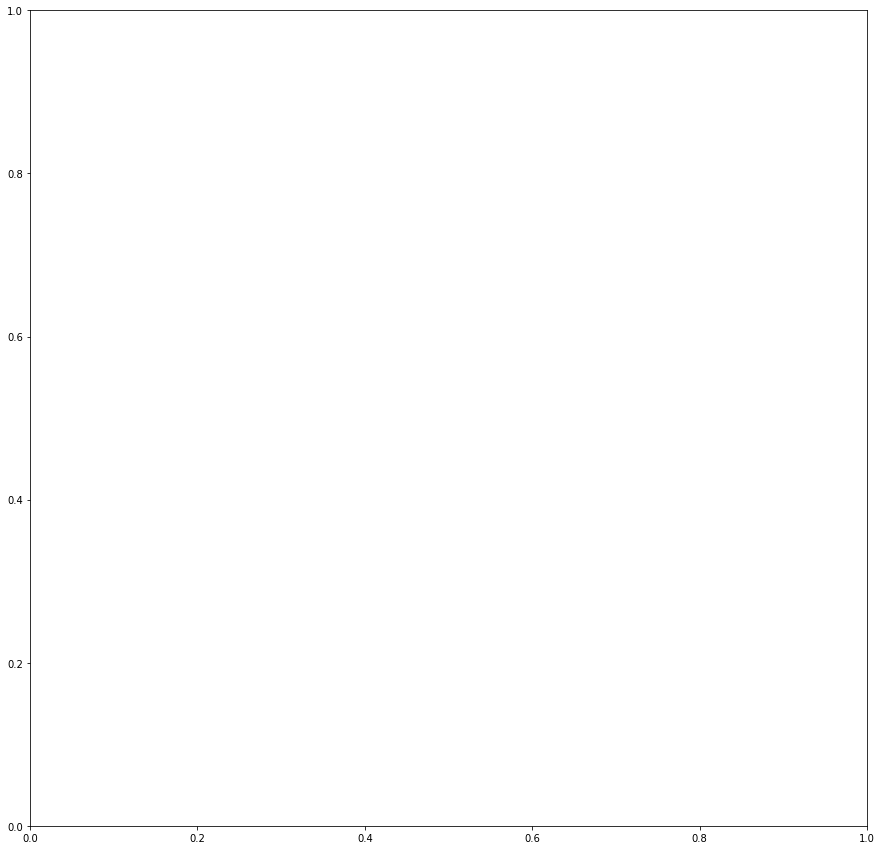

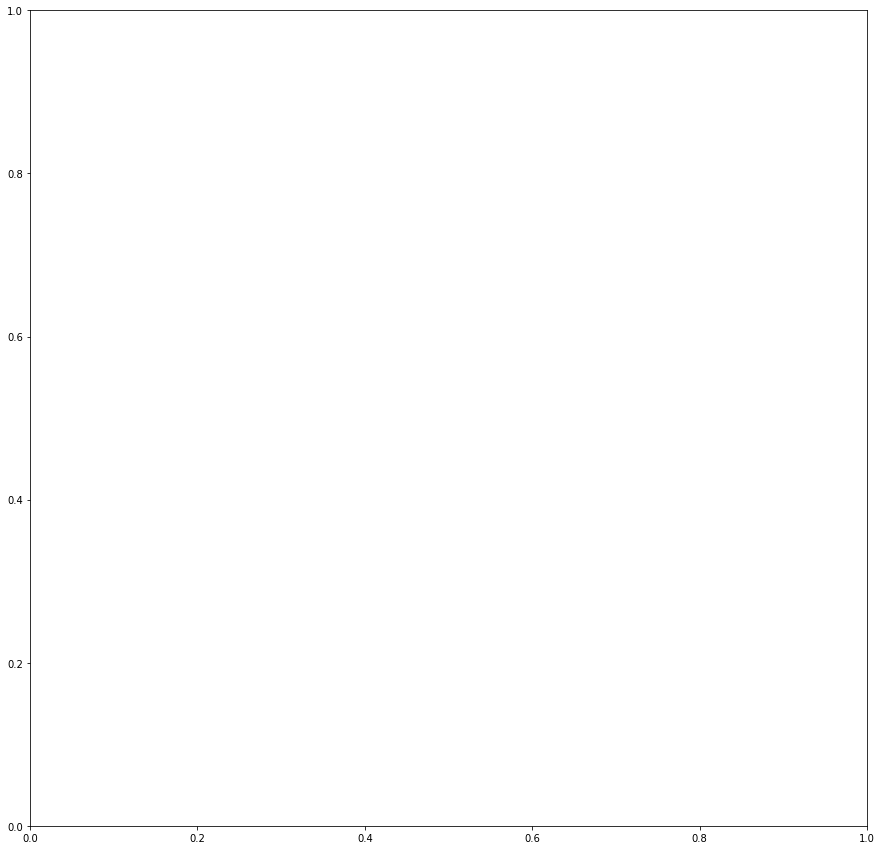

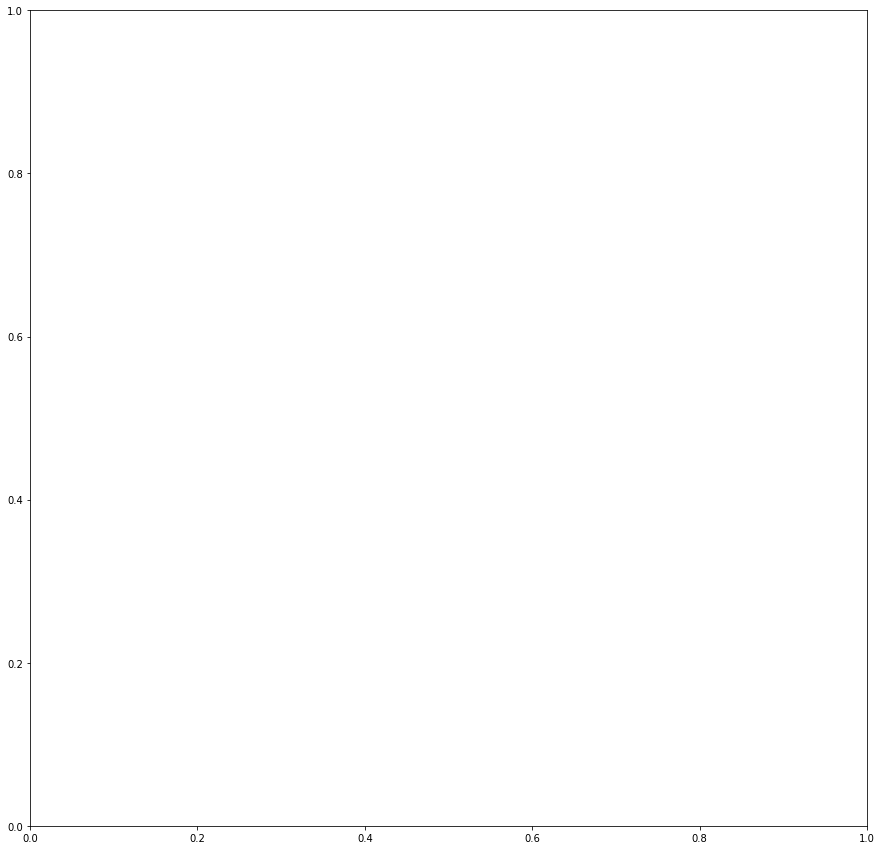

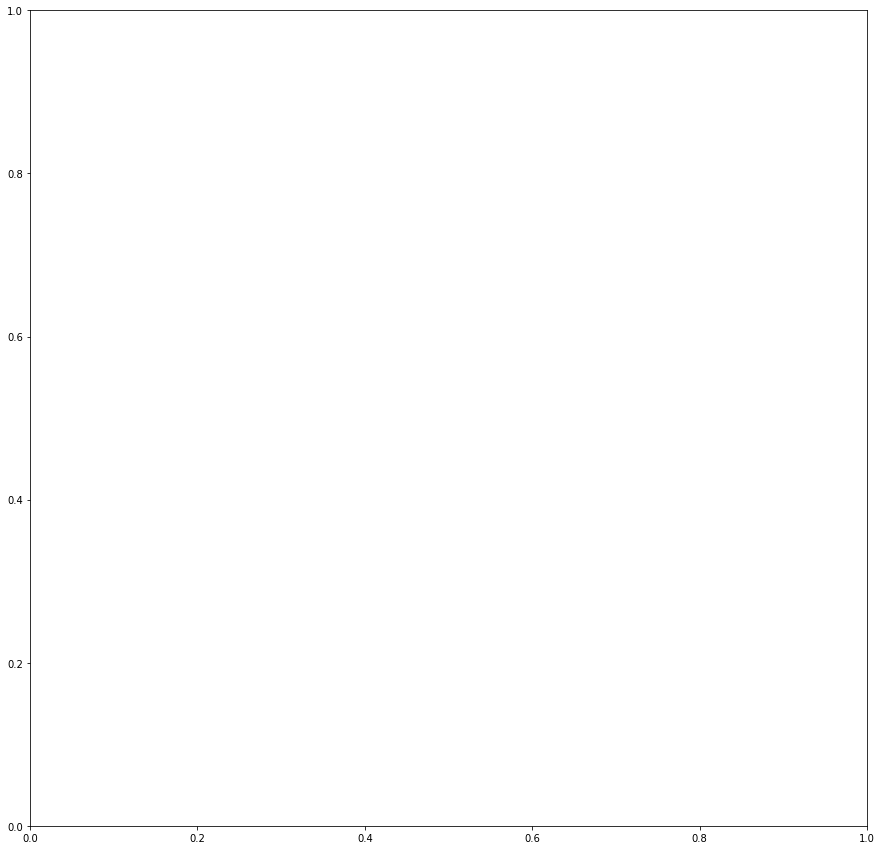

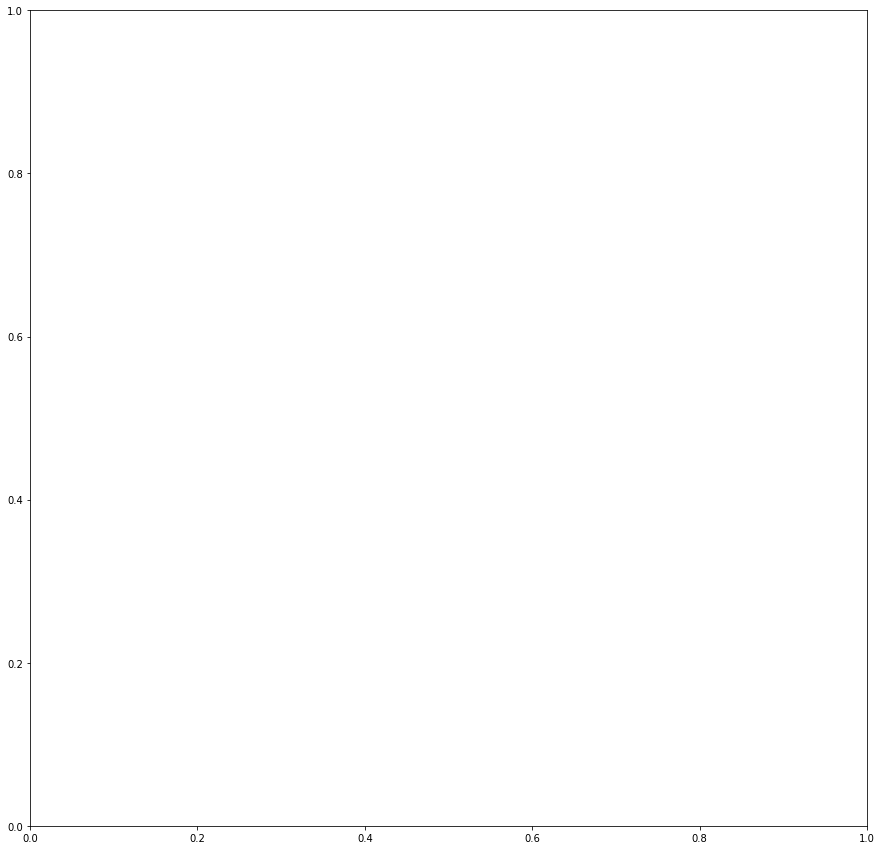

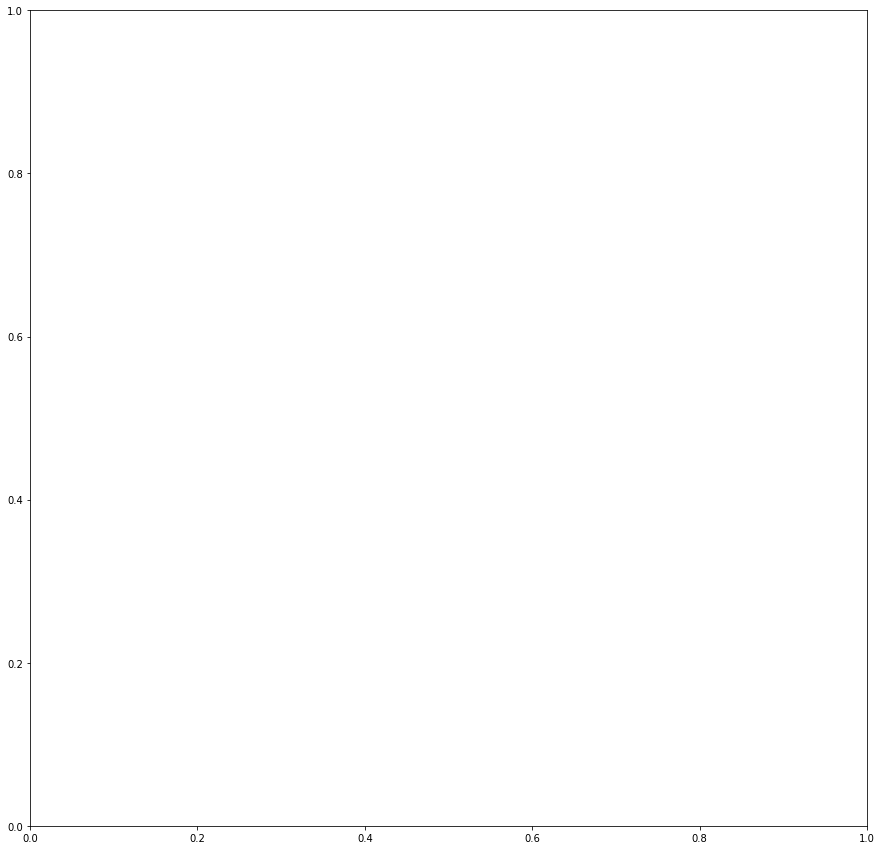

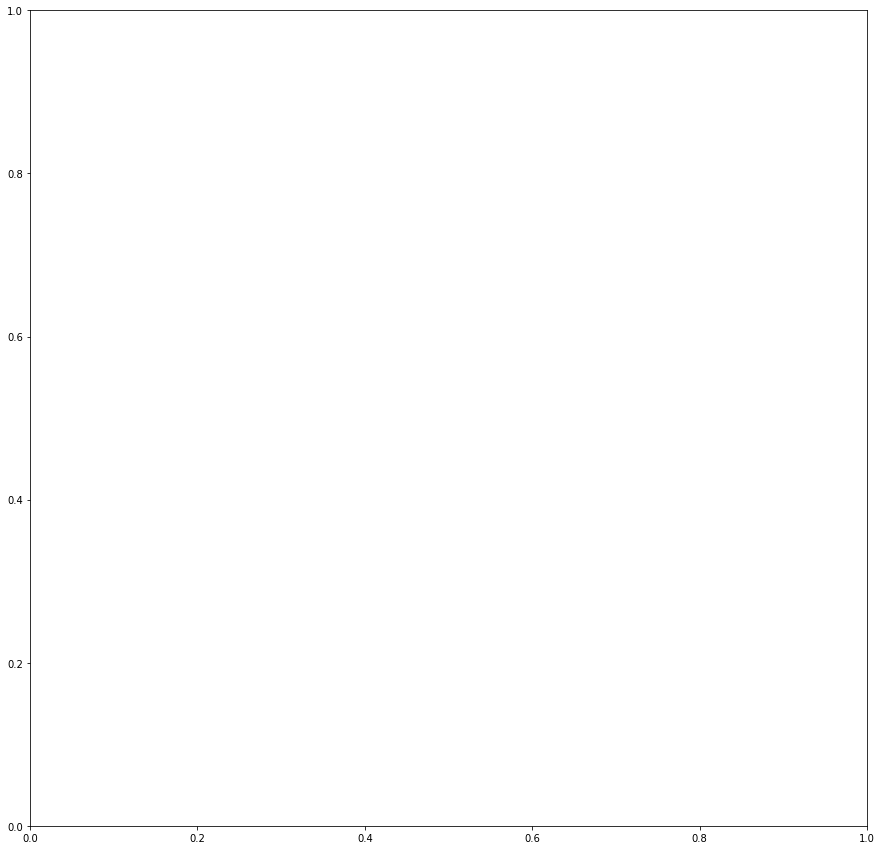

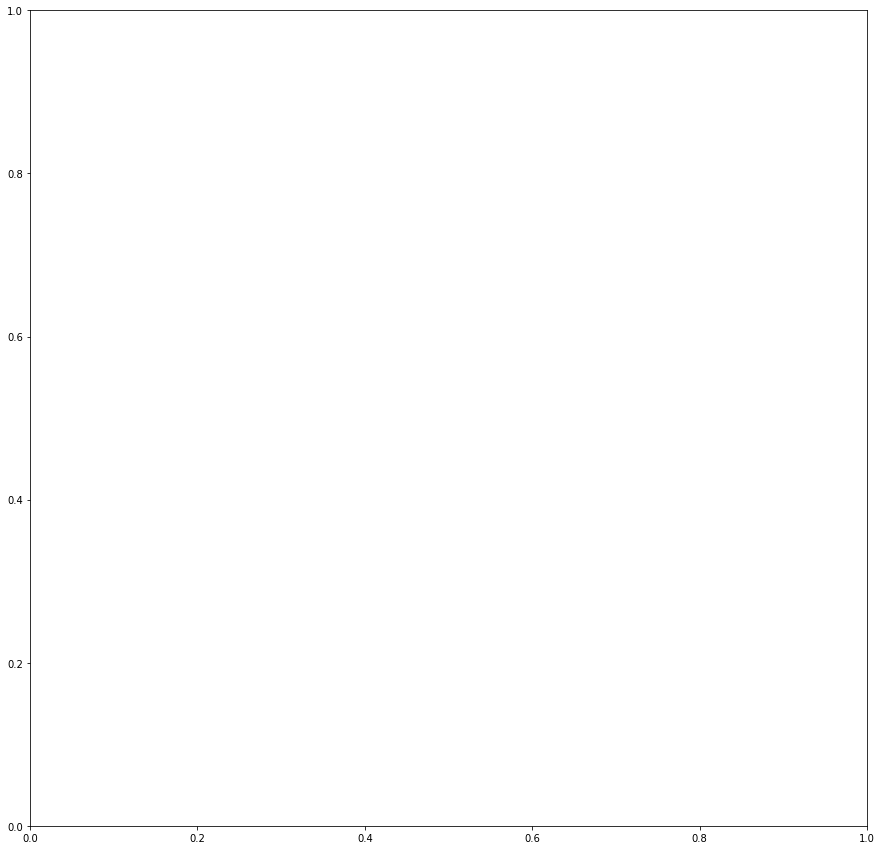

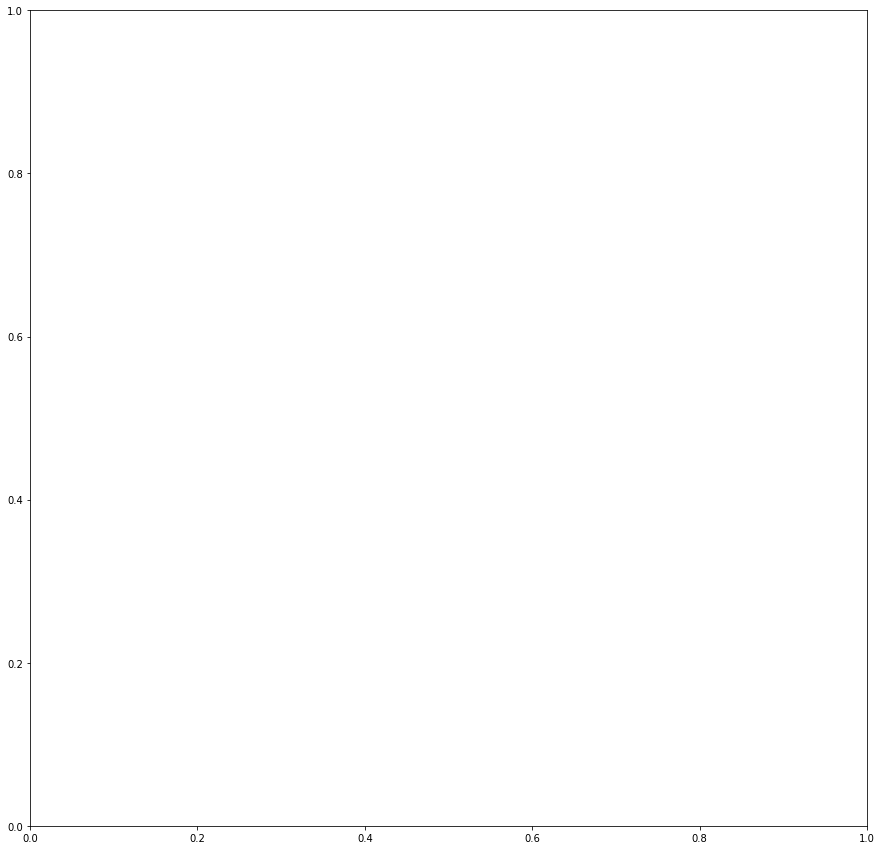

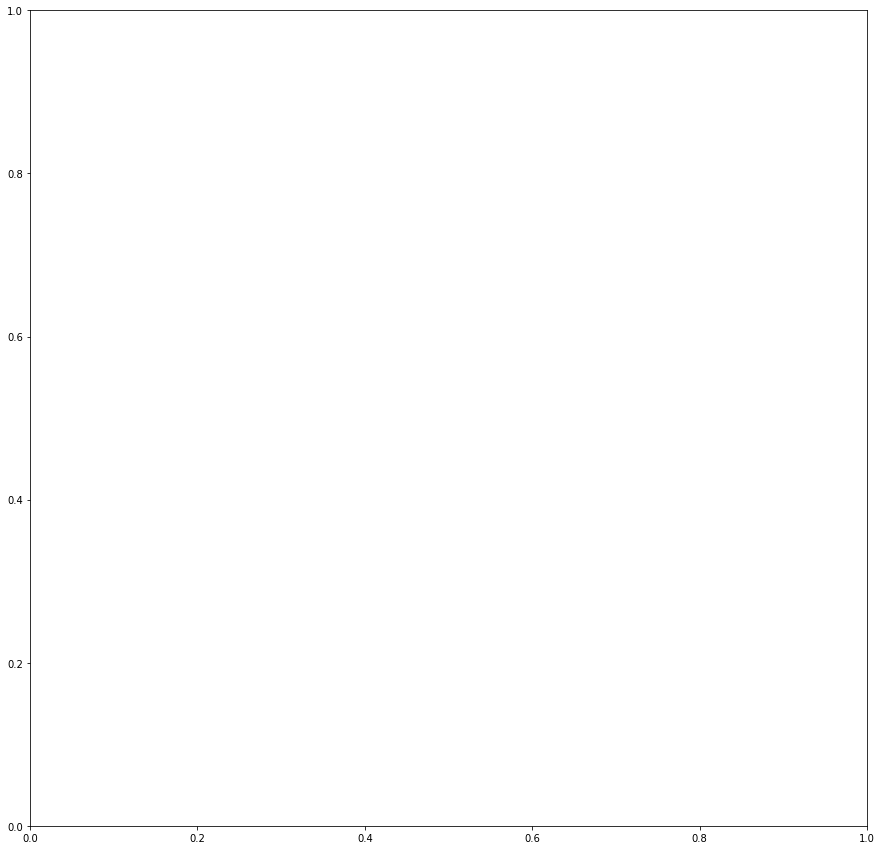

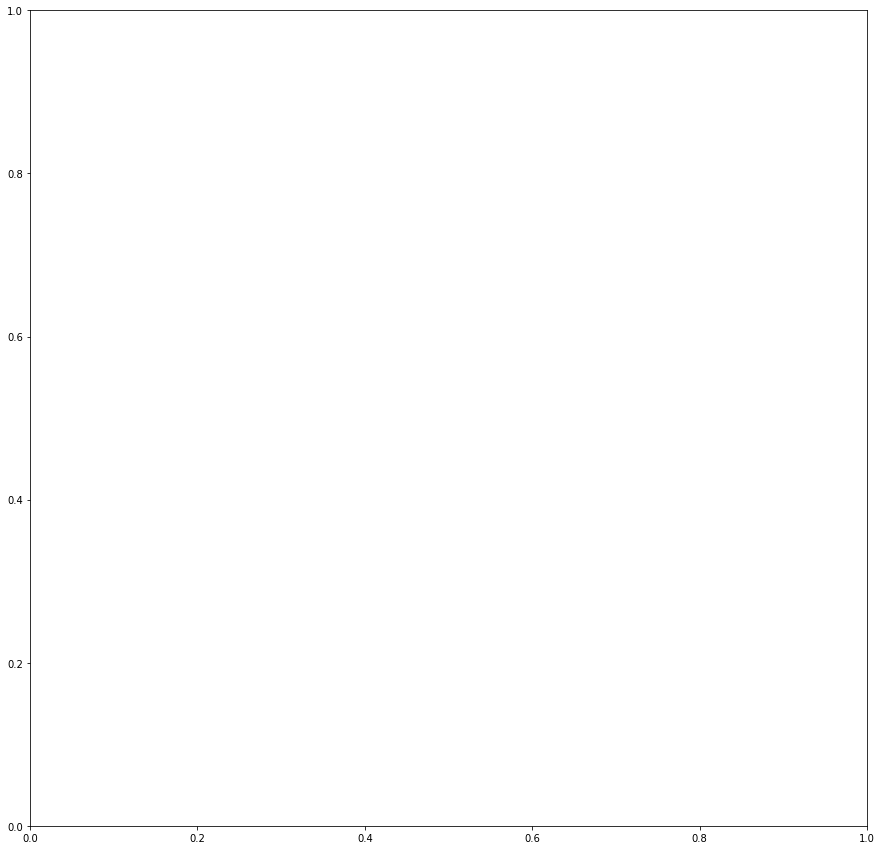

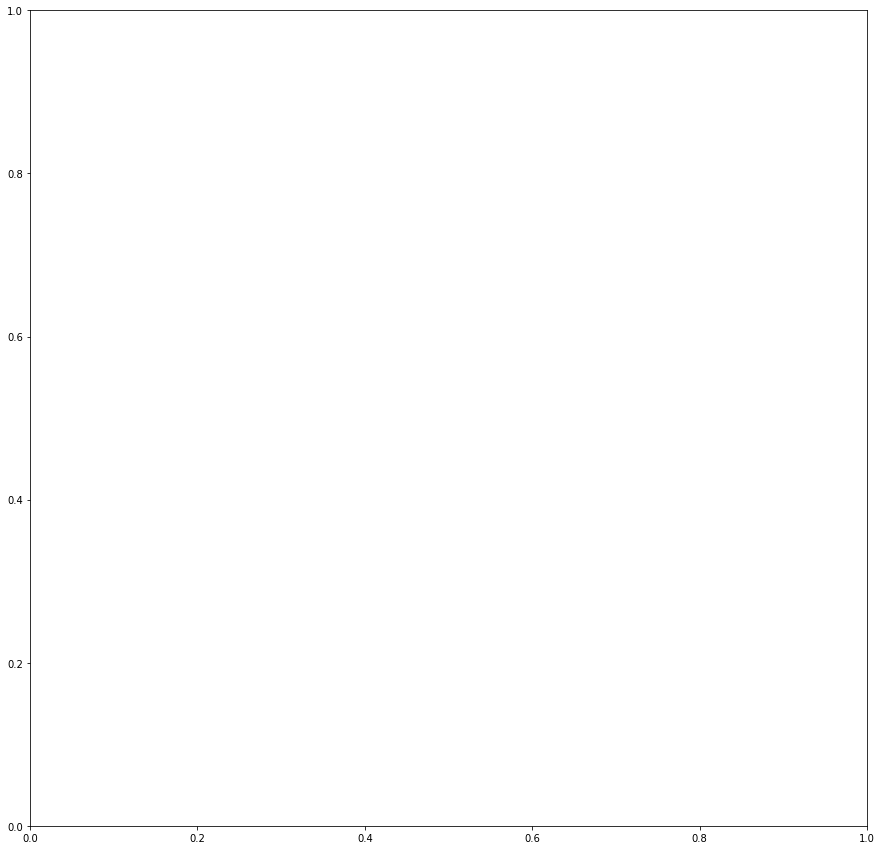

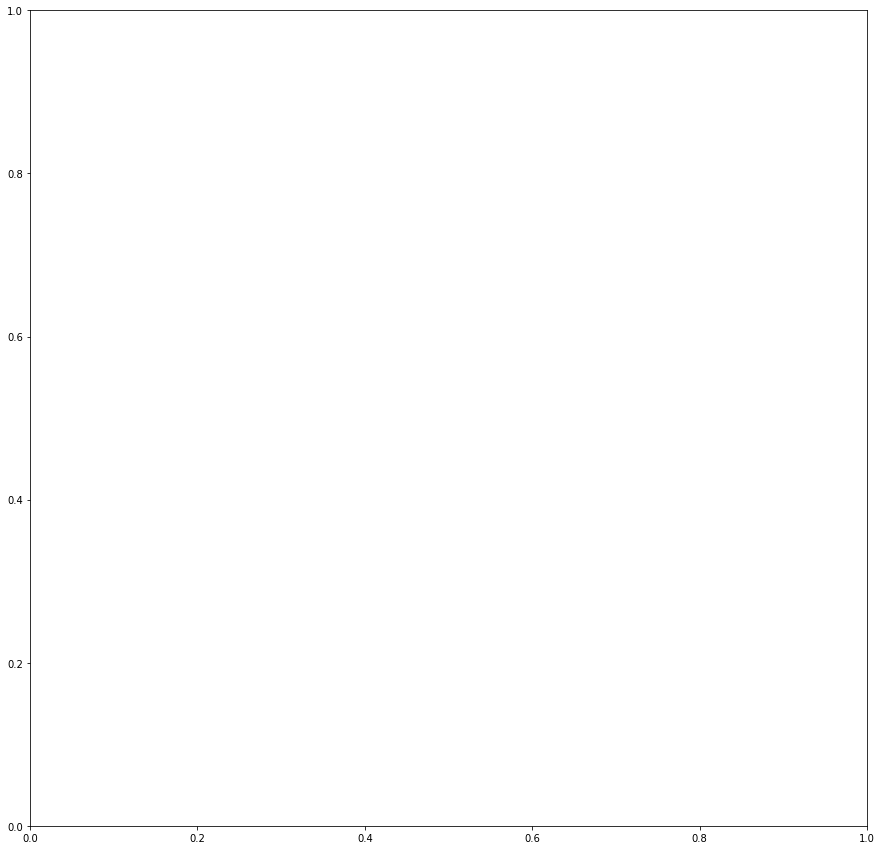

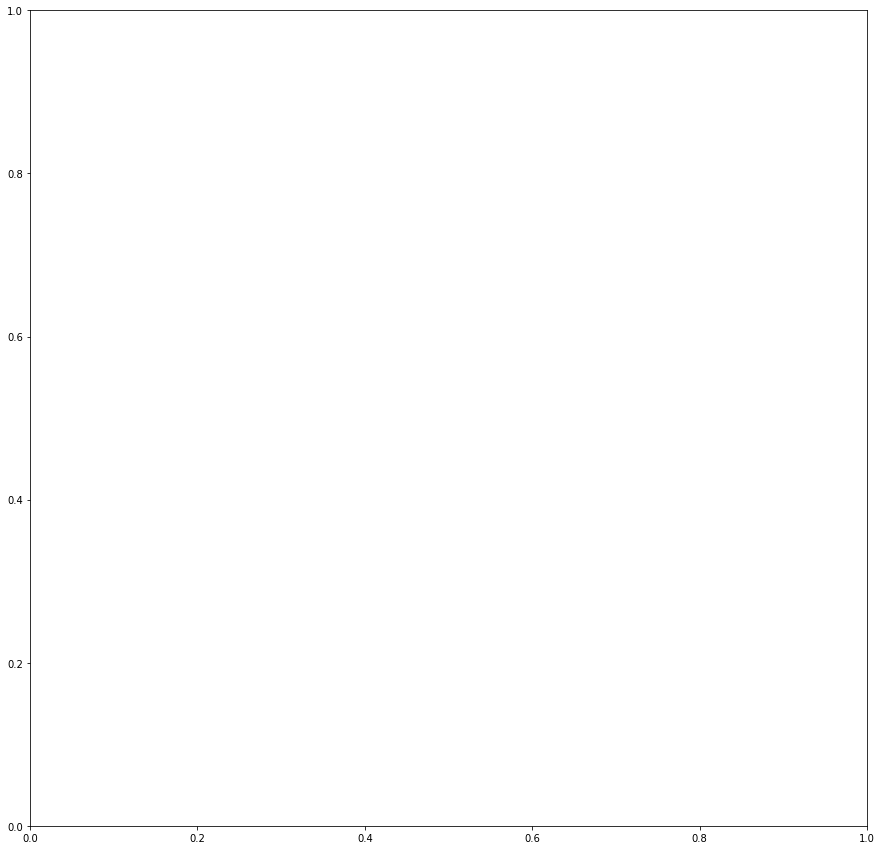

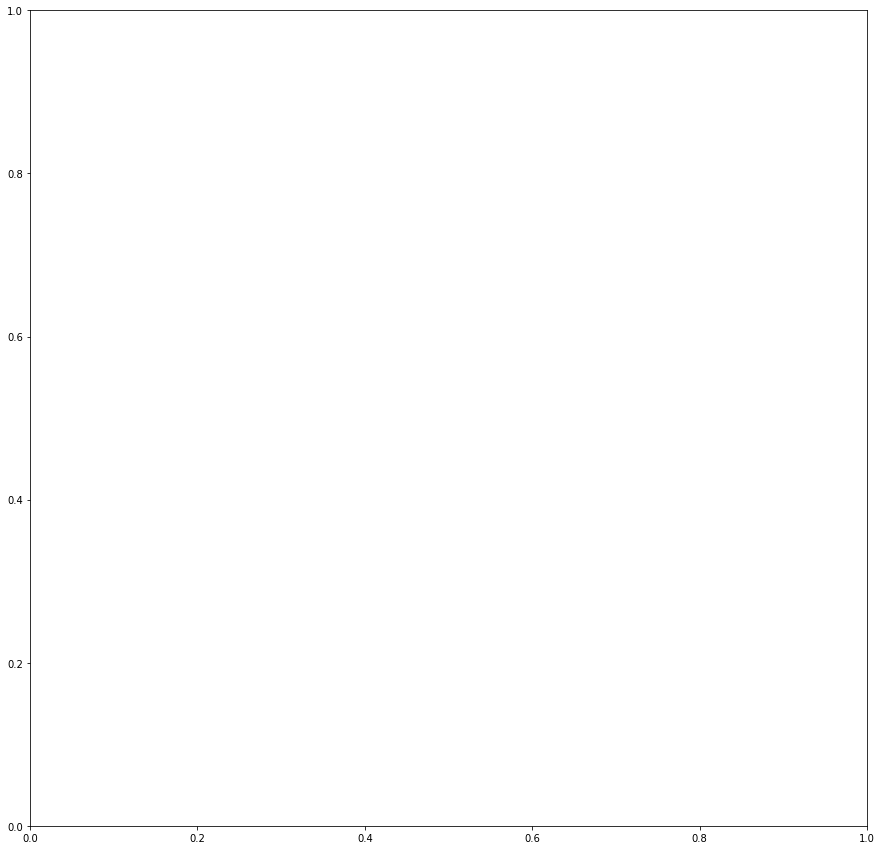

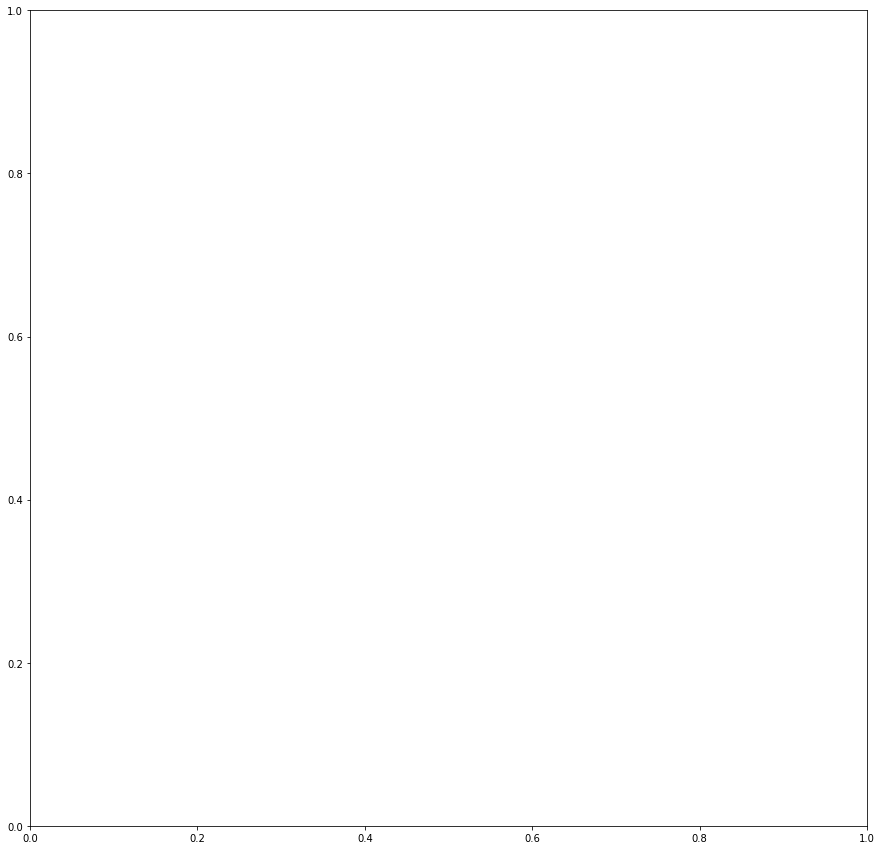

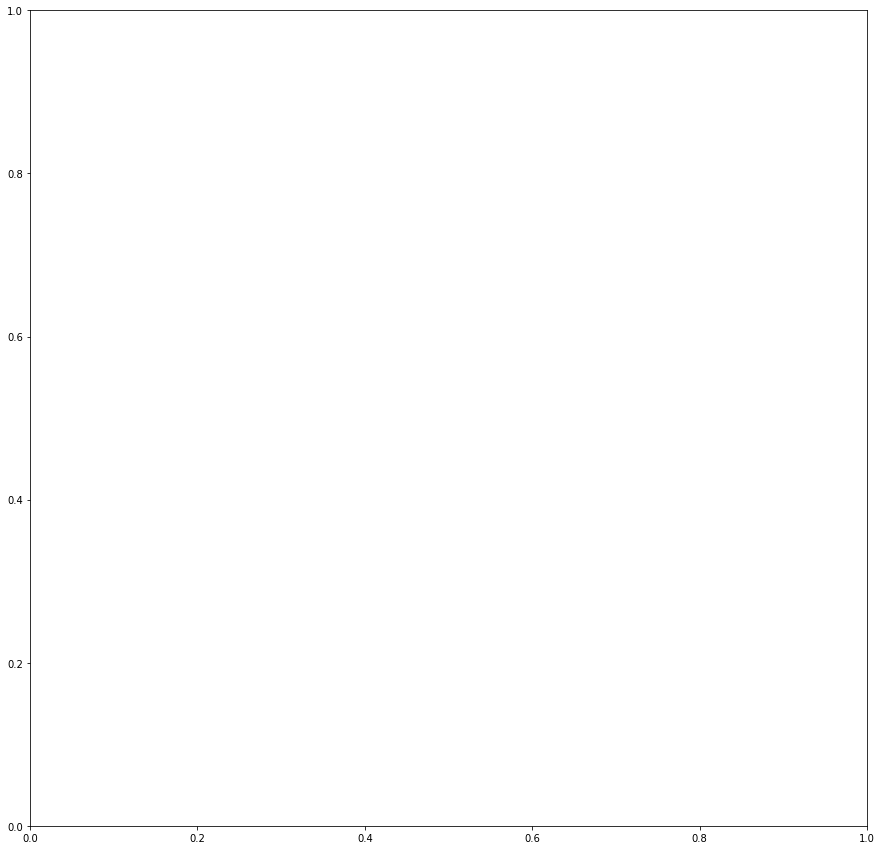

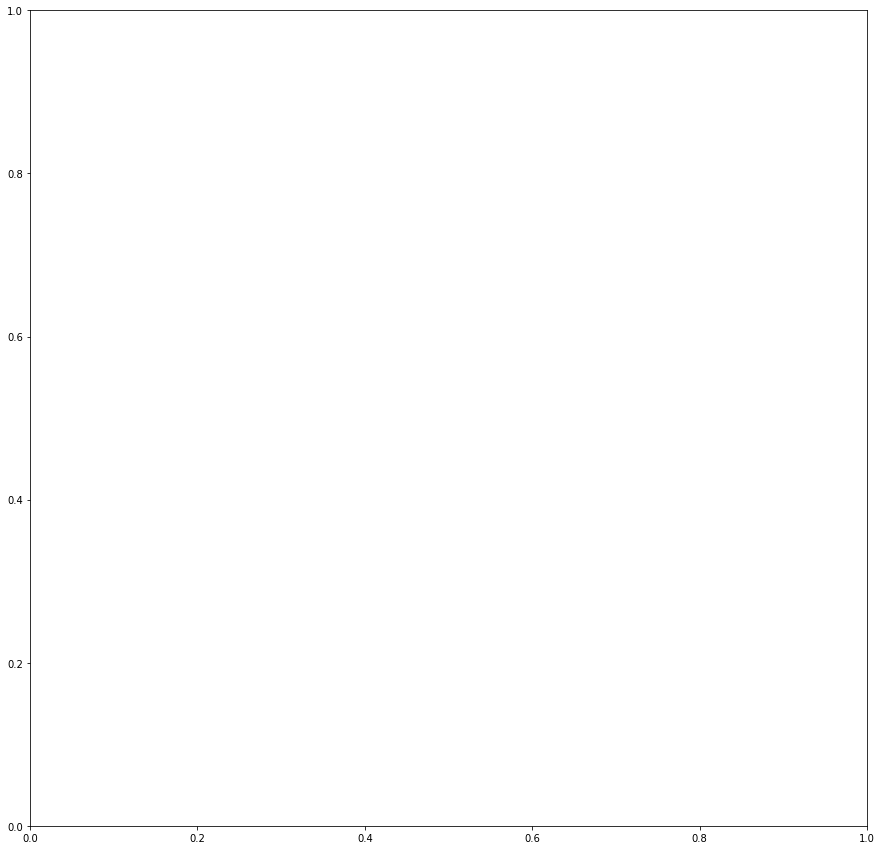

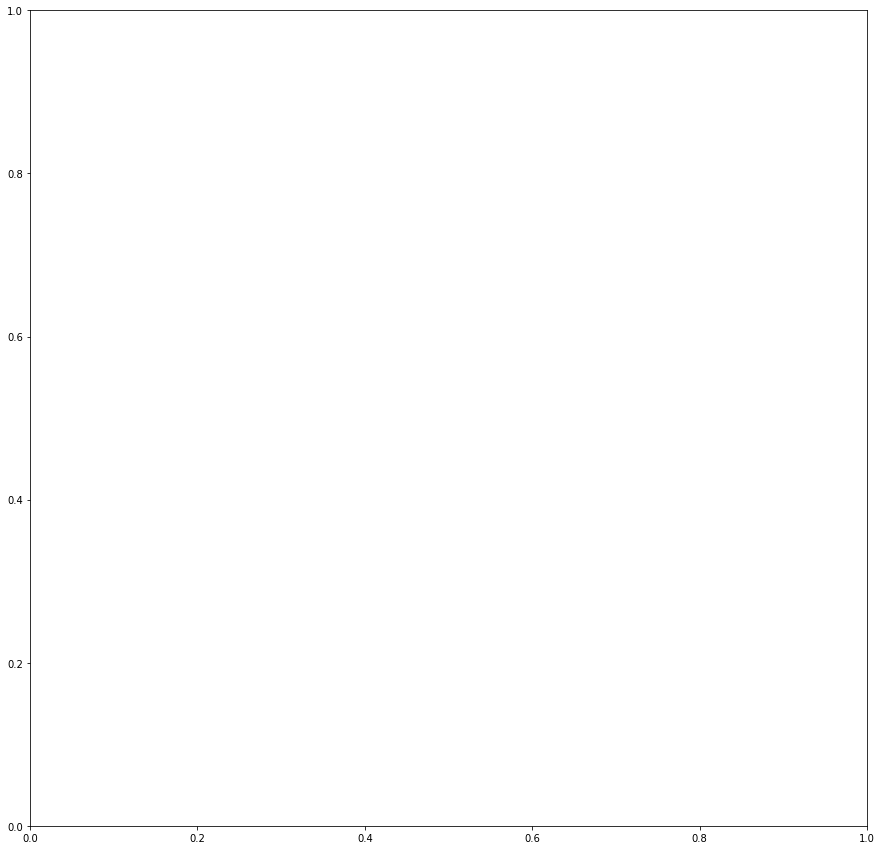

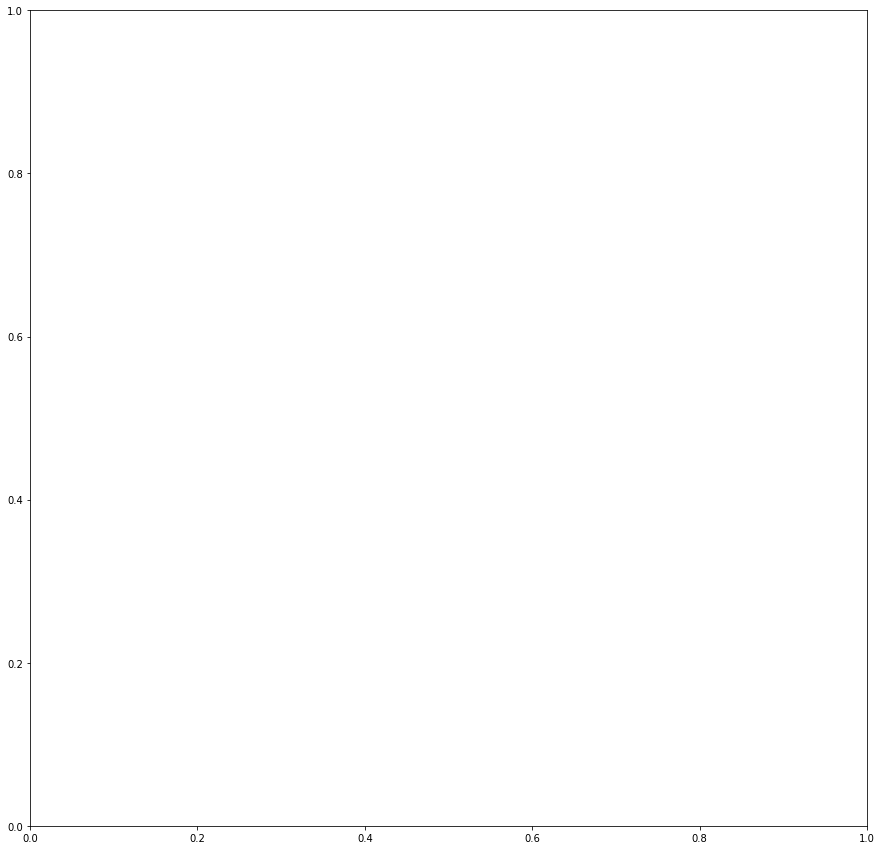

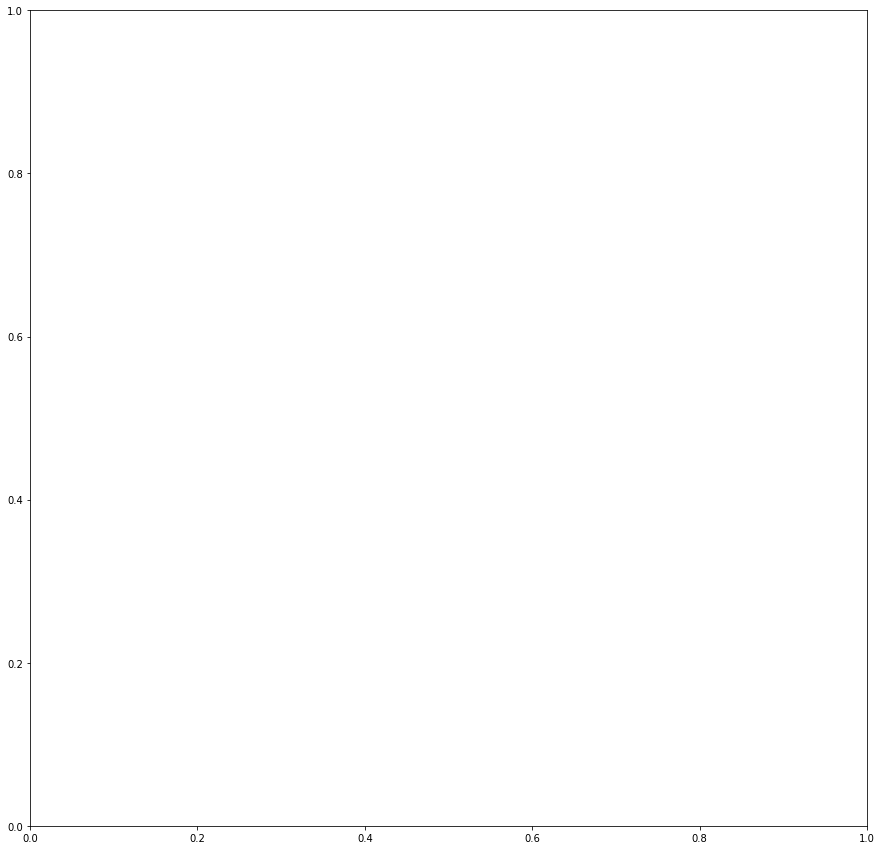

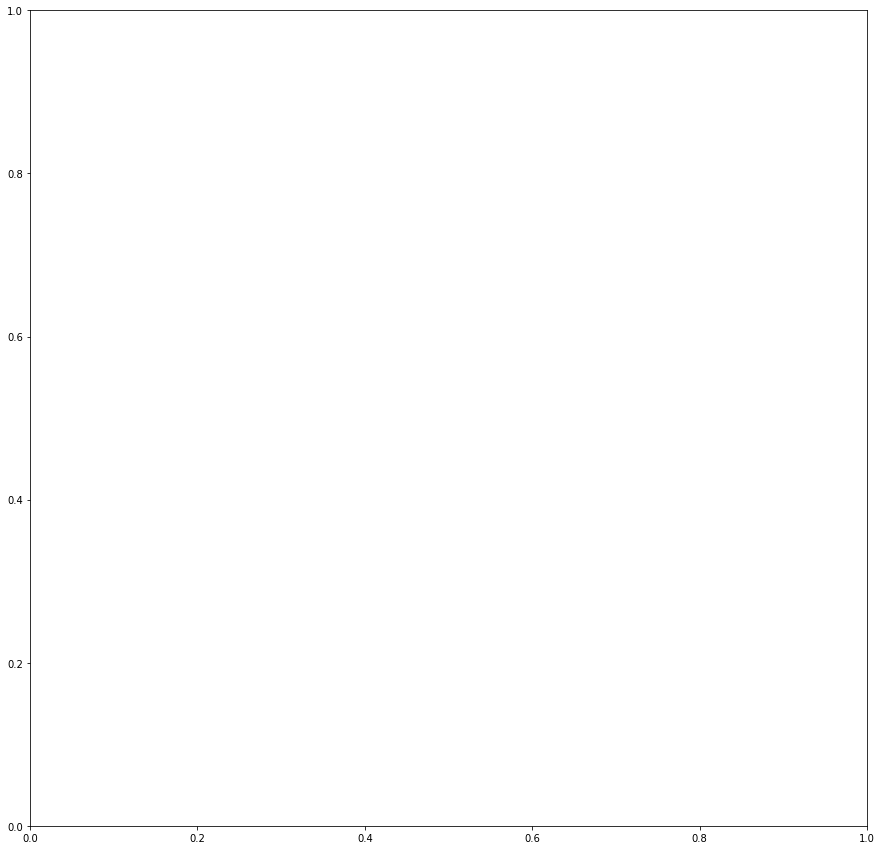

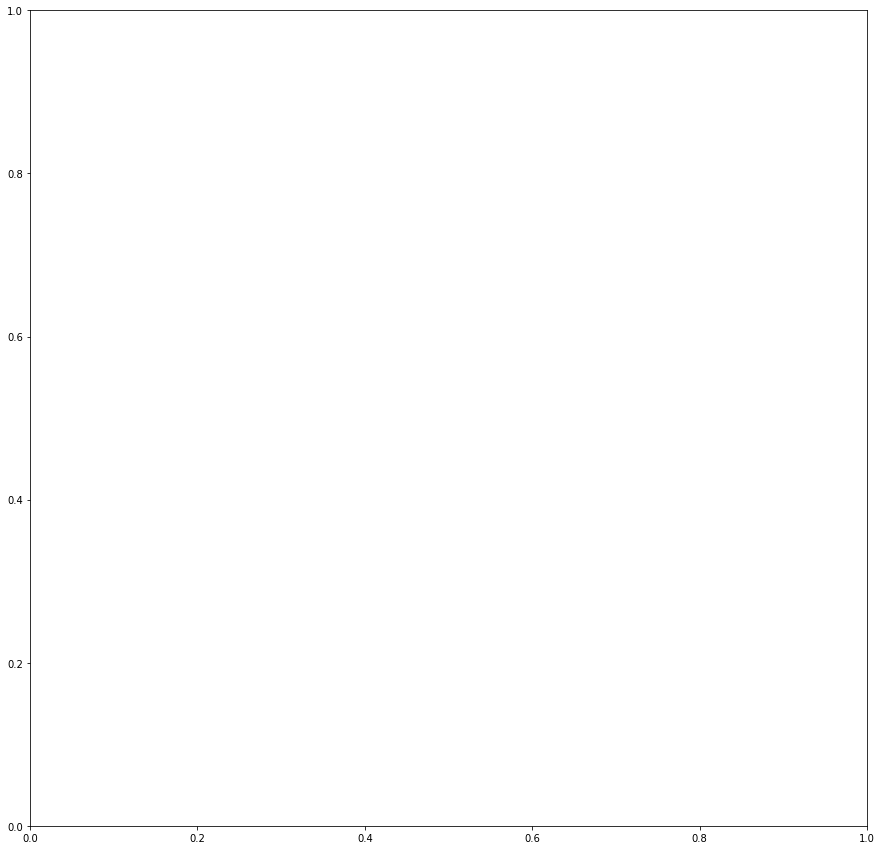

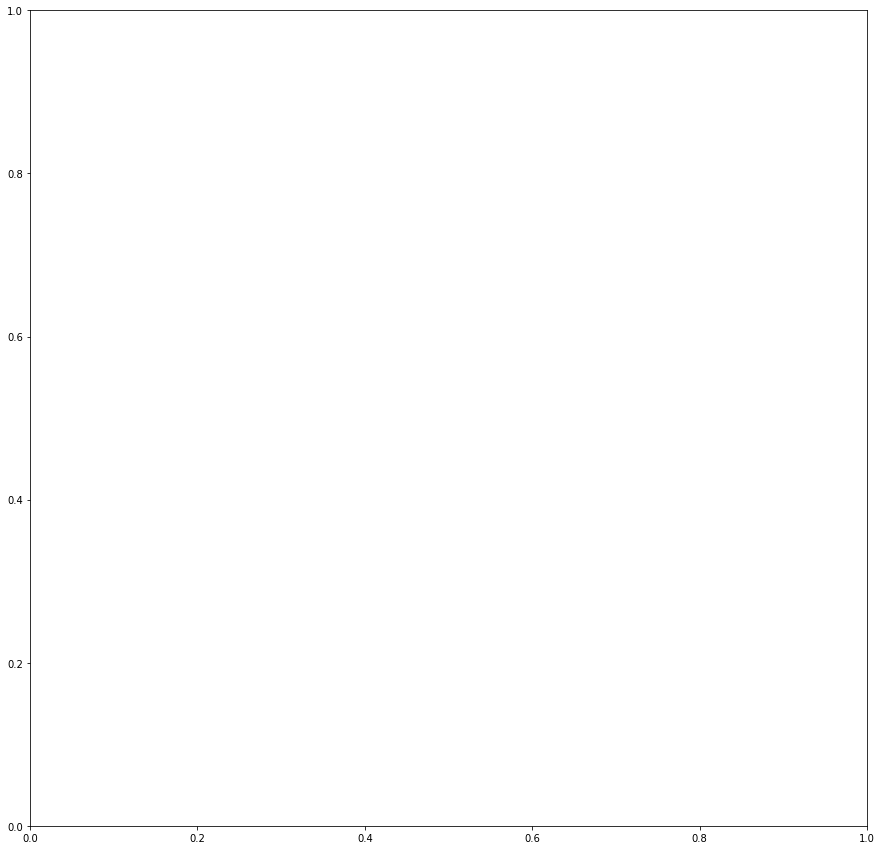

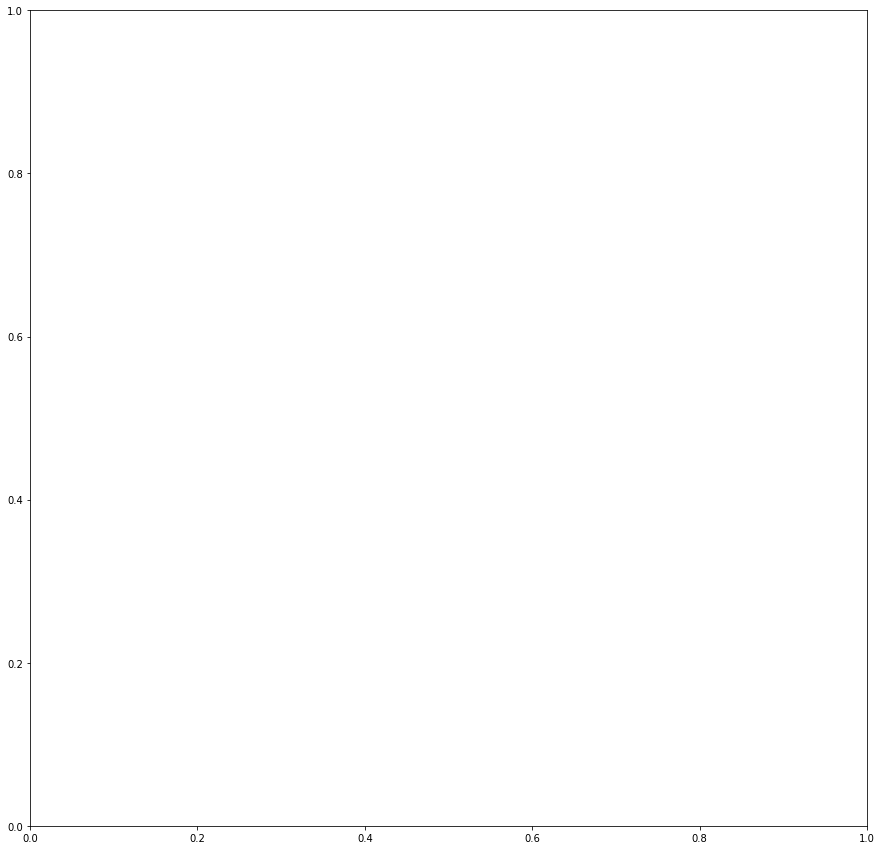

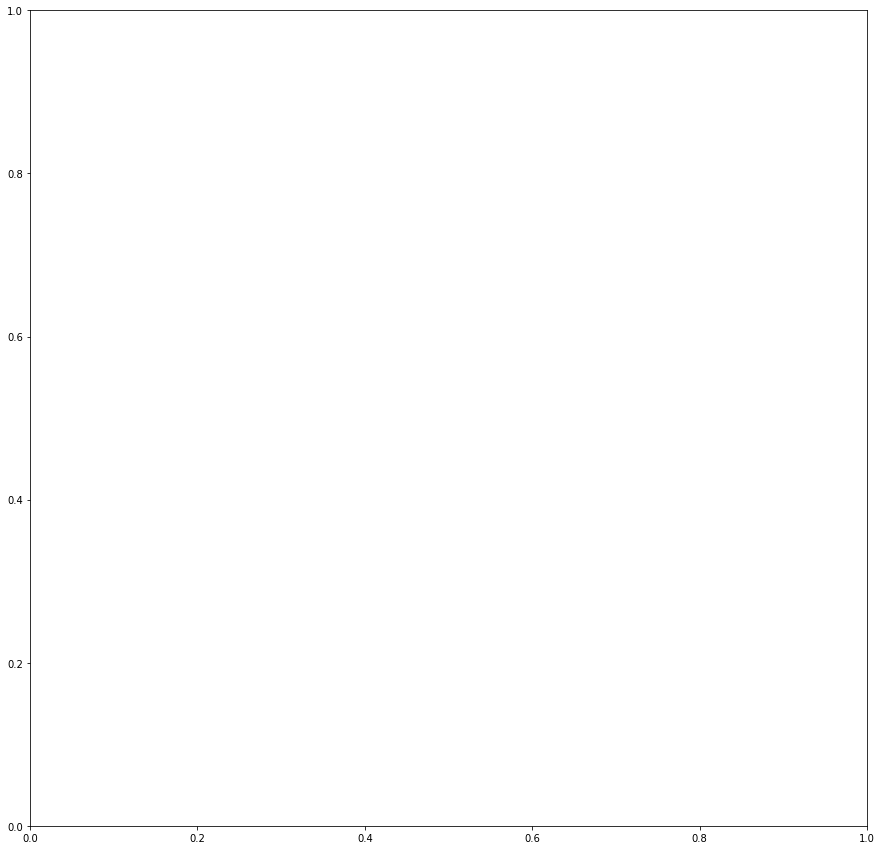

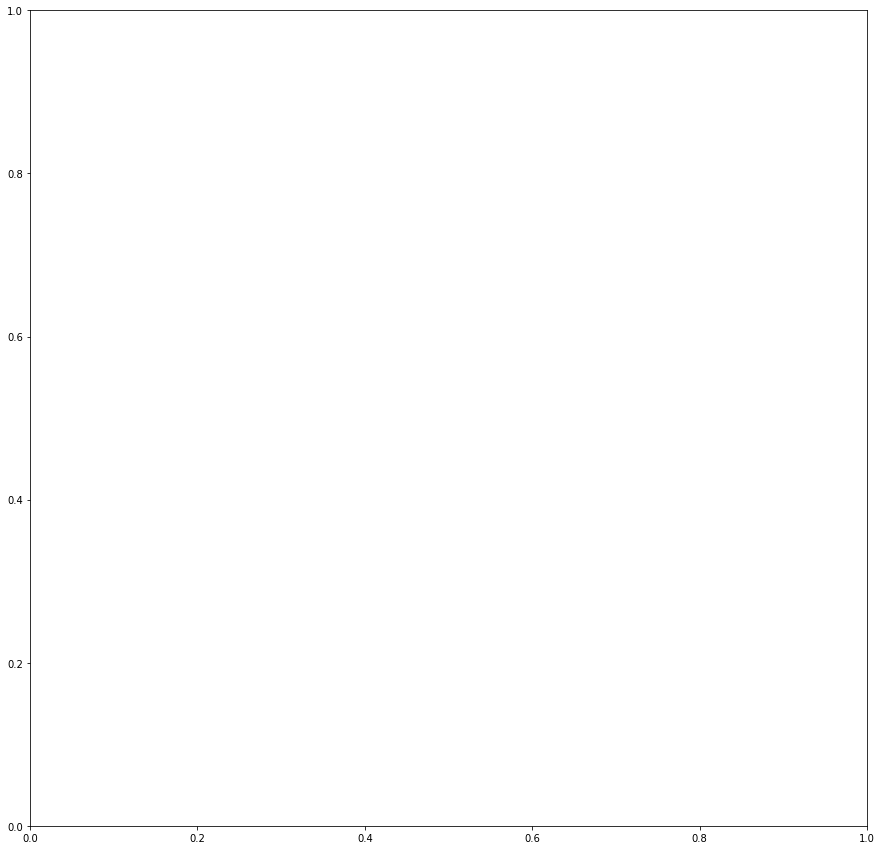

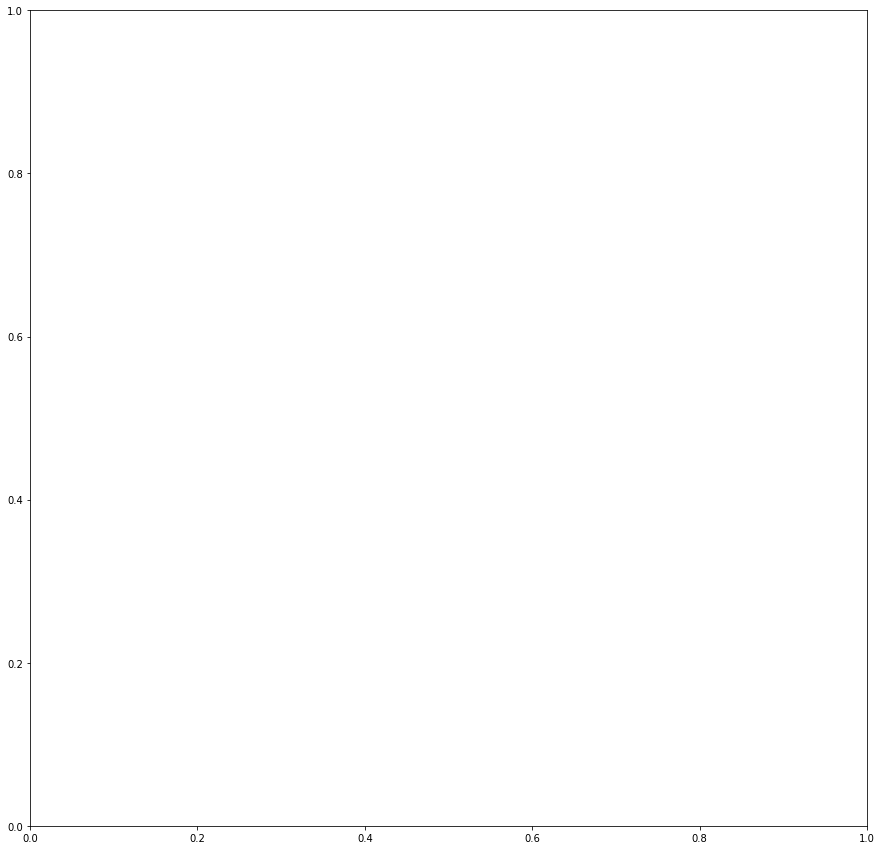

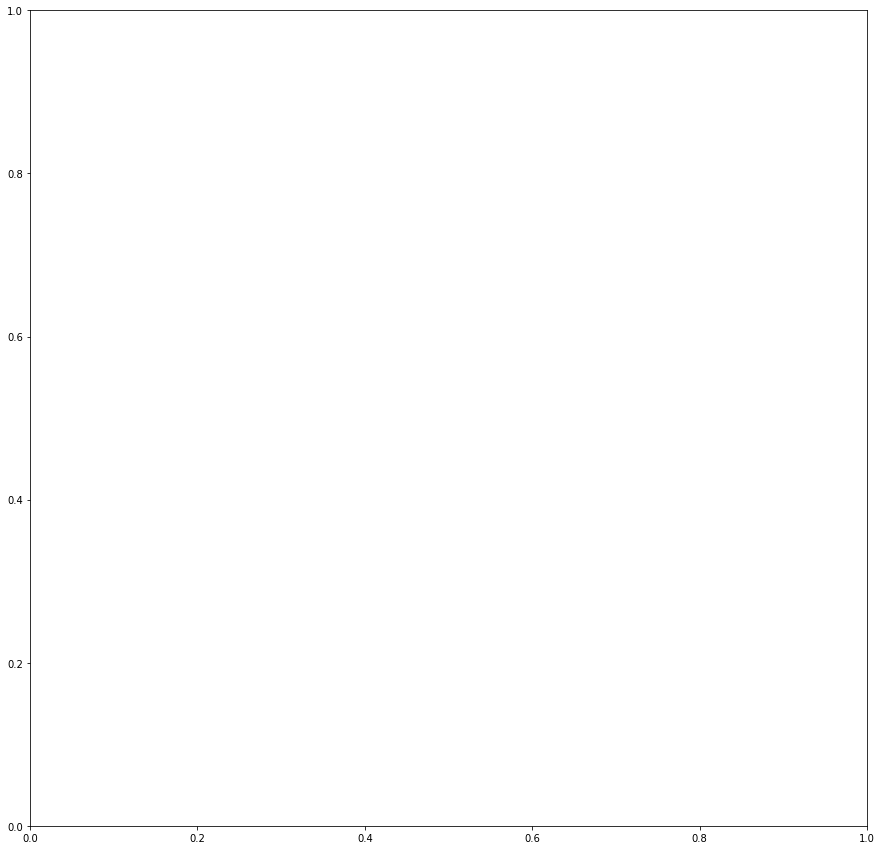

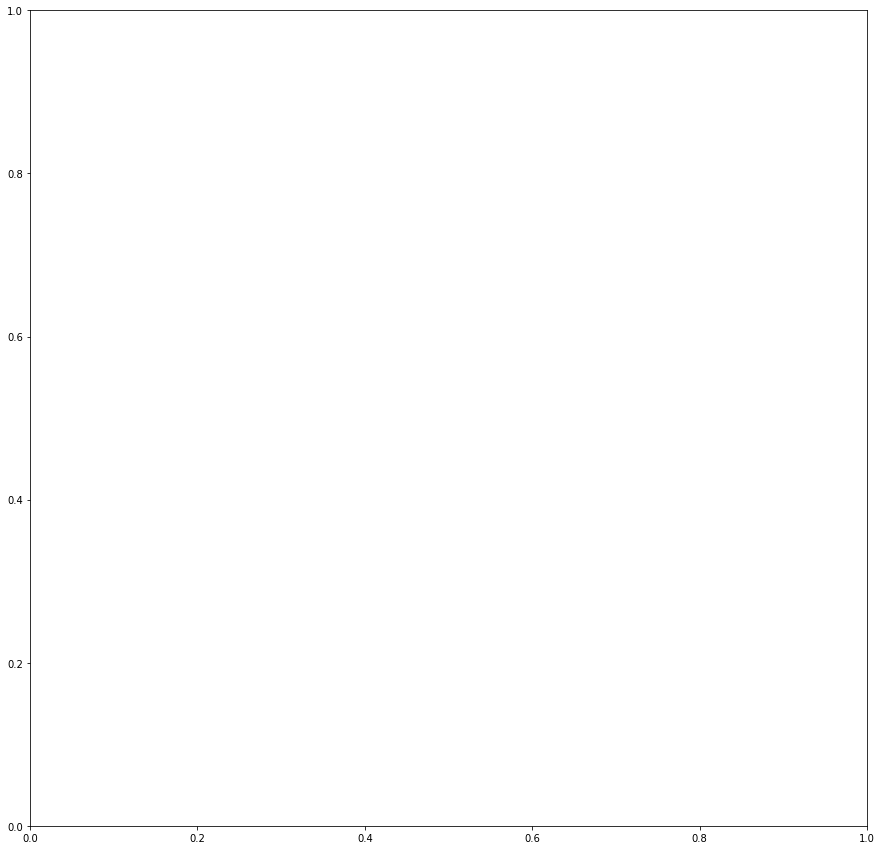

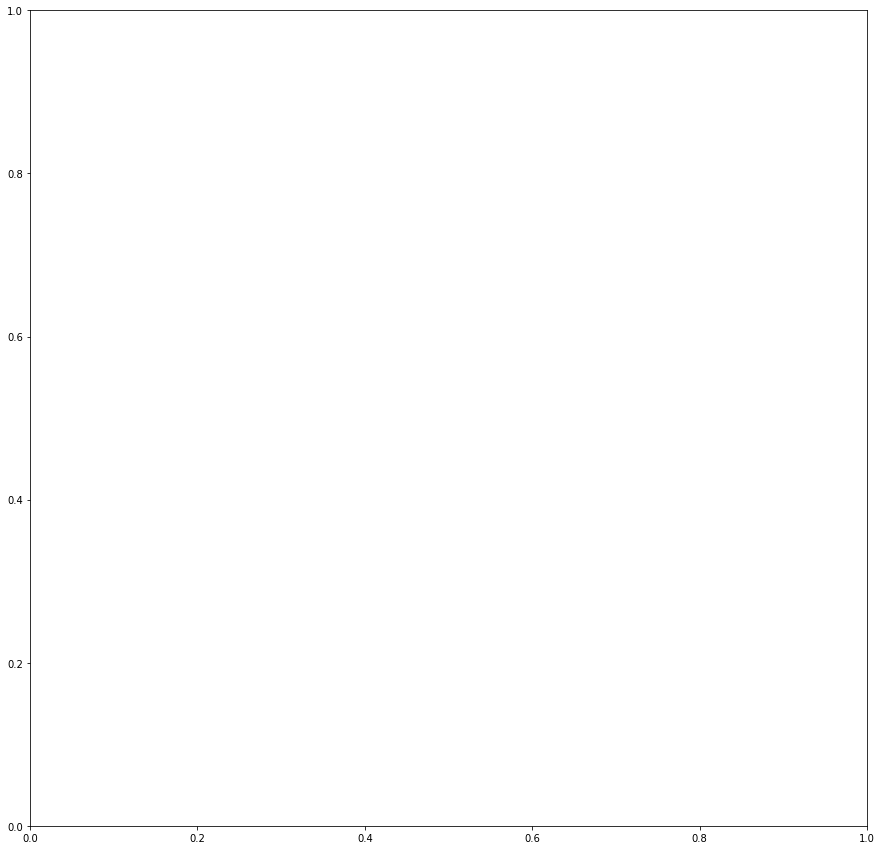

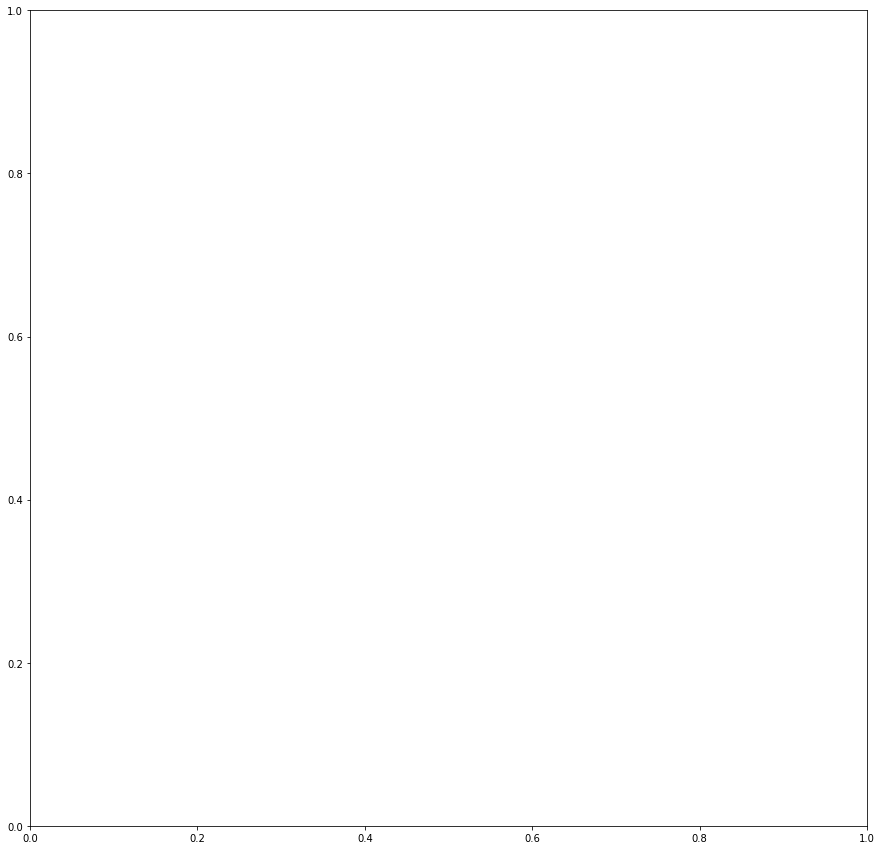

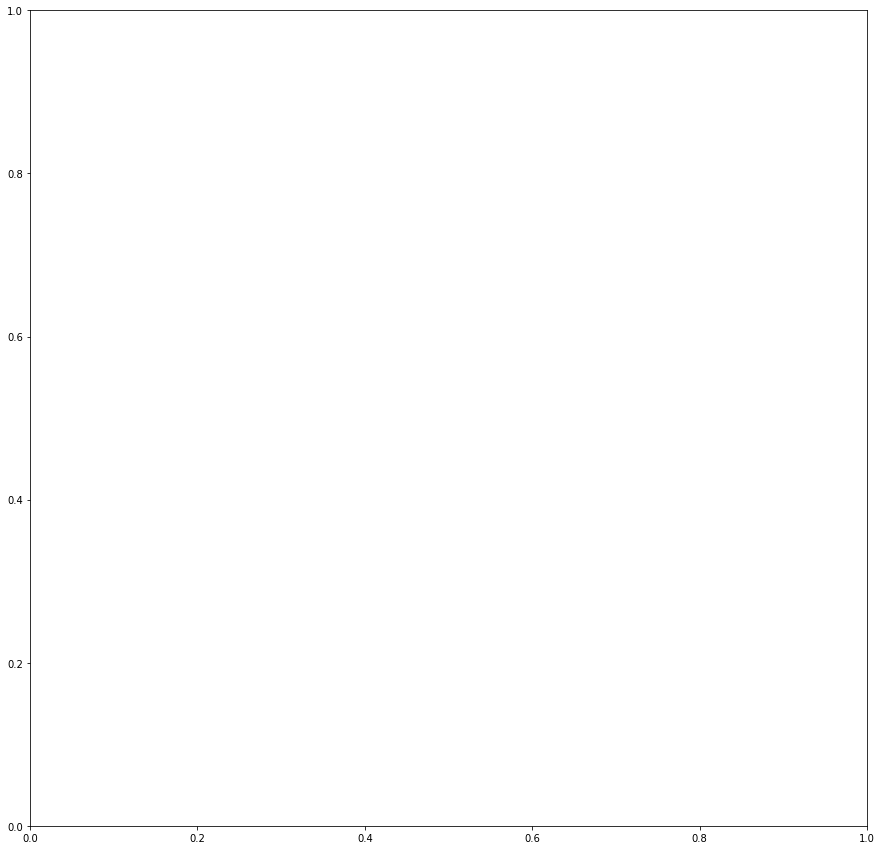

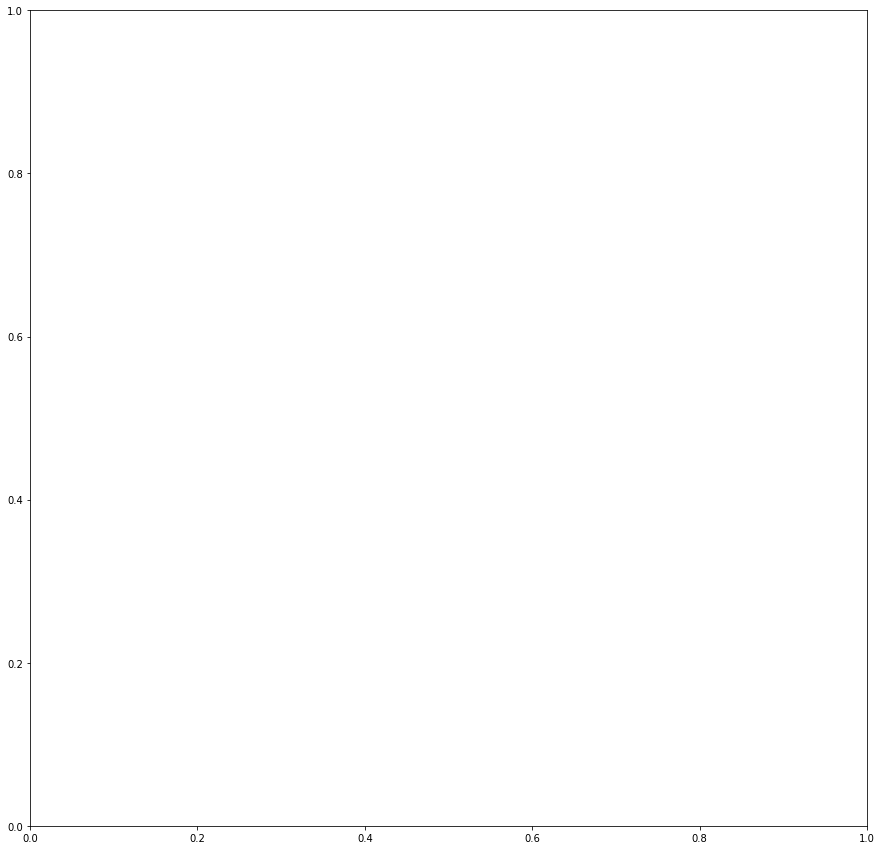

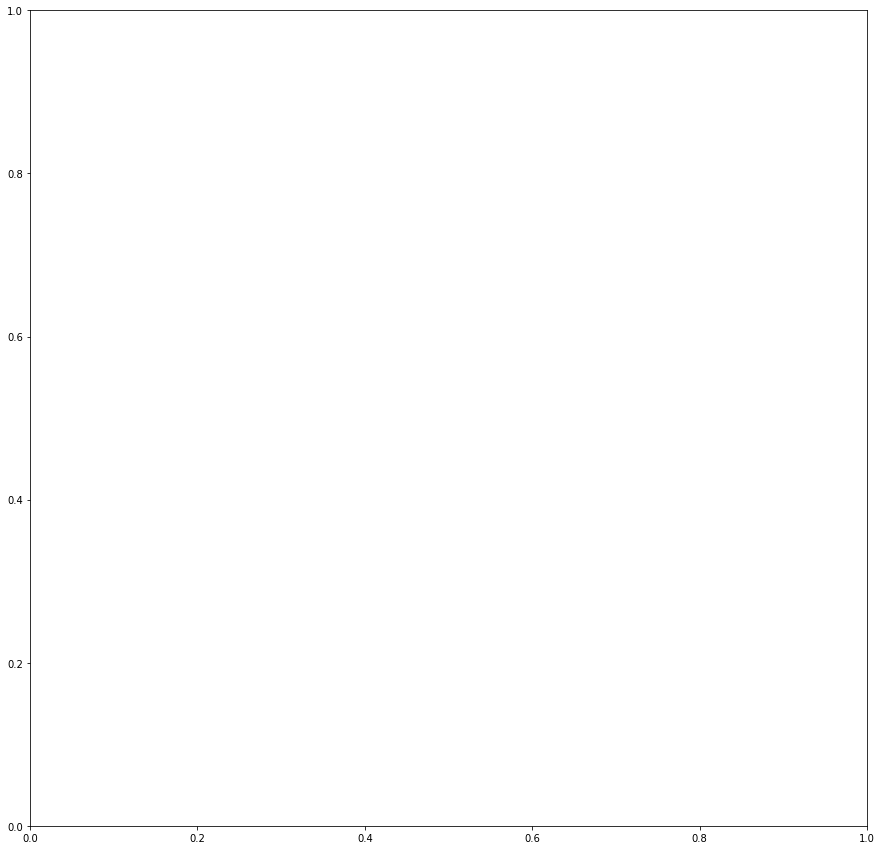

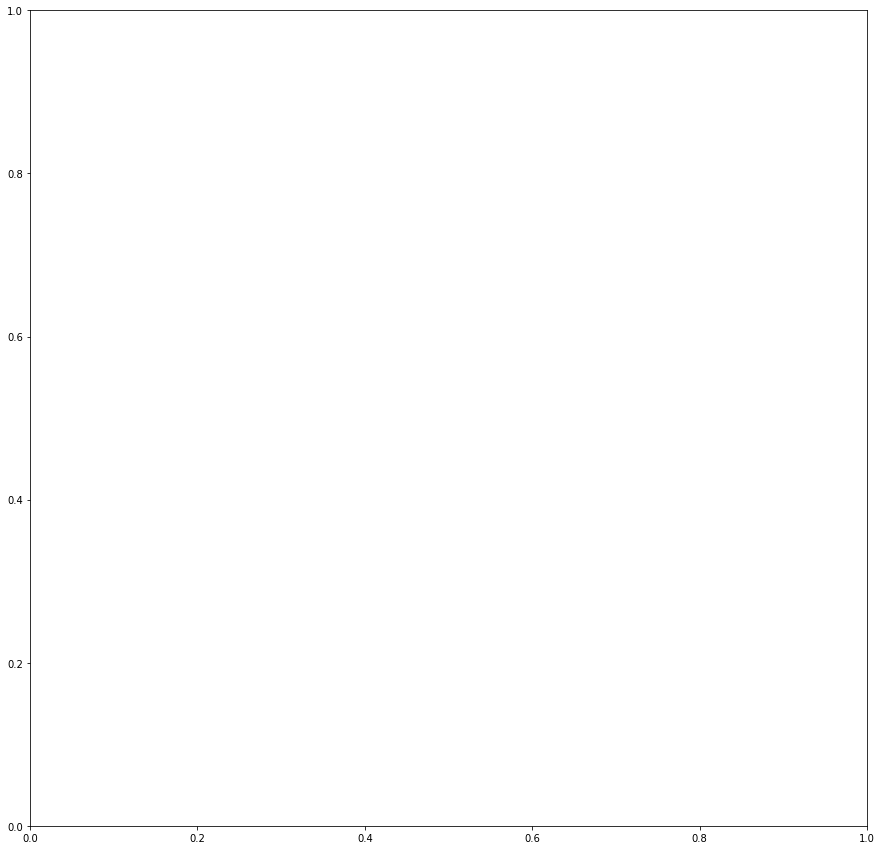

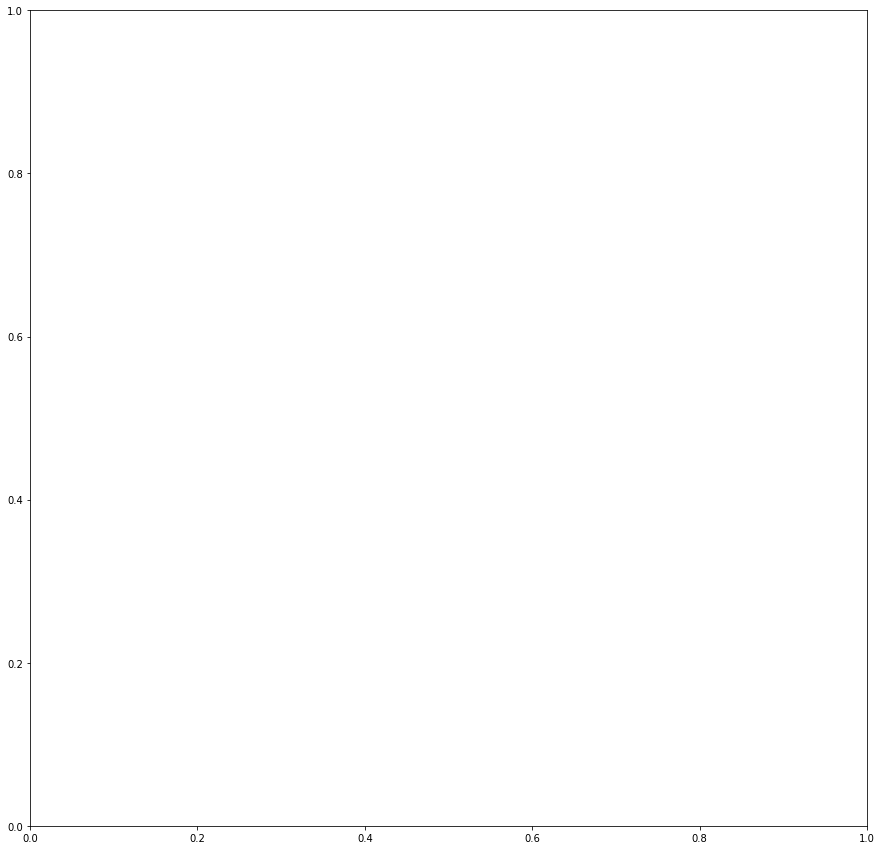

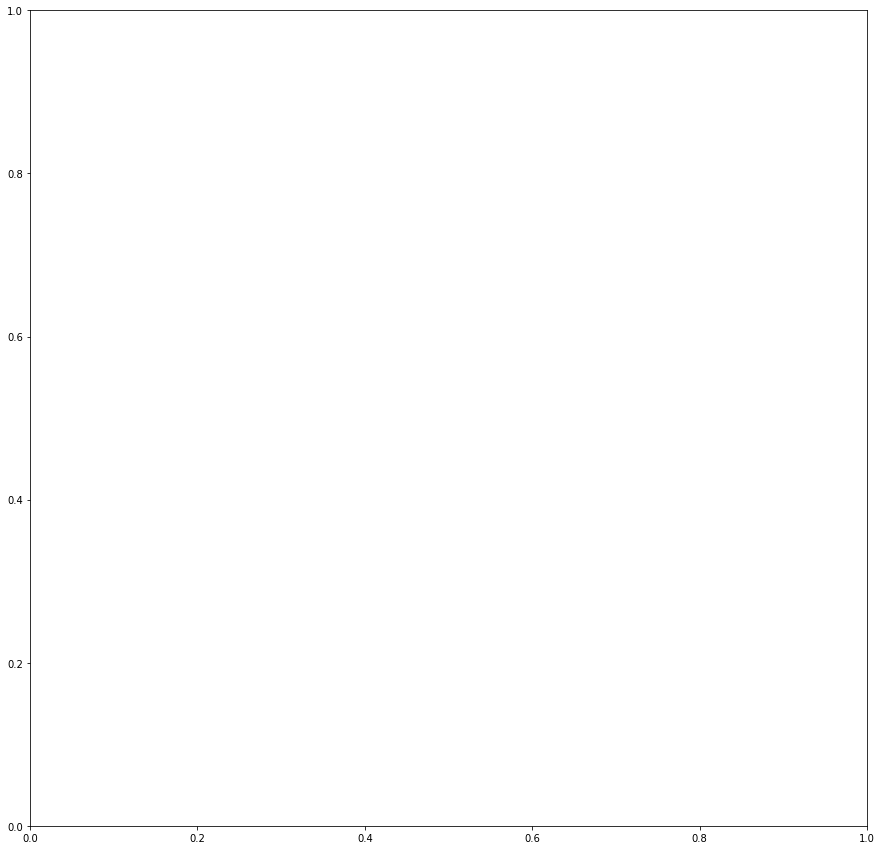

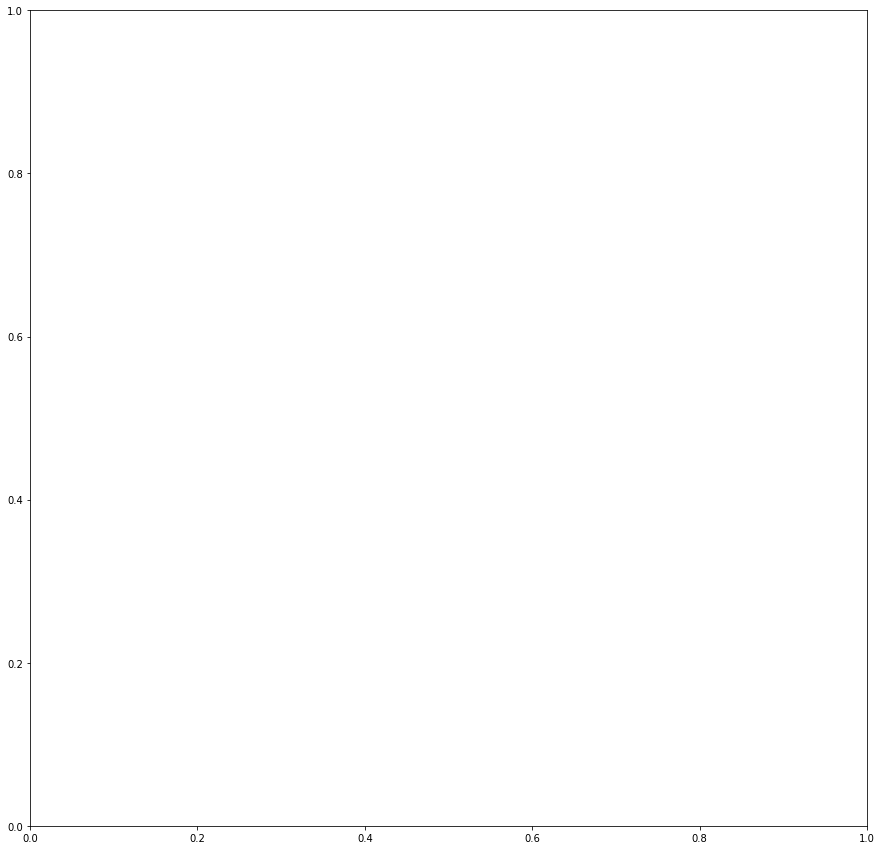

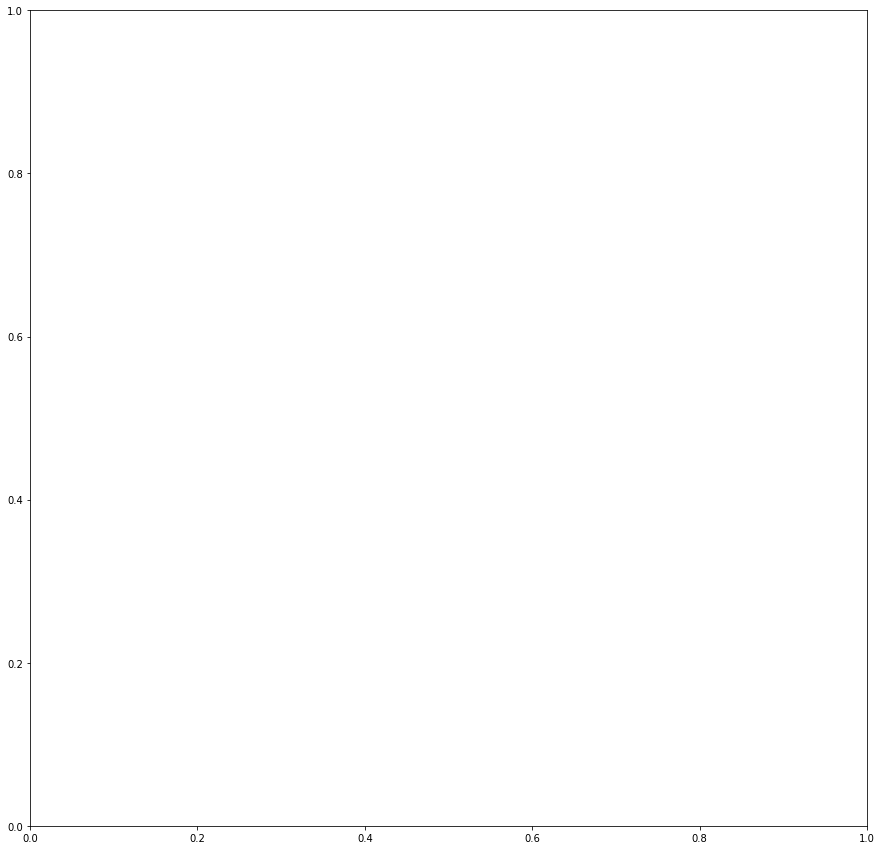

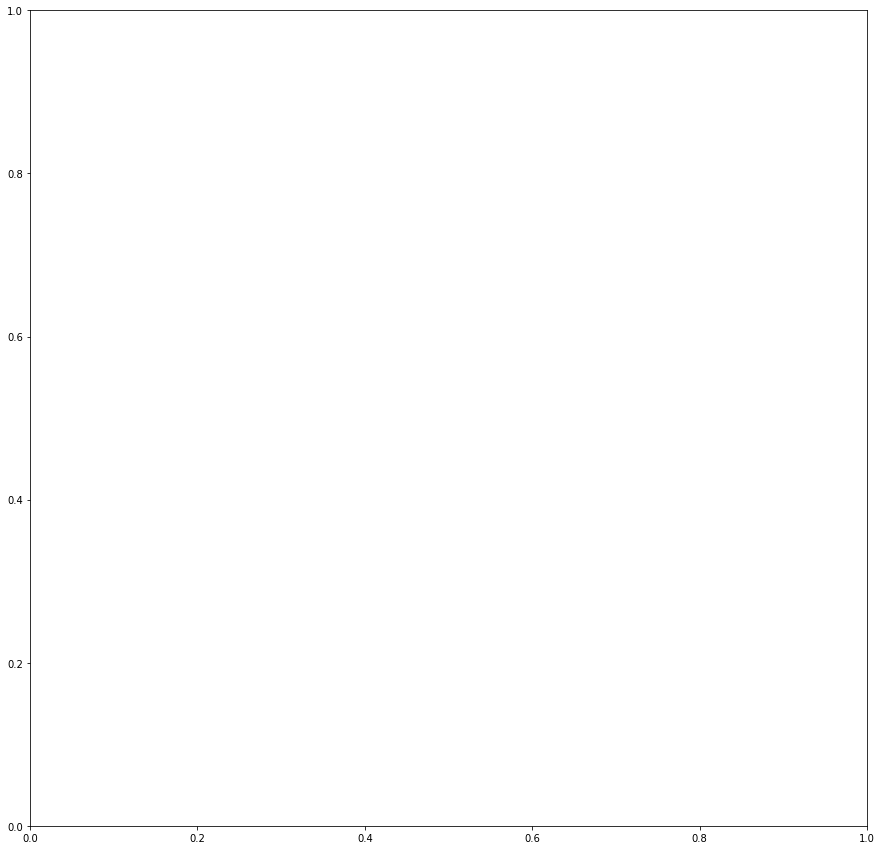

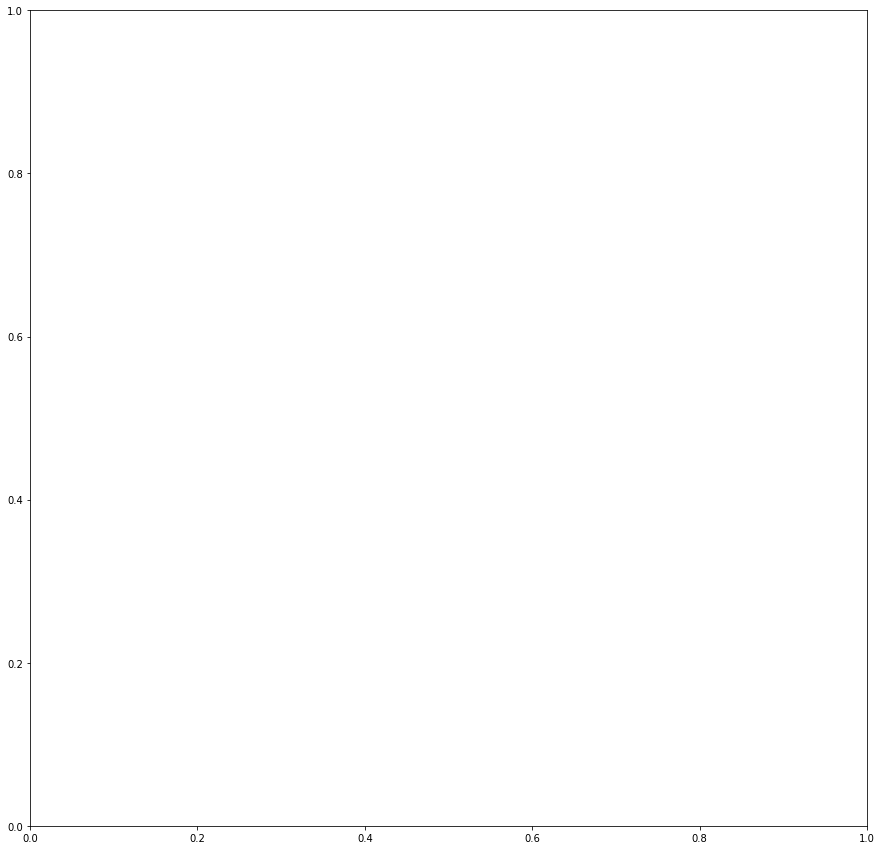

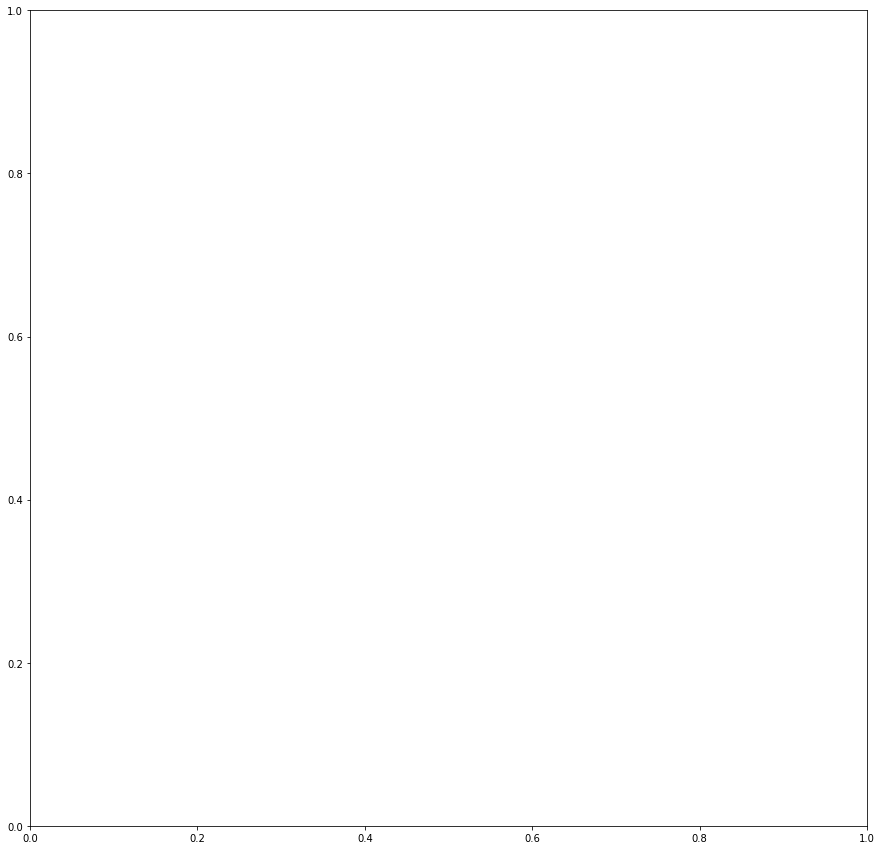

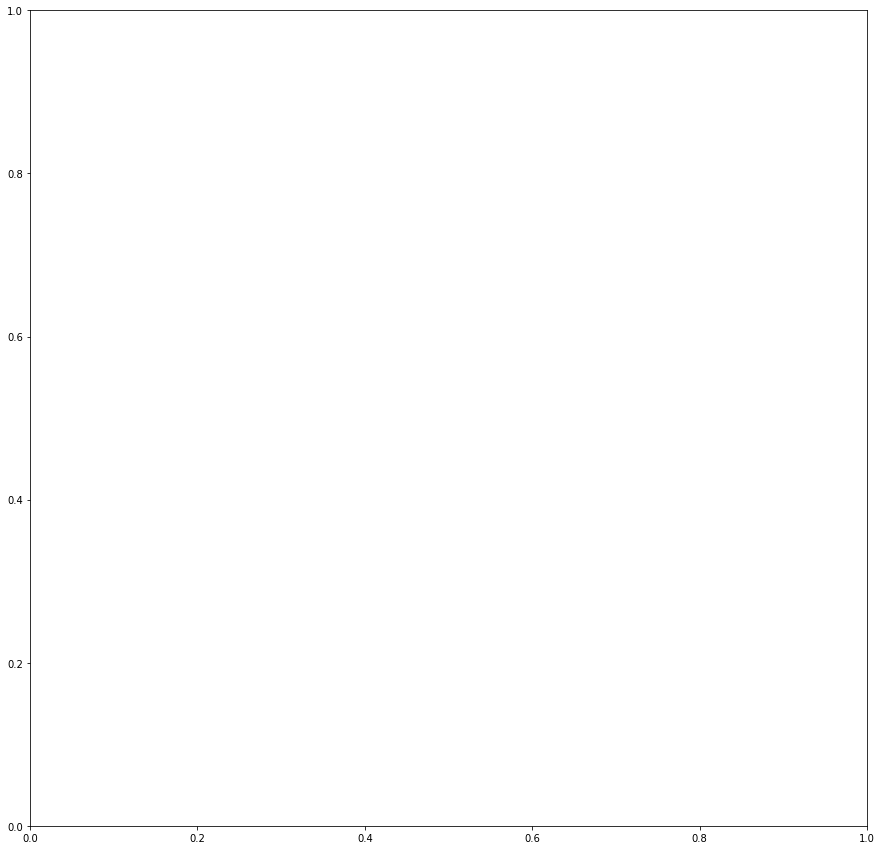

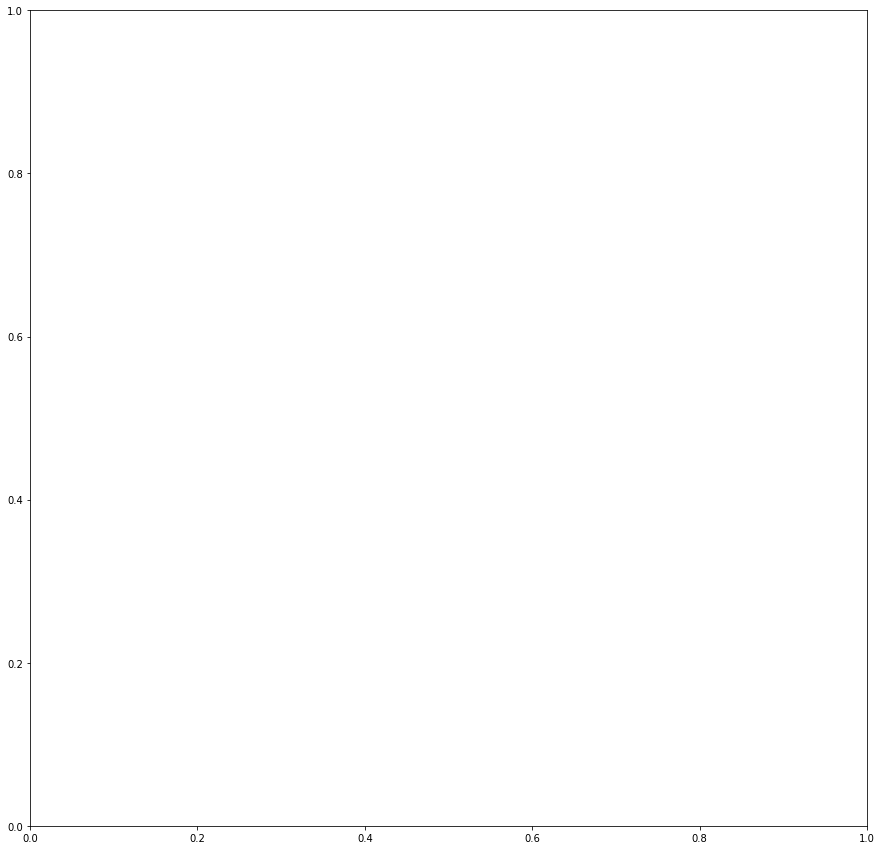

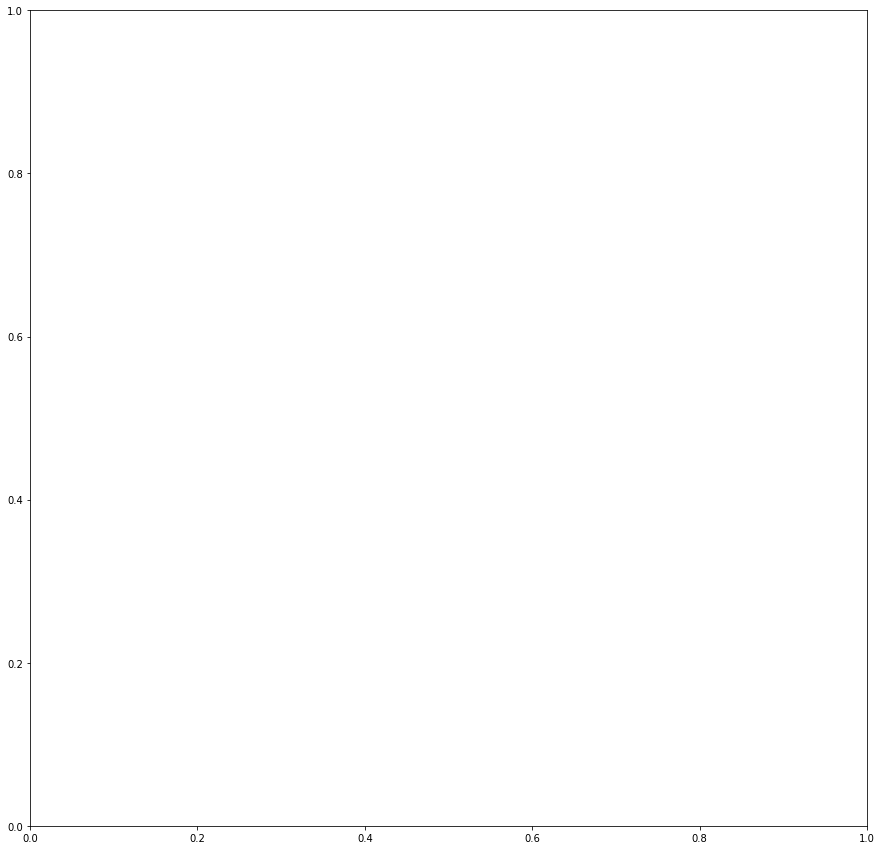

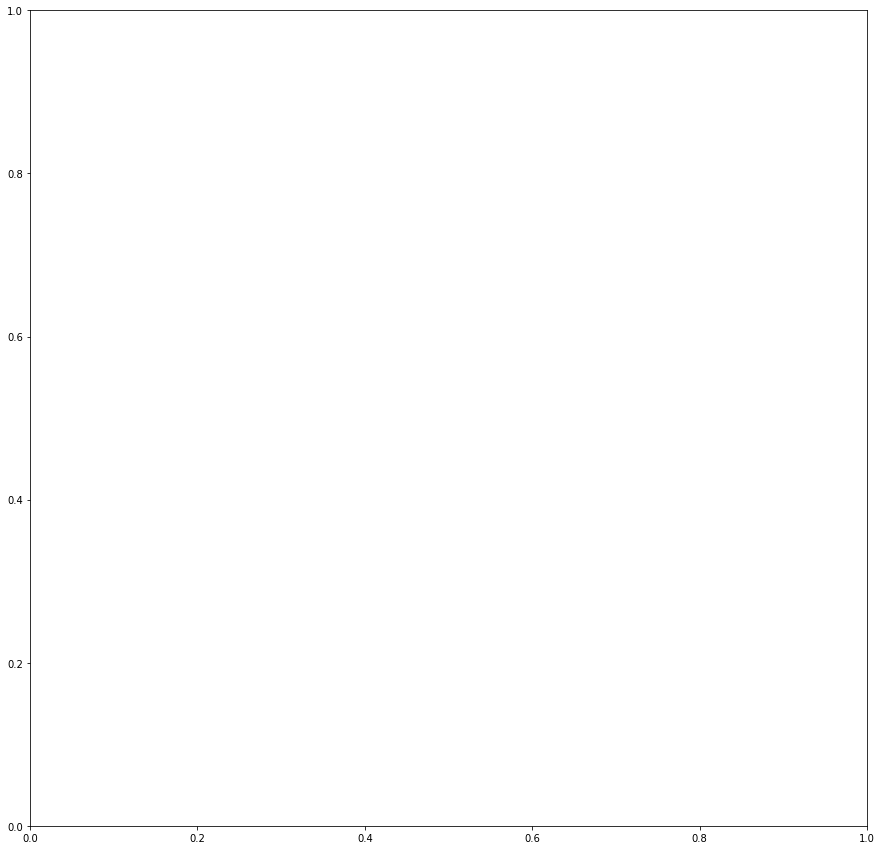

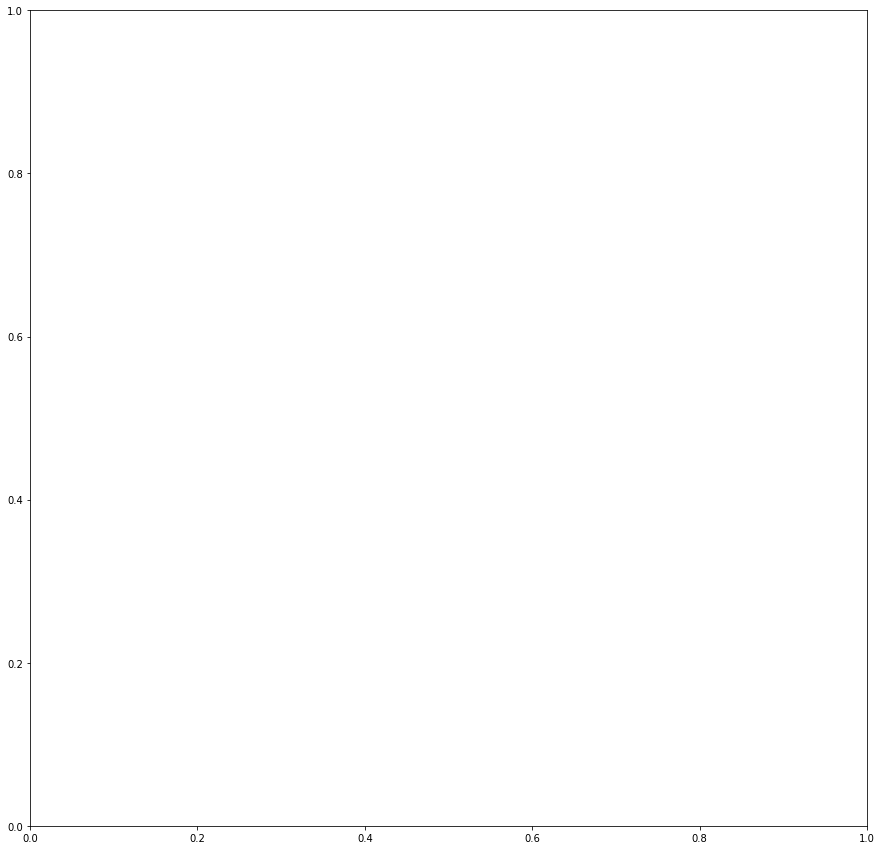

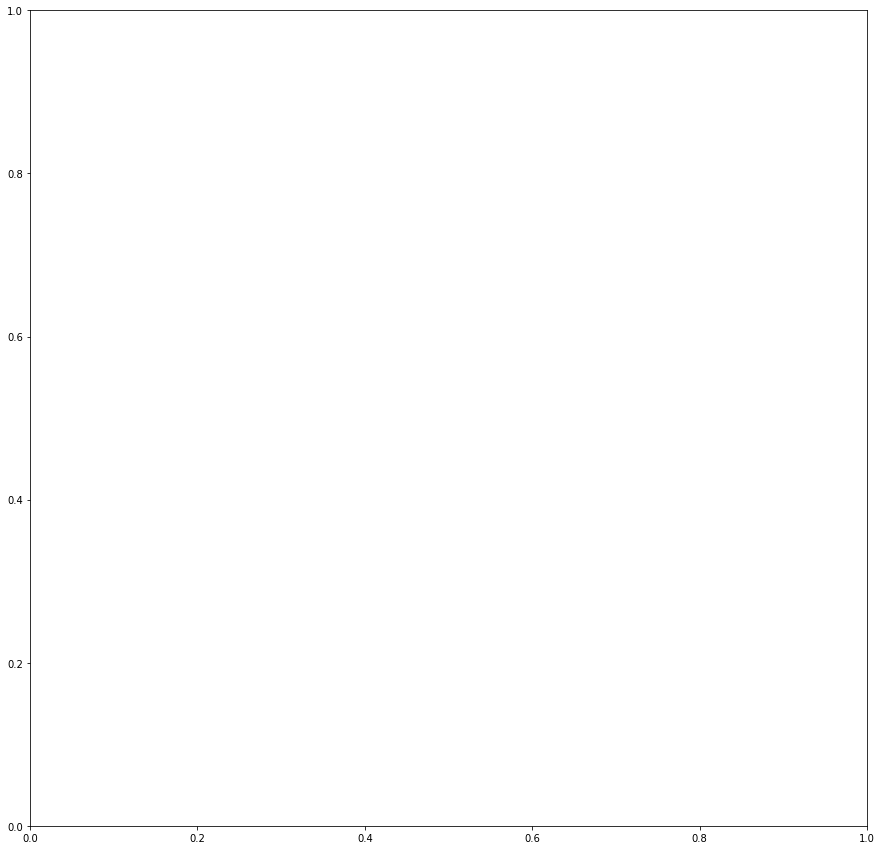

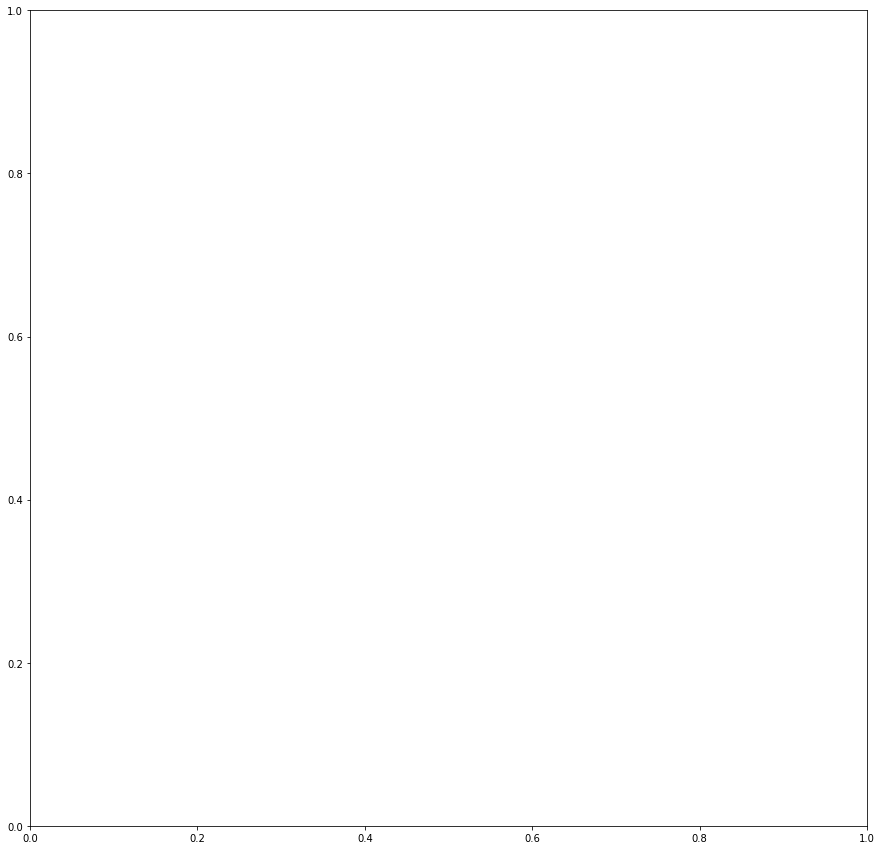

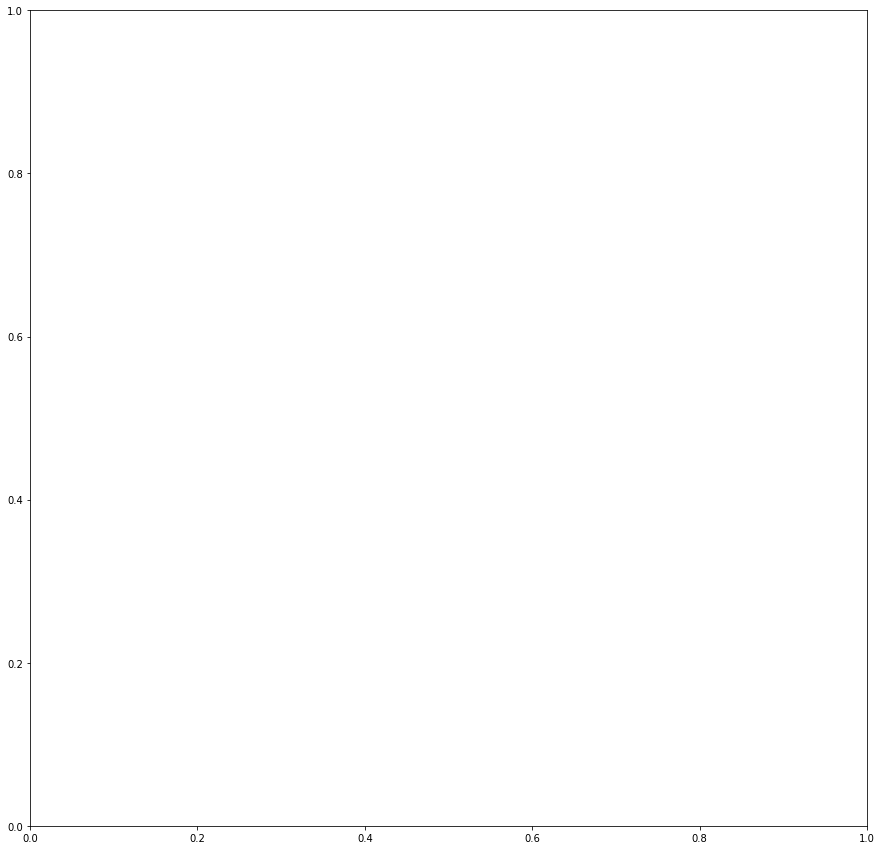

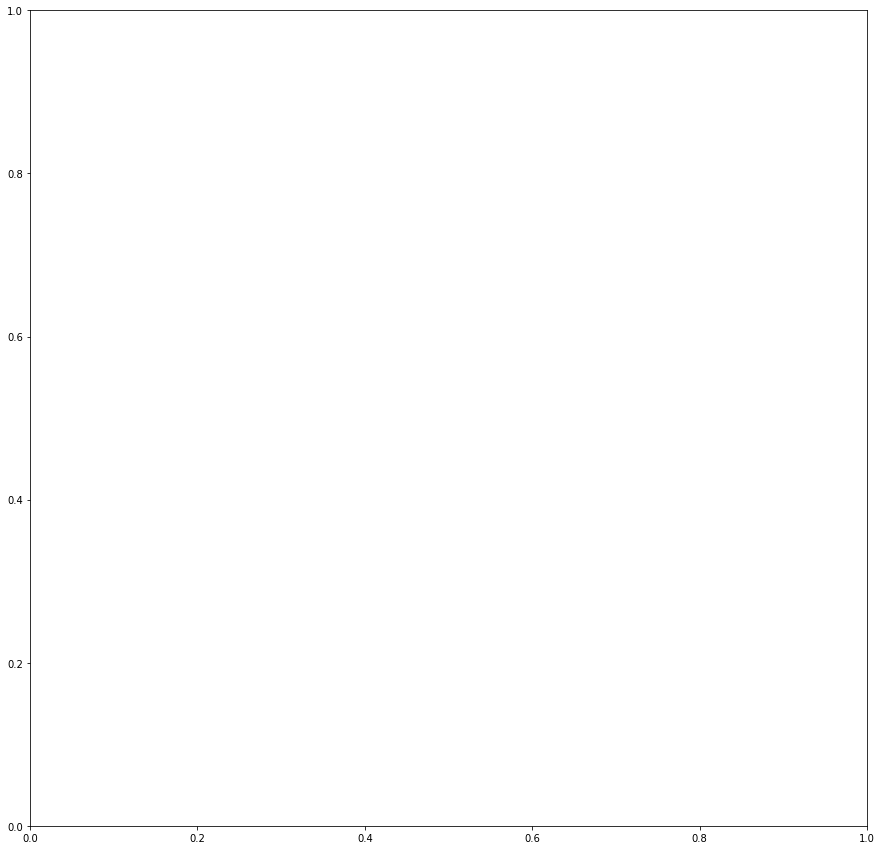

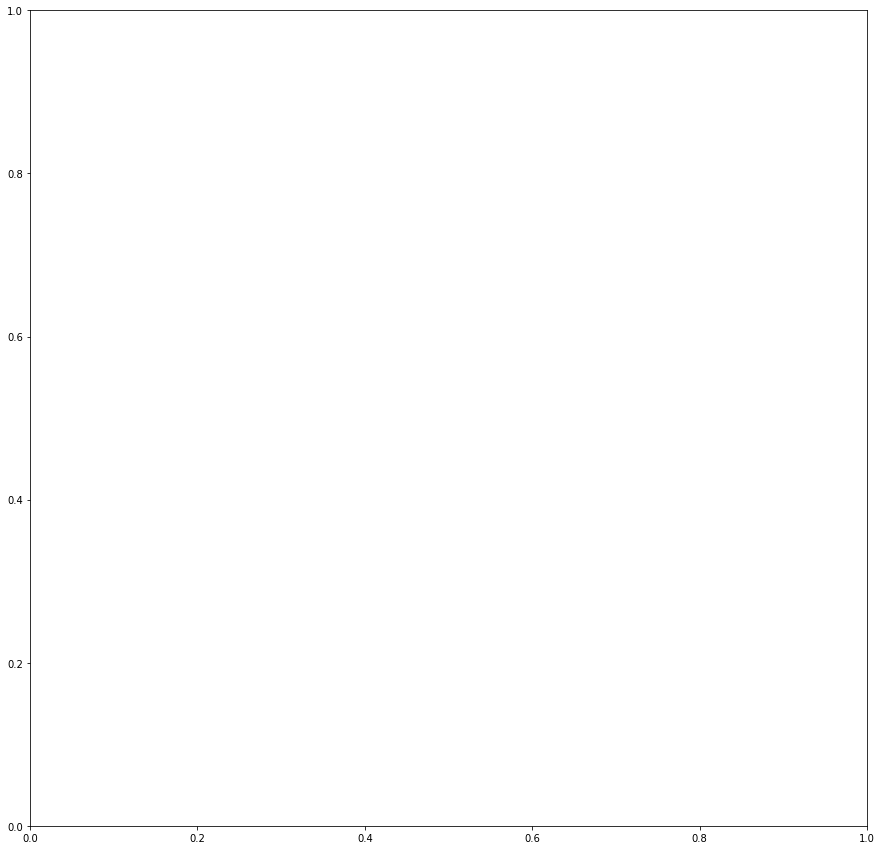

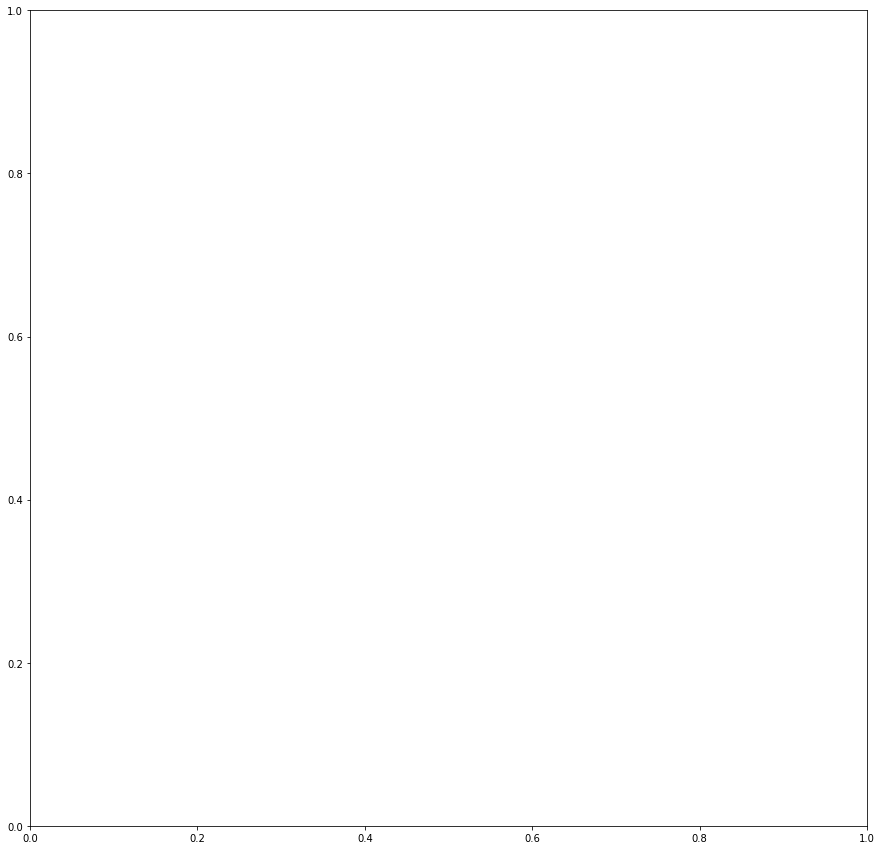

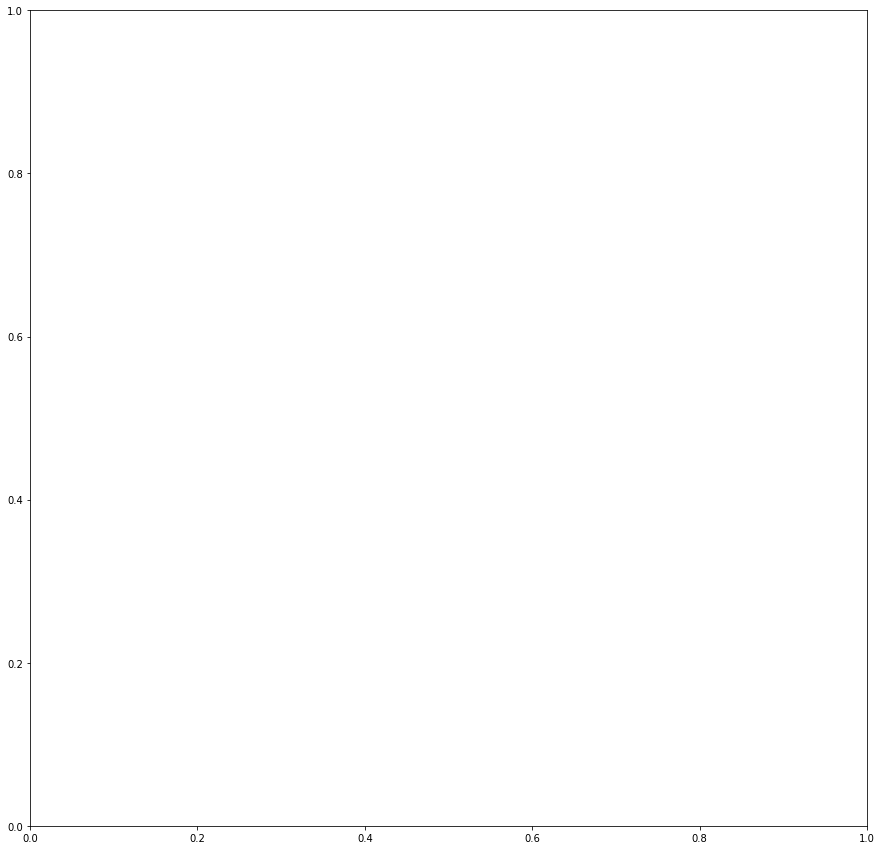

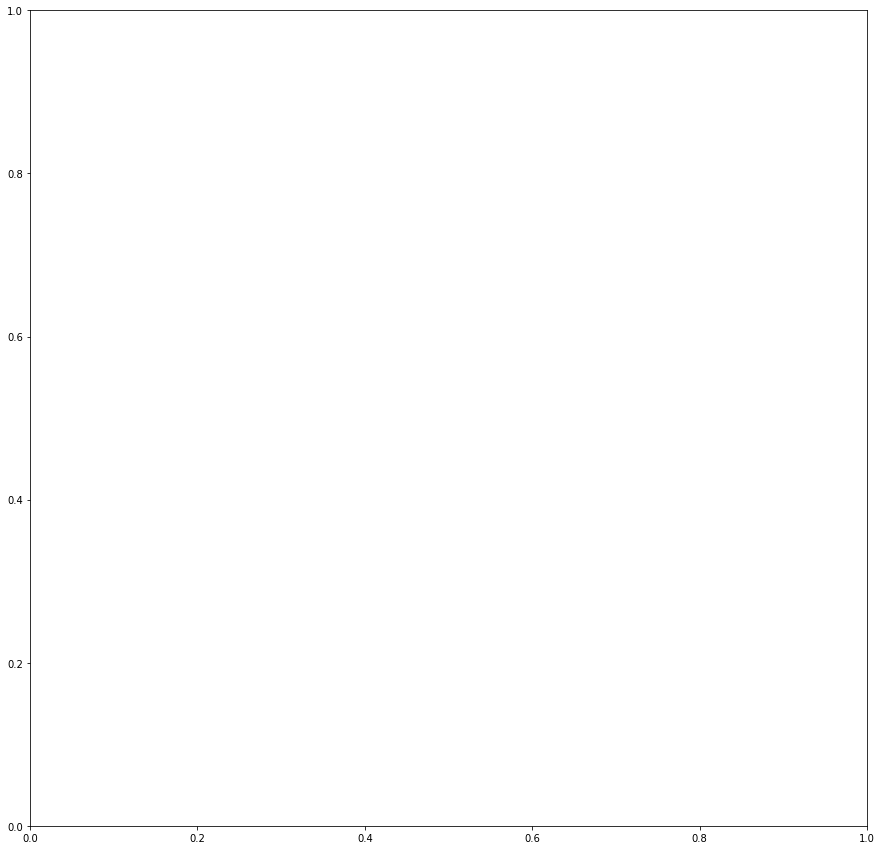

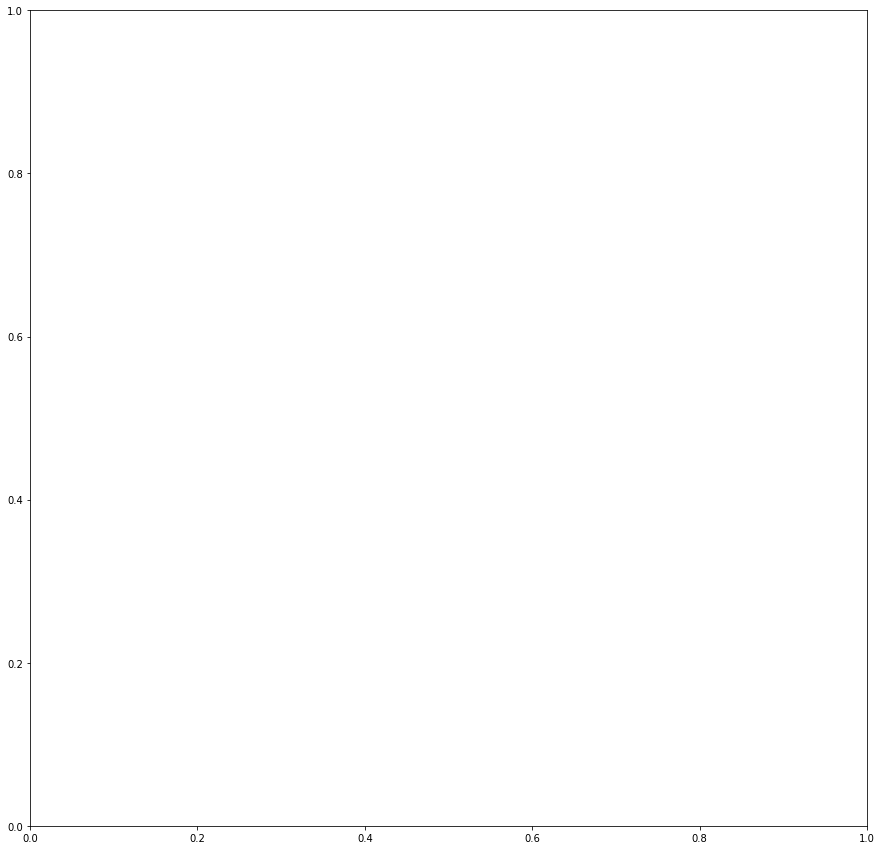

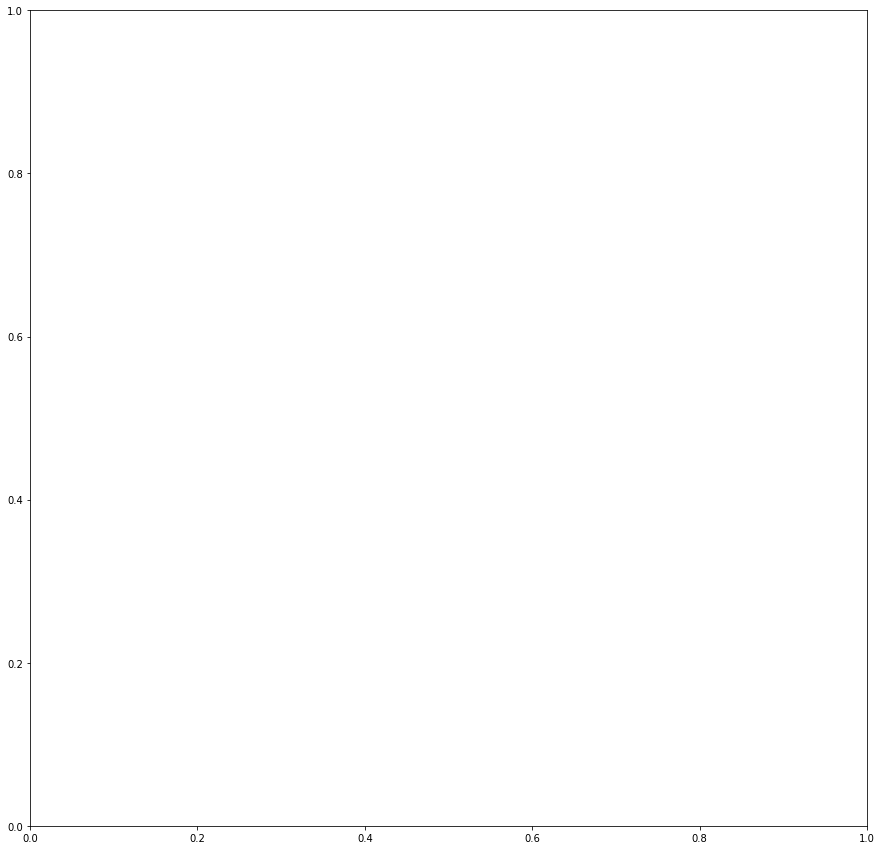

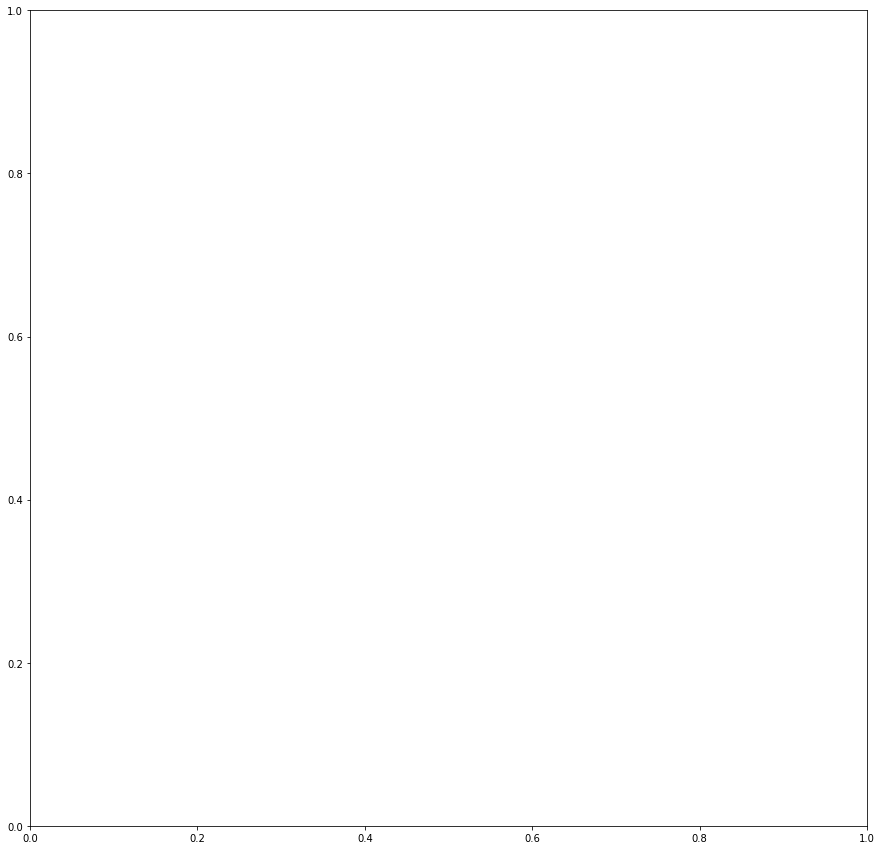

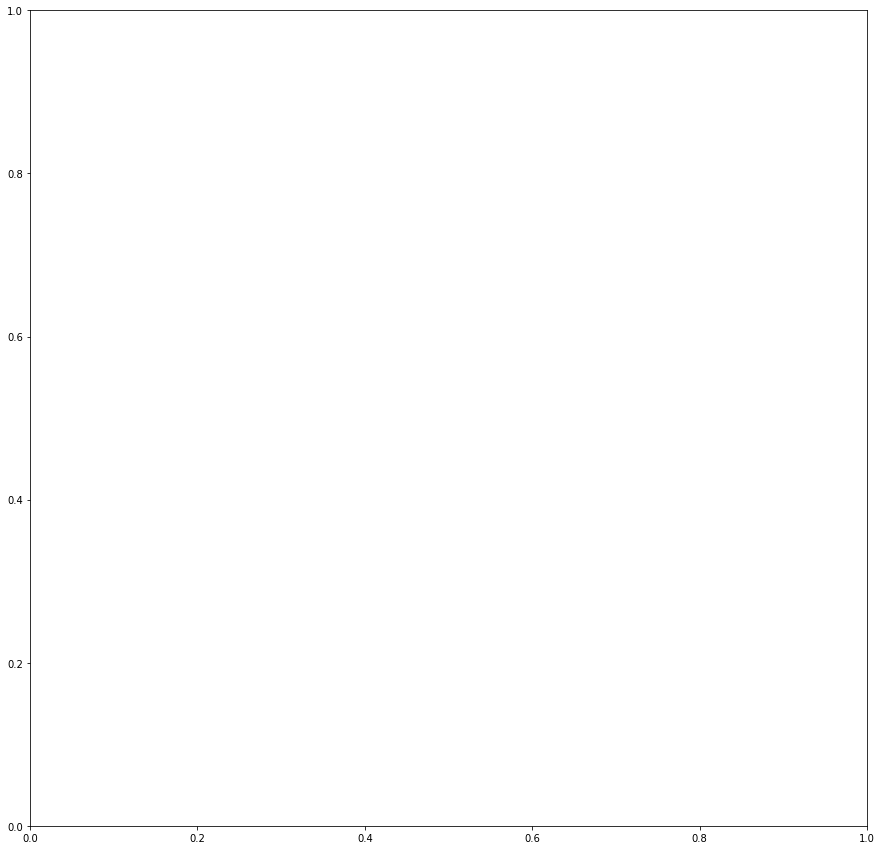

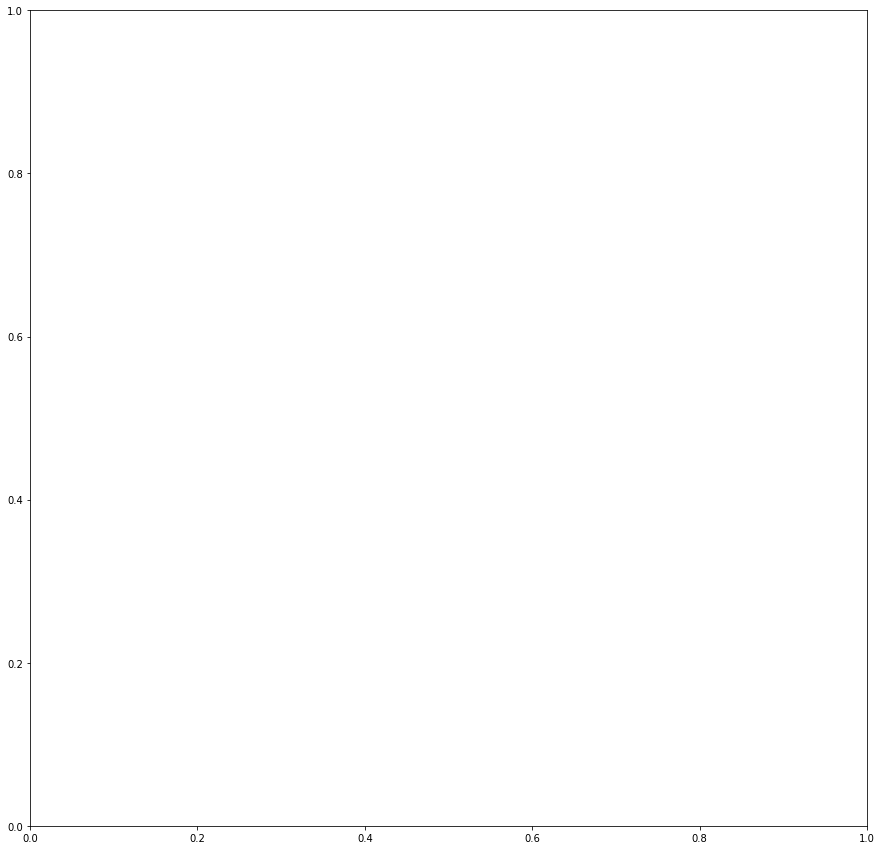

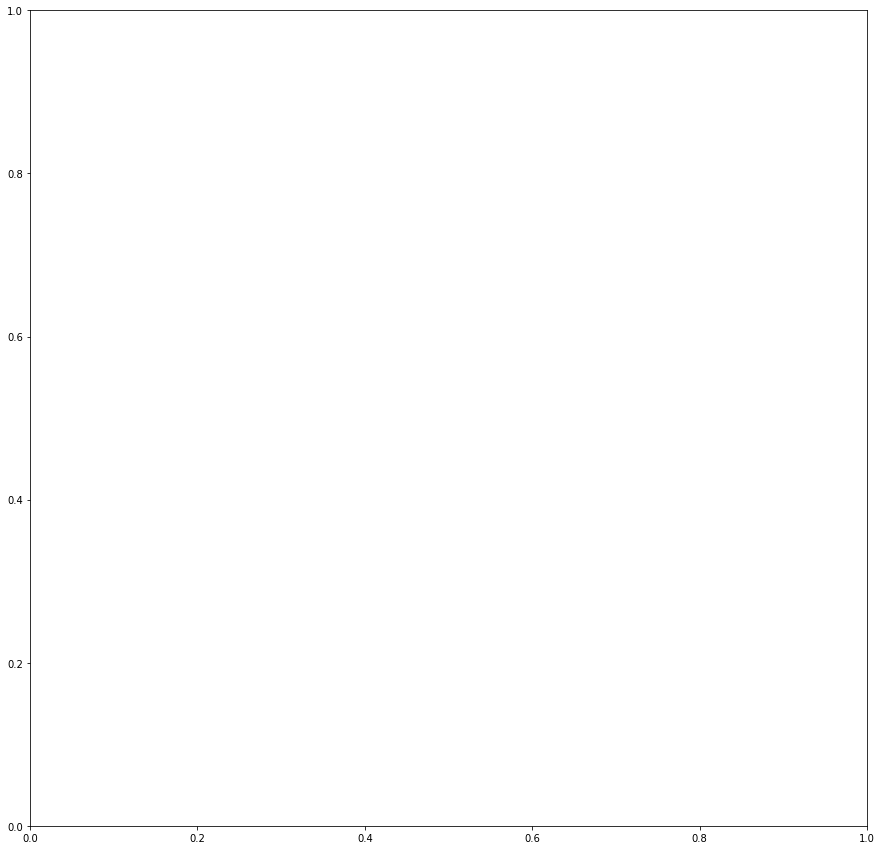

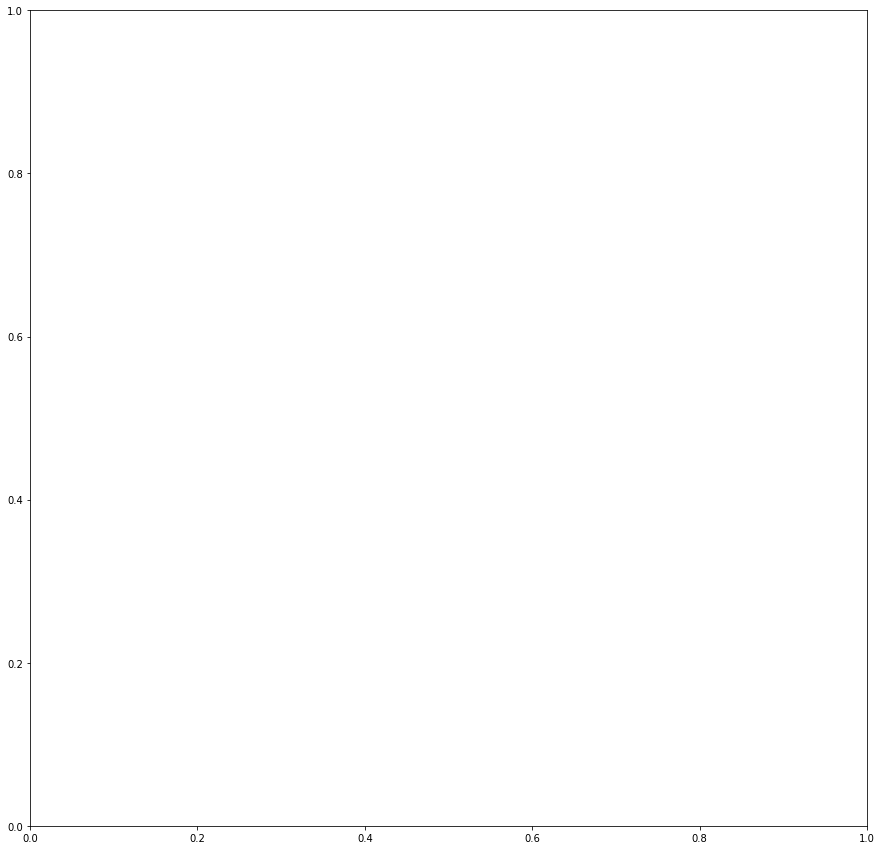

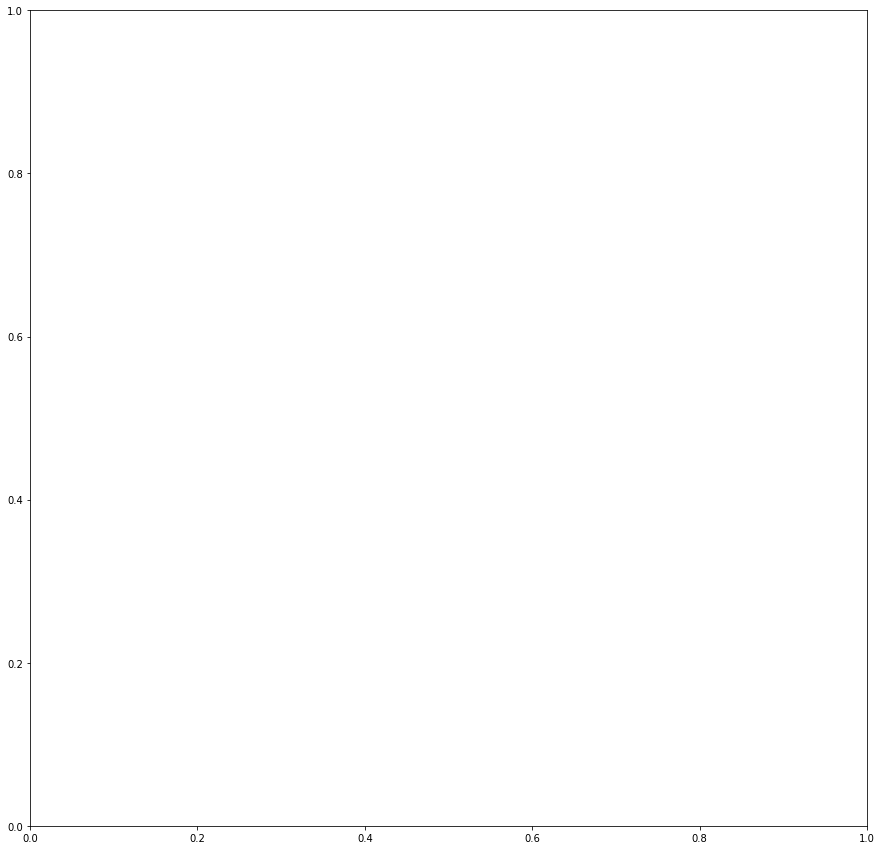

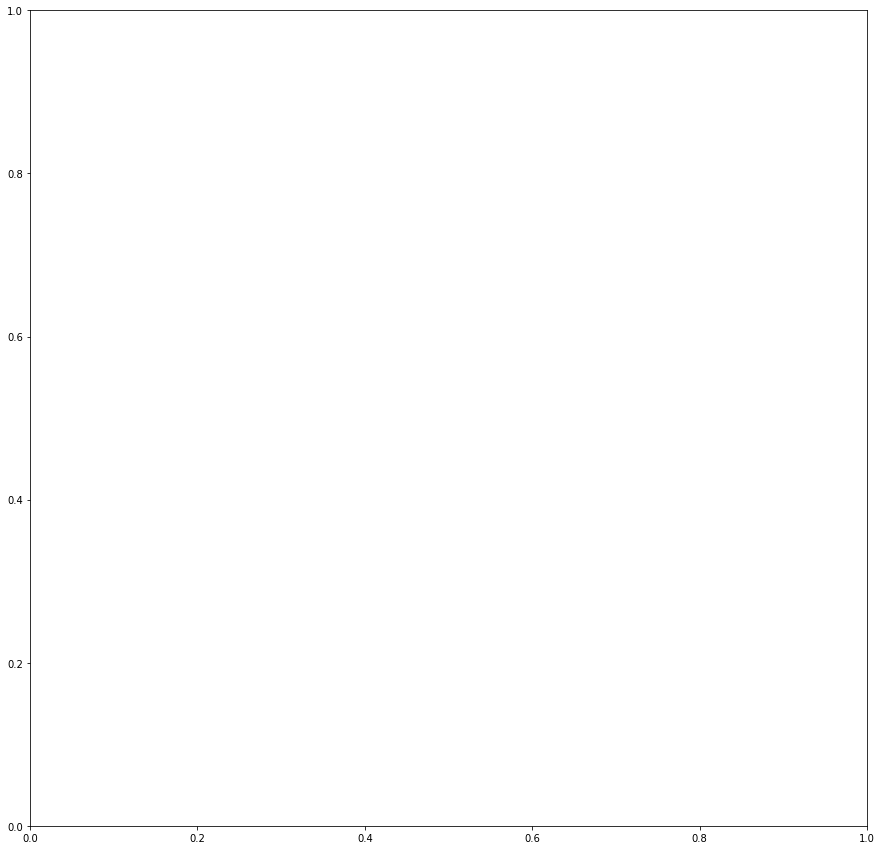

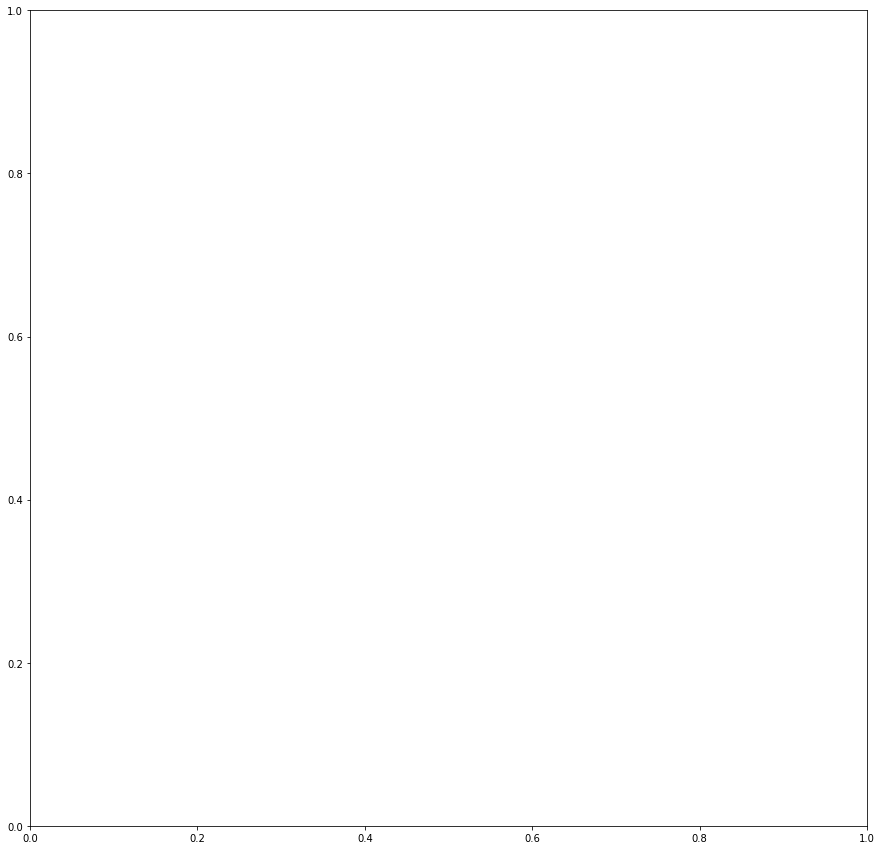

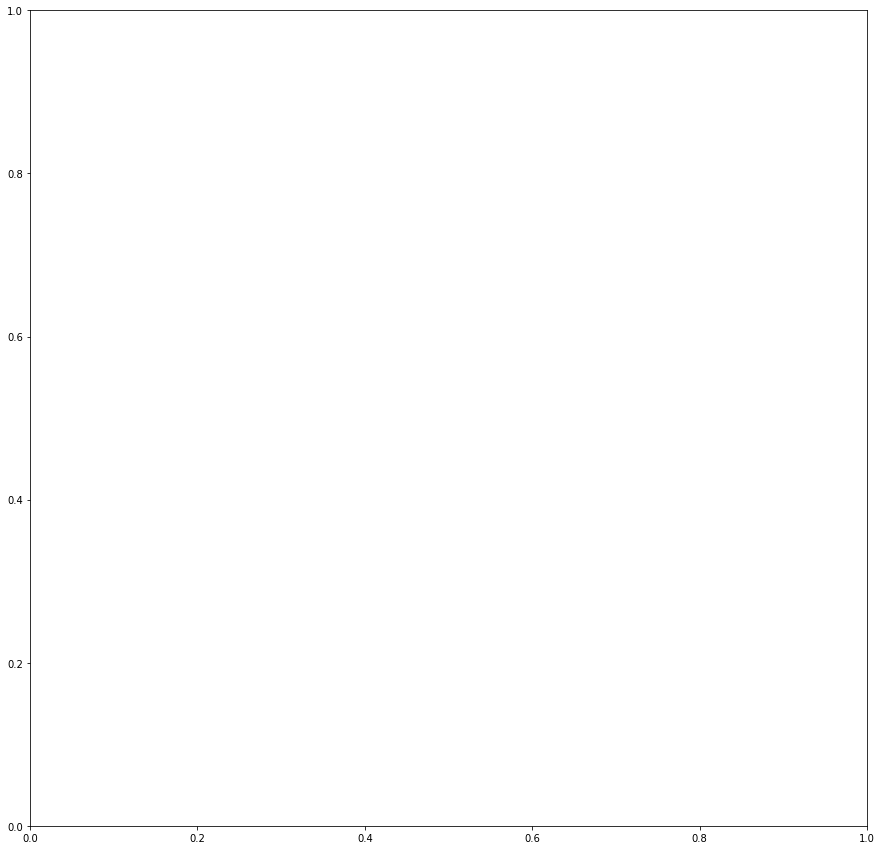

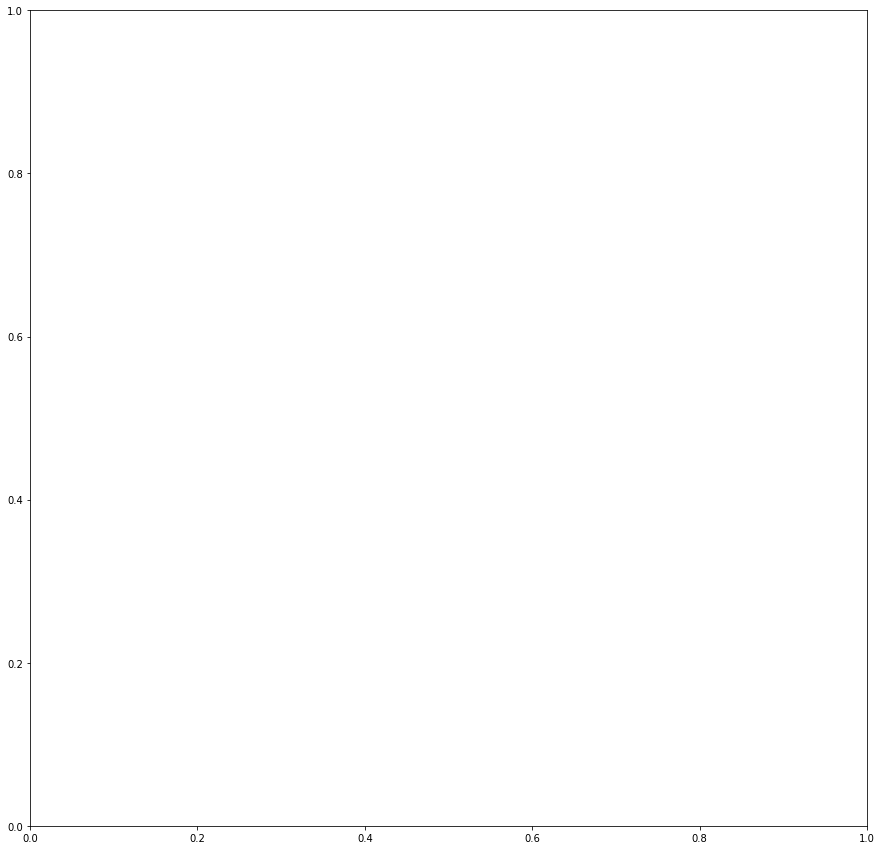

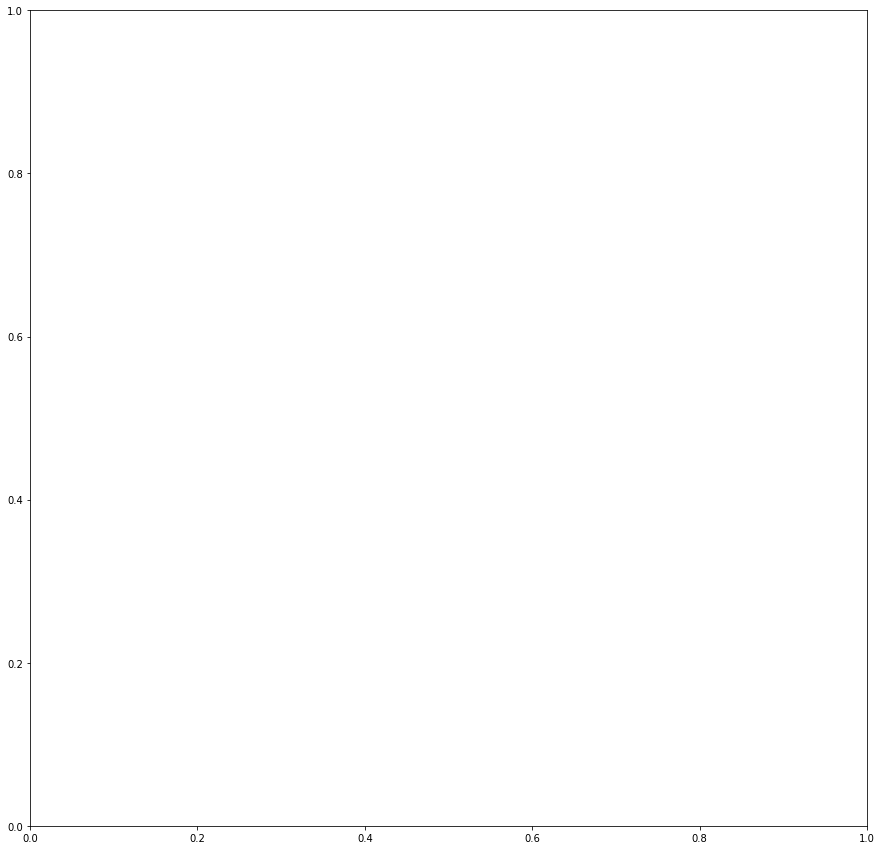

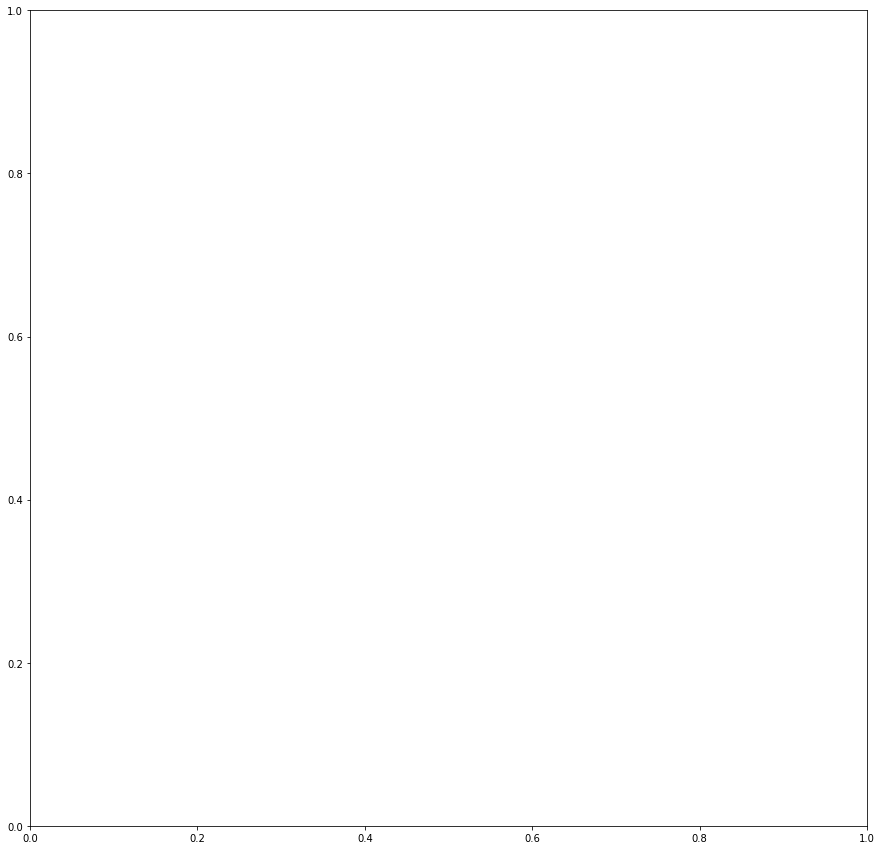

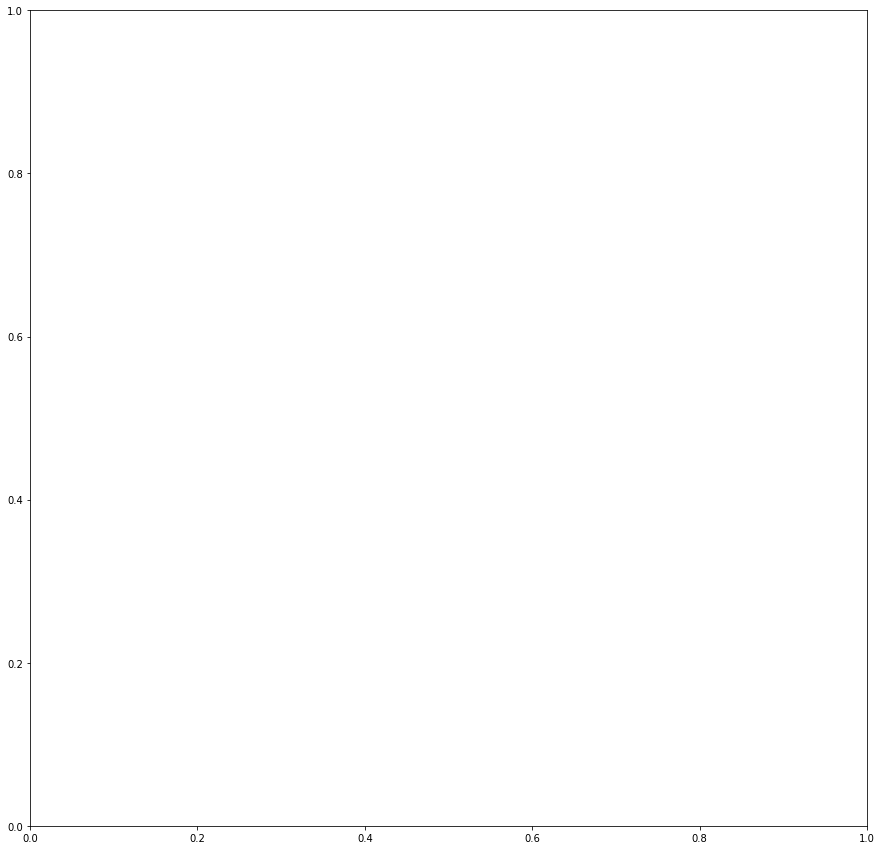

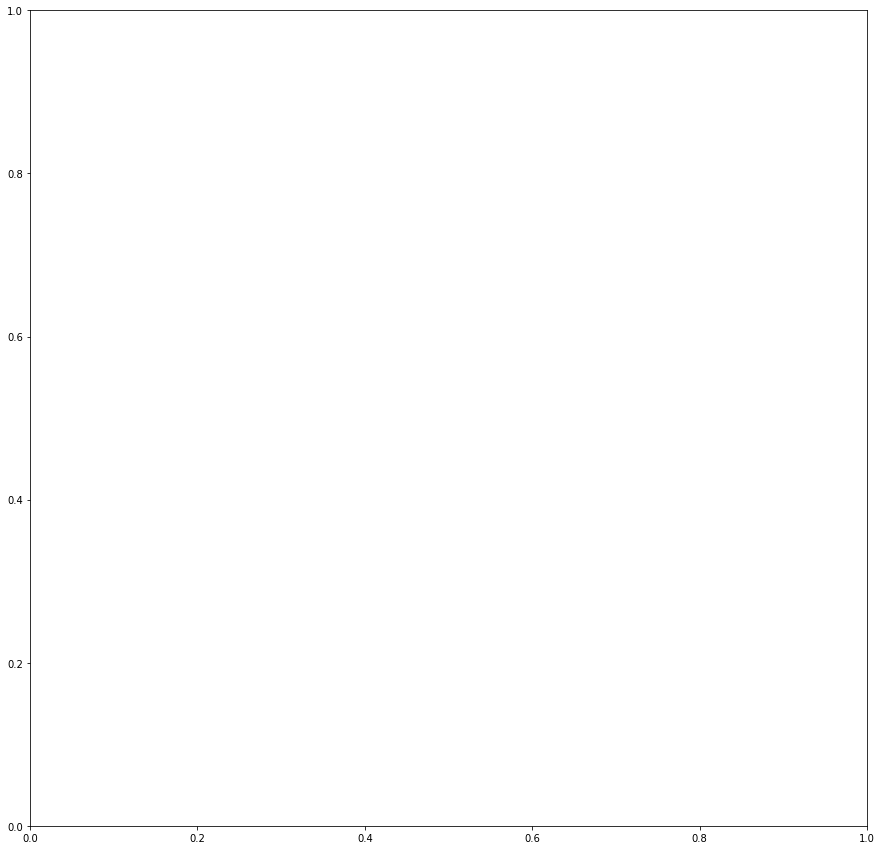

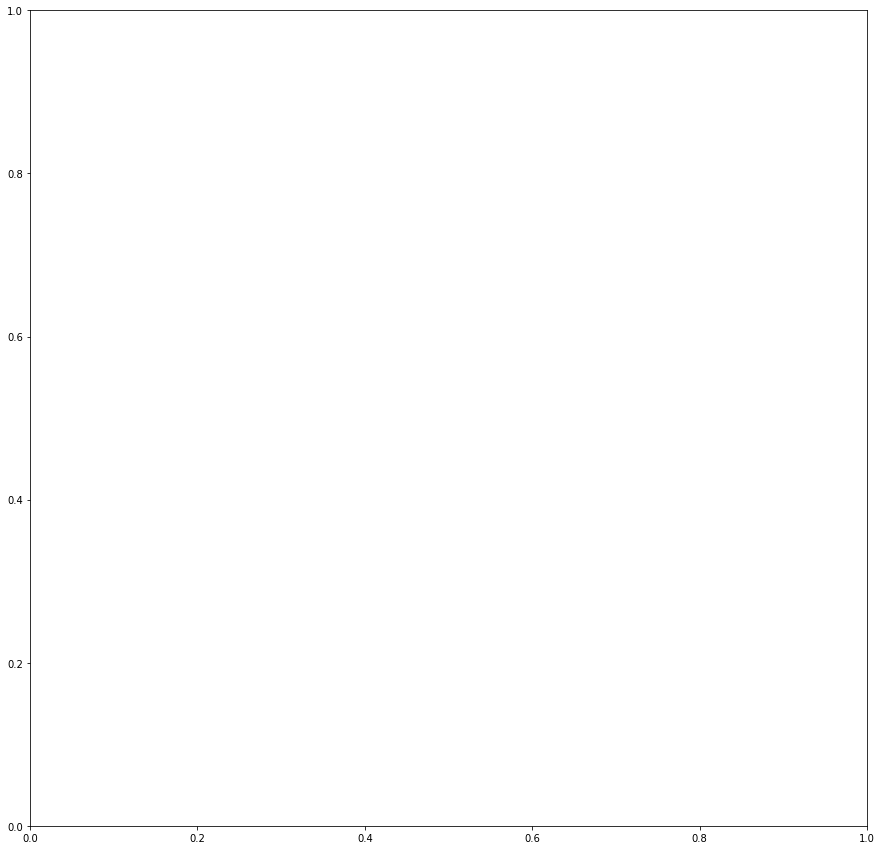

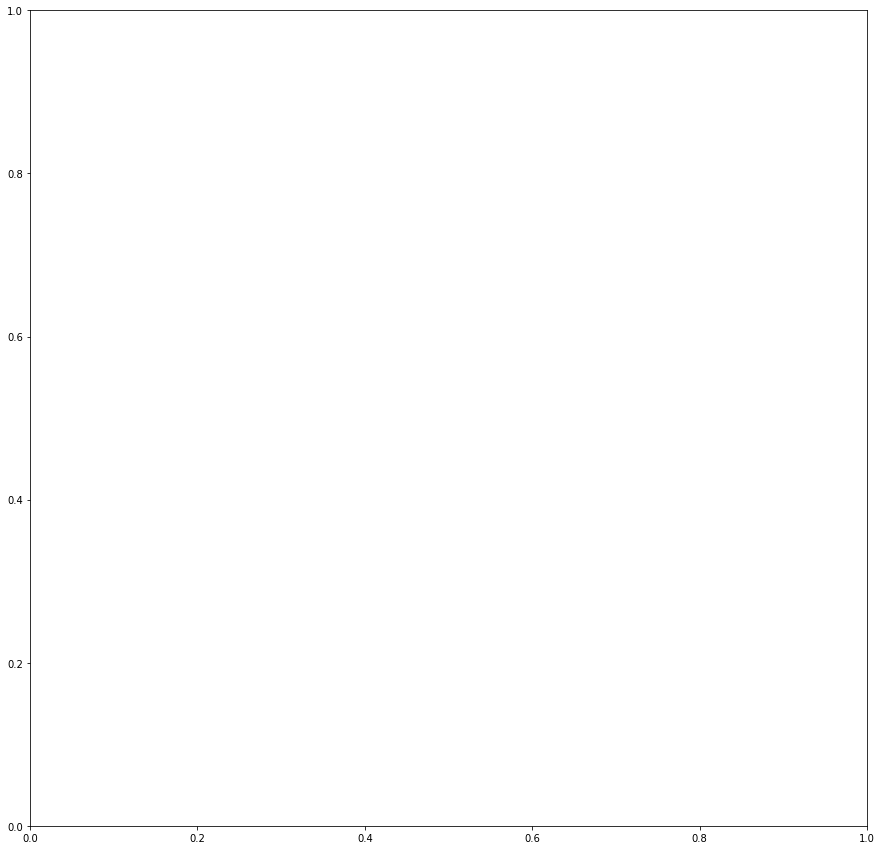

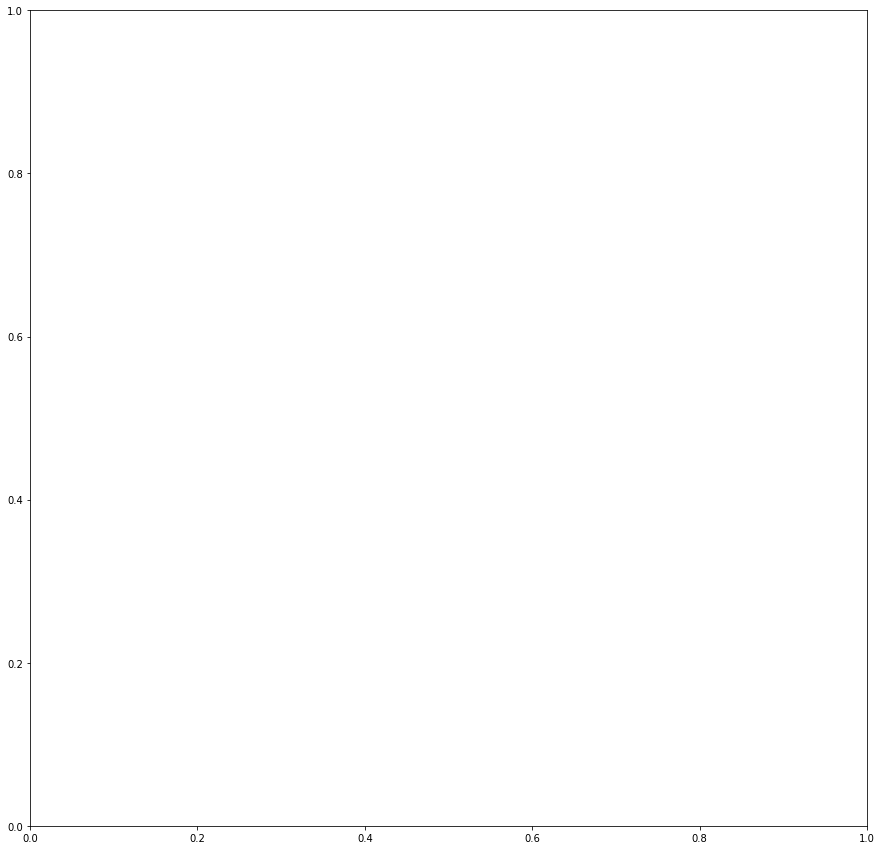

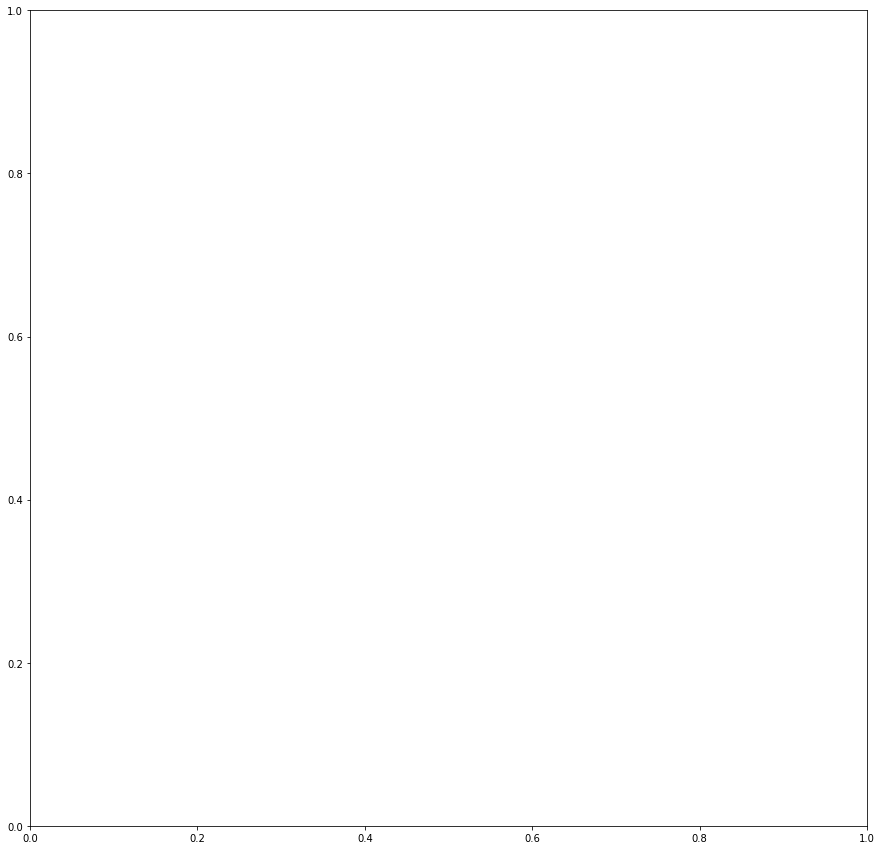

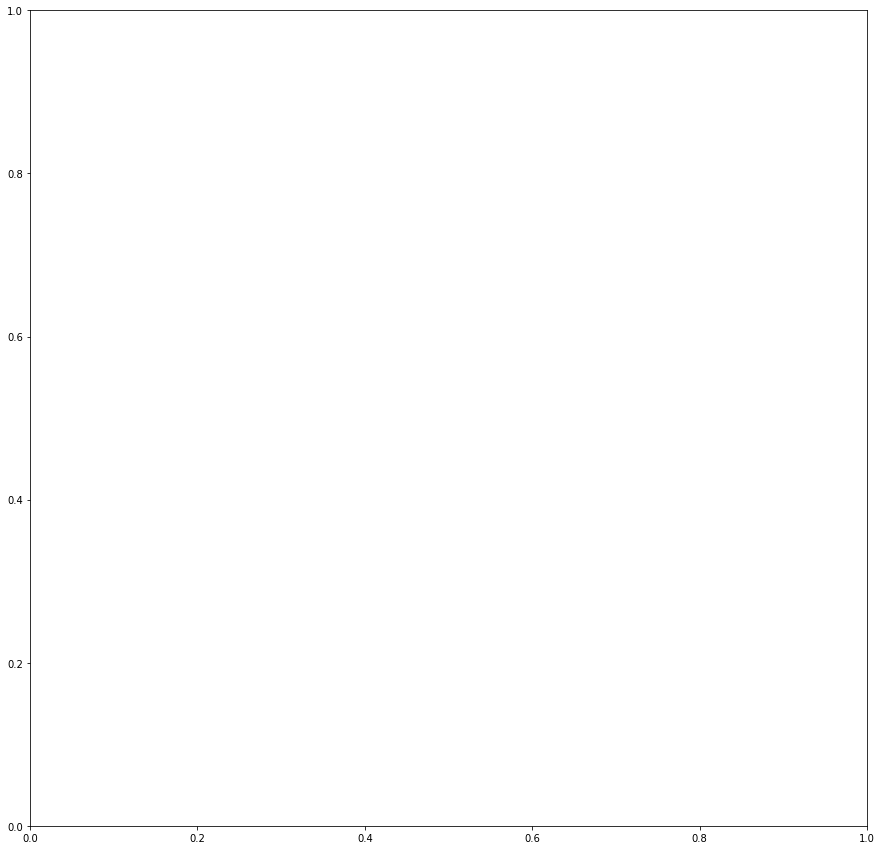

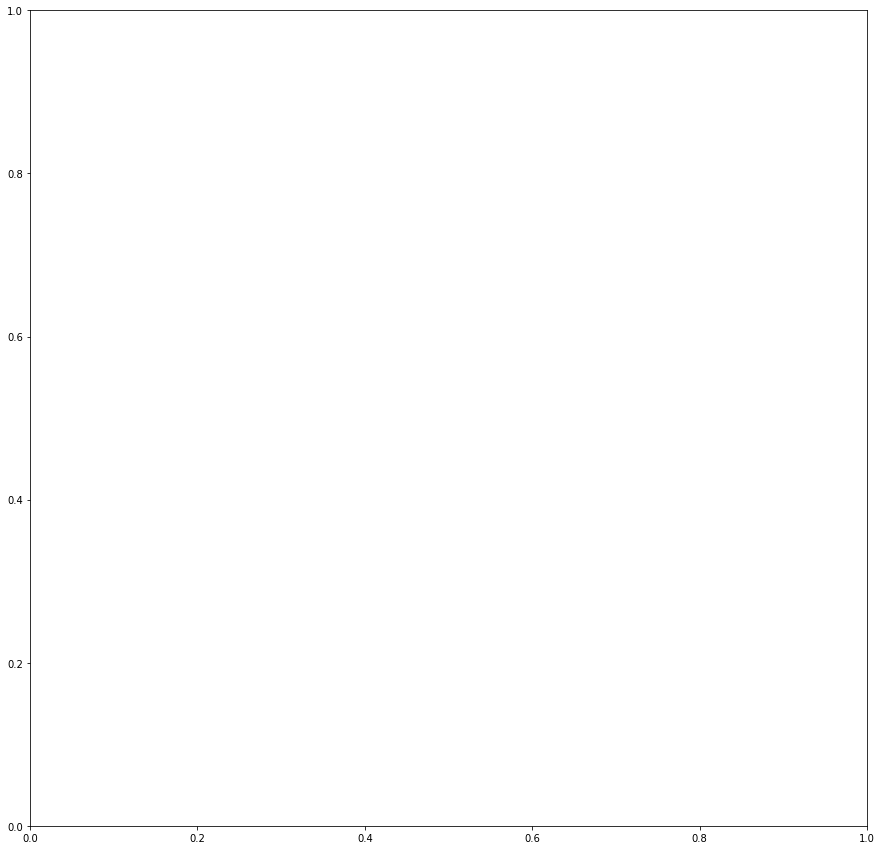

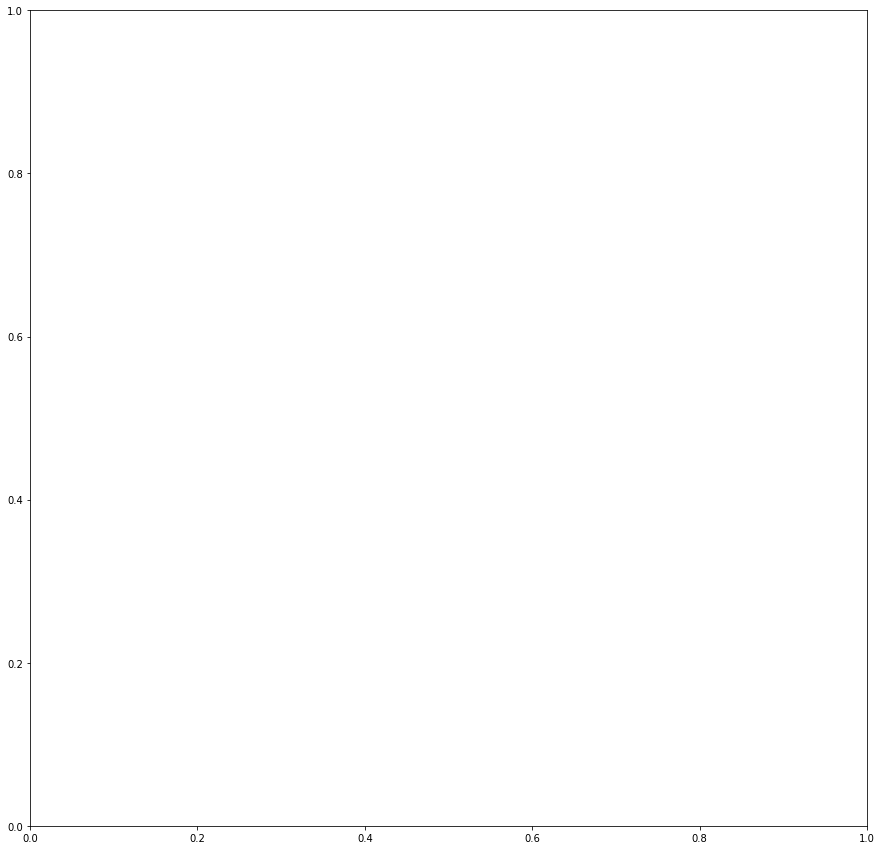

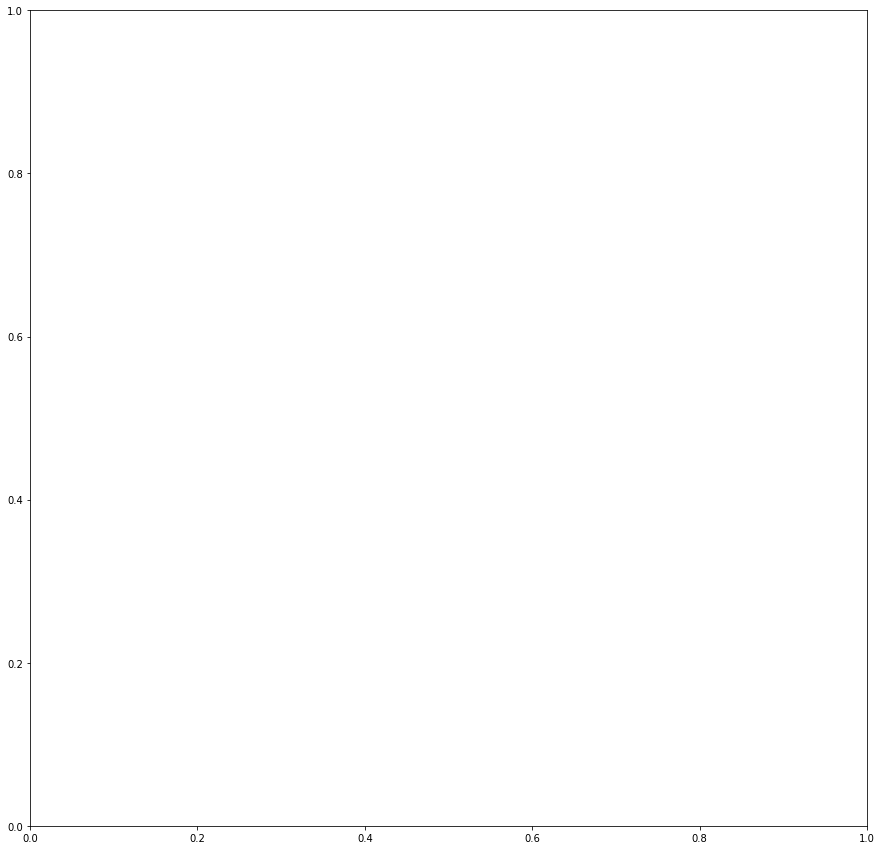

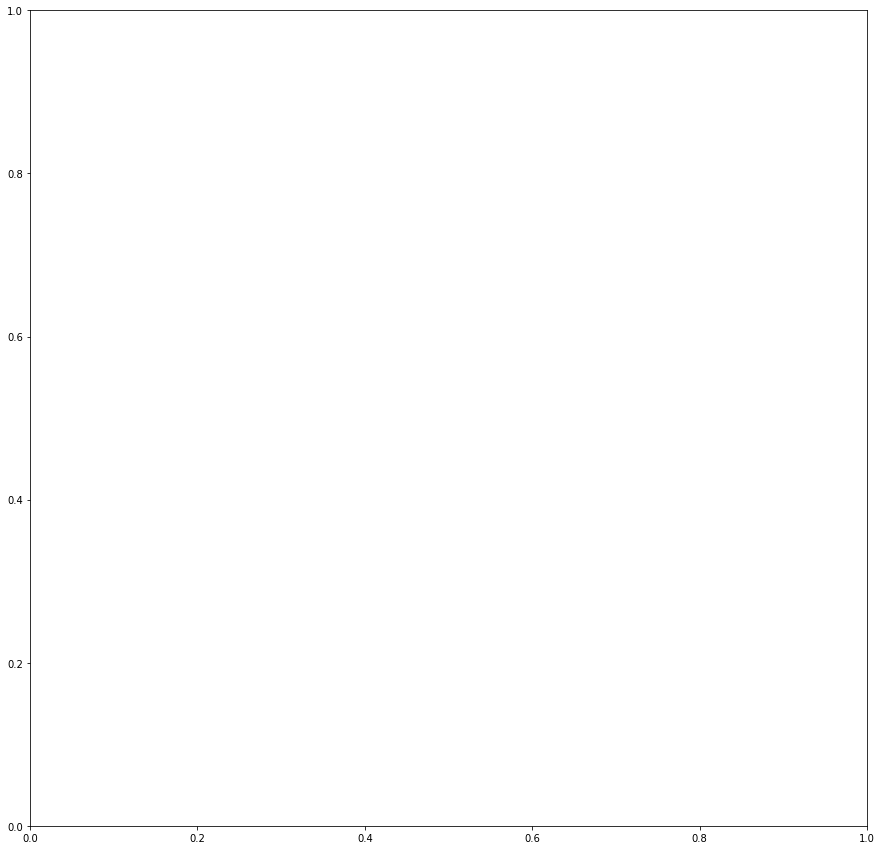

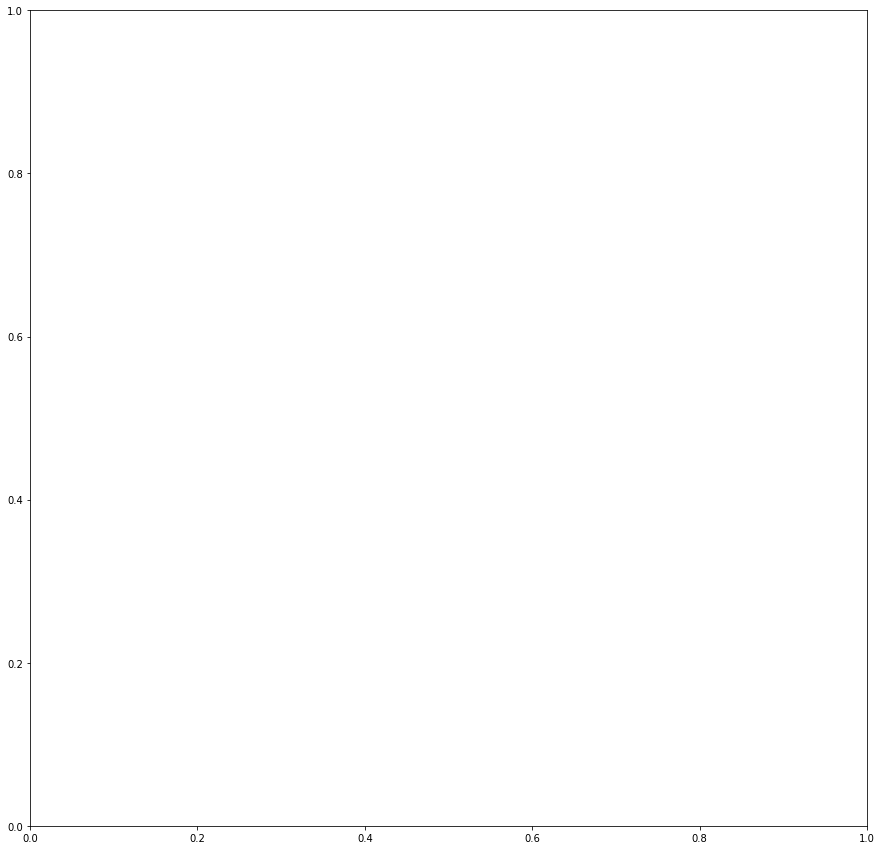

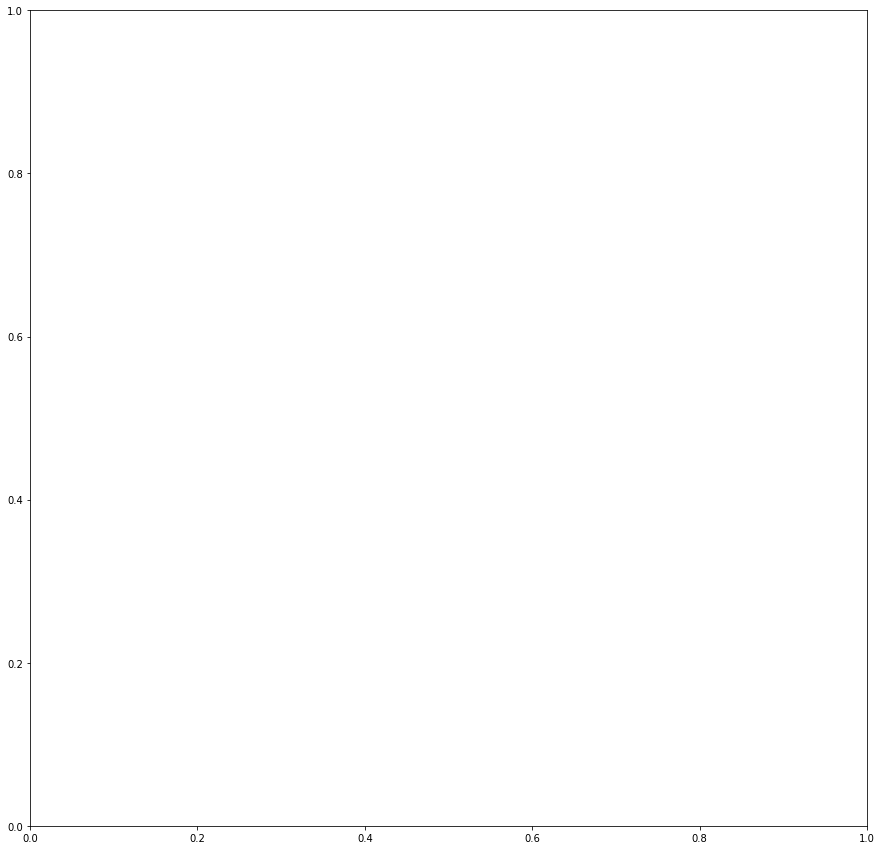

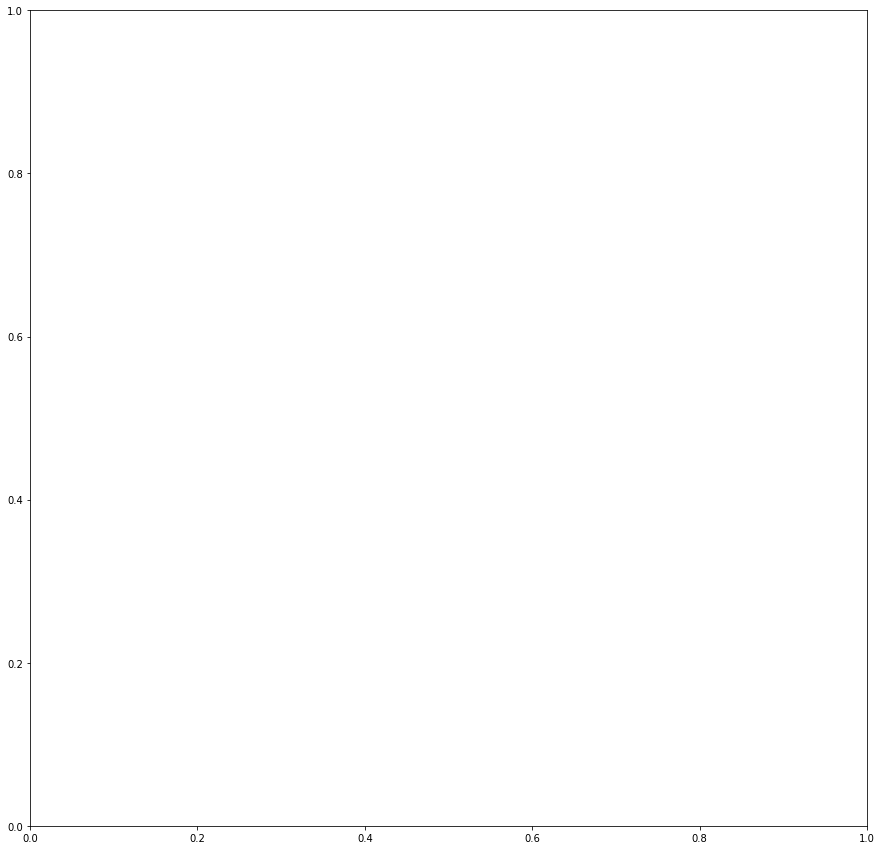

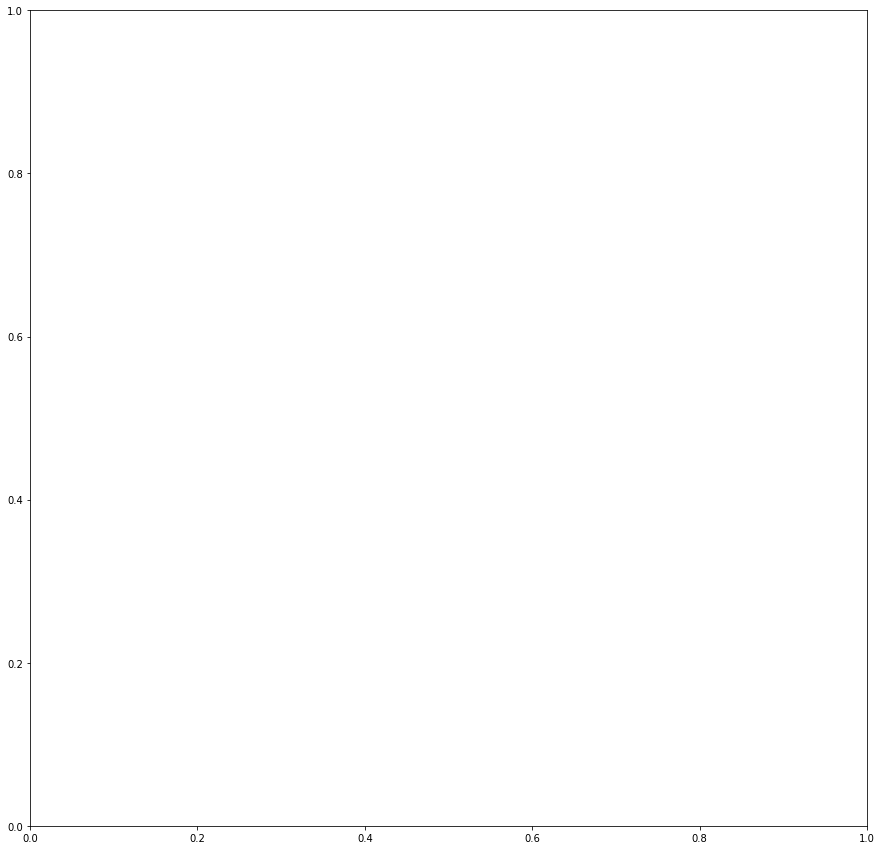

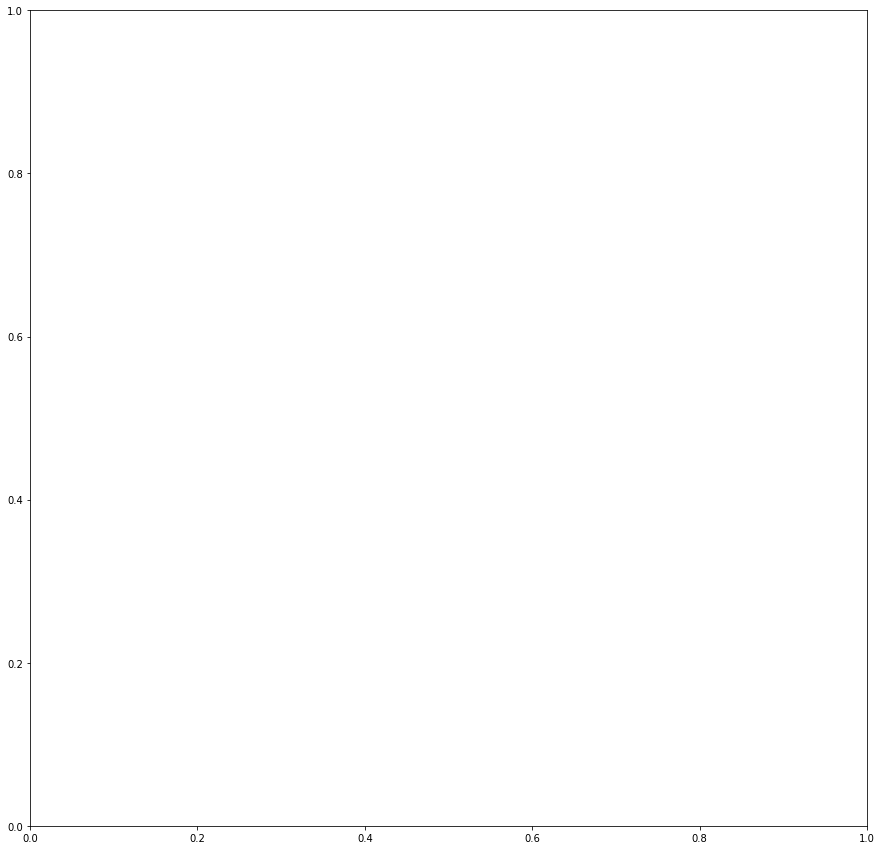

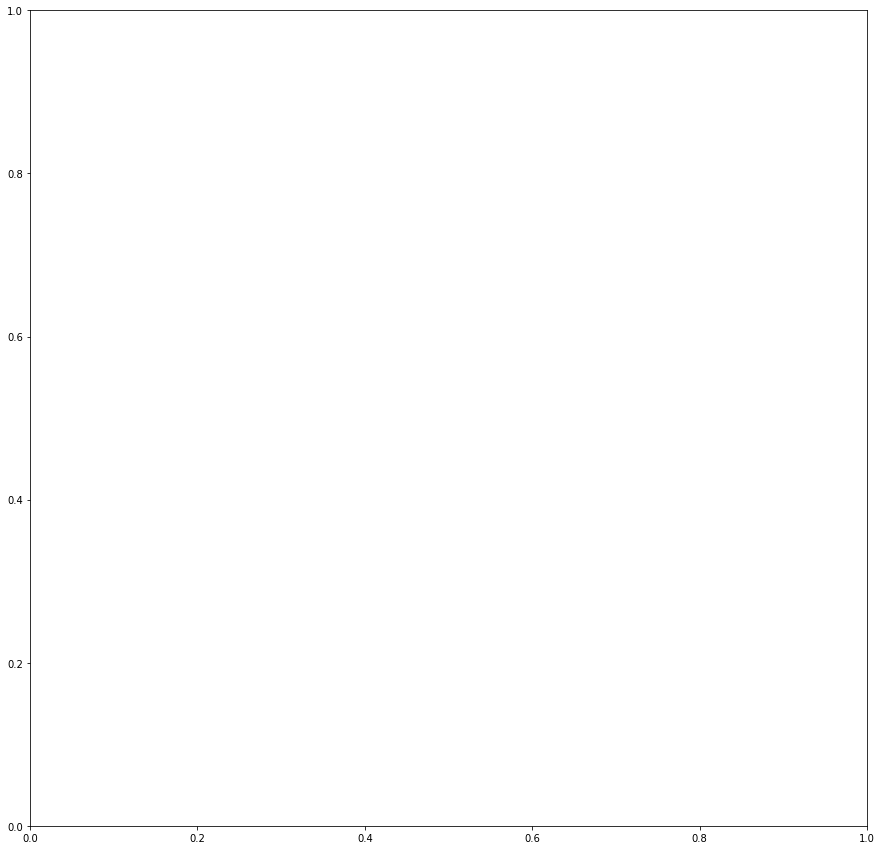

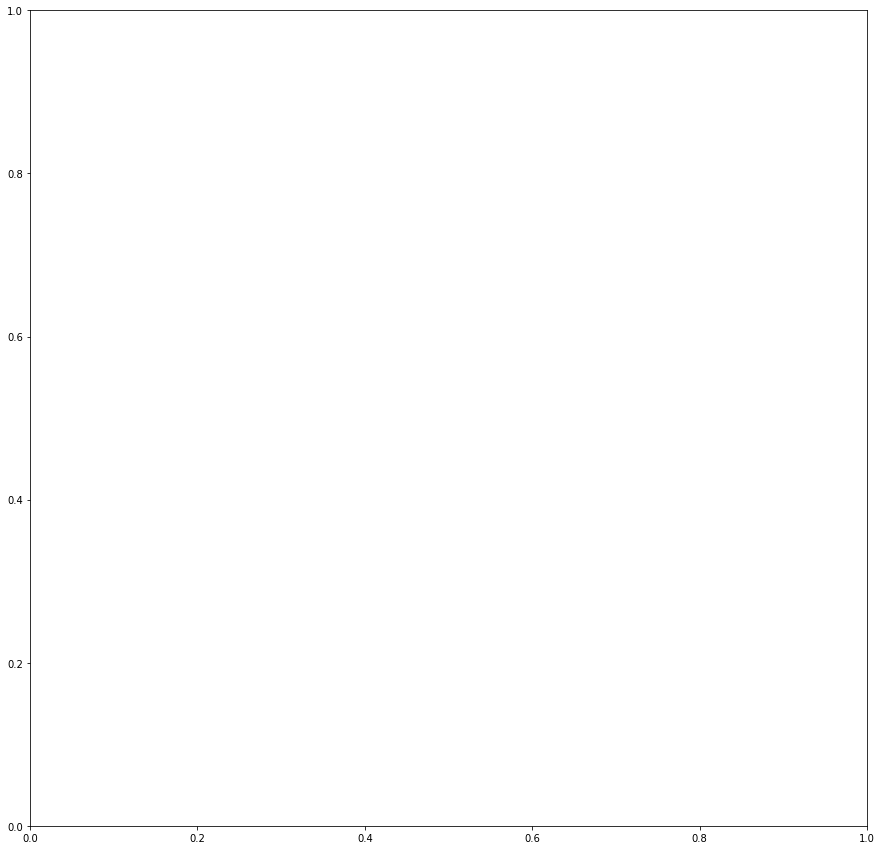

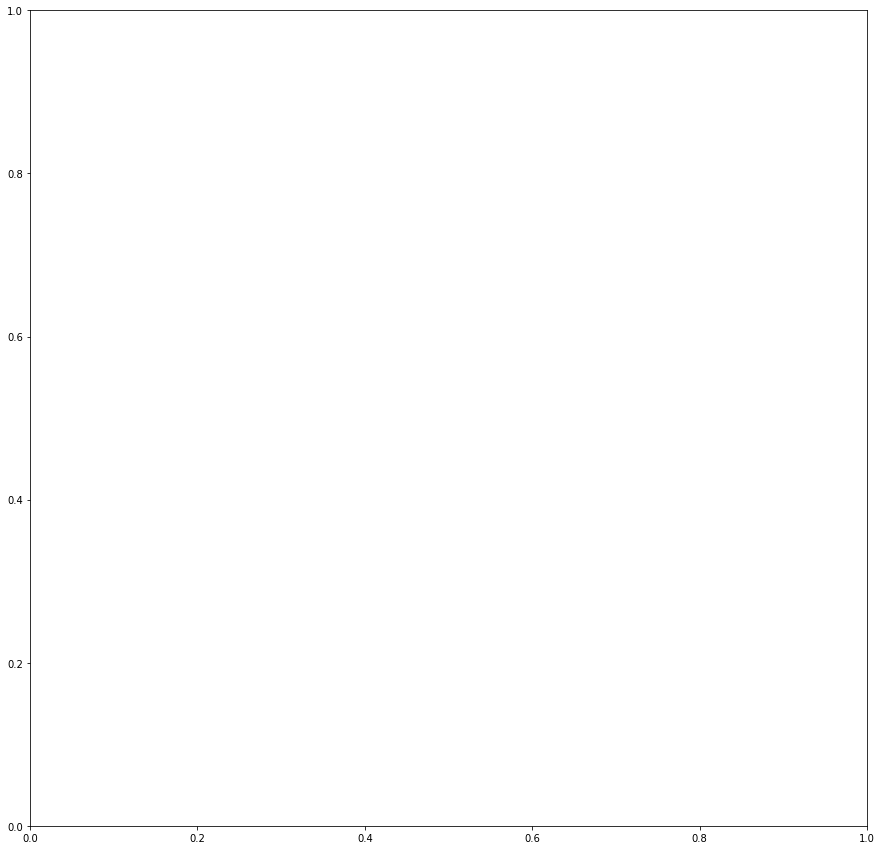

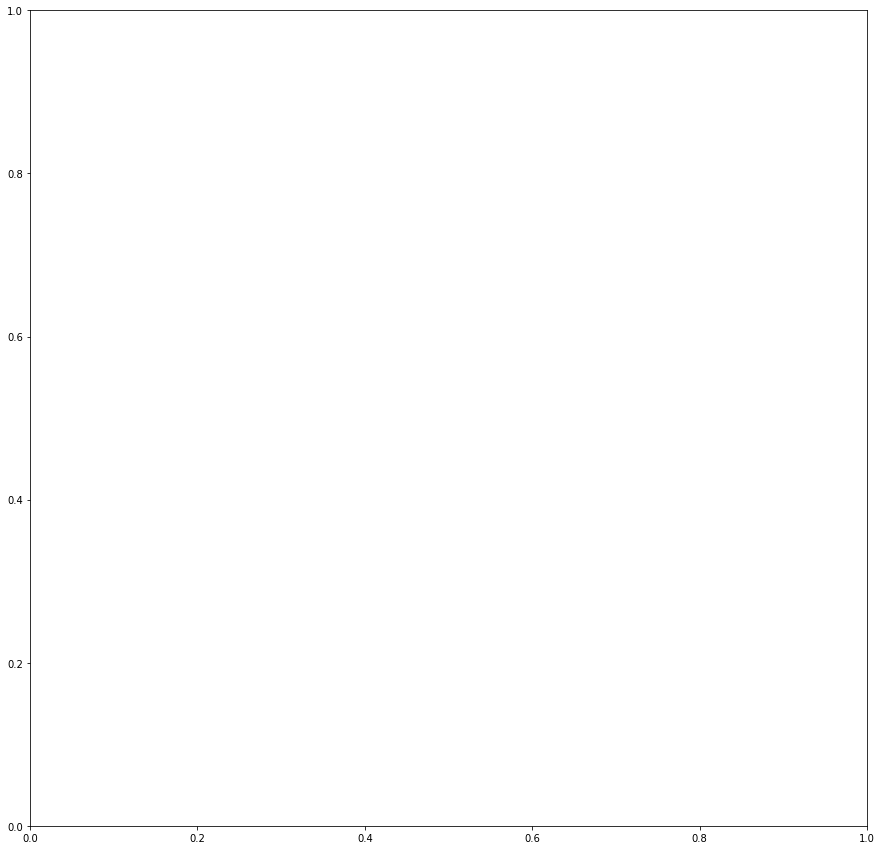

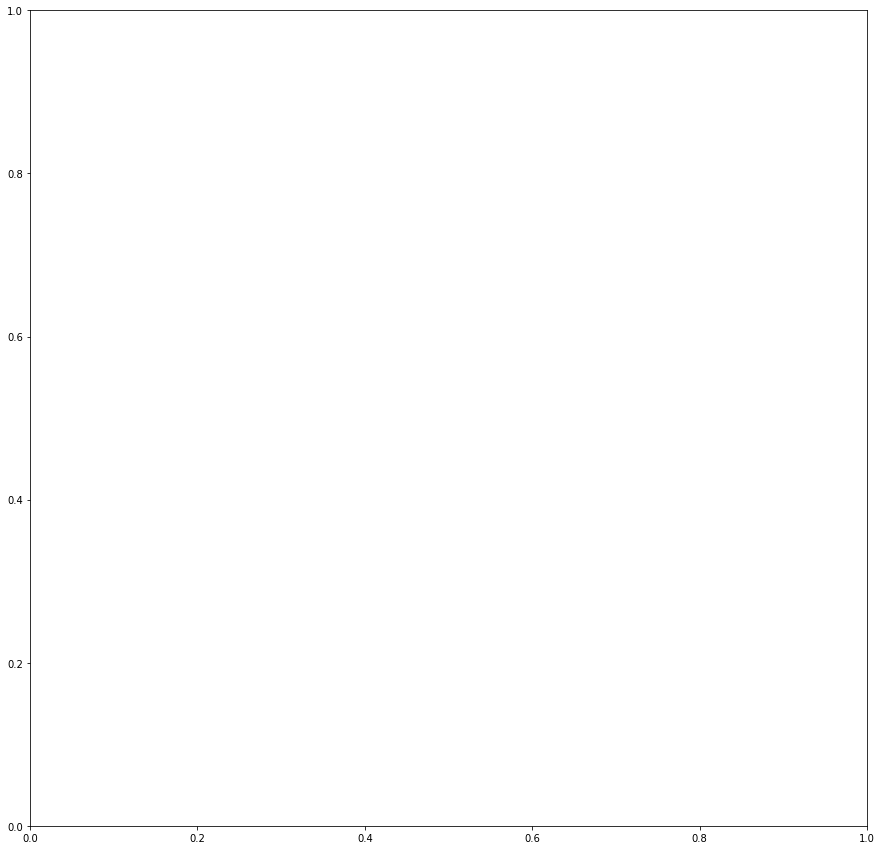

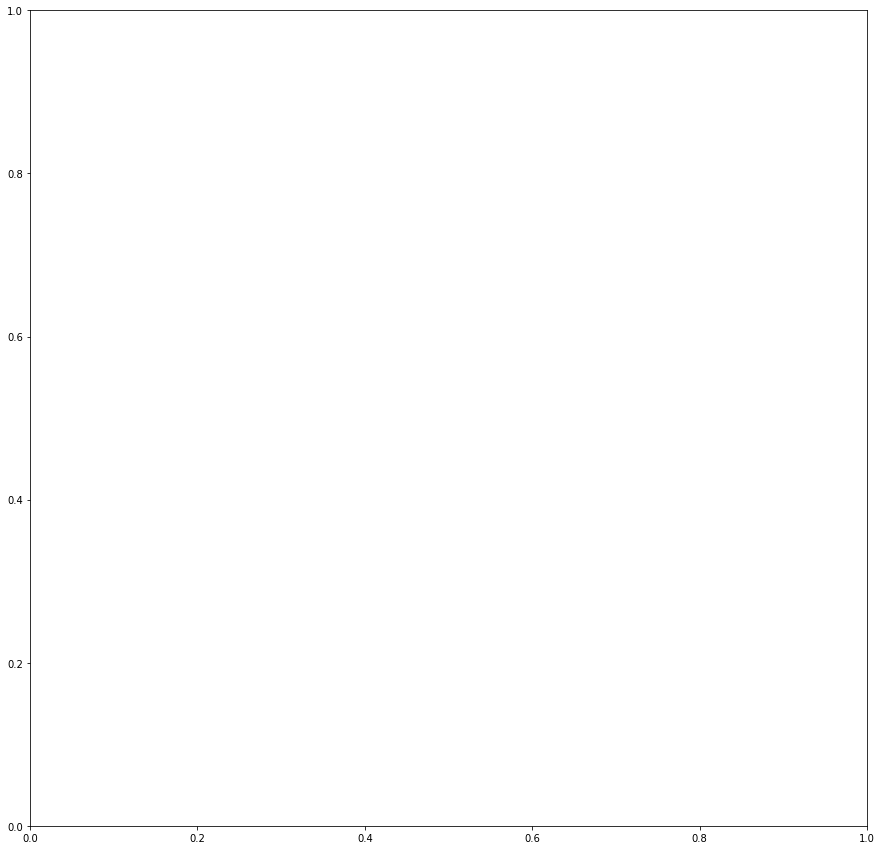

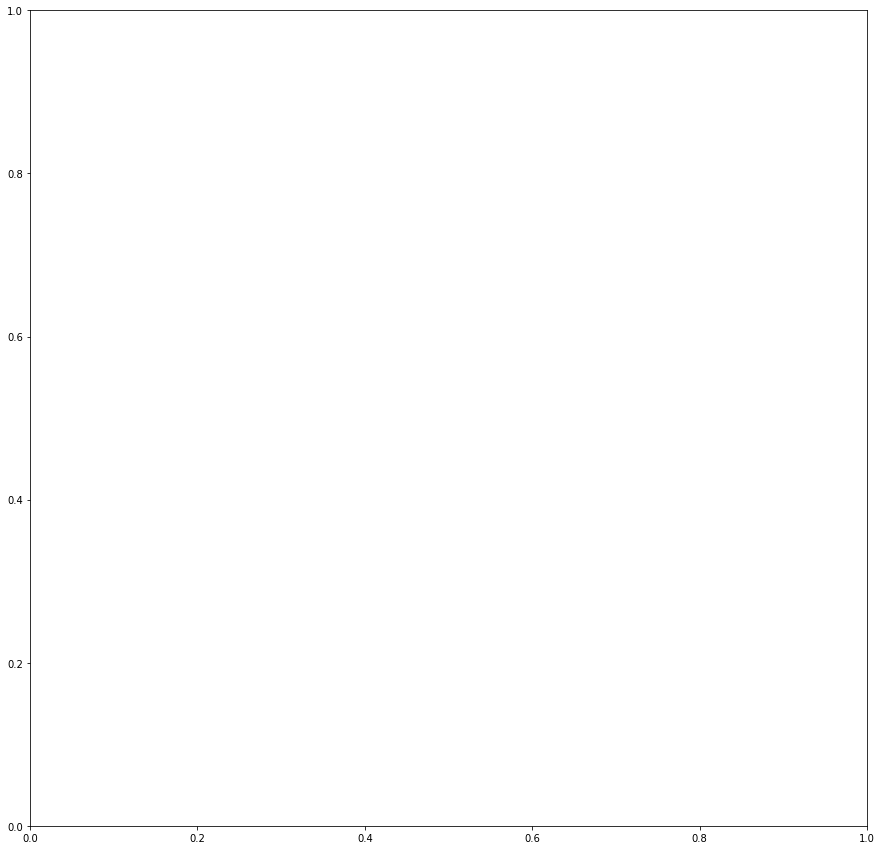

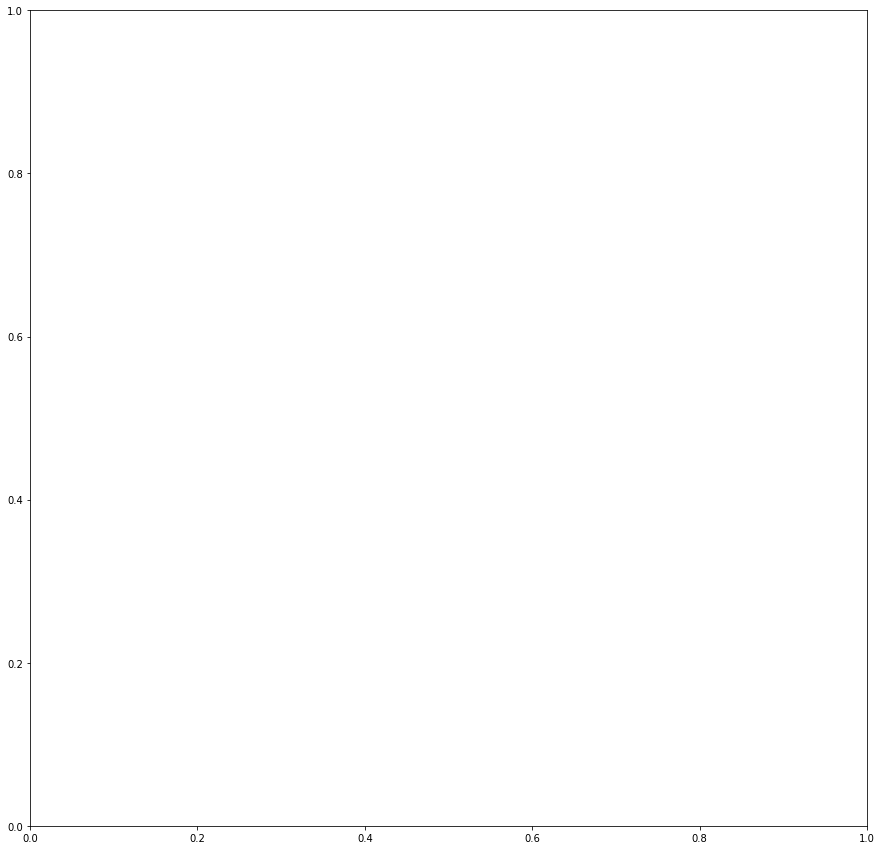

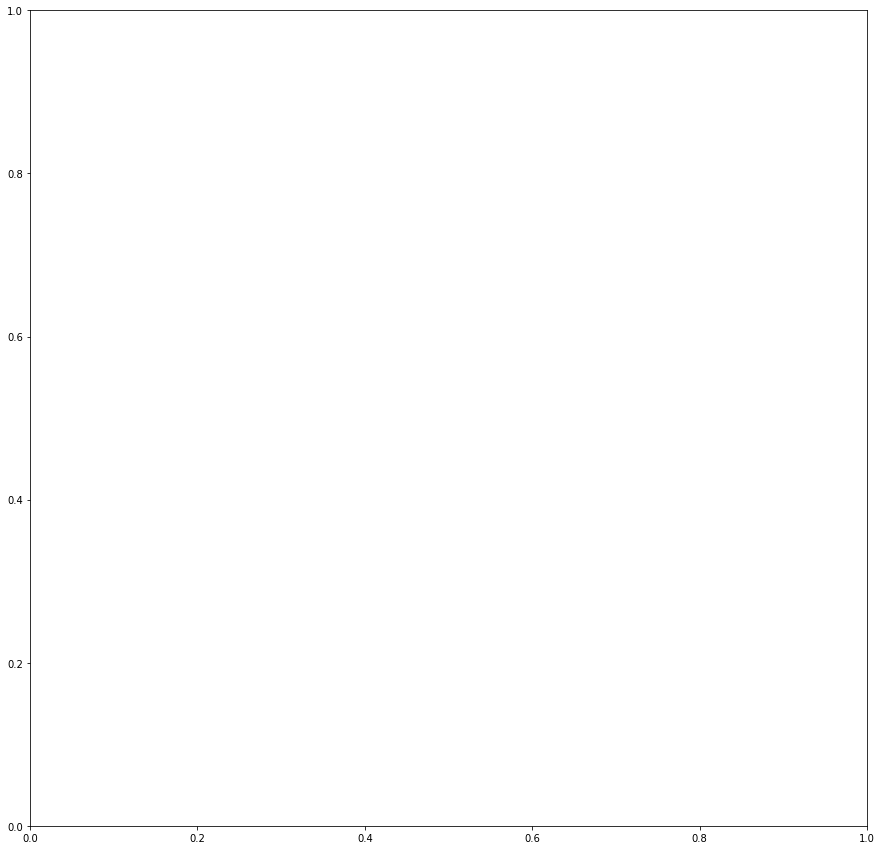

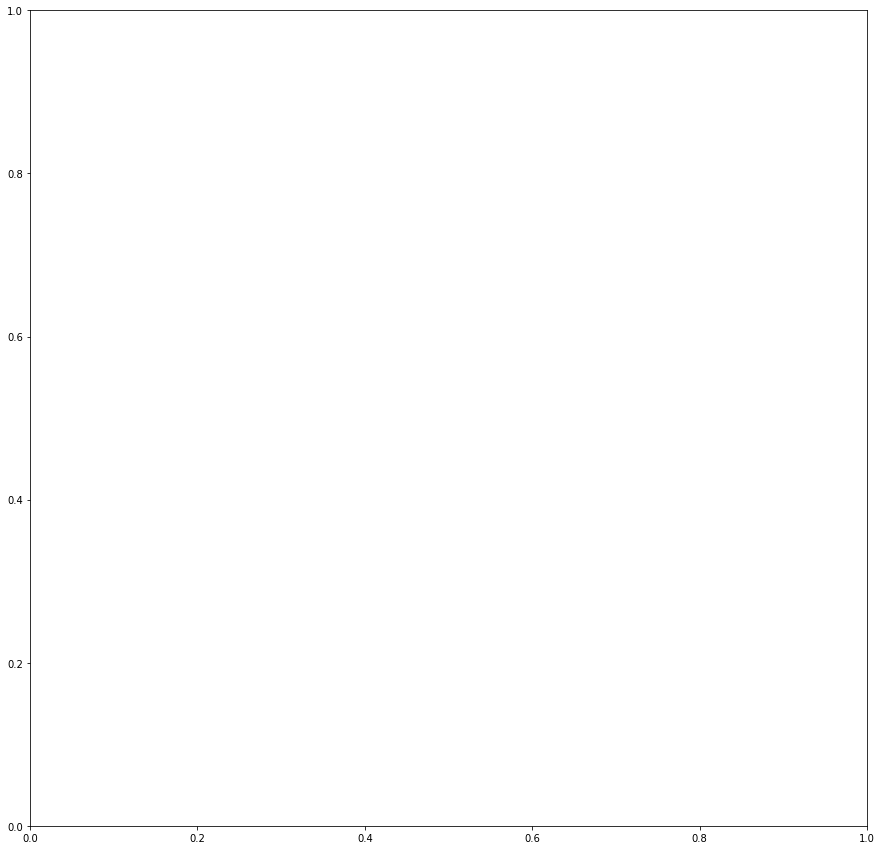

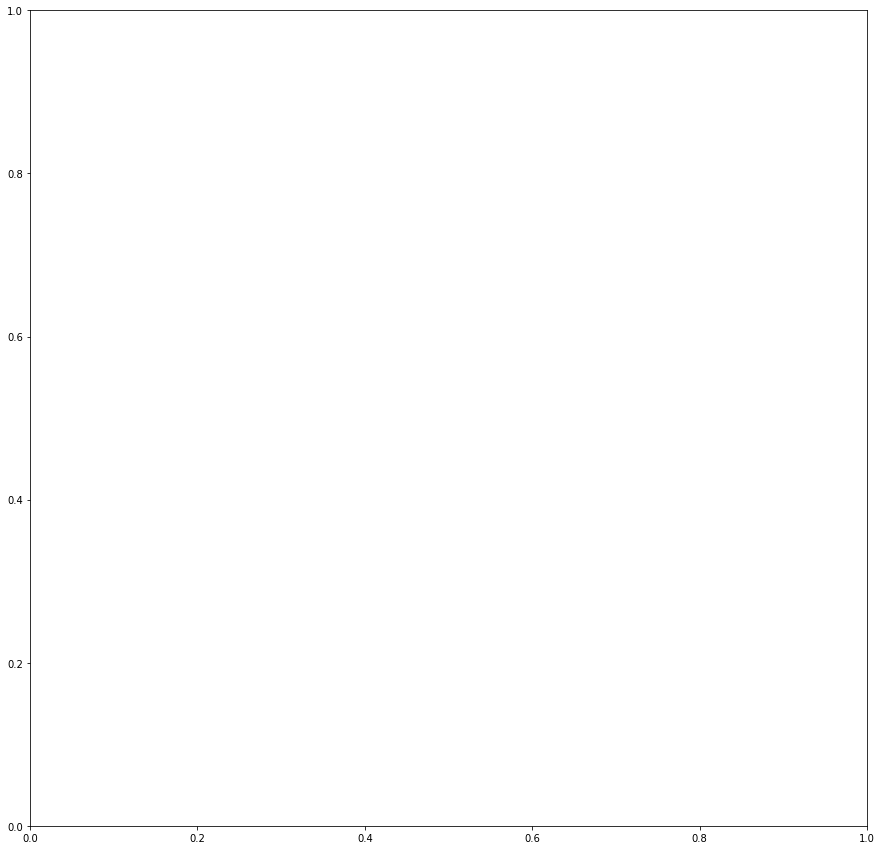

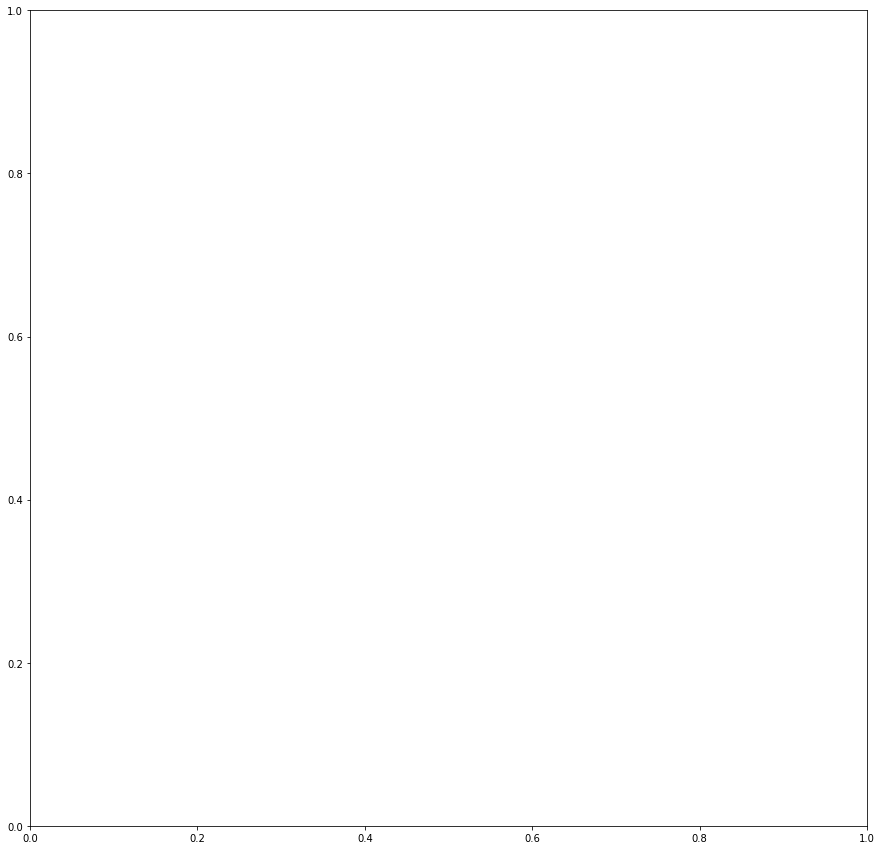

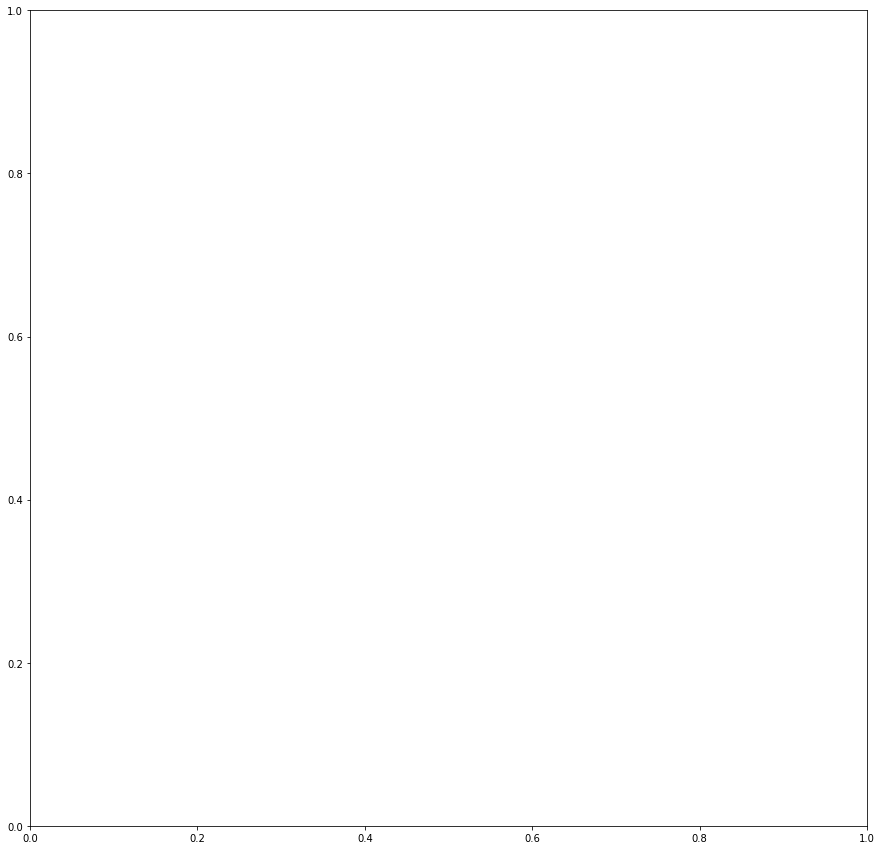

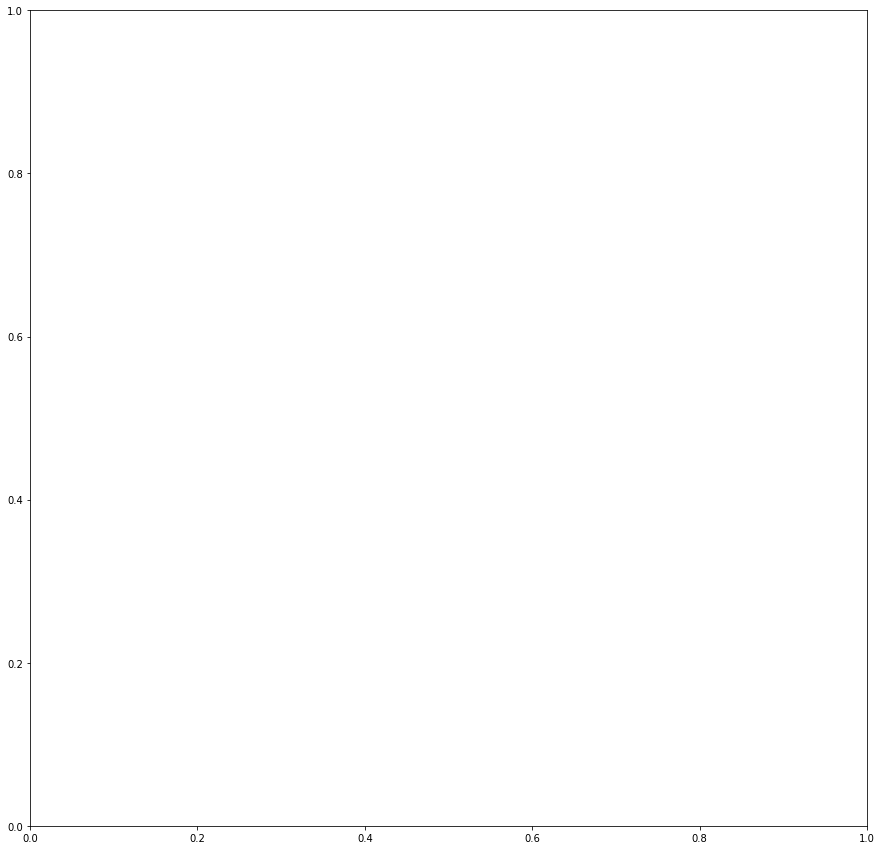

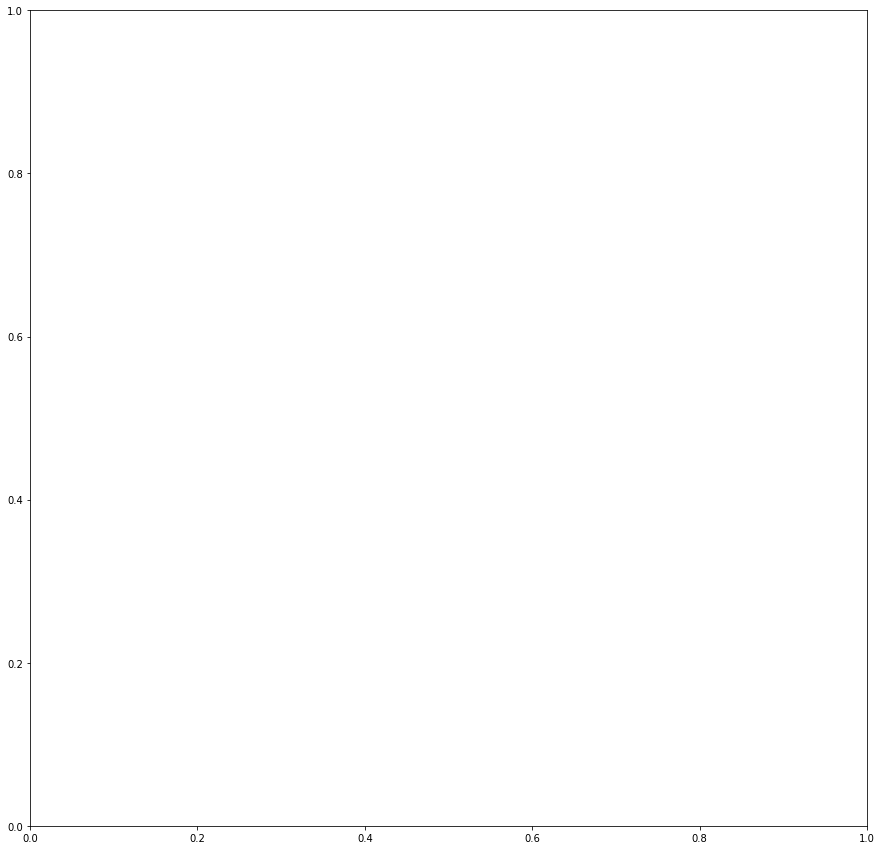

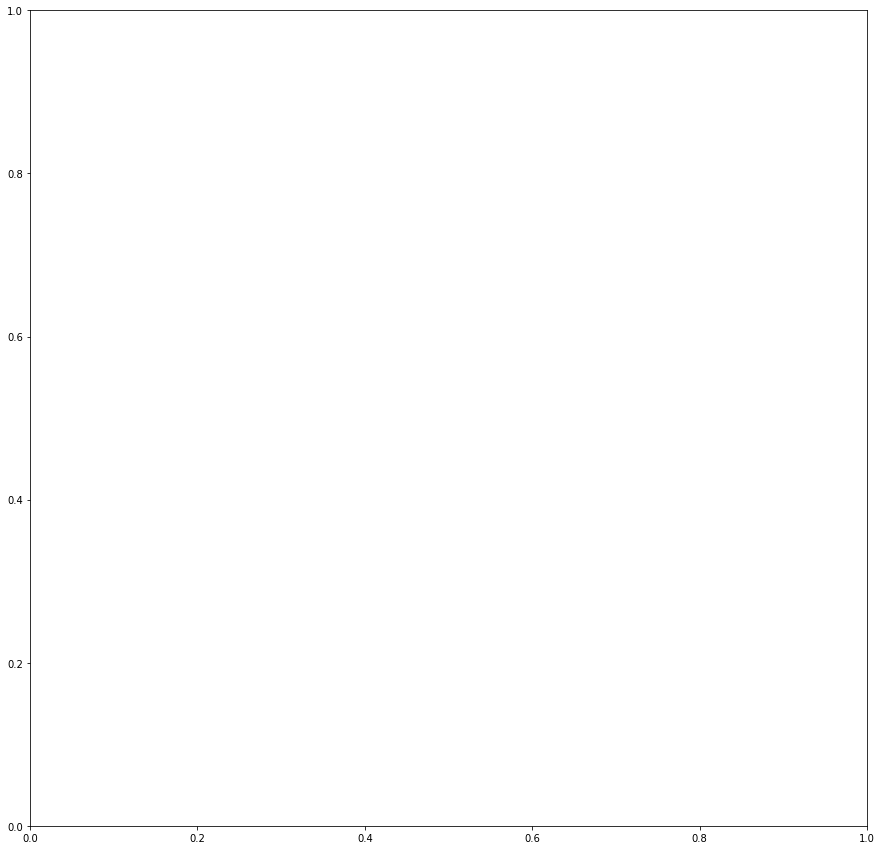

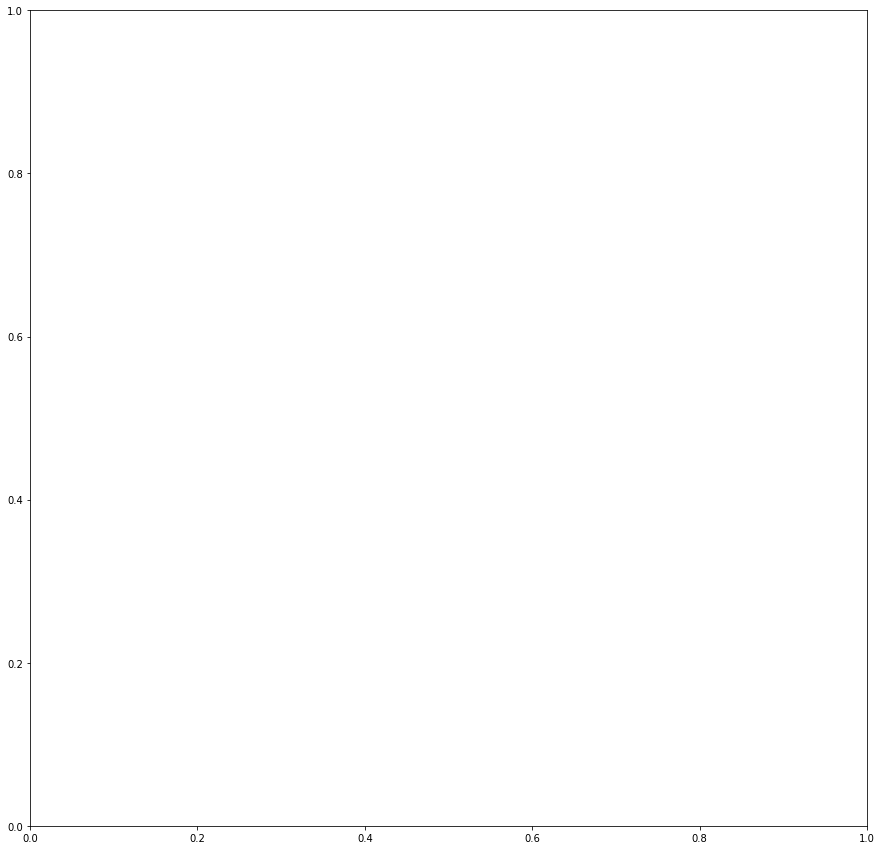

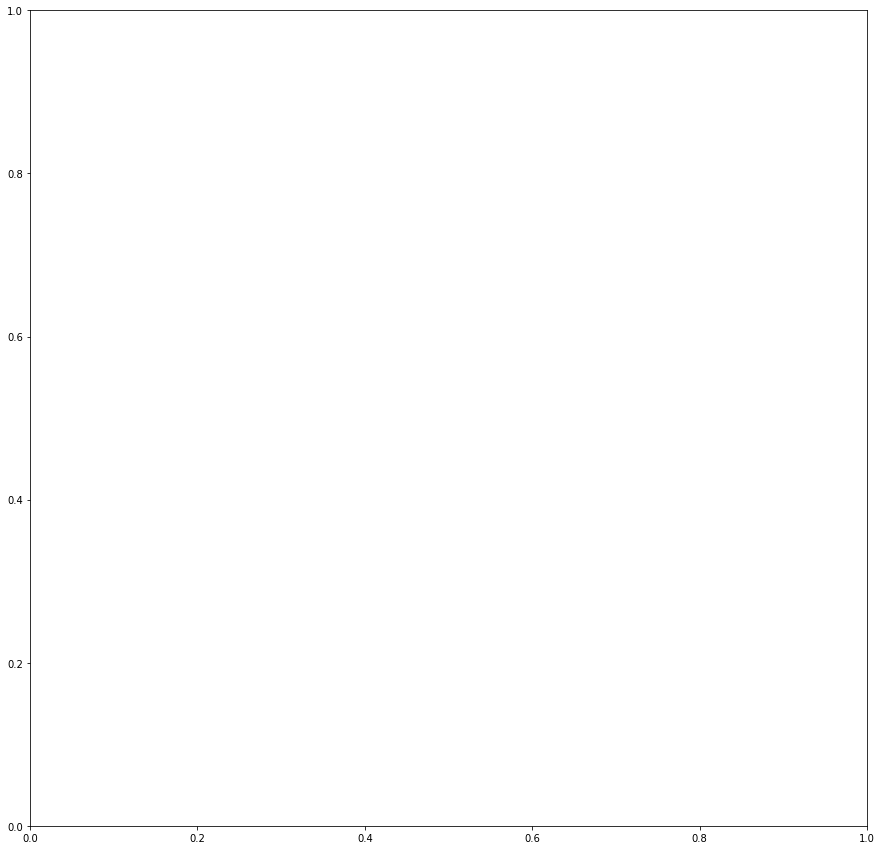

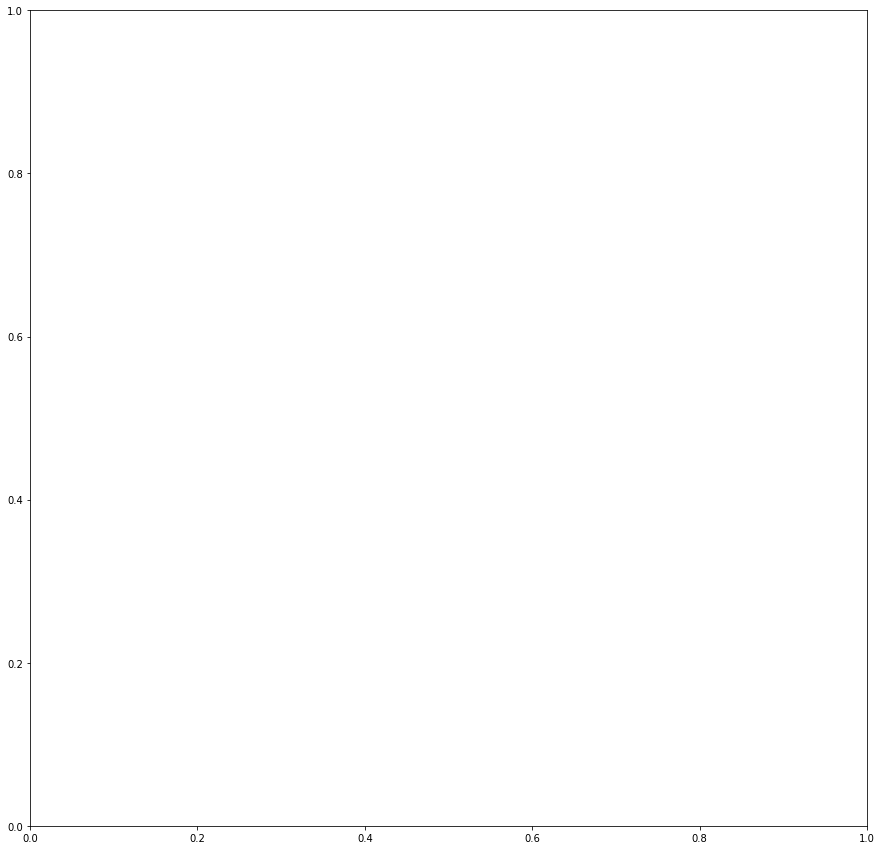

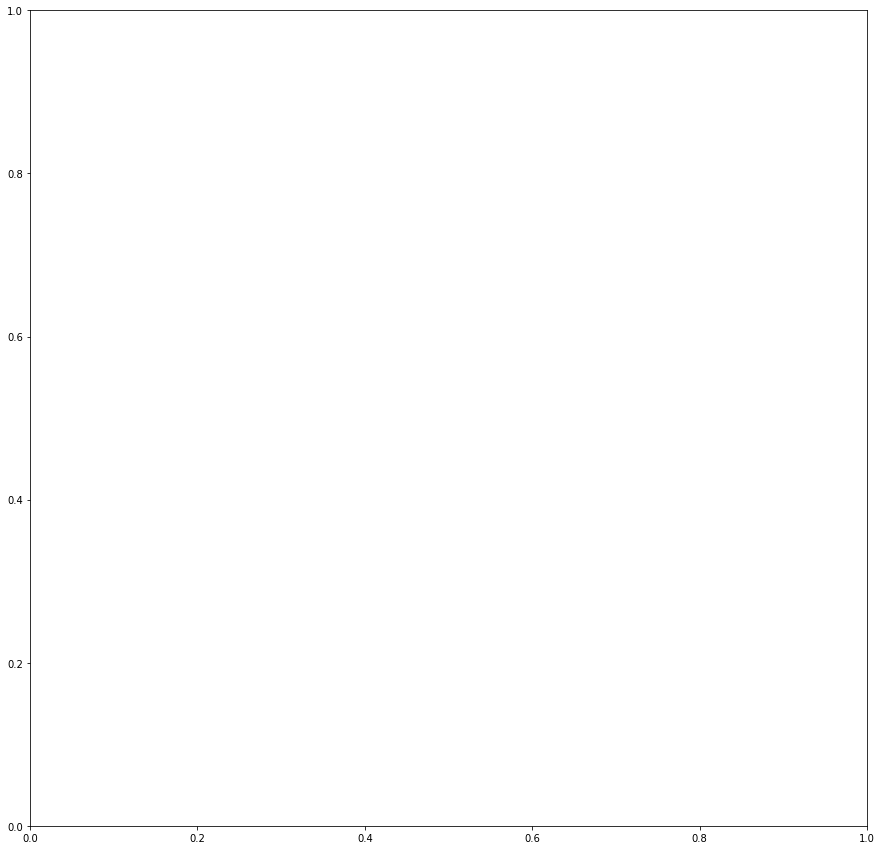

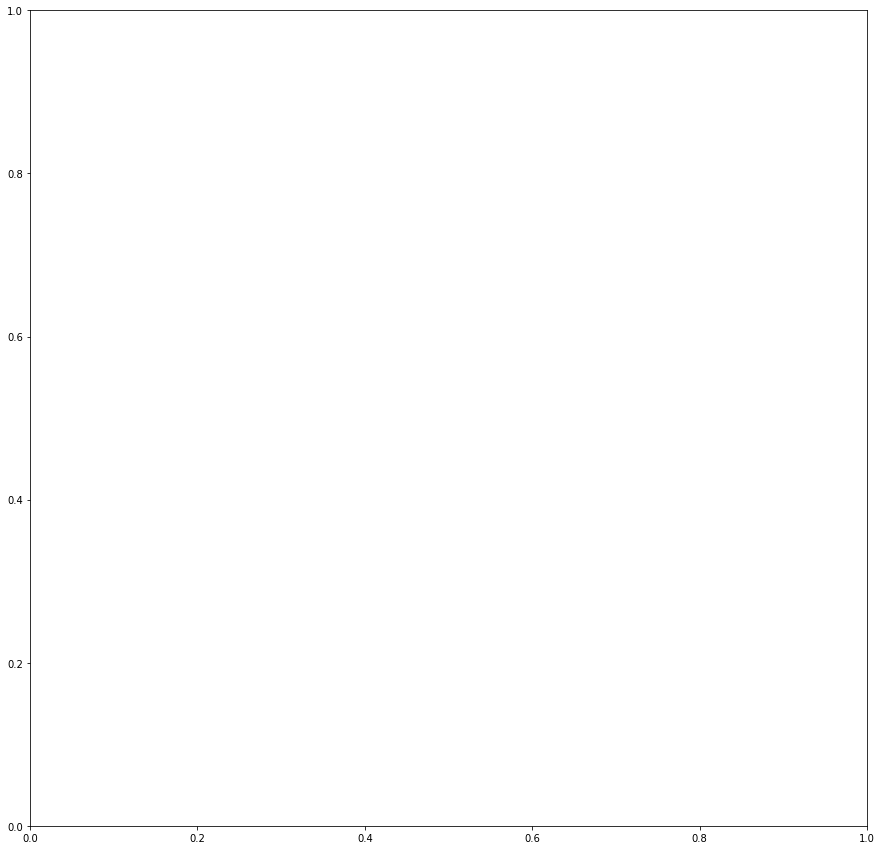

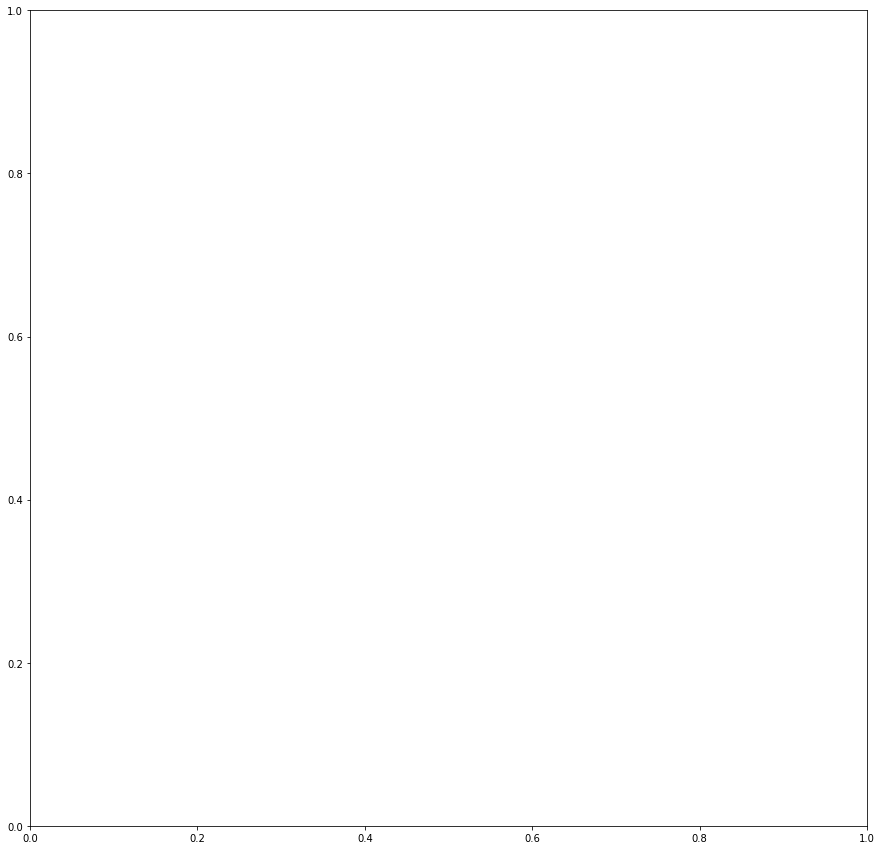

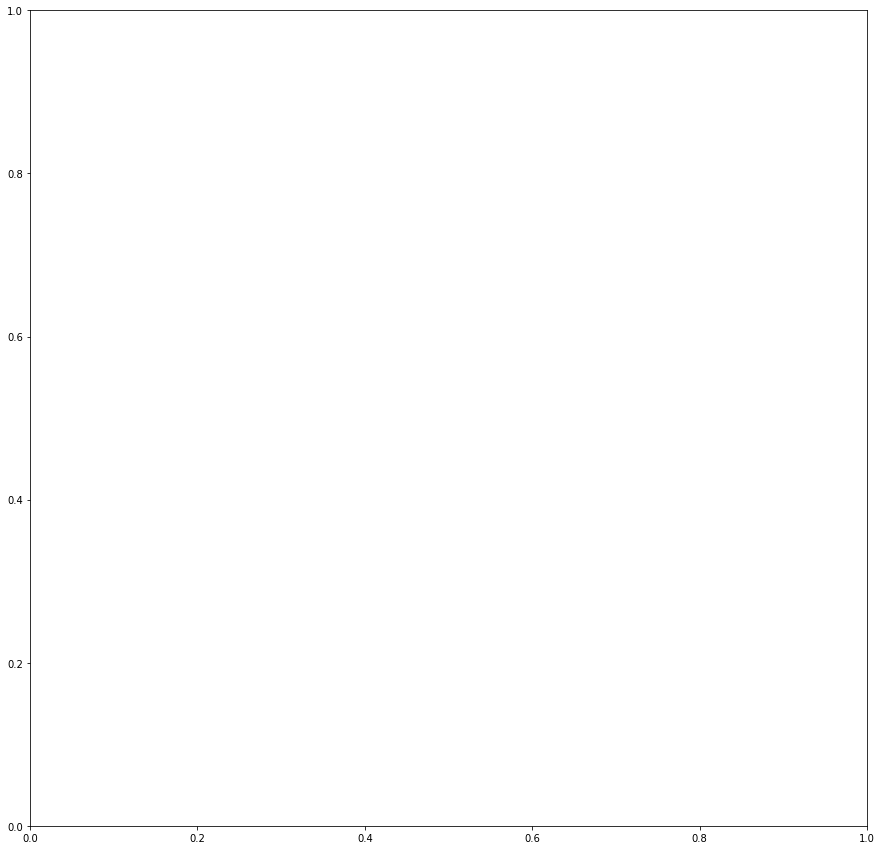

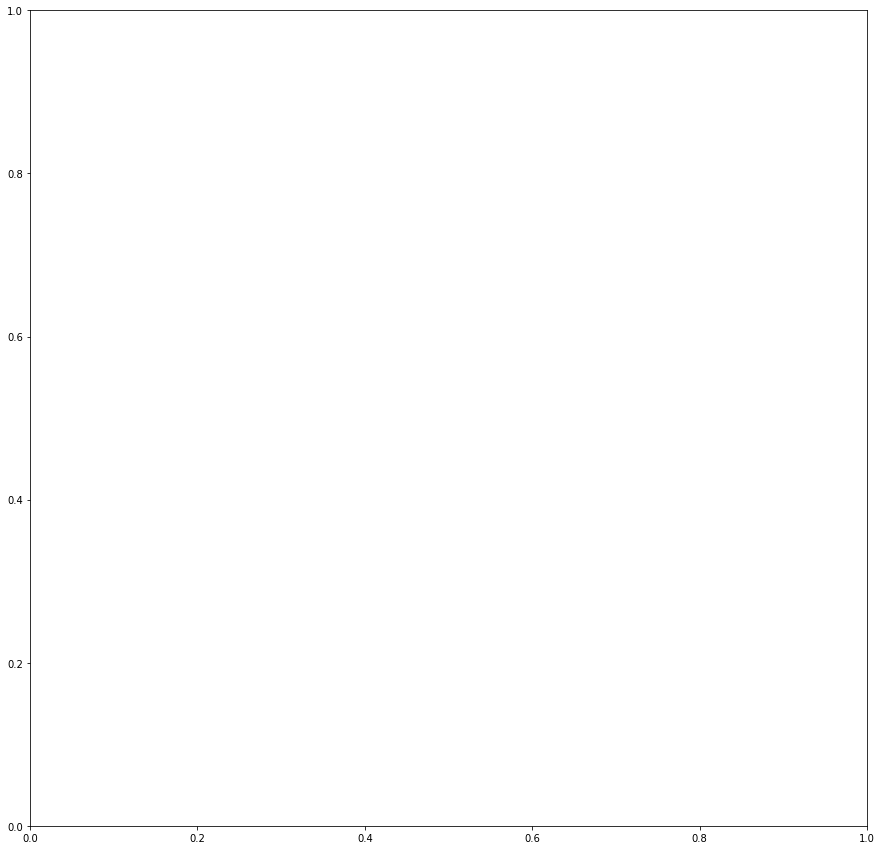

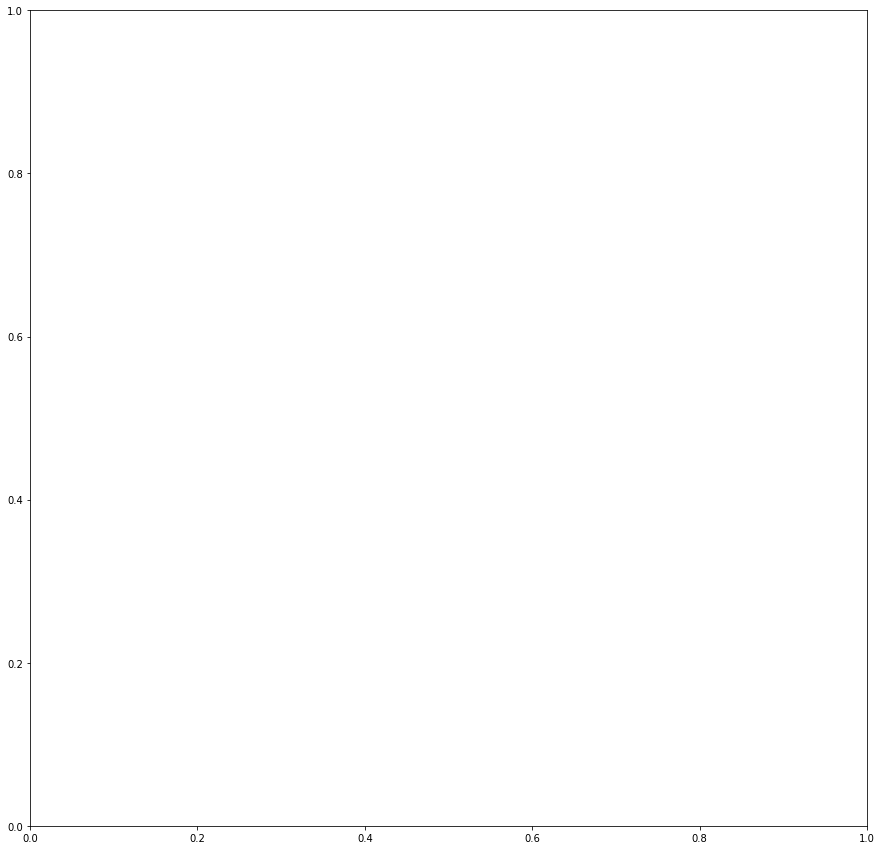

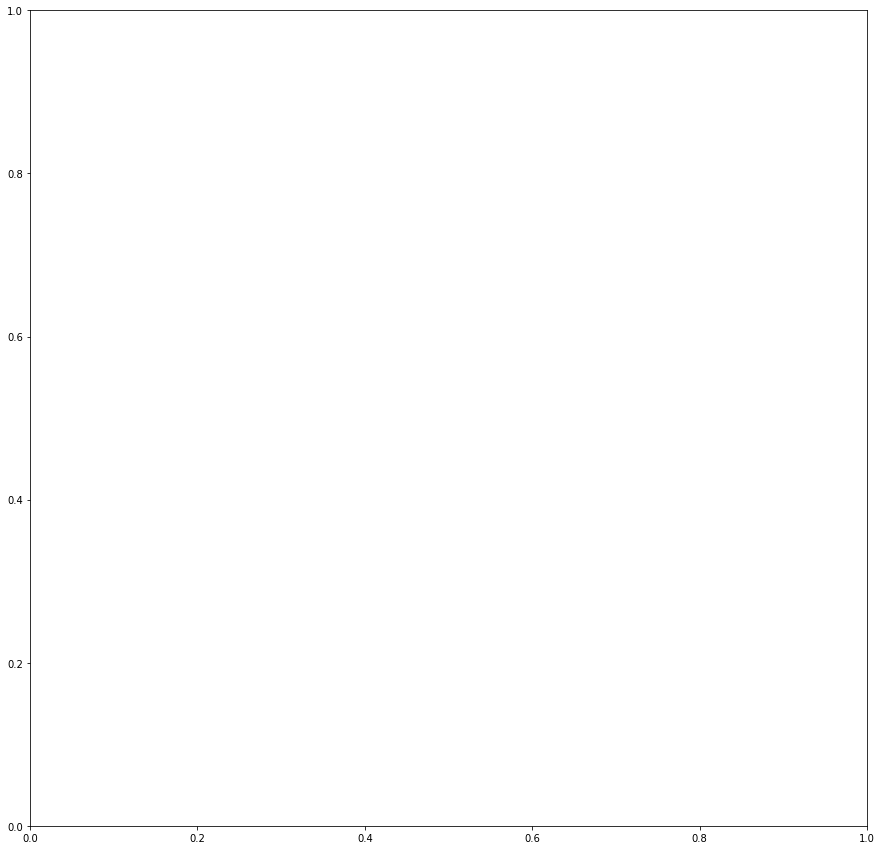

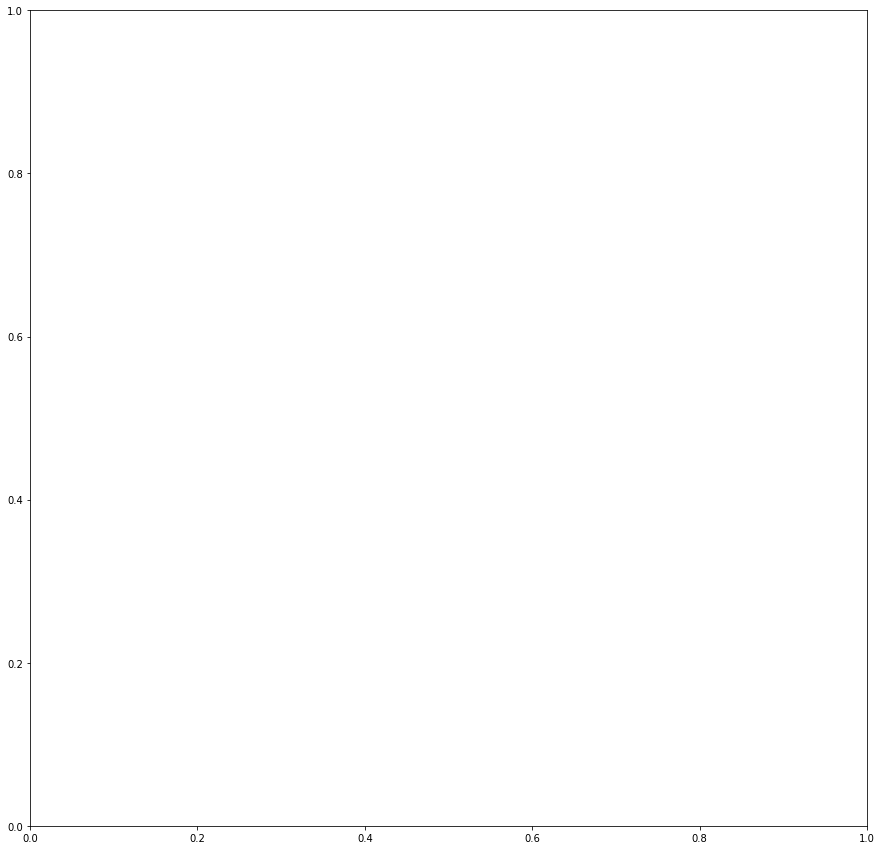

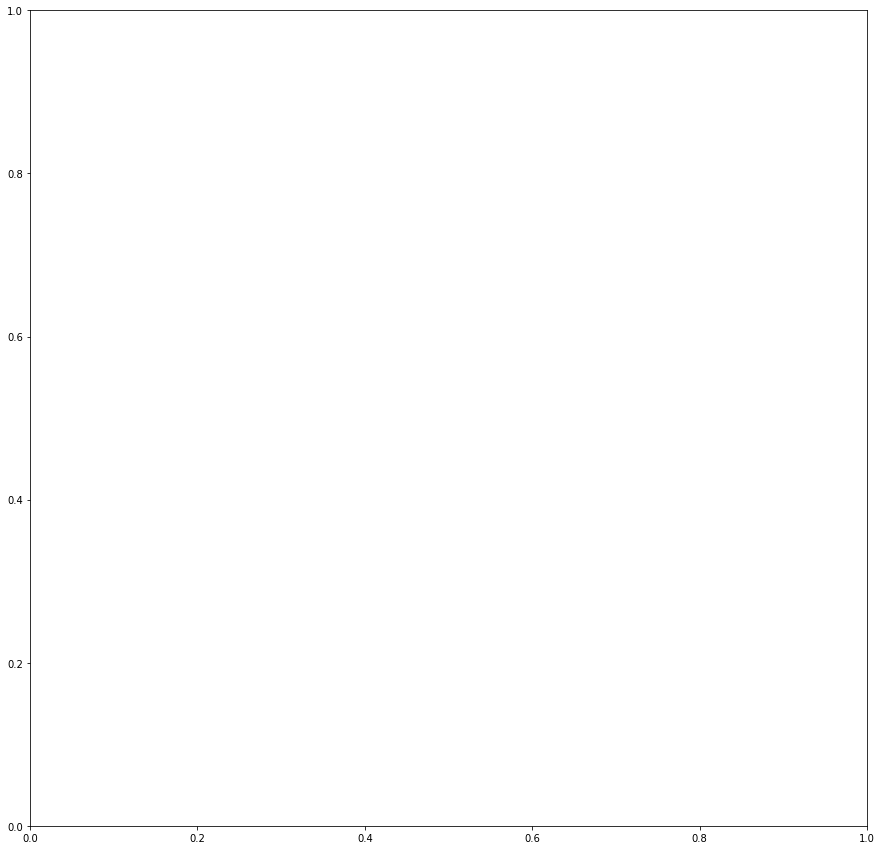

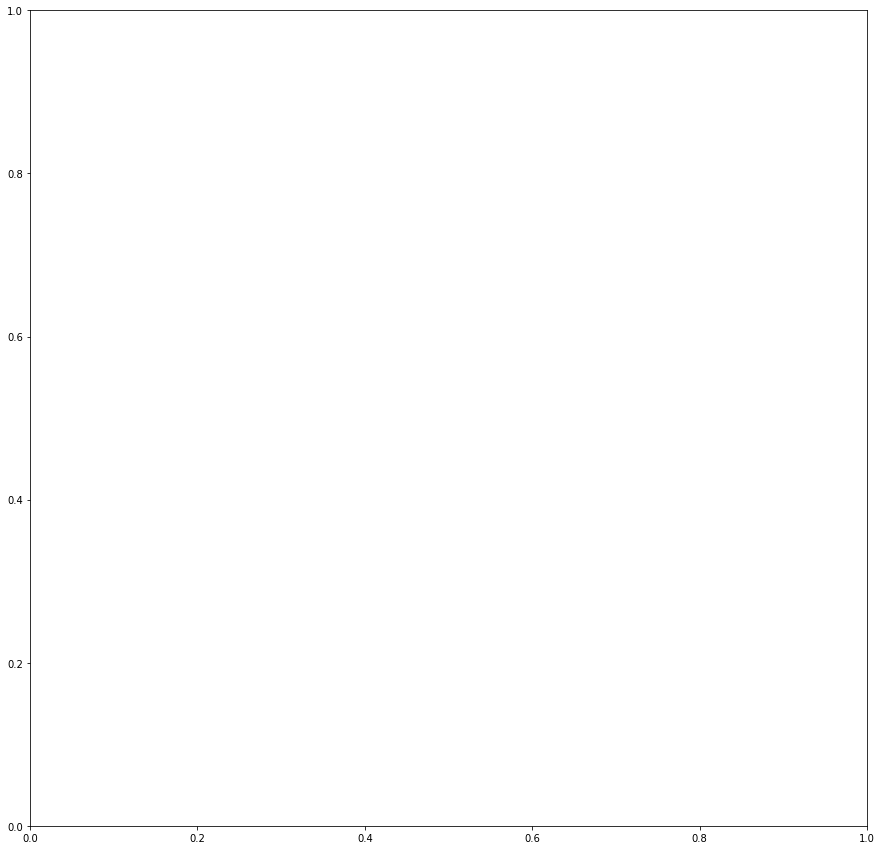

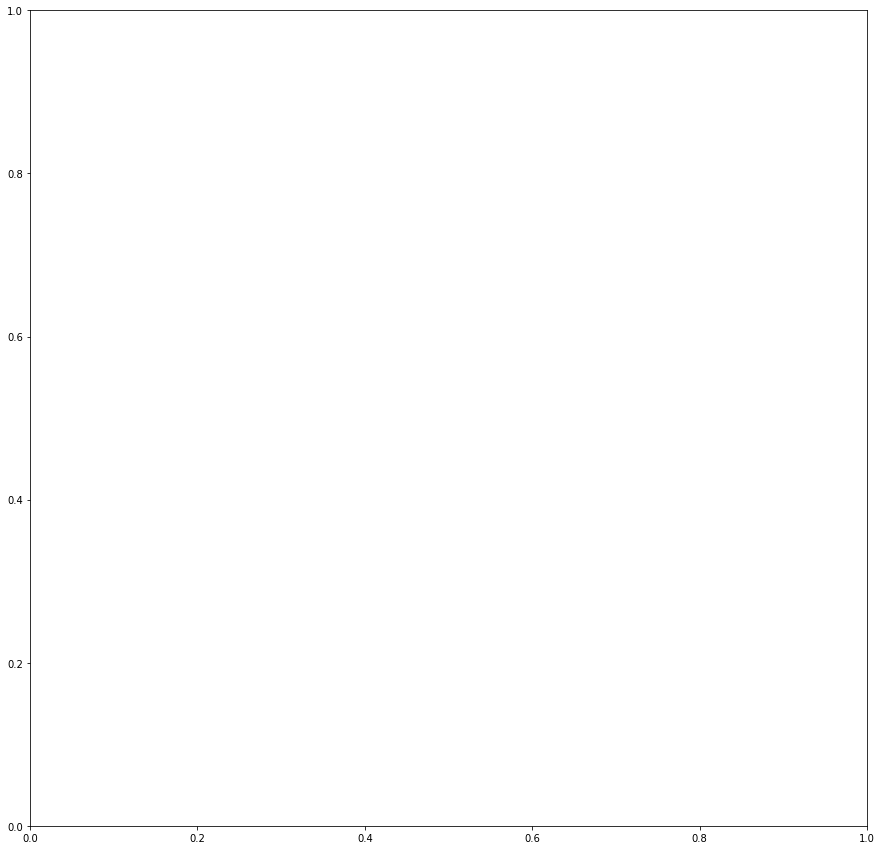

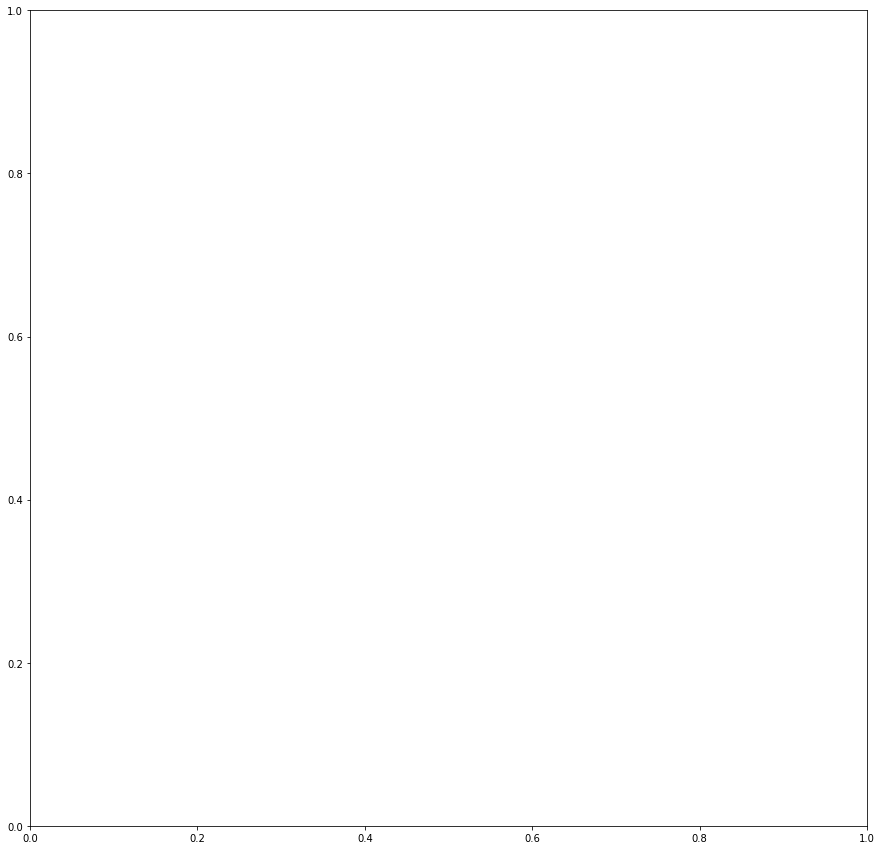

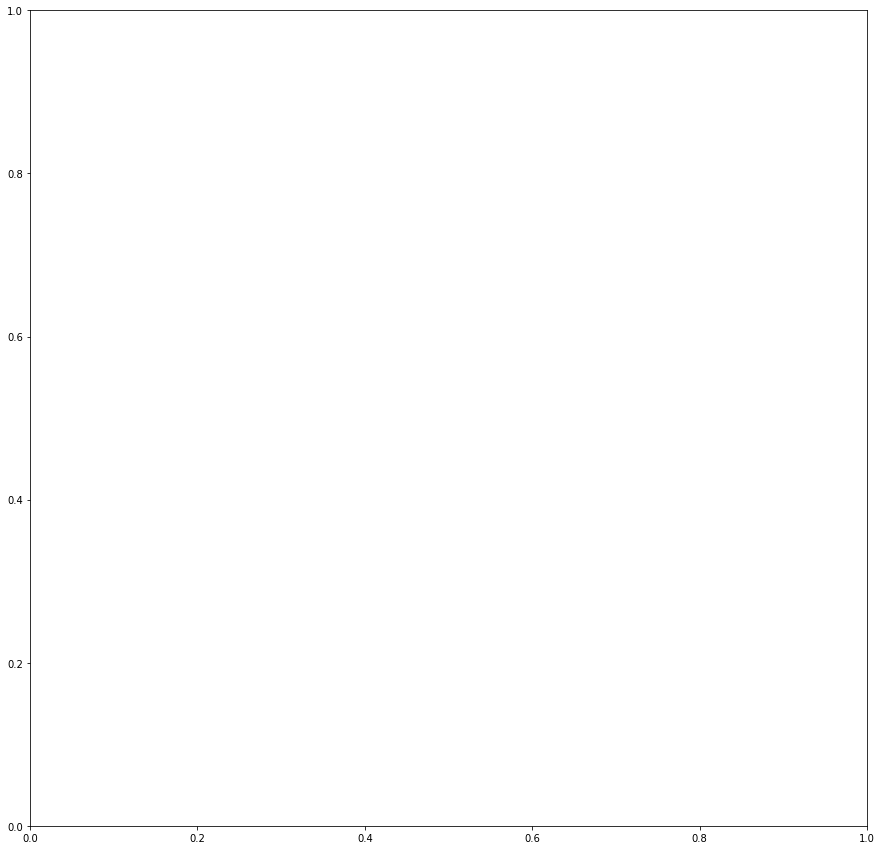

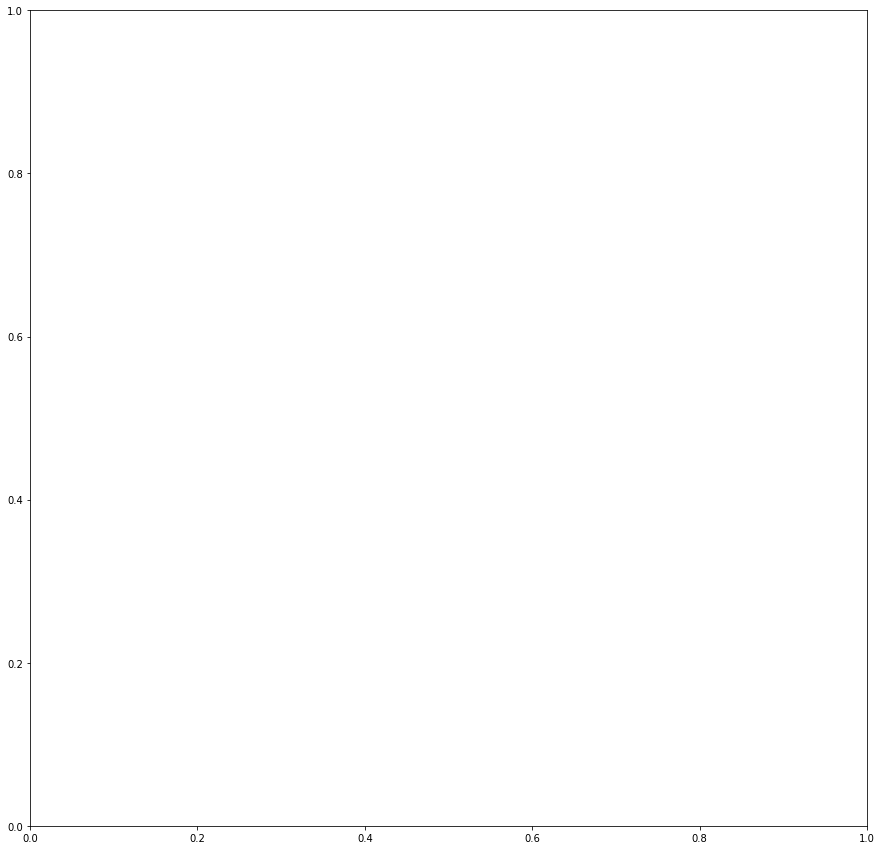

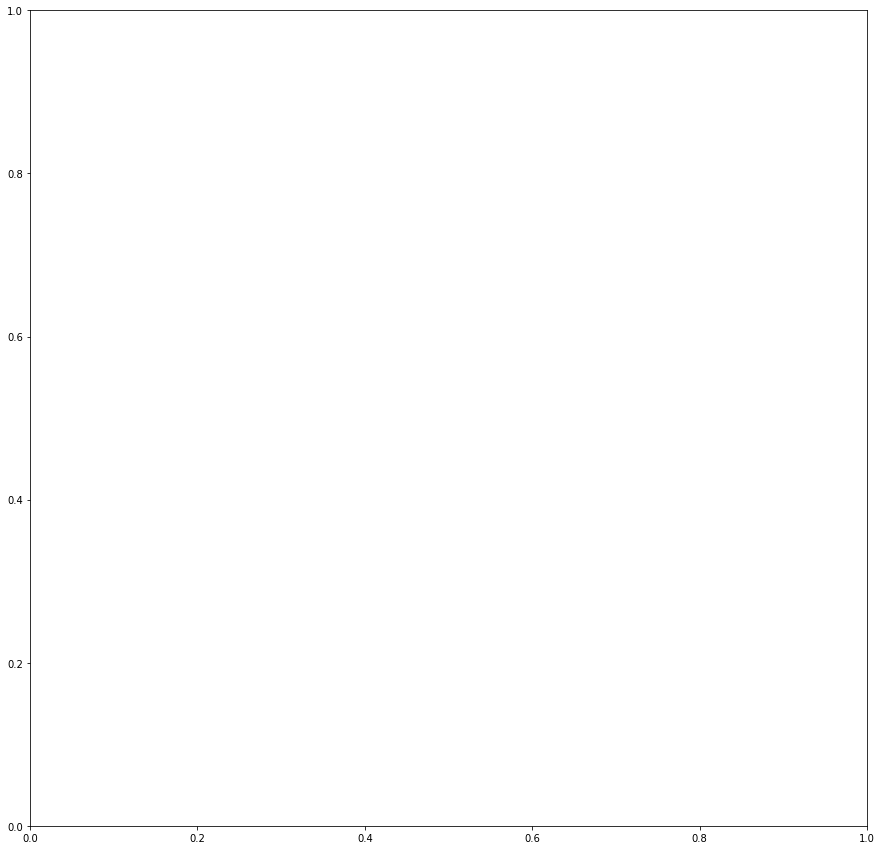

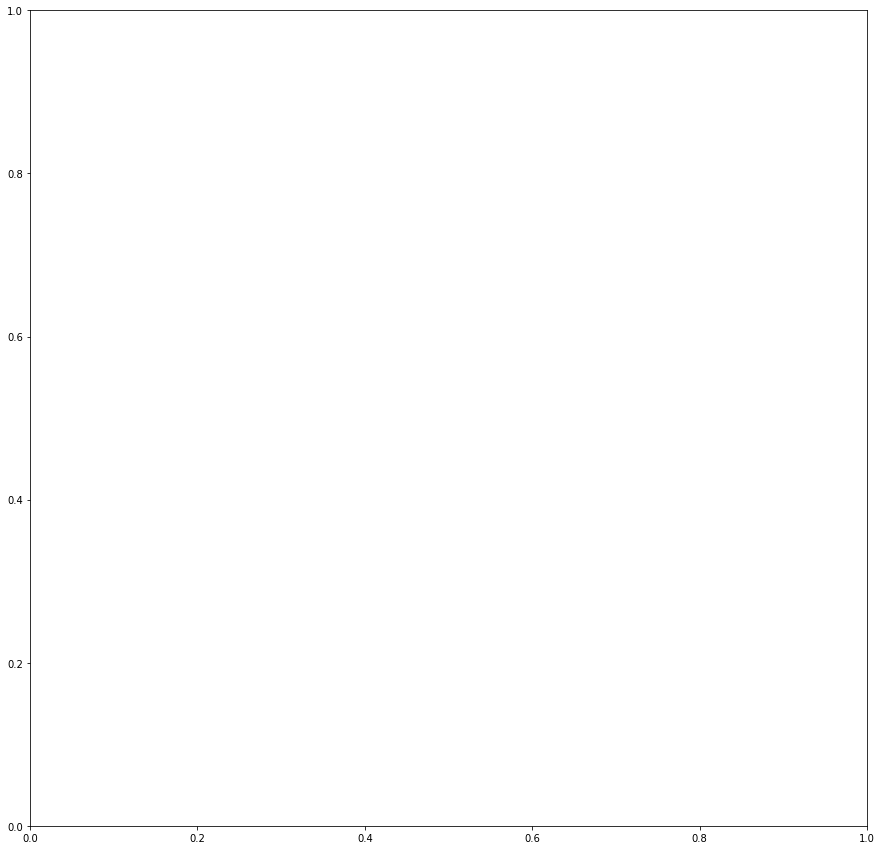

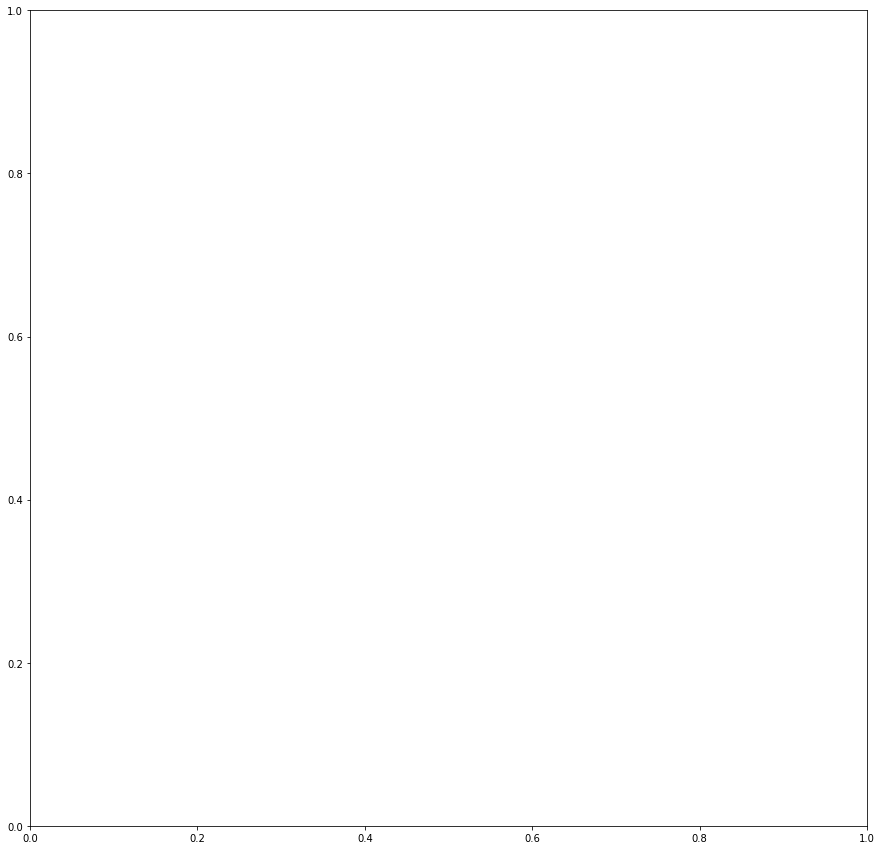

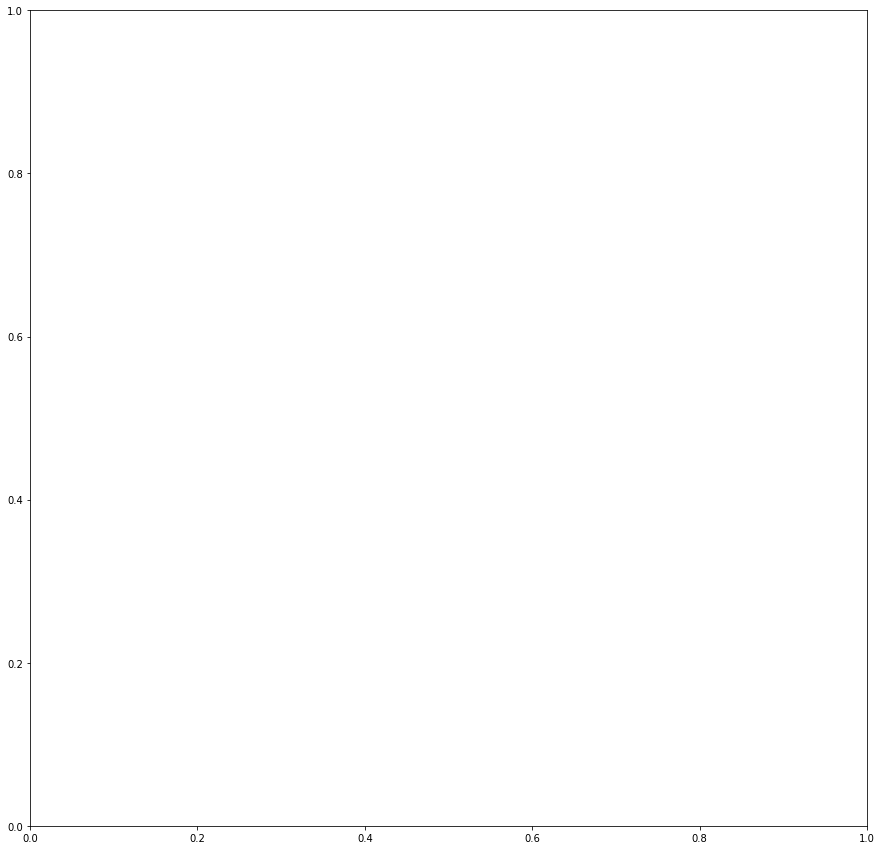

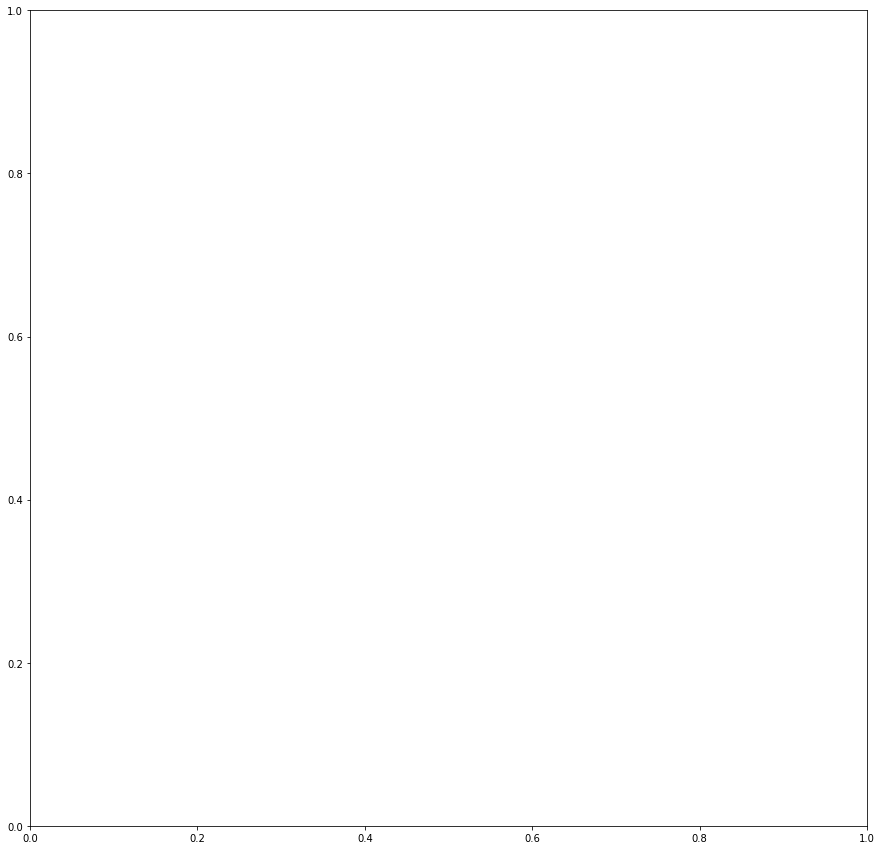

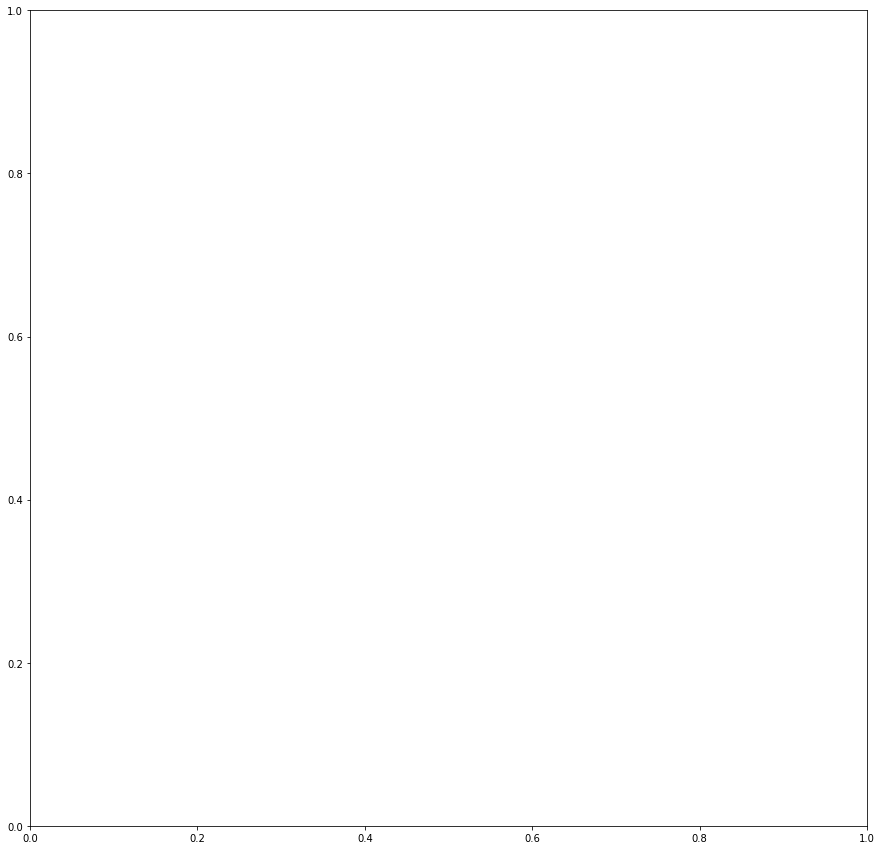

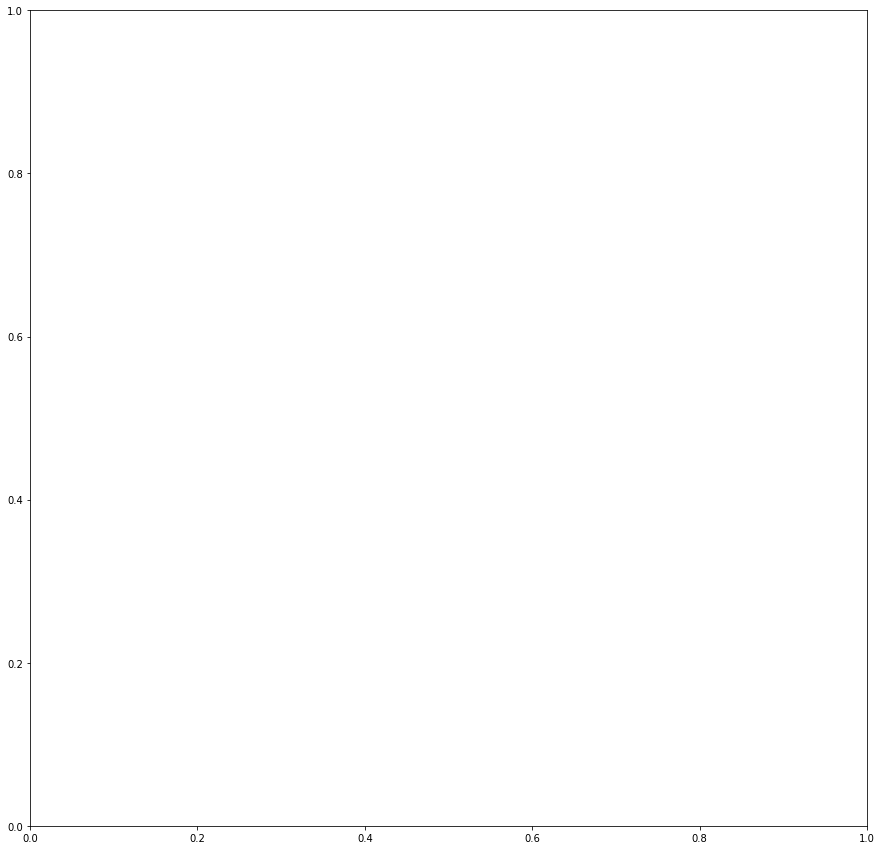

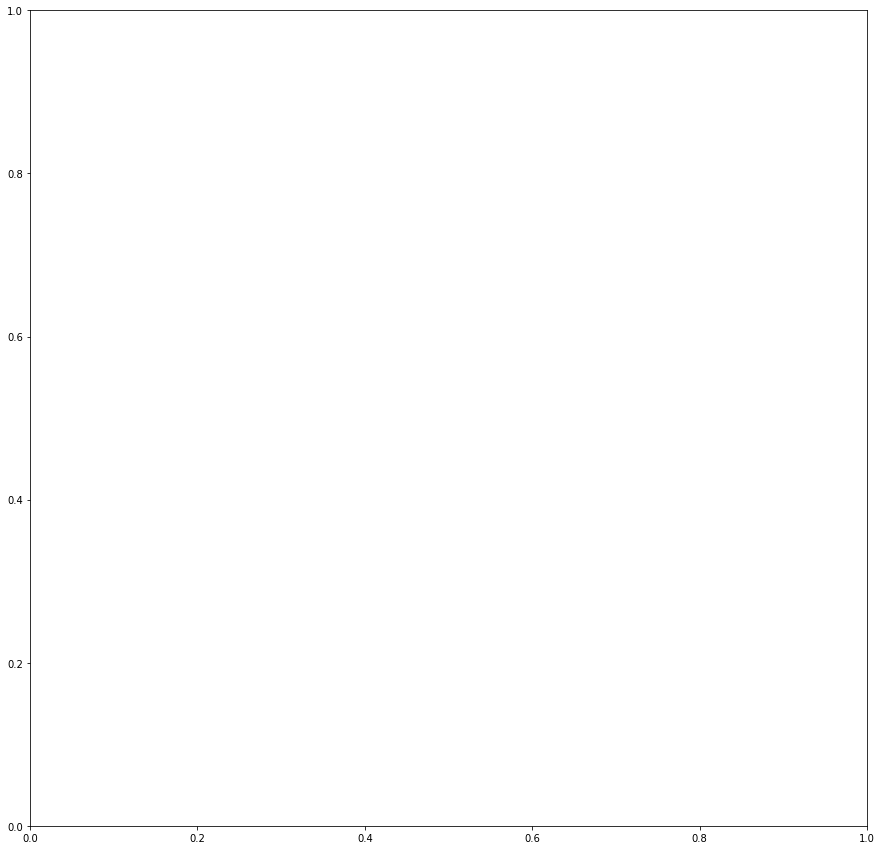

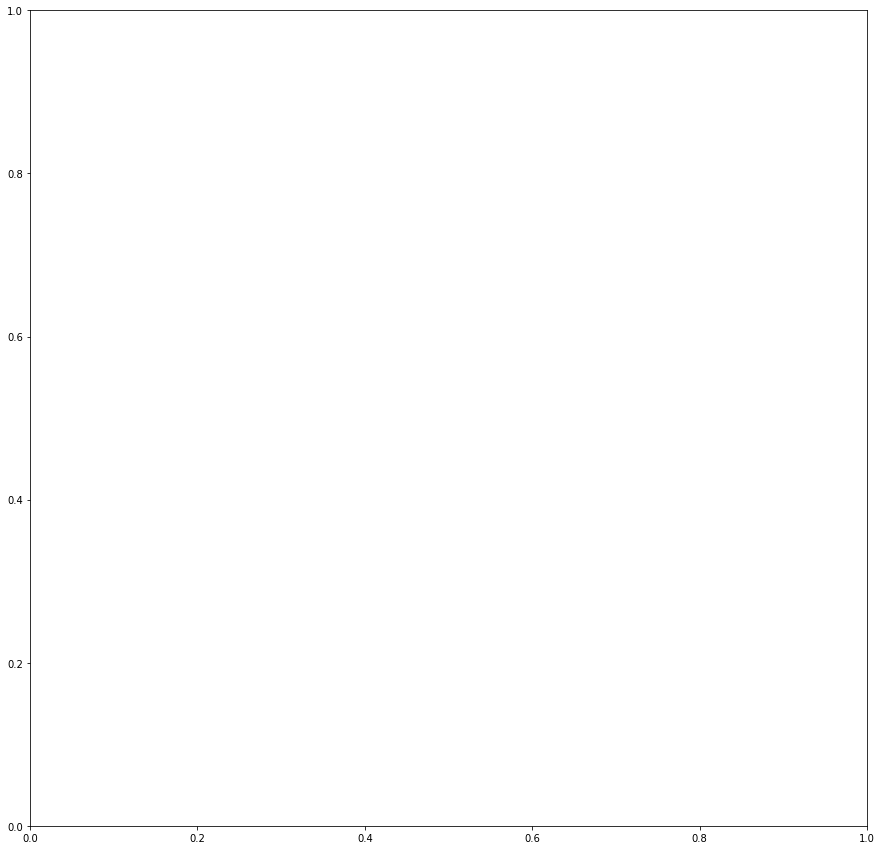

In [14]:
e = []
t = []
for i in range(0,1500,5):
    f, (ax1) = plt.subplots(1,1,figsize = (15,15))
    v = ice.vertices()
    col.set_state_from_frame(i)
    v = v.colloids_to_vertices(col)
    e.append(col.calculate_energy(B = [0,0,1]*ureg.mT))
    t.append(i)

#    col.display(ax1)
#    v.display(ax1)

#    ax1.set_xticks([])
#    ax1.set_yticks([])
    
#    plt.savefig(os.path.join(output,"RandomConf_frame"+str(i)+".png"))
#    plt.close()

In [ ]:
plt.plot(t,e)